In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

from tta.data.cifar import Cifar10CDataset
from tta.data.dataloader import build_test_loader
from tta.method.tent import Tent
from tta.method.source import Source

/Users/wonjunc/Desktop/workspace/production-ml-lab/test-time-adaptation/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def compute_entropy(probs):
    log_probs = torch.log(probs + 1e-12)
    entropy = -torch.sum(probs * log_probs, dim=1)
    return entropy

def plot_sample_distribution(idx, output_distributions, labels, entropy_values, cross_entropy_values):
    distribution = output_distributions[idx]
    true_label = labels[idx]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(10), distribution[0])
    bars[true_label].set_color('green')
    
    plt.title(f'Output Distribution (Entropy: {entropy_values[idx]:.4f}, Cross-Entropy: {cross_entropy_values[idx]:.4f})')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()
    
    print(f"Sample index: {idx}")
    print(f"Entropy: {entropy_values[idx]:.4f}")
    print(f"Cross-Entropy: {cross_entropy_values[idx]:.4f}")
    print(f"Ground Truth Label: {true_label}")

In [3]:
device = "mps"  # M1/M2 Mac의 경우 "mps" 사용
num_samples = 50
corrupt_domain = "gaussian_noise"
severity = 5

# Tent 메소드 초기화
method1 = Source()
method2 = Tent(optim_steps=1)
model1 = method1.model
model2 = method2.model

/Users/wonjunc/Desktop/workspace/production-ml-lab/test-time-adaptation/.venv/lib/python3.11/site-packages/robustbench/utils.py:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featu

In [4]:
# 데이터셋 로드
dataset = Cifar10CDataset(
    num_samples=num_samples,
    corrupt_domain_orders=[corrupt_domain],
    severity=severity
)

# Source 모델(model1)을 위한 데이터 수집 리스트
entropy_values1 = []
cross_entropy_values1 = []
output_distributions1 = []
labels1 = []

# Tent 모델(model2)을 위한 데이터 수집 리스트 
entropy_values2 = []
cross_entropy_values2 = []
output_distributions2 = []
labels2 = []

# Source vs Tent Batch size (before adaptation)

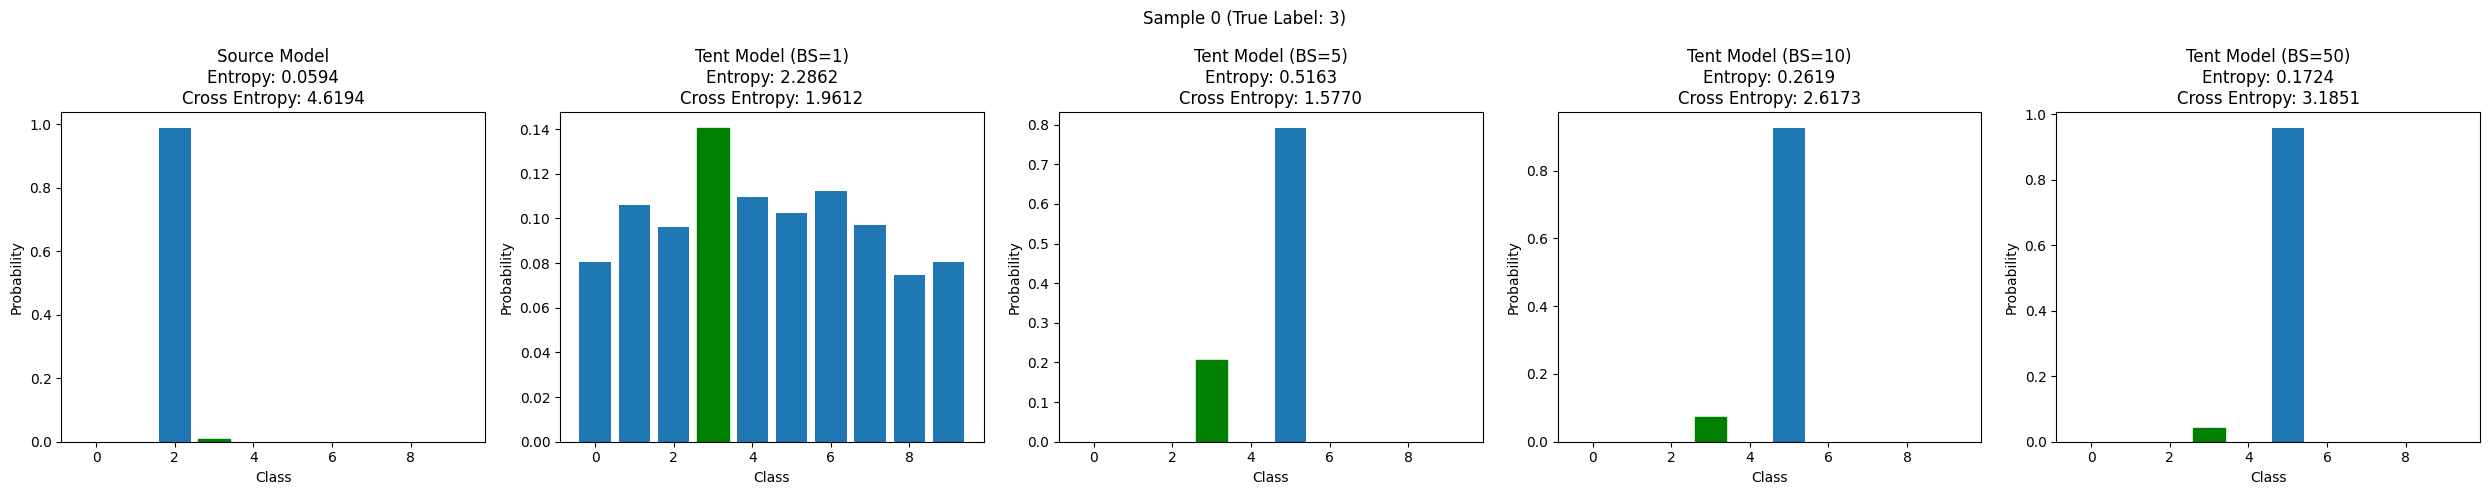

Sample 0:
Source 모델 - 예측: 2, 엔트로피: 0.0594, 크로스 엔트로피: 4.6194
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 1.9612
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 1.5770
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 2.6173
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 3.1851
실제 레이블: 3



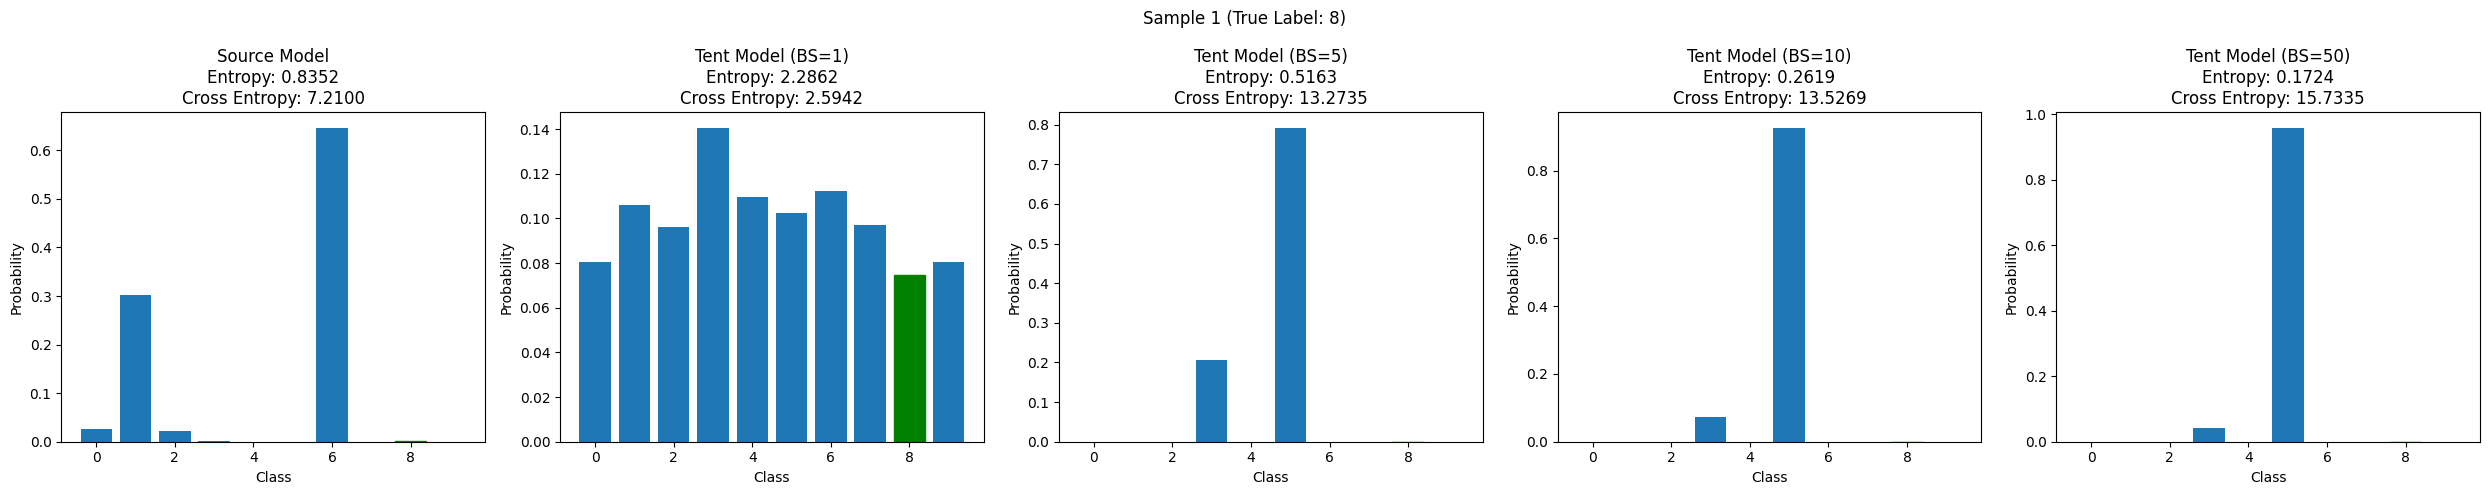

Sample 1:
Source 모델 - 예측: 6, 엔트로피: 0.8352, 크로스 엔트로피: 7.2100
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5942
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.2735
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.5269
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7335
실제 레이블: 8



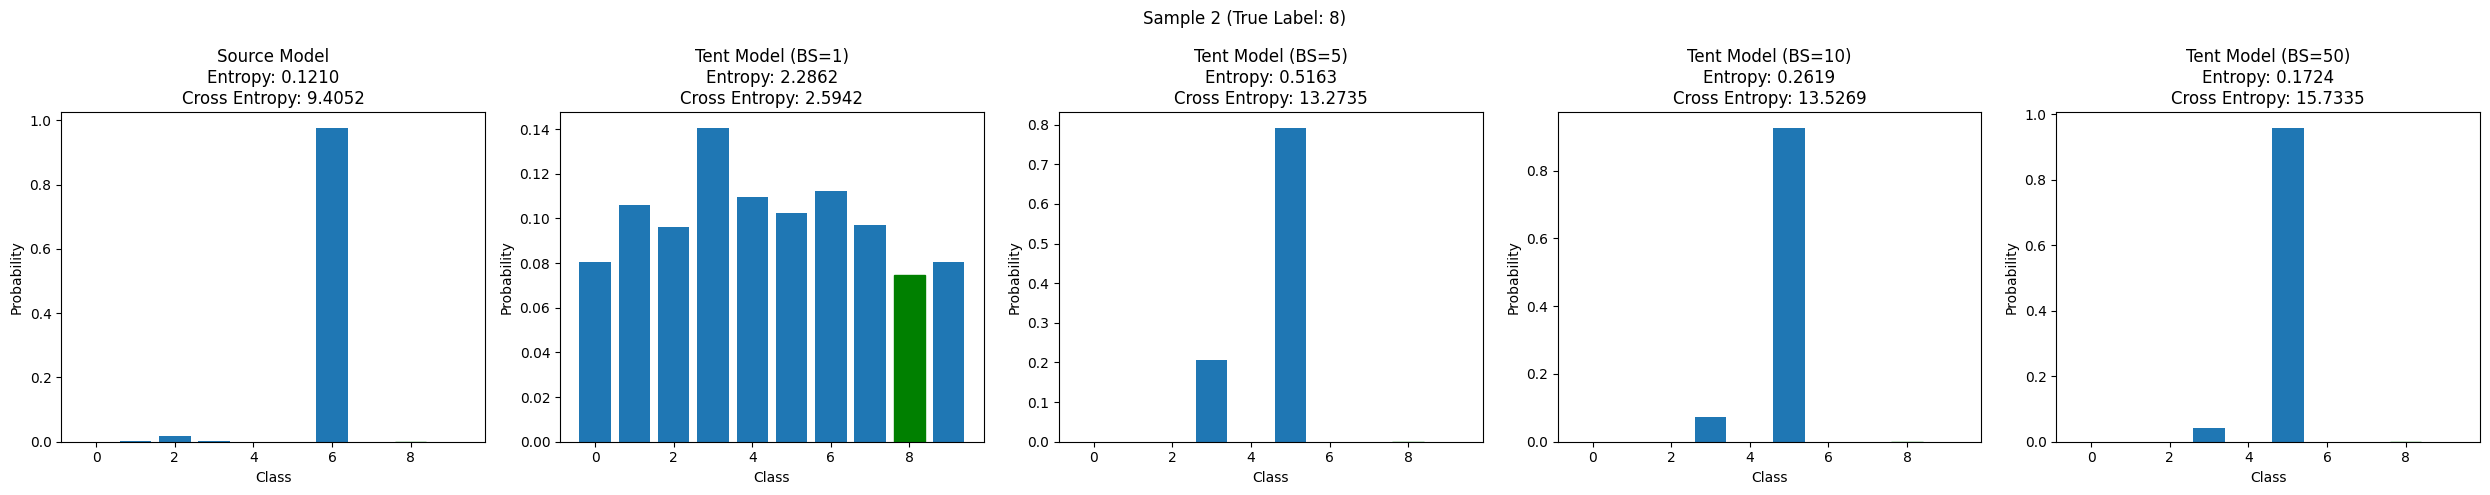

Sample 2:
Source 모델 - 예측: 6, 엔트로피: 0.1210, 크로스 엔트로피: 9.4052
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5942
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.2735
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.5269
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7335
실제 레이블: 8



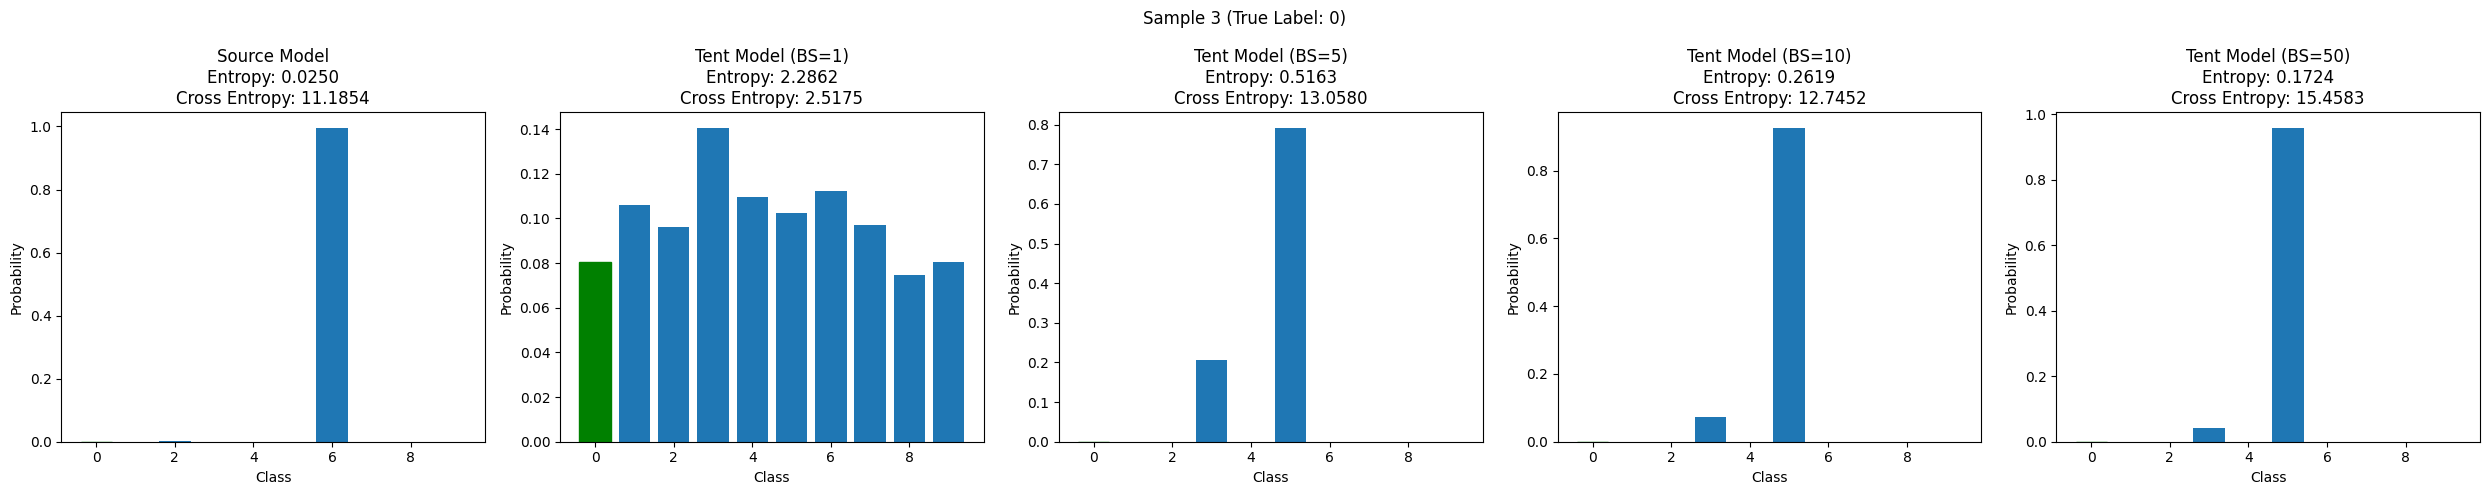

Sample 3:
Source 모델 - 예측: 6, 엔트로피: 0.0250, 크로스 엔트로피: 11.1854
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5175
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.0580
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 12.7452
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.4583
실제 레이블: 0



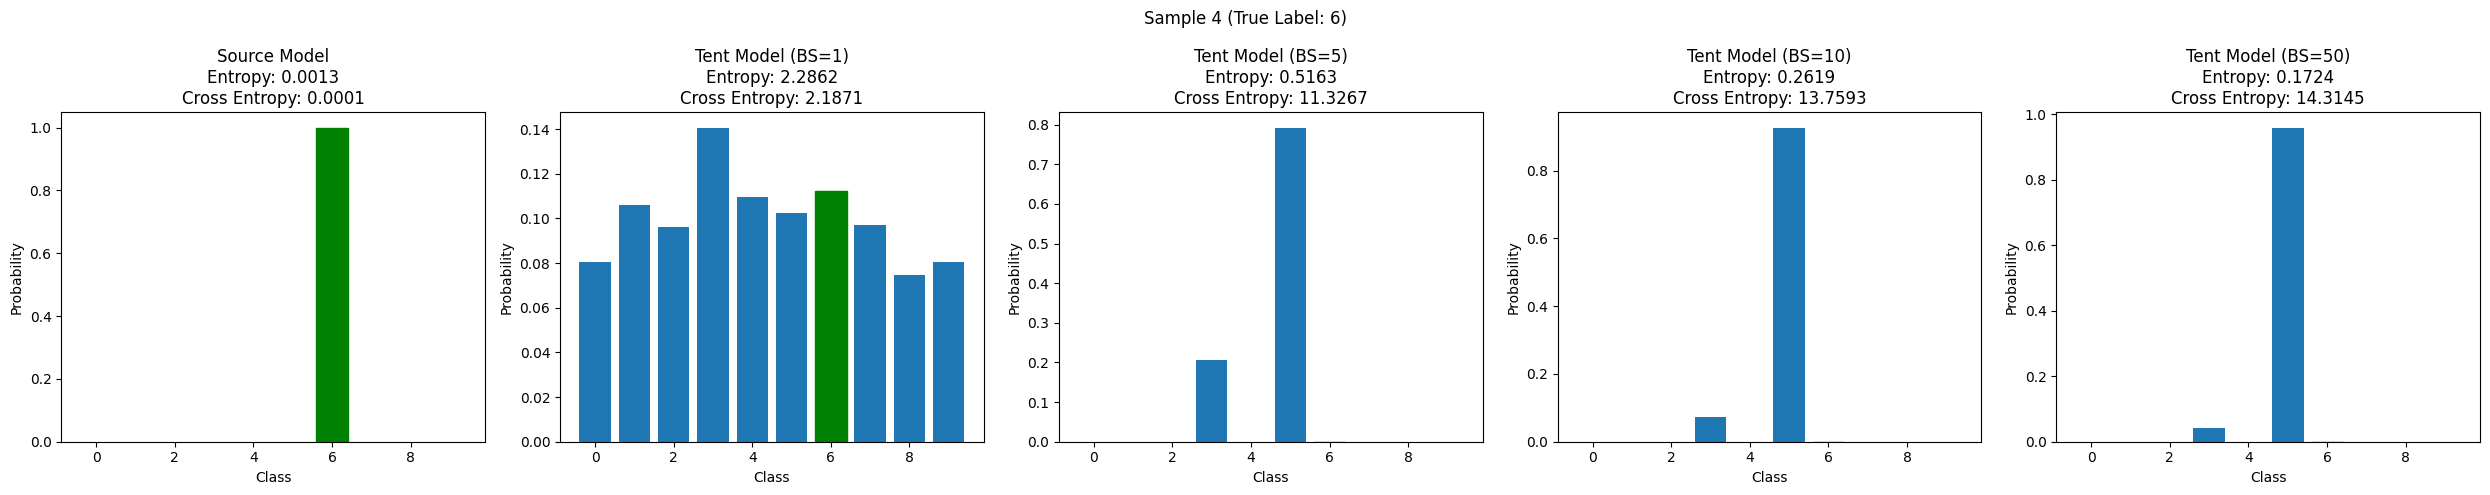

Sample 4:
Source 모델 - 예측: 6, 엔트로피: 0.0013, 크로스 엔트로피: 0.0001
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



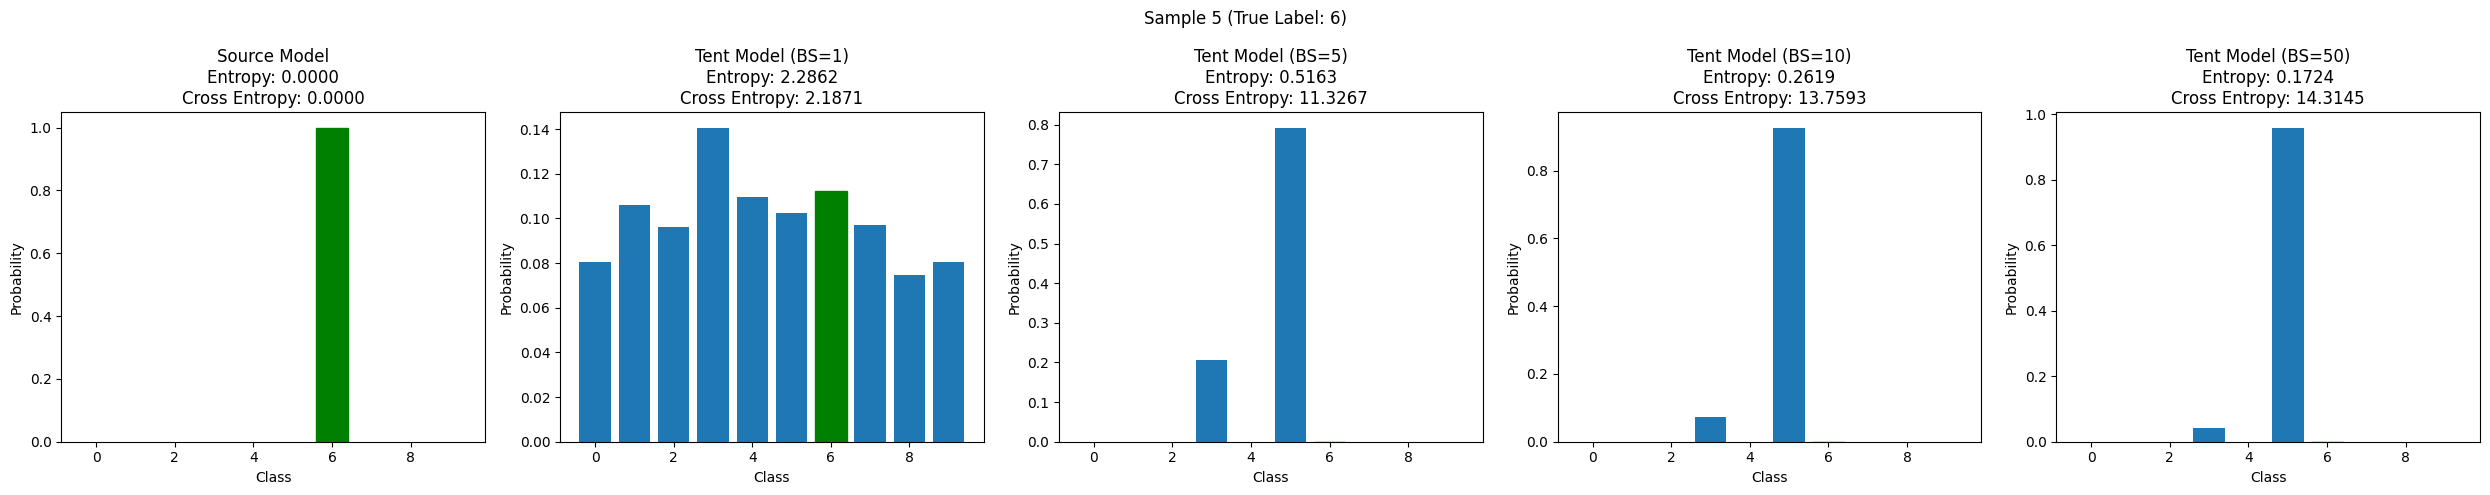

Sample 5:
Source 모델 - 예측: 6, 엔트로피: 0.0000, 크로스 엔트로피: 0.0000
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



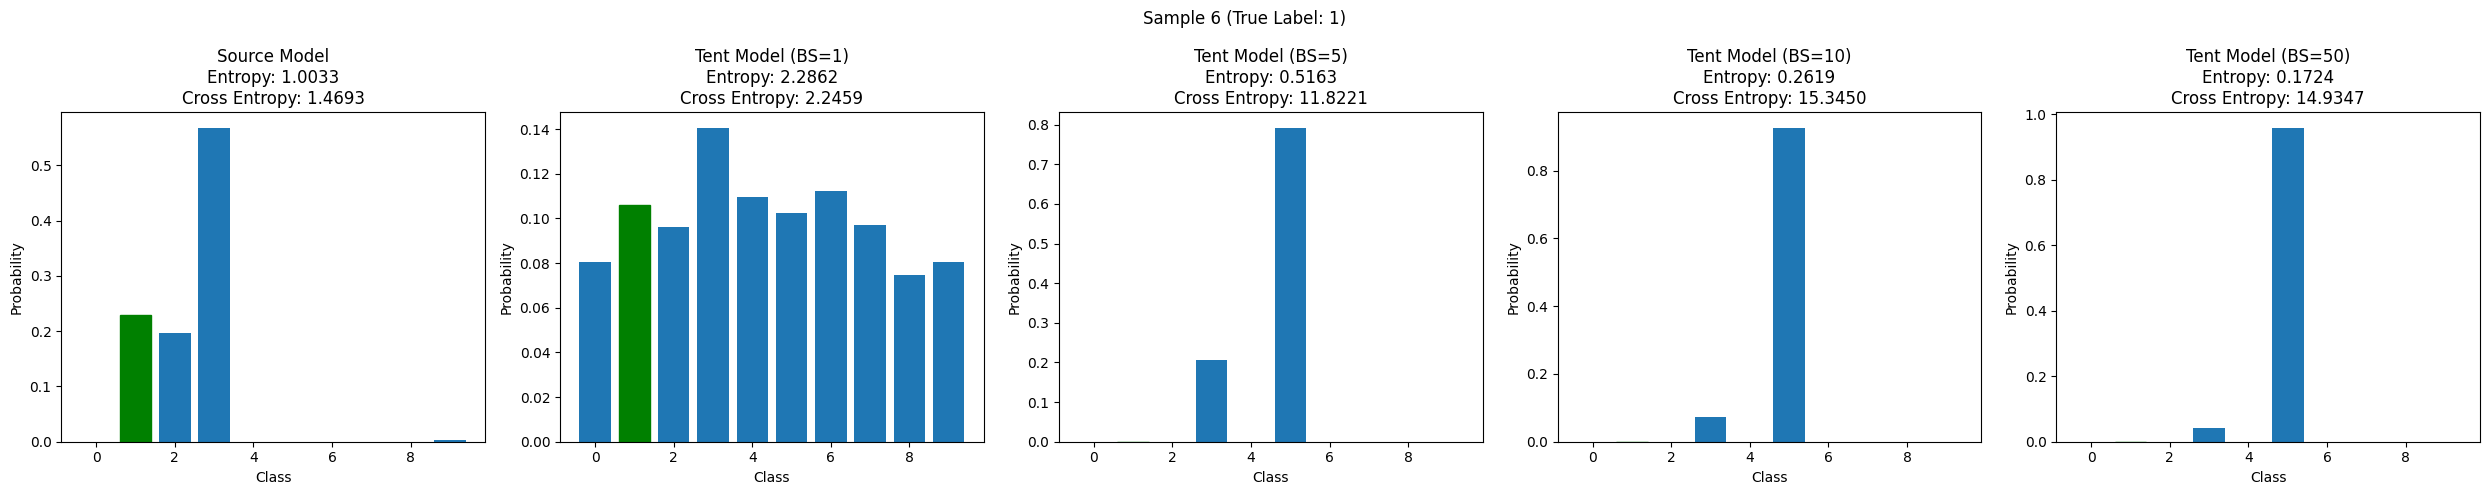

Sample 6:
Source 모델 - 예측: 3, 엔트로피: 1.0033, 크로스 엔트로피: 1.4693
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2459
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.8221
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 15.3450
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.9347
실제 레이블: 1



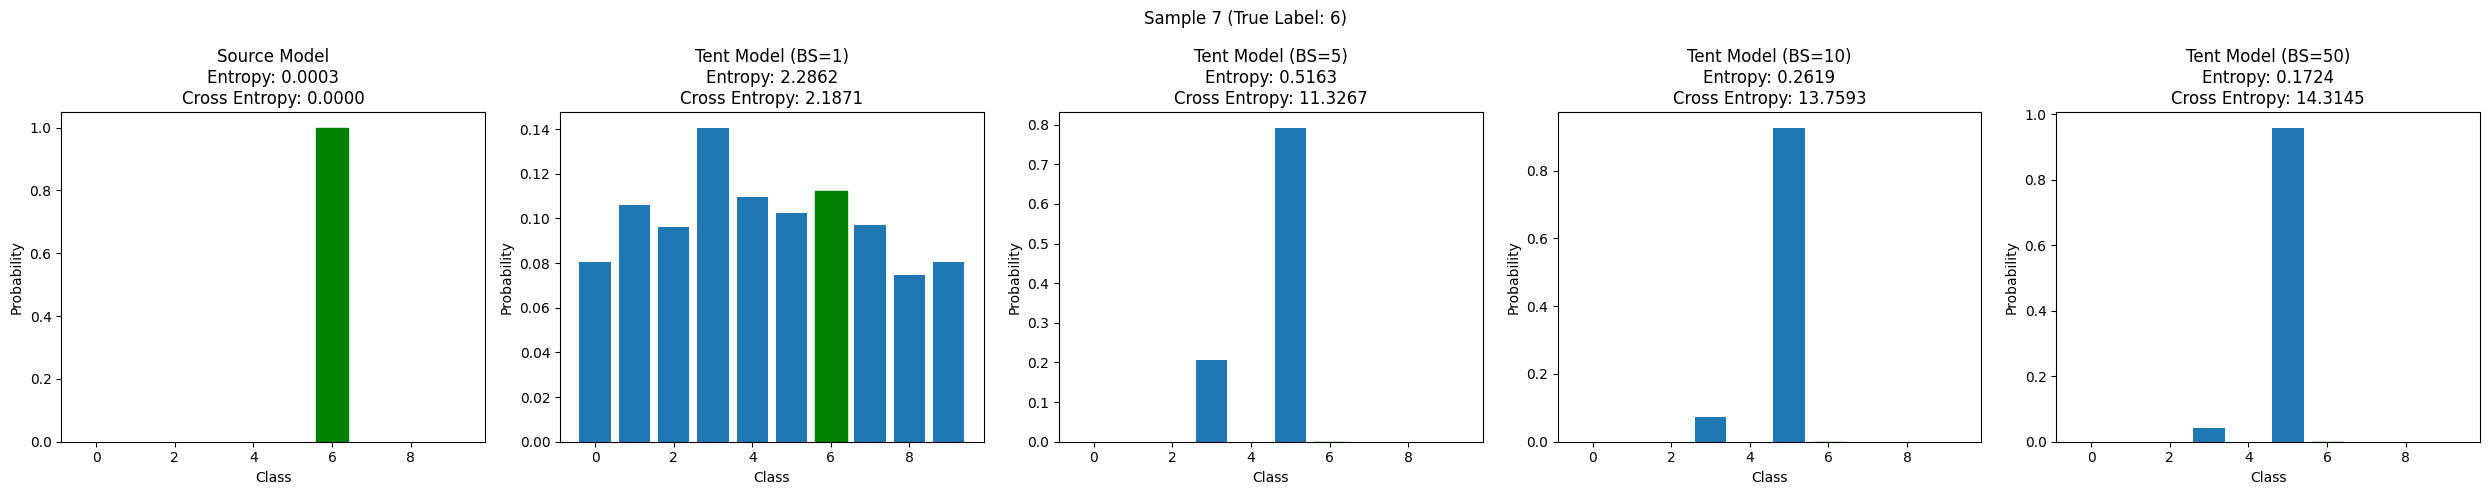

Sample 7:
Source 모델 - 예측: 6, 엔트로피: 0.0003, 크로스 엔트로피: 0.0000
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



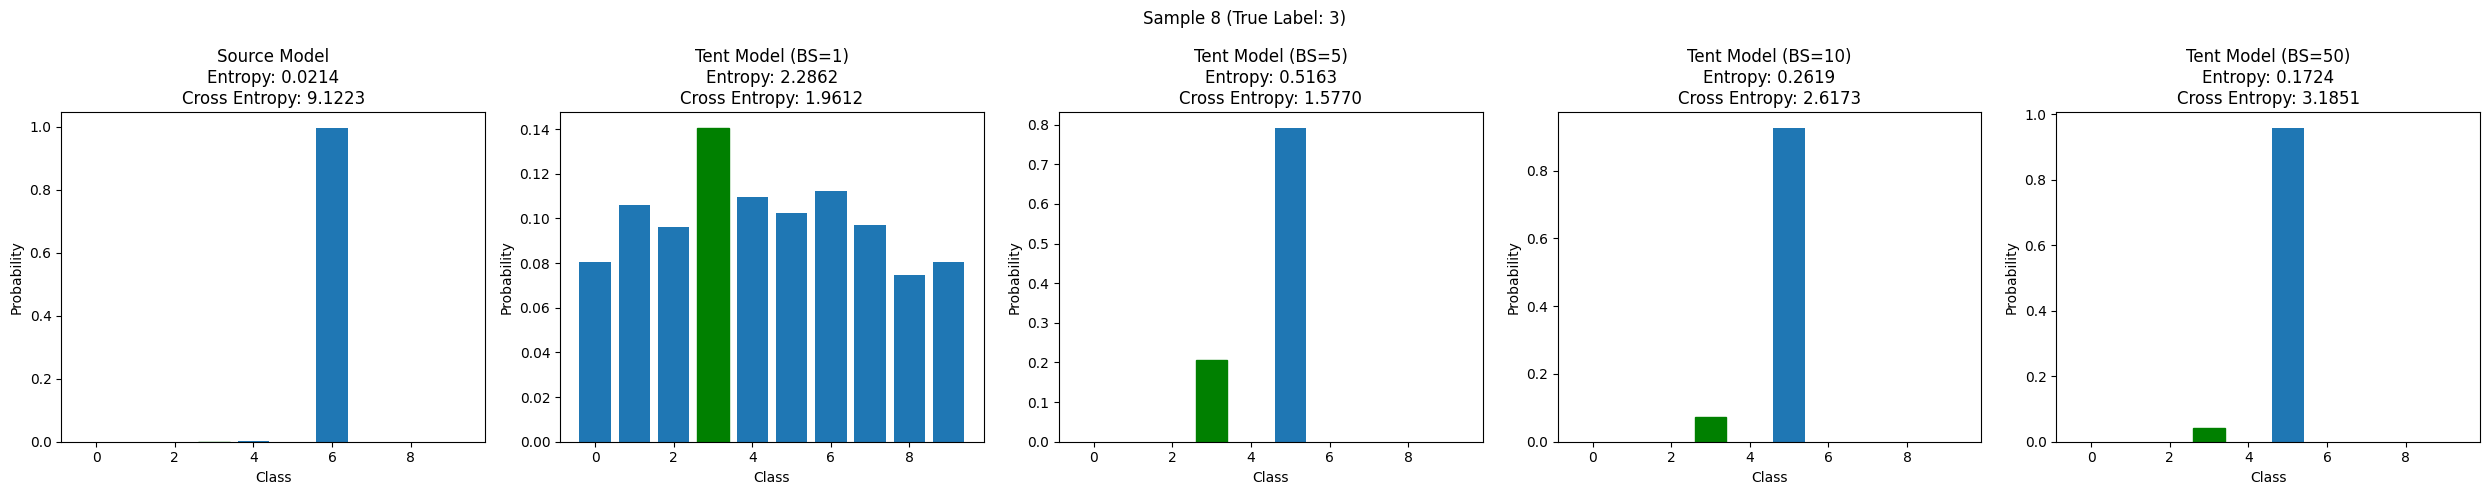

Sample 8:
Source 모델 - 예측: 6, 엔트로피: 0.0214, 크로스 엔트로피: 9.1223
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 1.9612
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 1.5770
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 2.6173
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 3.1851
실제 레이블: 3



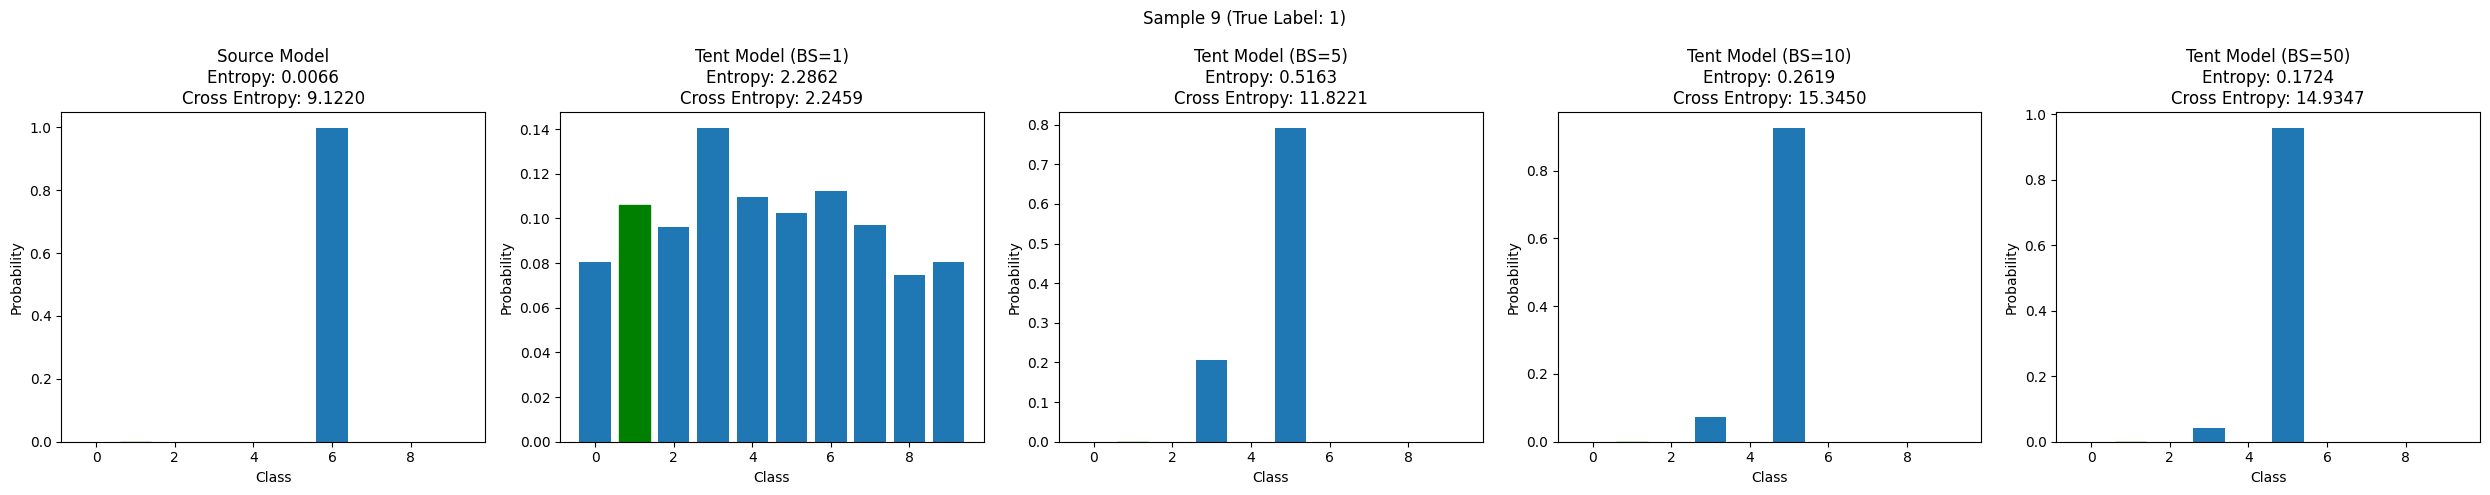

Sample 9:
Source 모델 - 예측: 6, 엔트로피: 0.0066, 크로스 엔트로피: 9.1220
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2459
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.8221
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 15.3450
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.9347
실제 레이블: 1



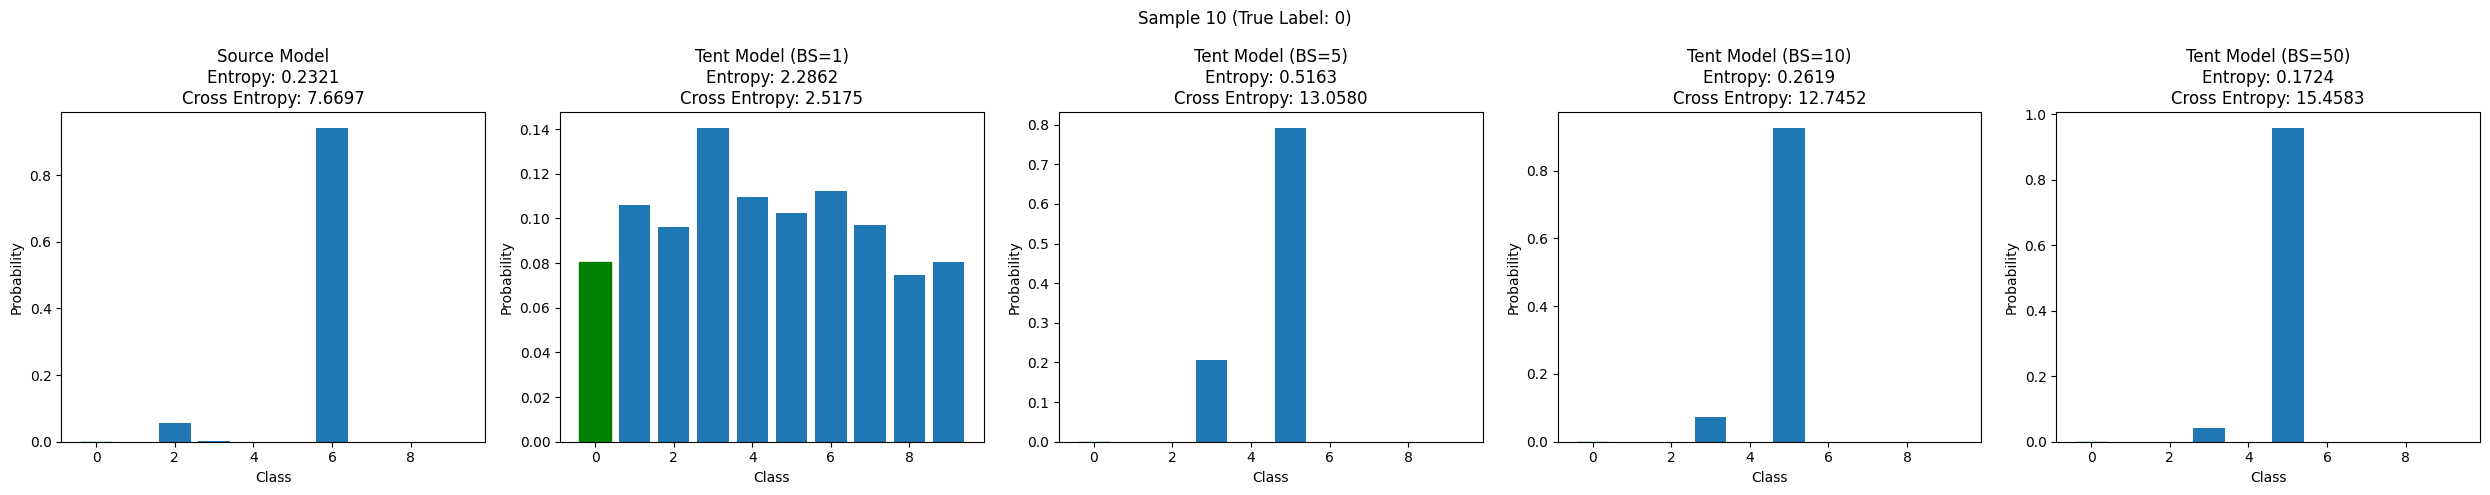

Sample 10:
Source 모델 - 예측: 6, 엔트로피: 0.2321, 크로스 엔트로피: 7.6697
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5175
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.0580
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 12.7452
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.4583
실제 레이블: 0



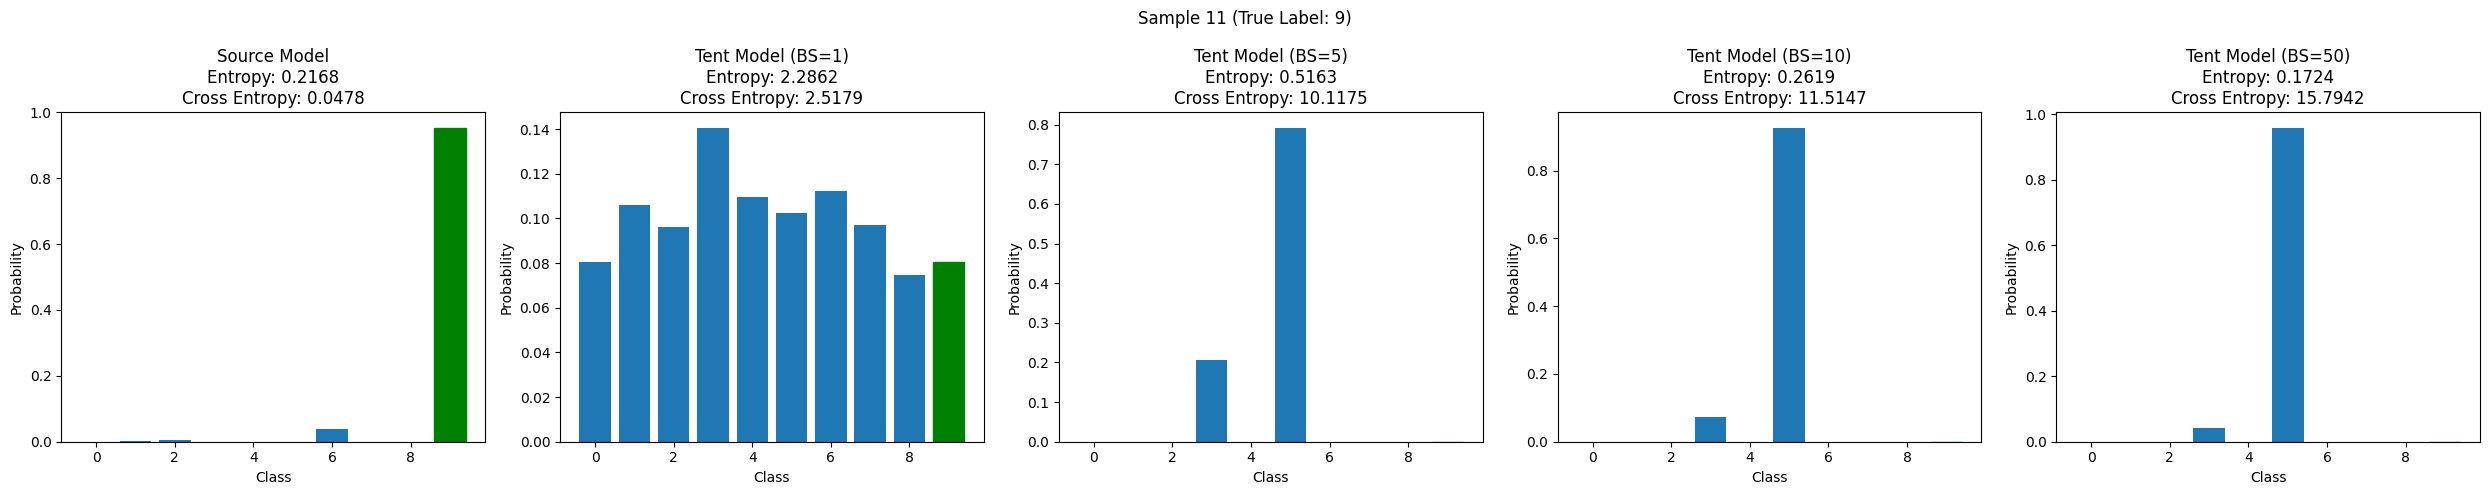

Sample 11:
Source 모델 - 예측: 9, 엔트로피: 0.2168, 크로스 엔트로피: 0.0478
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5179
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 10.1175
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5147
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7942
실제 레이블: 9



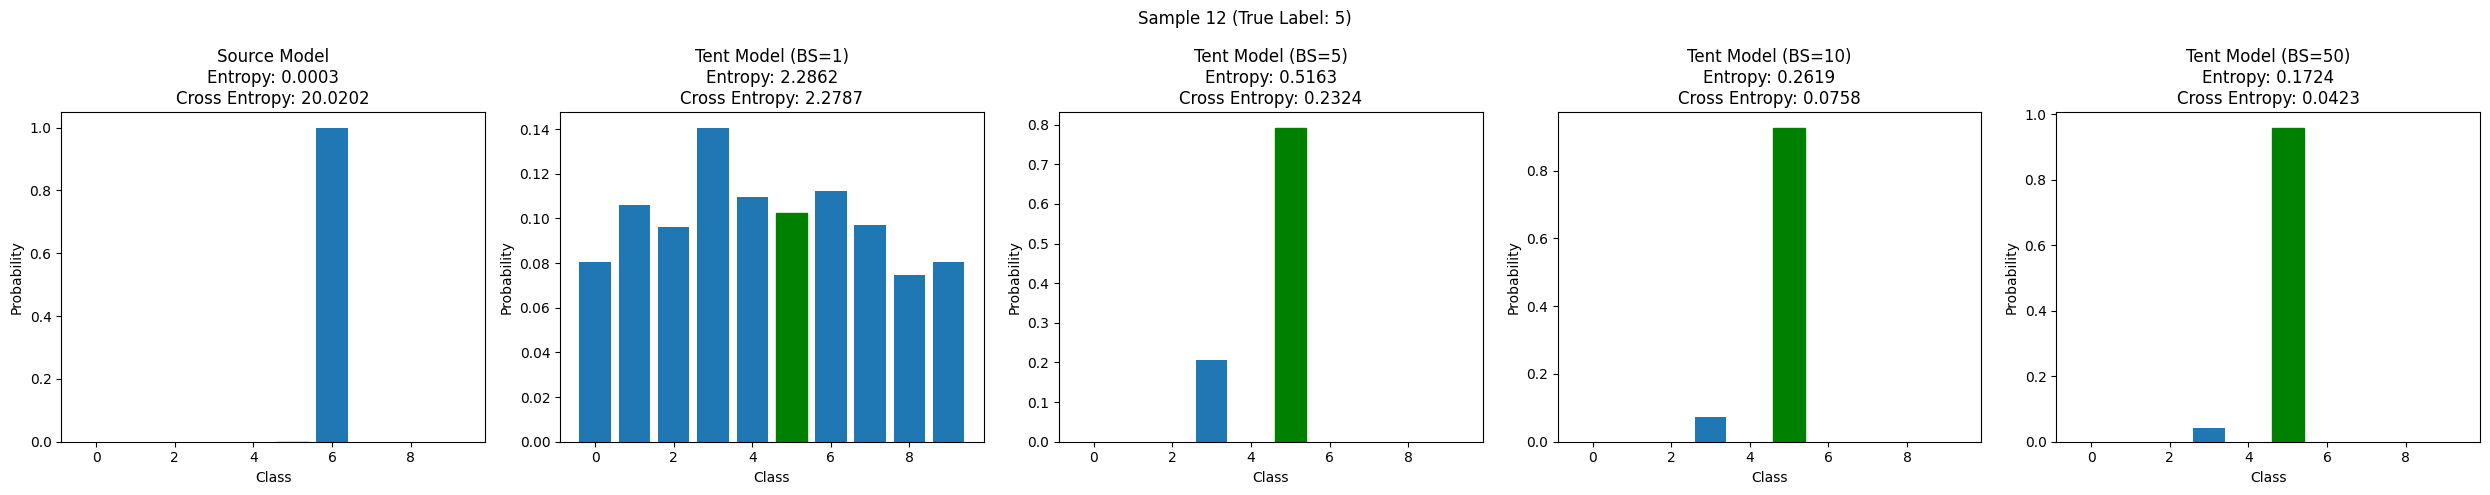

Sample 12:
Source 모델 - 예측: 6, 엔트로피: 0.0003, 크로스 엔트로피: 20.0202
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2787
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 0.2324
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 0.0758
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 0.0423
실제 레이블: 5



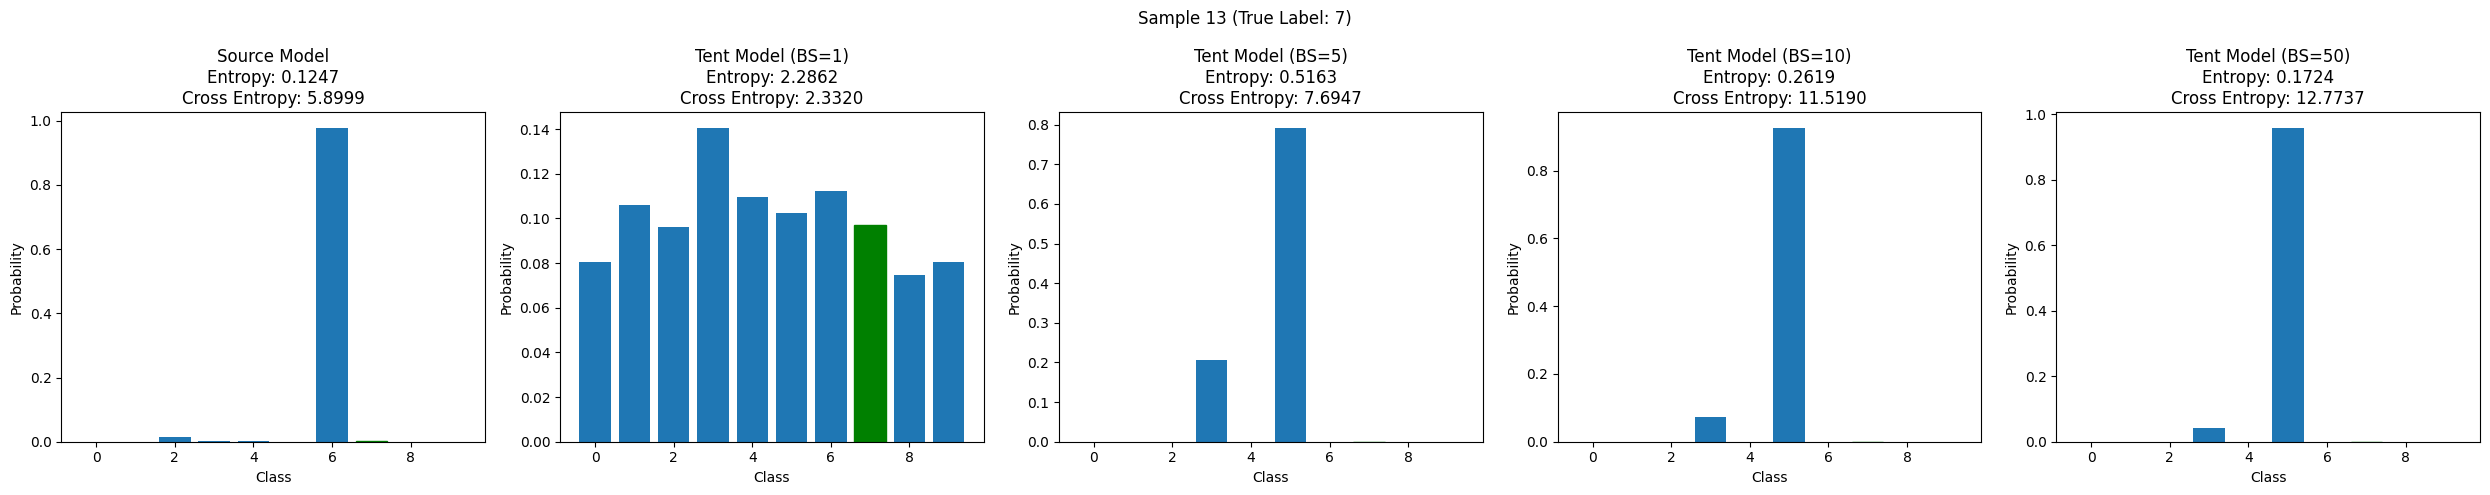

Sample 13:
Source 모델 - 예측: 6, 엔트로피: 0.1247, 크로스 엔트로피: 5.8999
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.3320
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 7.6947
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5190
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 12.7737
실제 레이블: 7



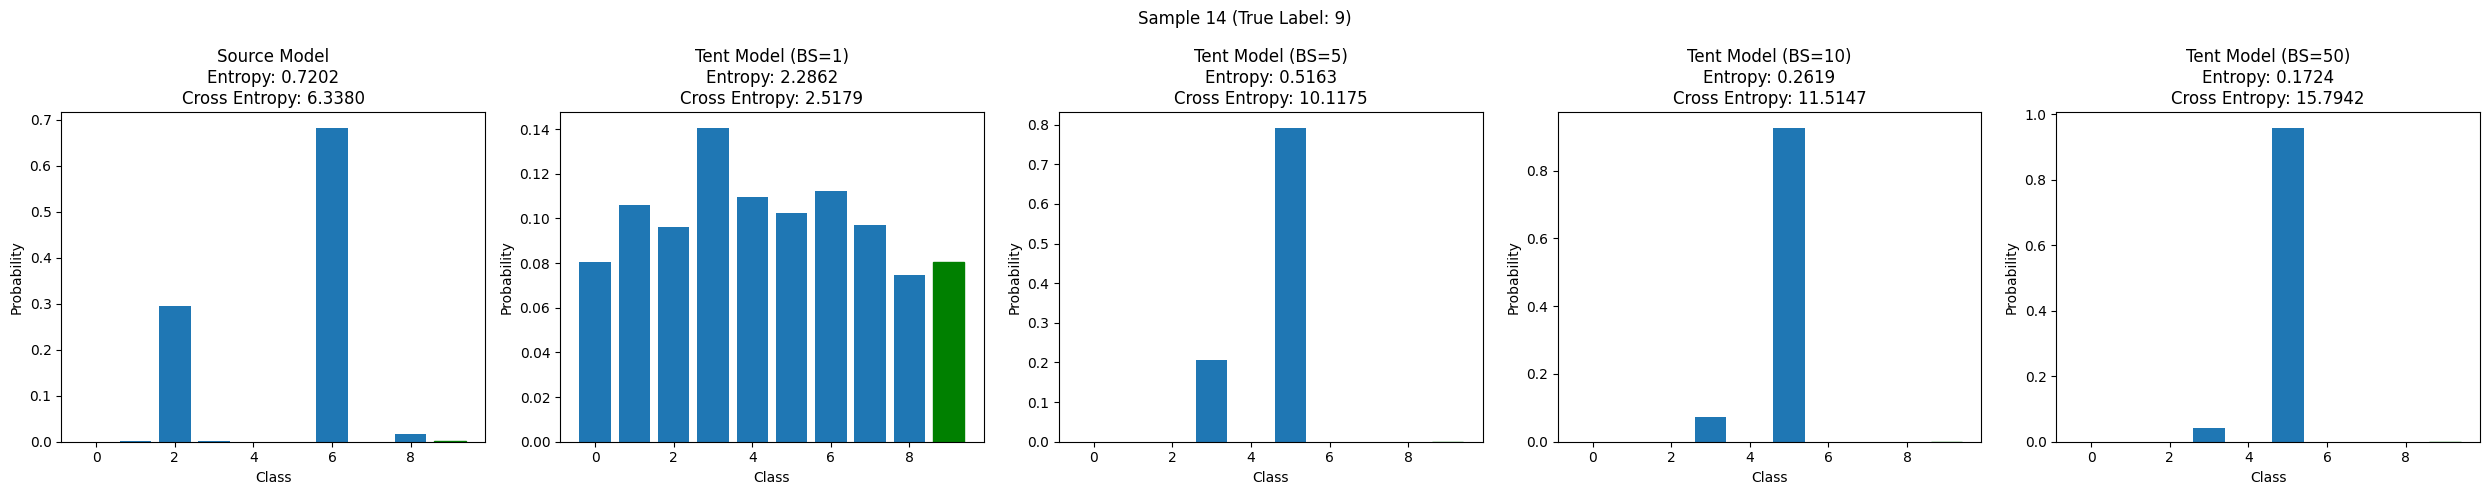

Sample 14:
Source 모델 - 예측: 6, 엔트로피: 0.7202, 크로스 엔트로피: 6.3380
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5179
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 10.1175
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5147
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7942
실제 레이블: 9



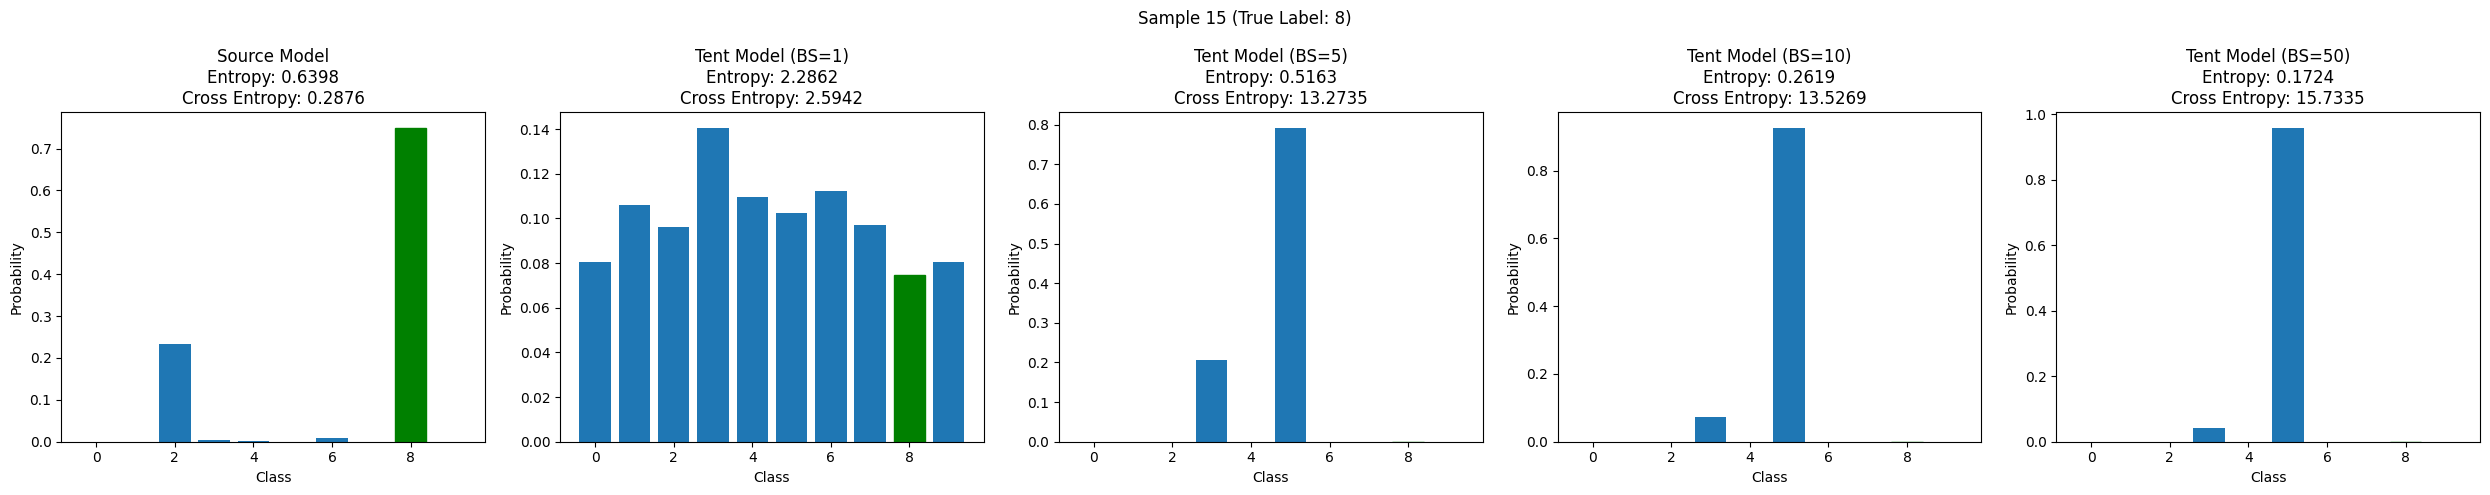

Sample 15:
Source 모델 - 예측: 8, 엔트로피: 0.6398, 크로스 엔트로피: 0.2876
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5942
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.2735
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.5269
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7335
실제 레이블: 8



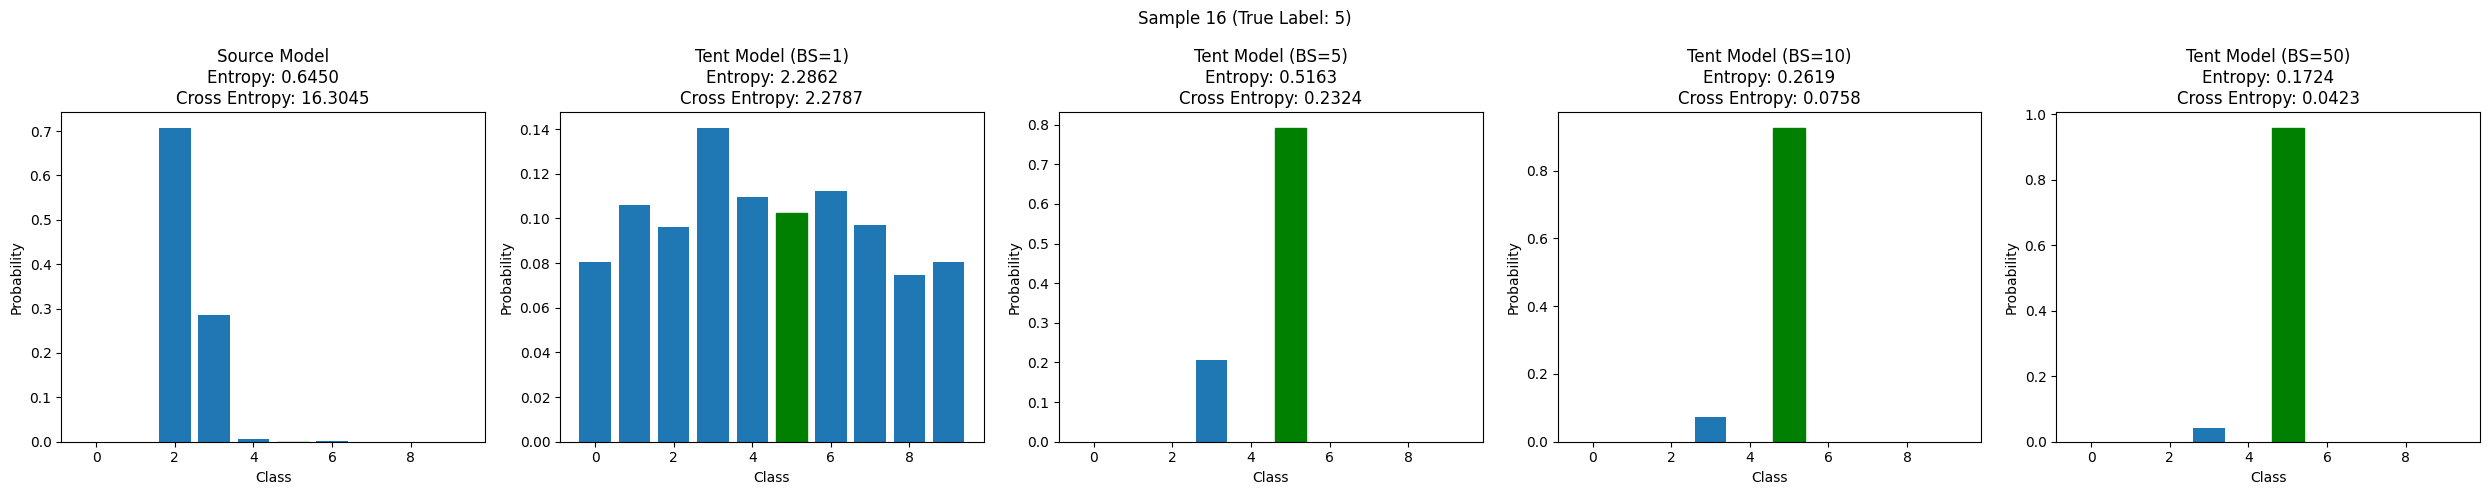

Sample 16:
Source 모델 - 예측: 2, 엔트로피: 0.6450, 크로스 엔트로피: 16.3045
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2787
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 0.2324
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 0.0758
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 0.0423
실제 레이블: 5



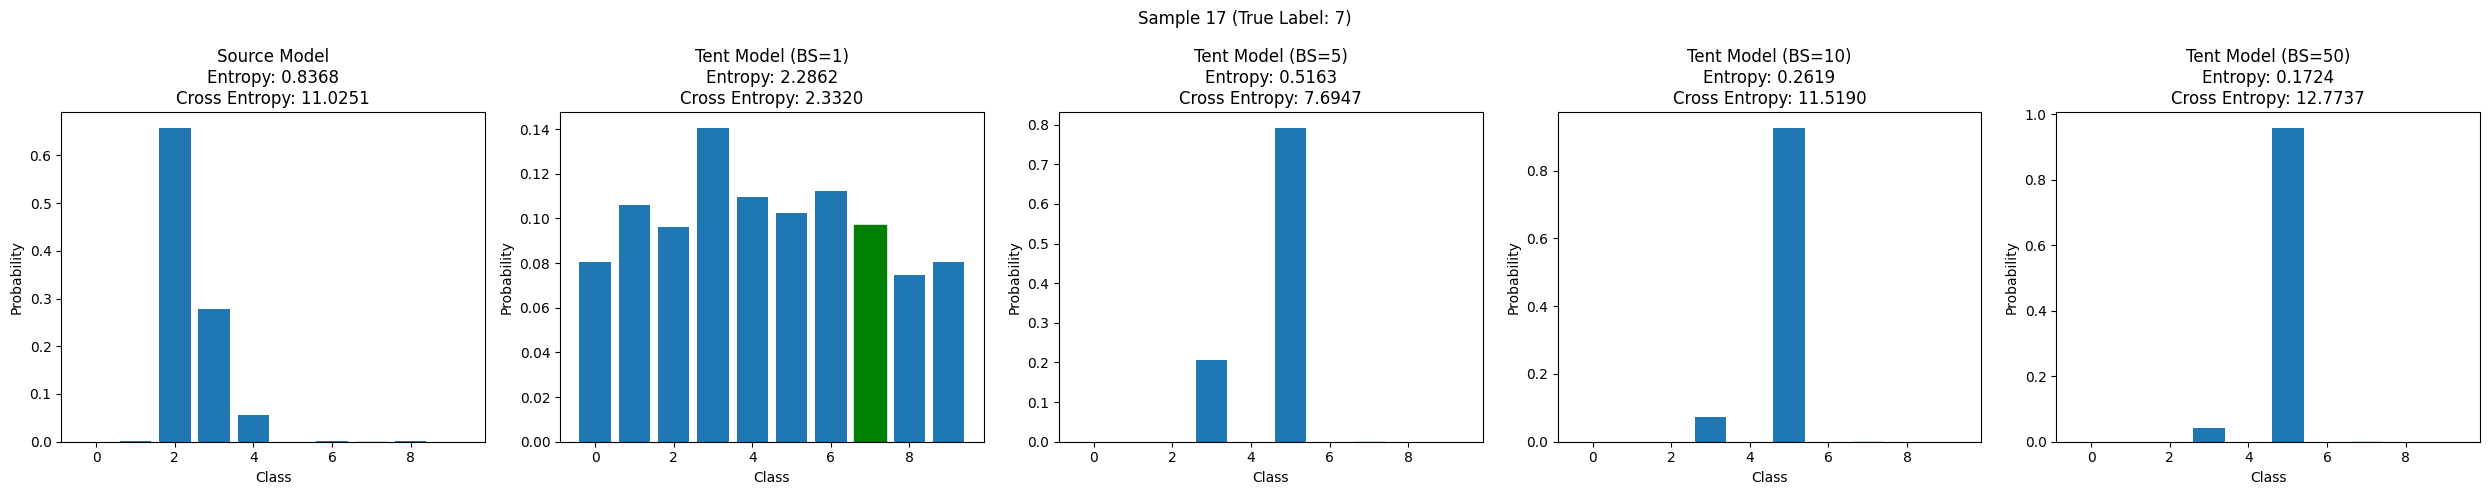

Sample 17:
Source 모델 - 예측: 2, 엔트로피: 0.8368, 크로스 엔트로피: 11.0251
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.3320
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 7.6947
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5190
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 12.7737
실제 레이블: 7



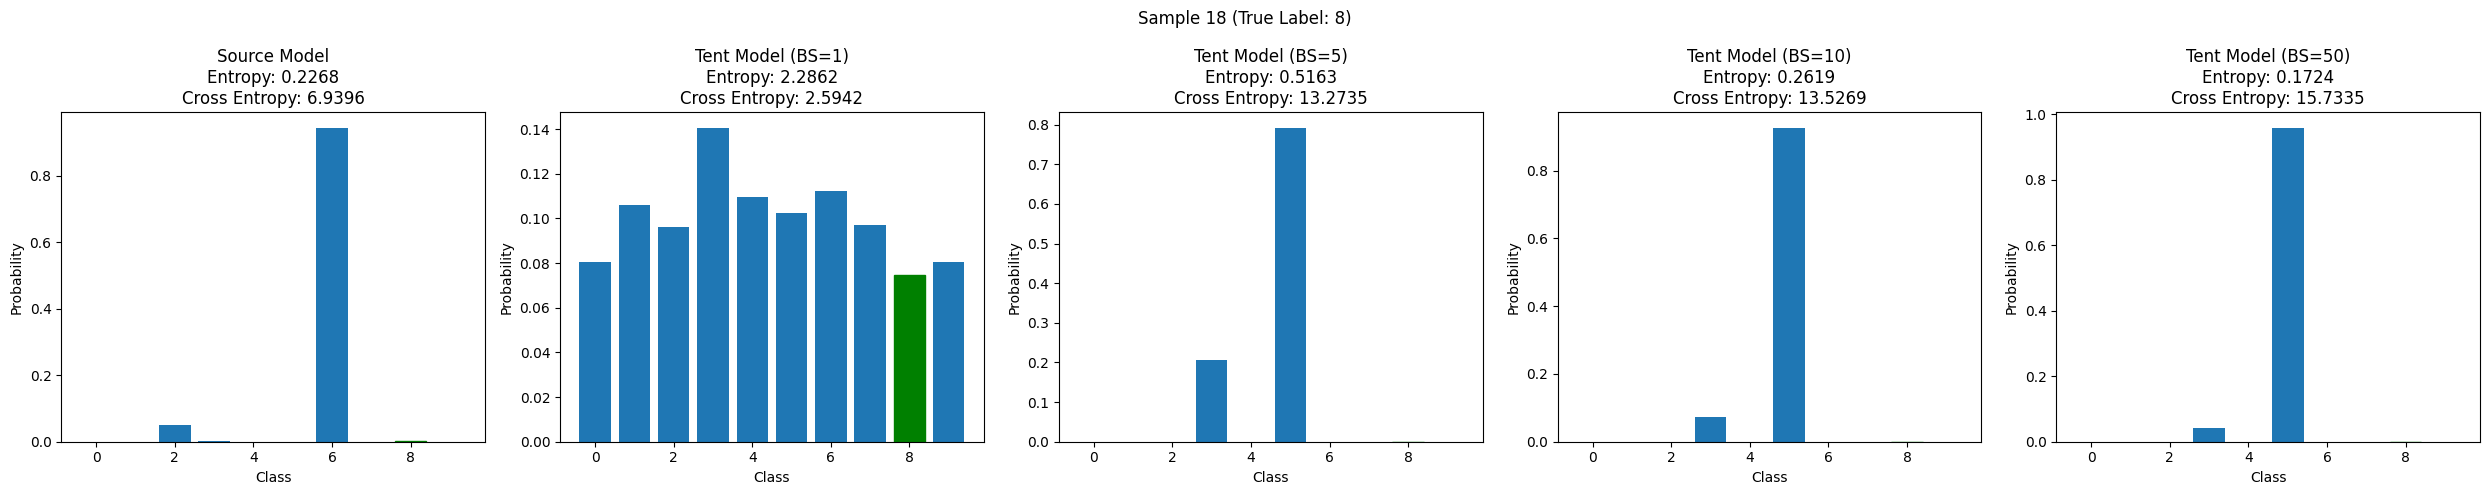

Sample 18:
Source 모델 - 예측: 6, 엔트로피: 0.2268, 크로스 엔트로피: 6.9396
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5942
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.2735
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.5269
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7335
실제 레이블: 8



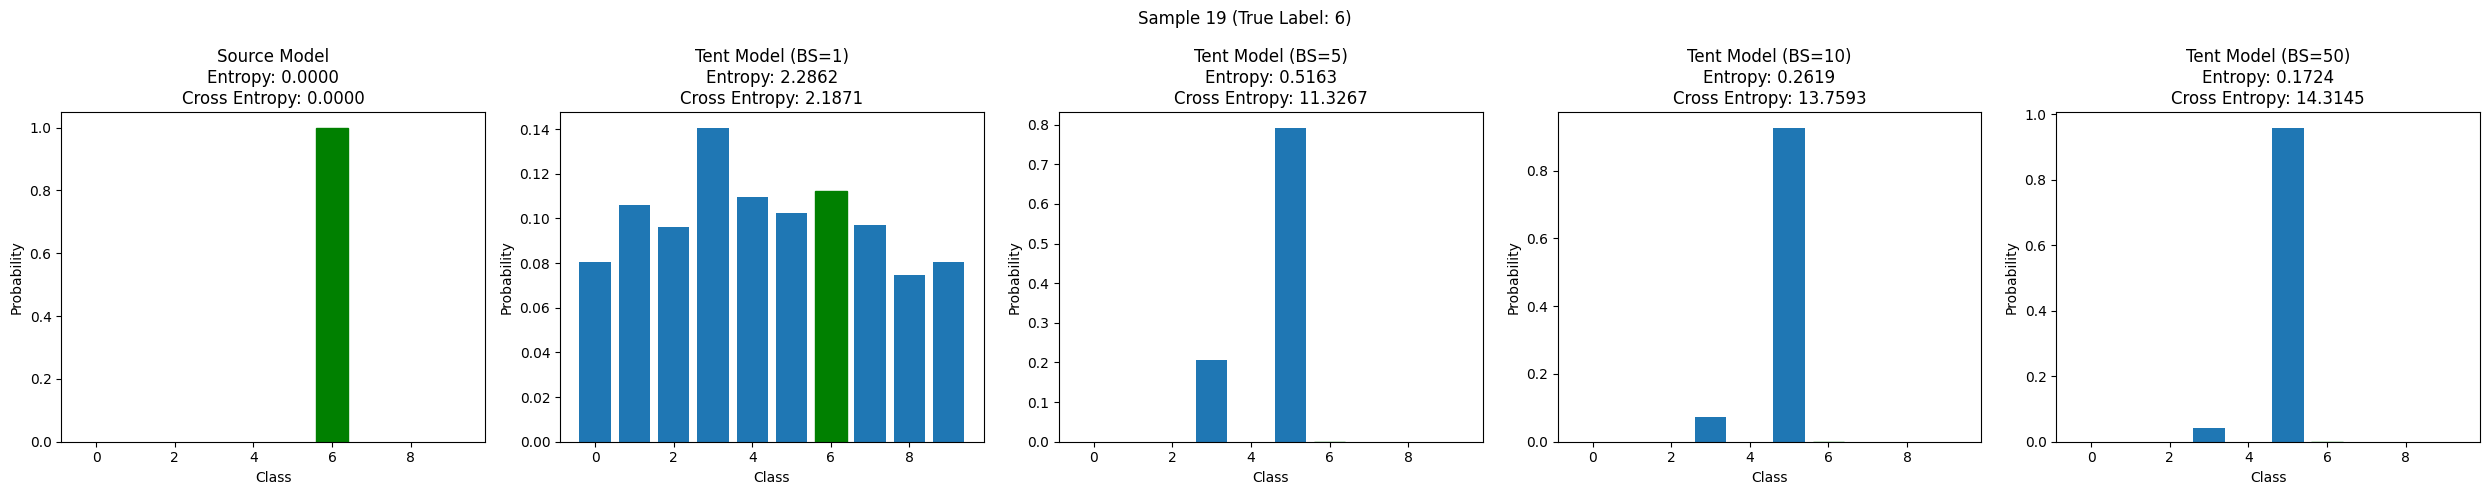

Sample 19:
Source 모델 - 예측: 6, 엔트로피: 0.0000, 크로스 엔트로피: 0.0000
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



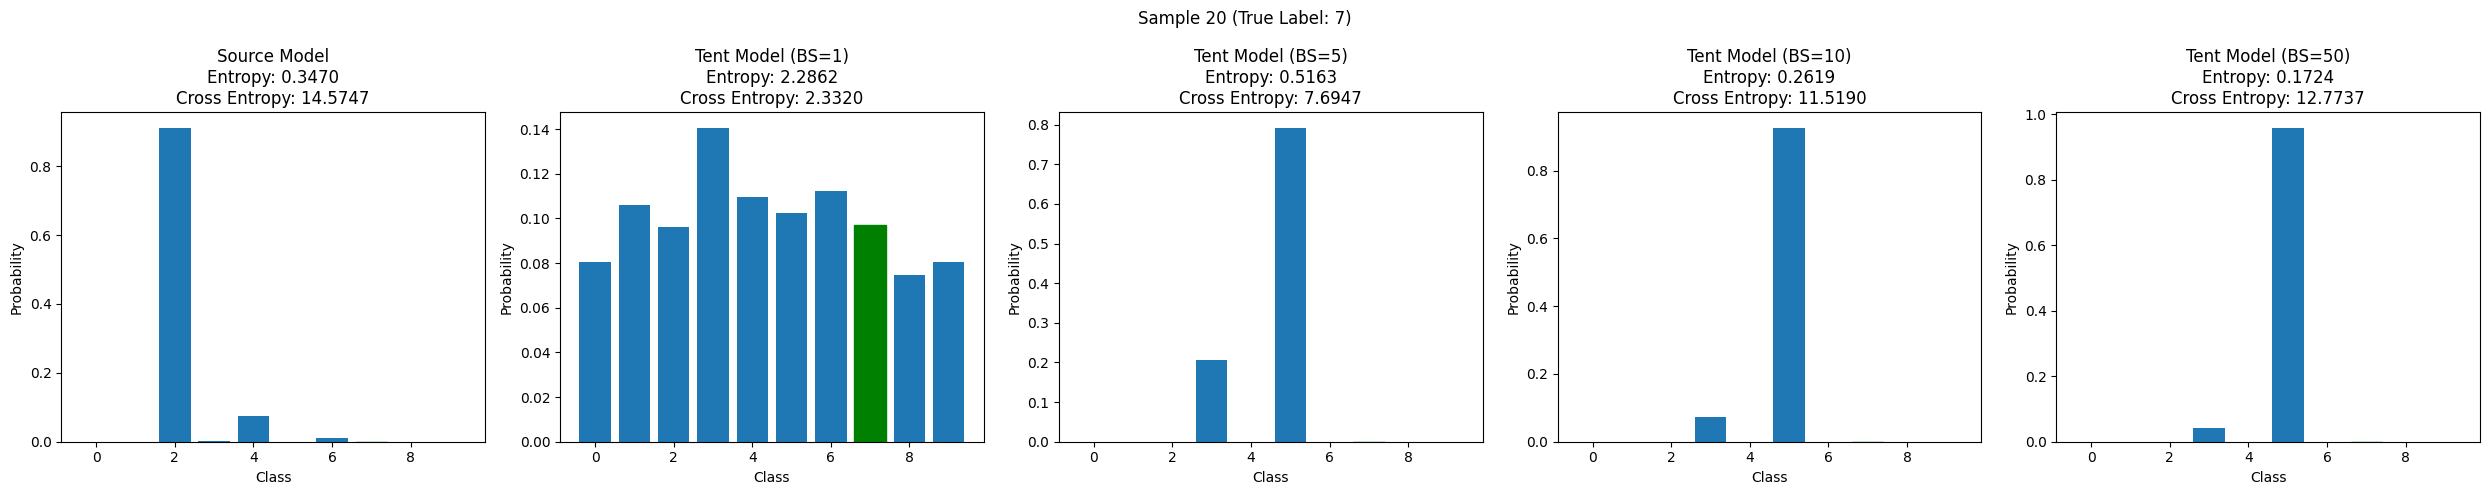

Sample 20:
Source 모델 - 예측: 2, 엔트로피: 0.3470, 크로스 엔트로피: 14.5747
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.3320
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 7.6947
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5190
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 12.7737
실제 레이블: 7



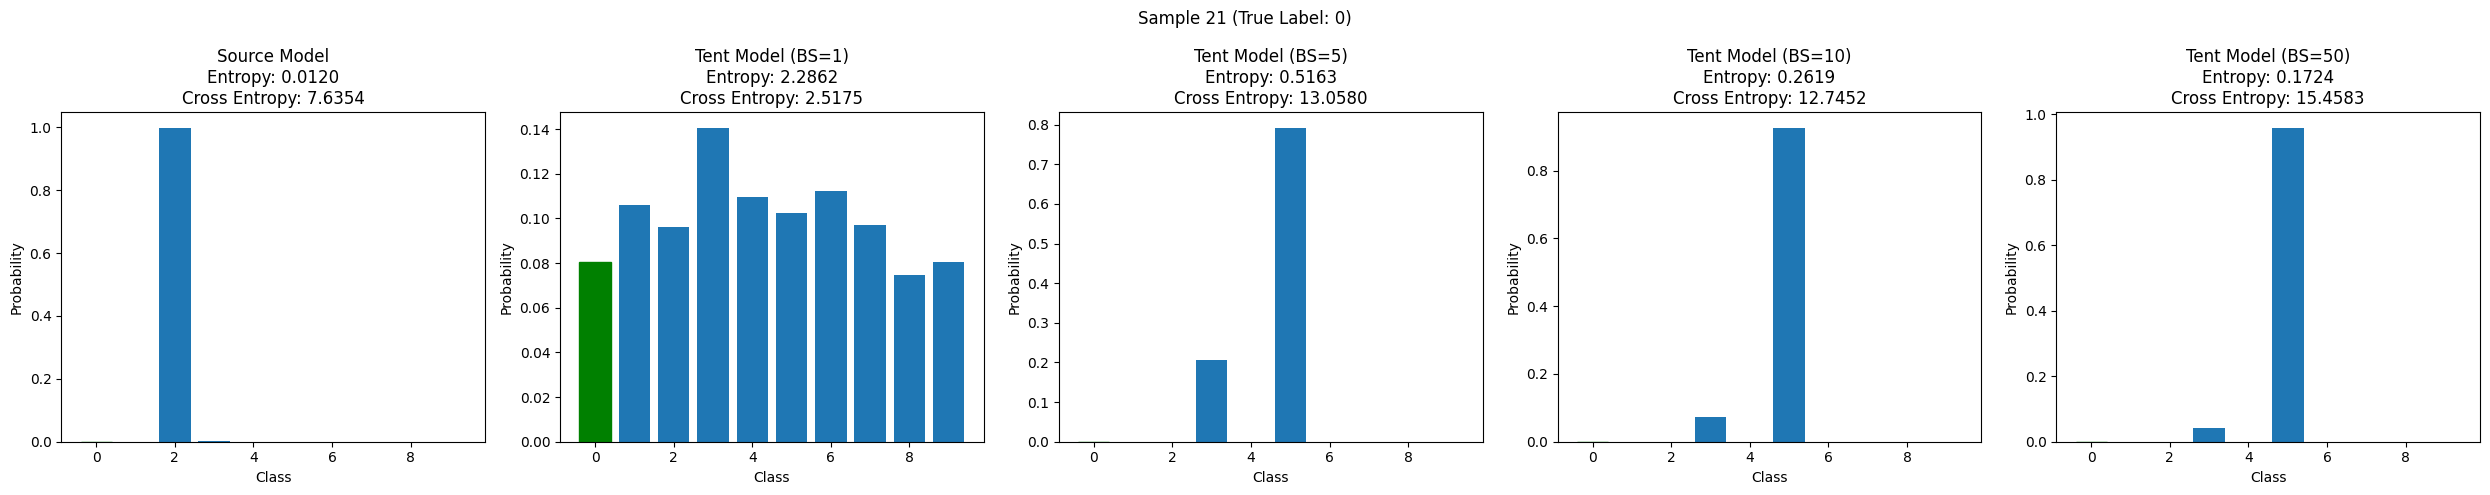

Sample 21:
Source 모델 - 예측: 2, 엔트로피: 0.0120, 크로스 엔트로피: 7.6354
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5175
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.0580
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 12.7452
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.4583
실제 레이블: 0



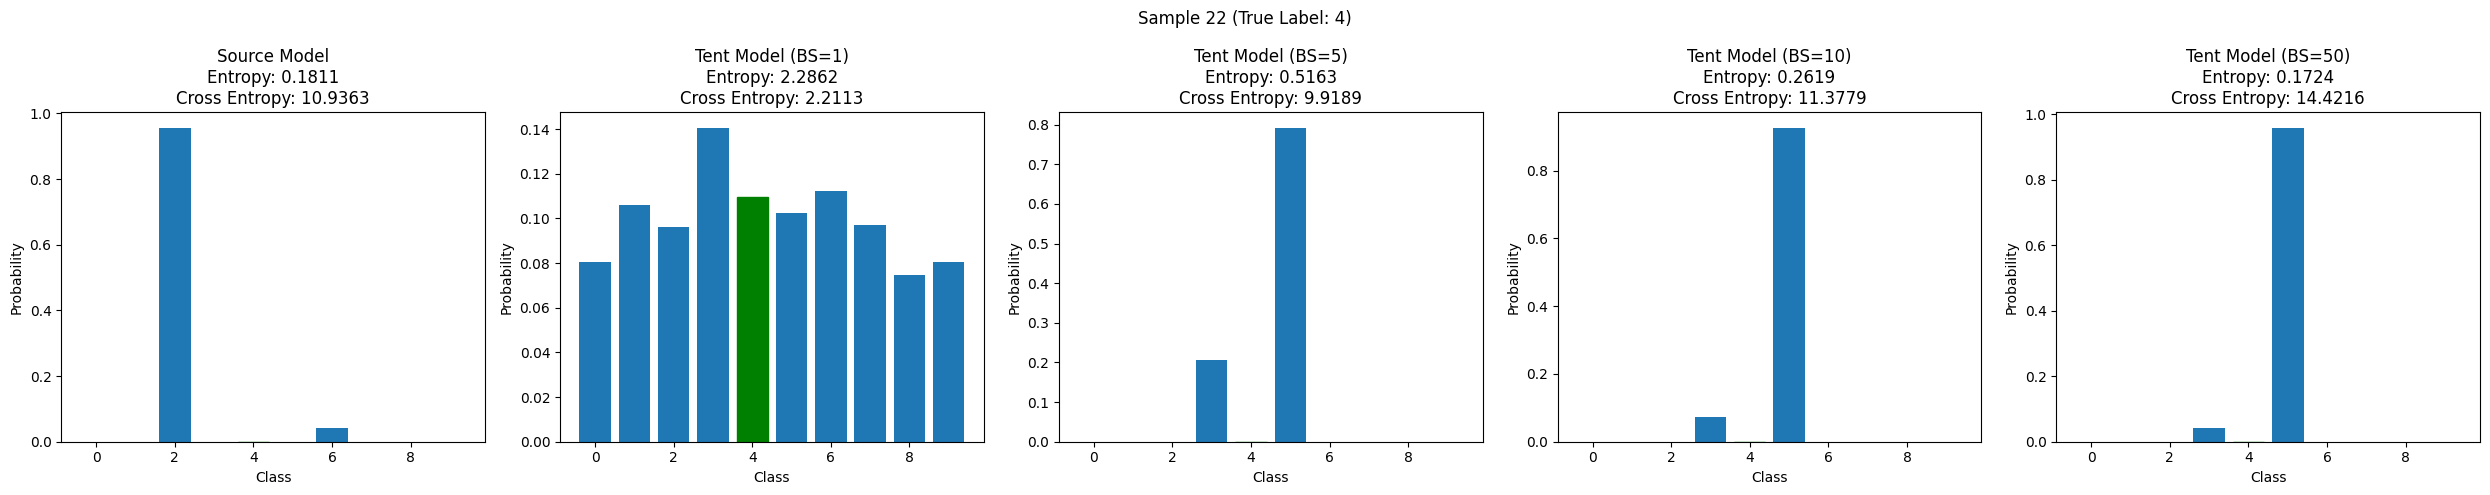

Sample 22:
Source 모델 - 예측: 2, 엔트로피: 0.1811, 크로스 엔트로피: 10.9363
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2113
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 9.9189
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.3779
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.4216
실제 레이블: 4



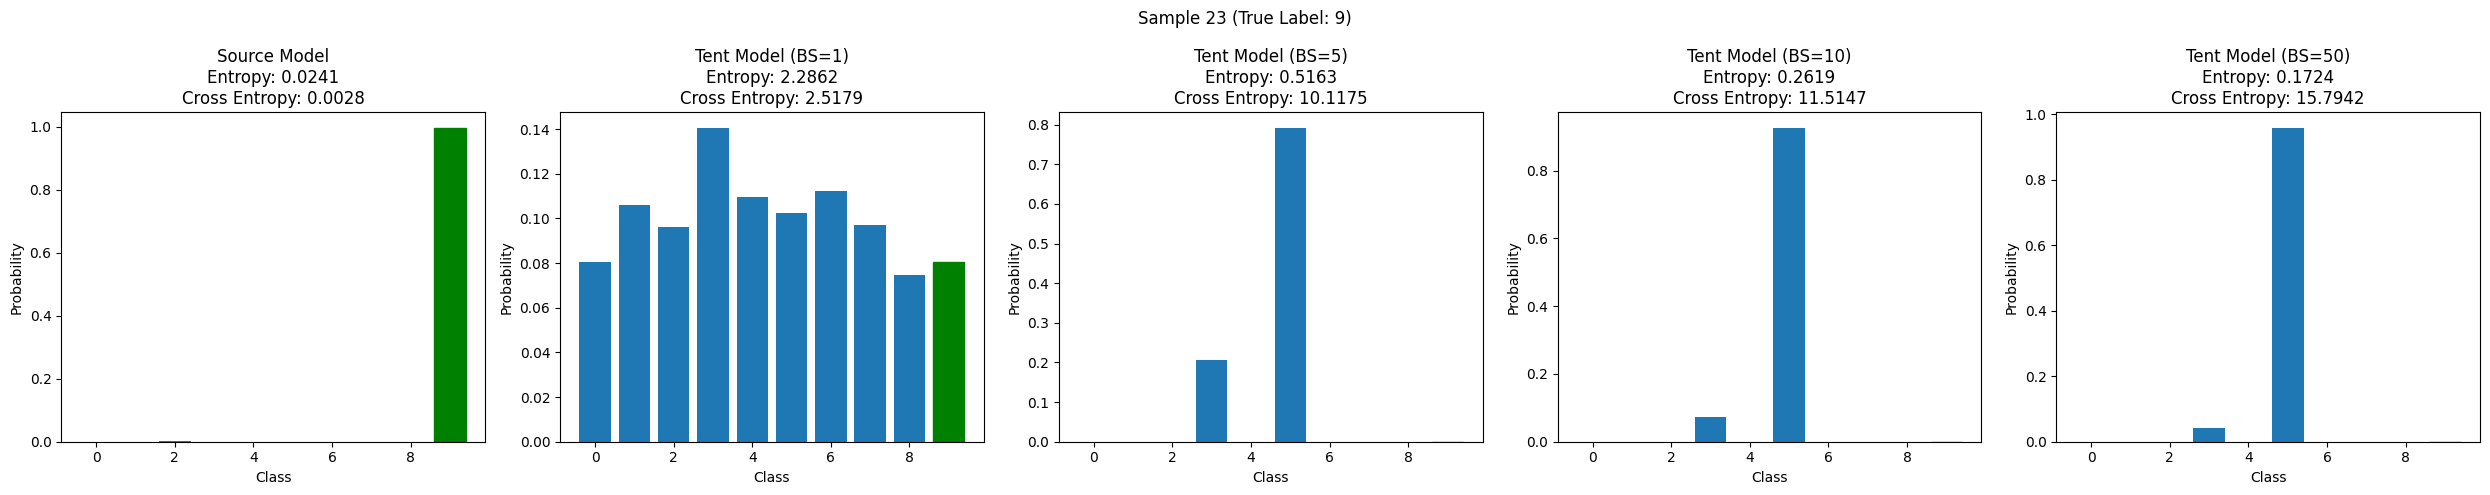

Sample 23:
Source 모델 - 예측: 9, 엔트로피: 0.0241, 크로스 엔트로피: 0.0028
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5179
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 10.1175
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5147
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7942
실제 레이블: 9



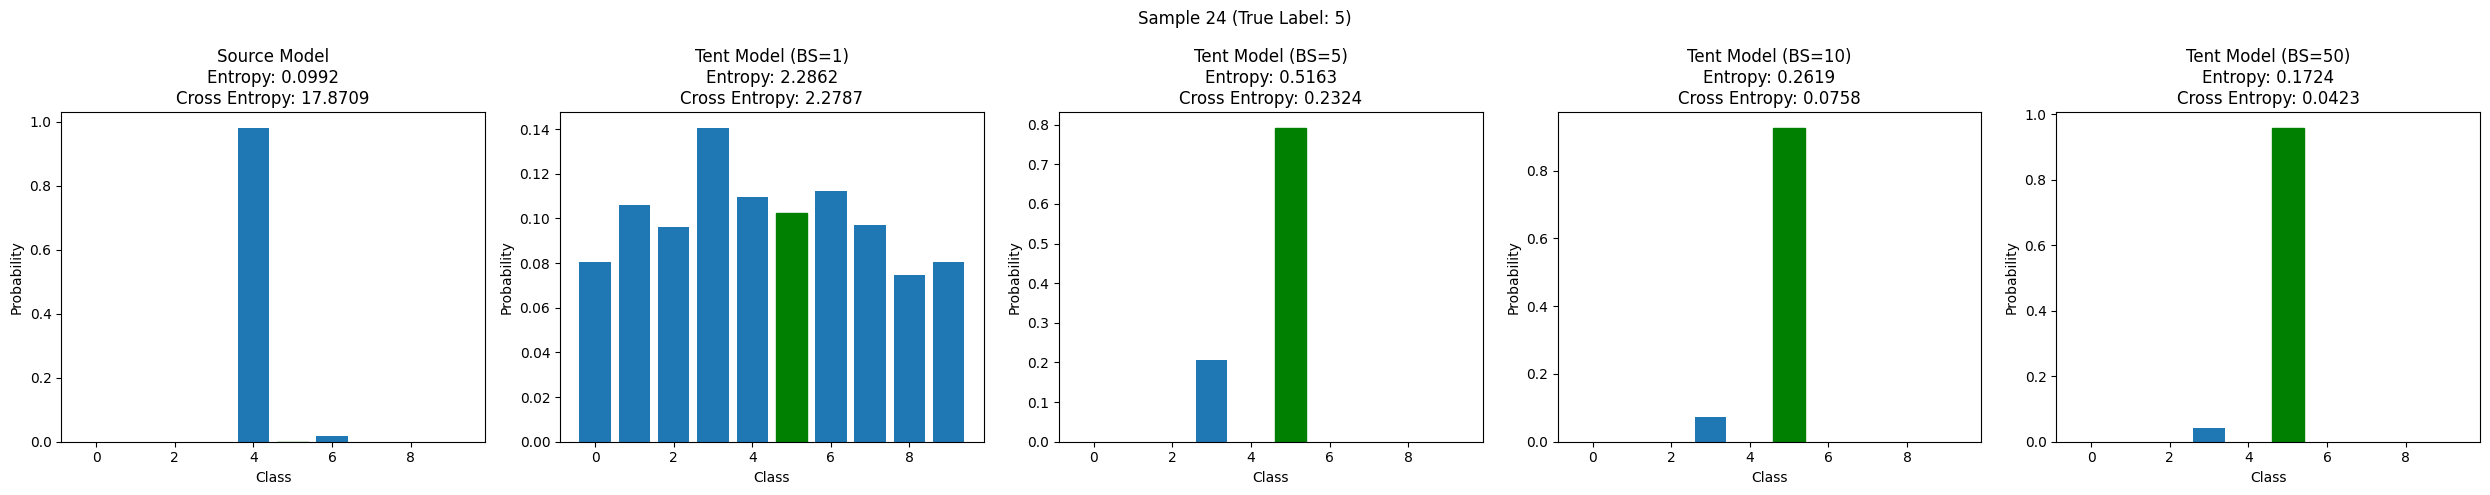

Sample 24:
Source 모델 - 예측: 4, 엔트로피: 0.0992, 크로스 엔트로피: 17.8709
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2787
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 0.2324
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 0.0758
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 0.0423
실제 레이블: 5



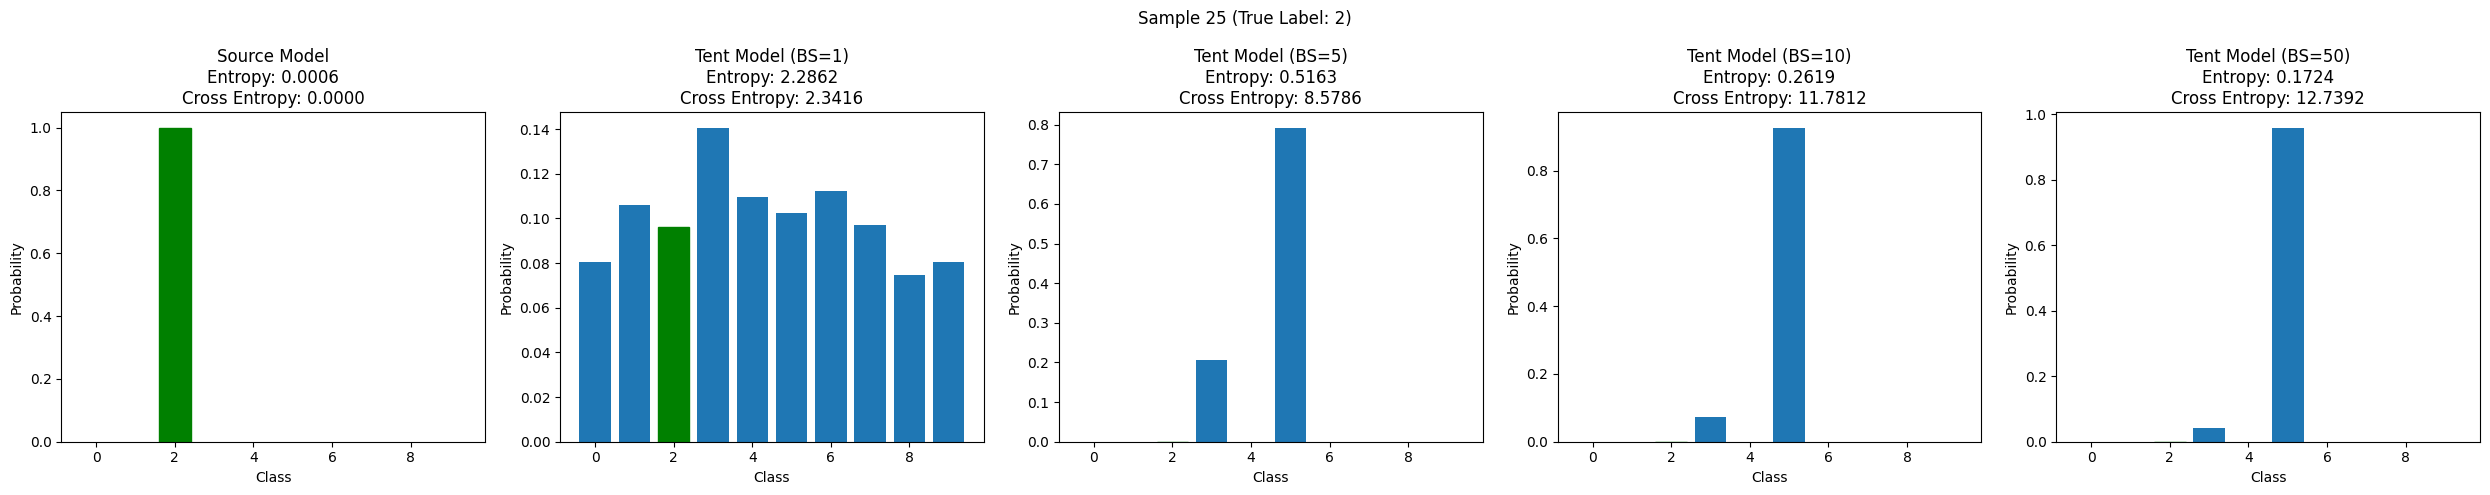

Sample 25:
Source 모델 - 예측: 2, 엔트로피: 0.0006, 크로스 엔트로피: 0.0000
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.3416
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 8.5786
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.7812
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 12.7392
실제 레이블: 2



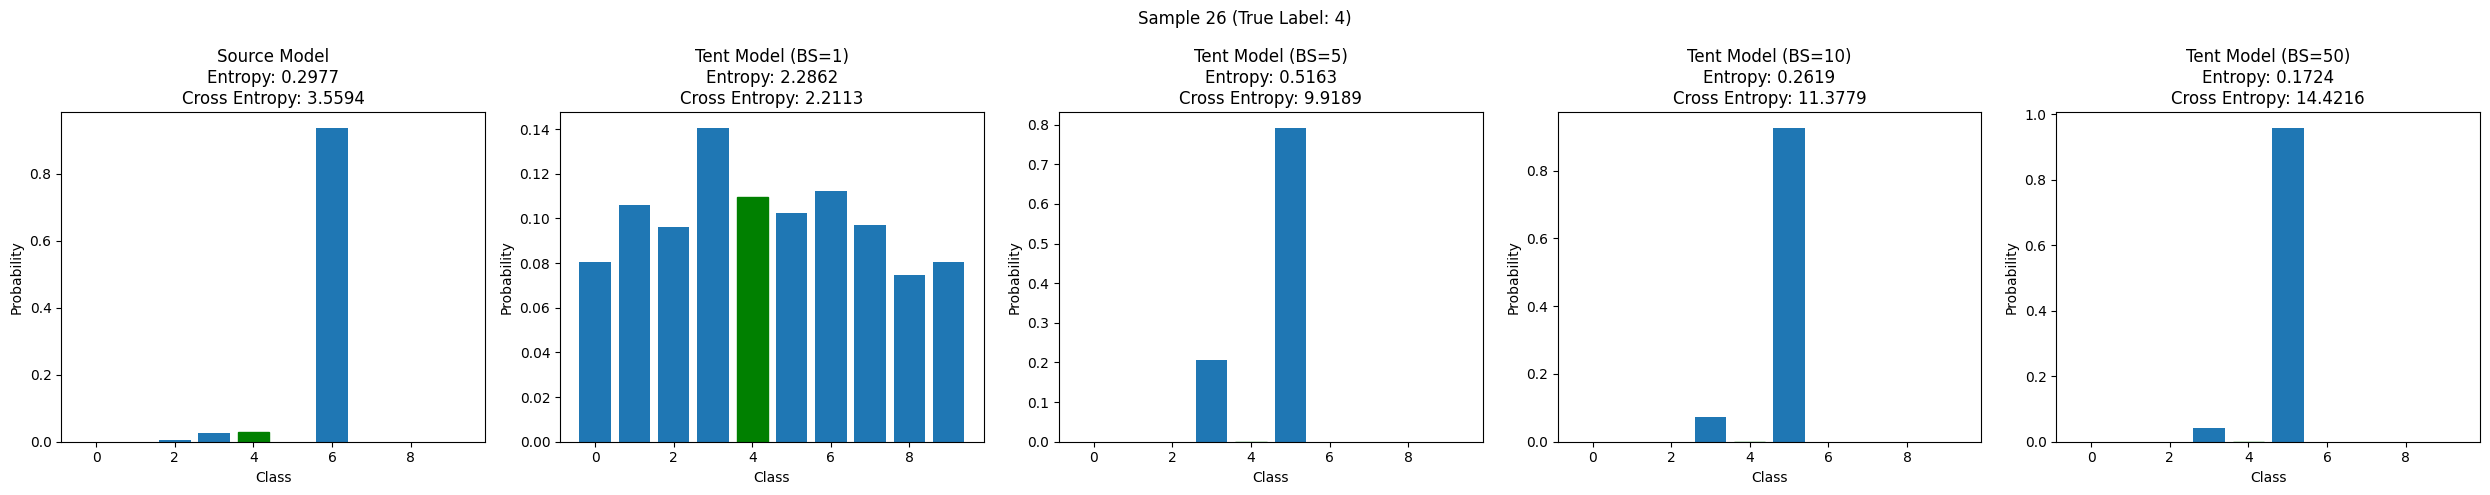

Sample 26:
Source 모델 - 예측: 6, 엔트로피: 0.2977, 크로스 엔트로피: 3.5594
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2113
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 9.9189
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.3779
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.4216
실제 레이블: 4



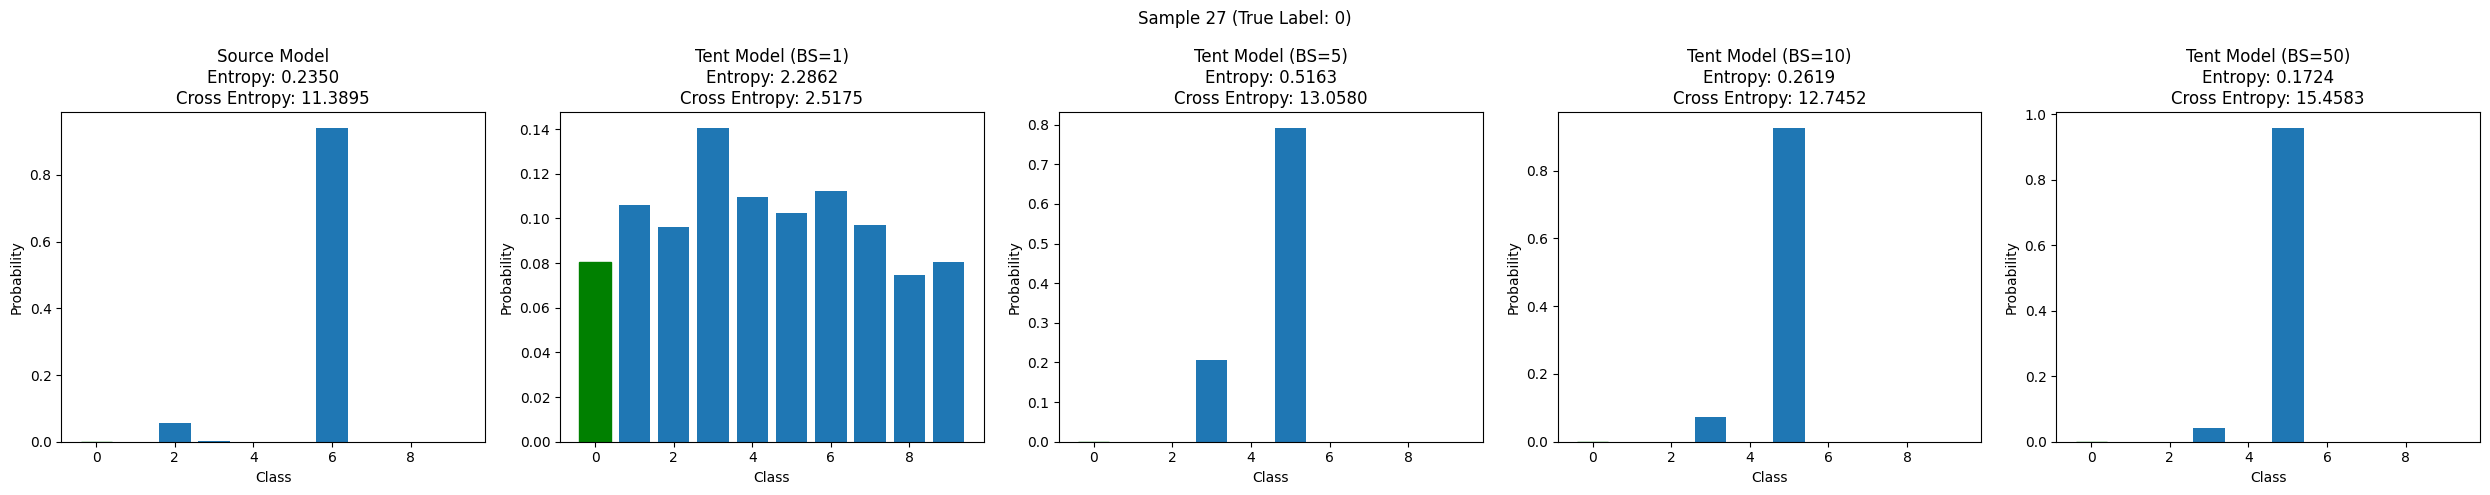

Sample 27:
Source 모델 - 예측: 6, 엔트로피: 0.2350, 크로스 엔트로피: 11.3895
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5175
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.0580
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 12.7452
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.4583
실제 레이블: 0



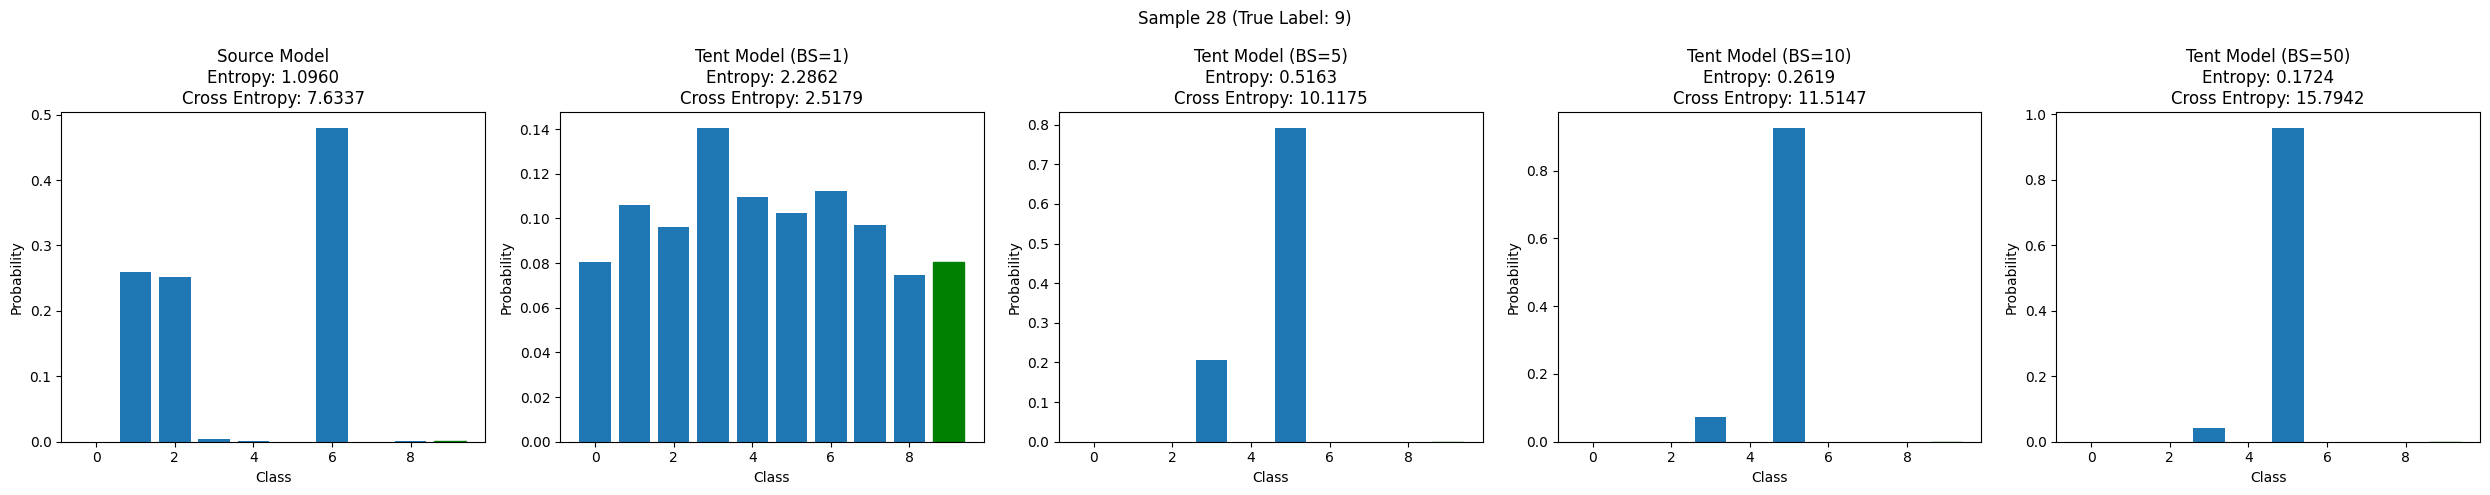

Sample 28:
Source 모델 - 예측: 6, 엔트로피: 1.0960, 크로스 엔트로피: 7.6337
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5179
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 10.1175
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5147
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7942
실제 레이블: 9



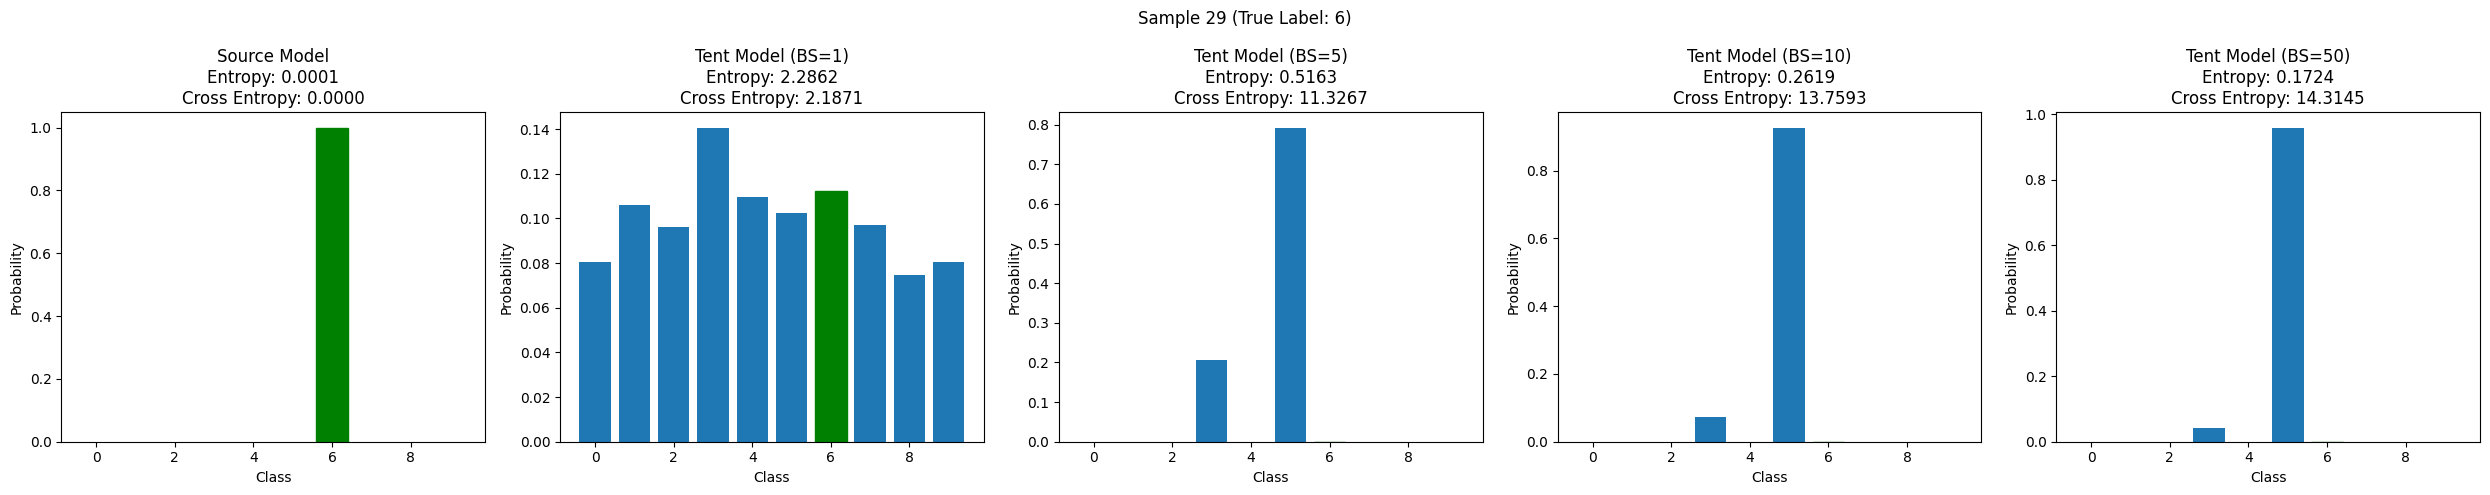

Sample 29:
Source 모델 - 예측: 6, 엔트로피: 0.0001, 크로스 엔트로피: 0.0000
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



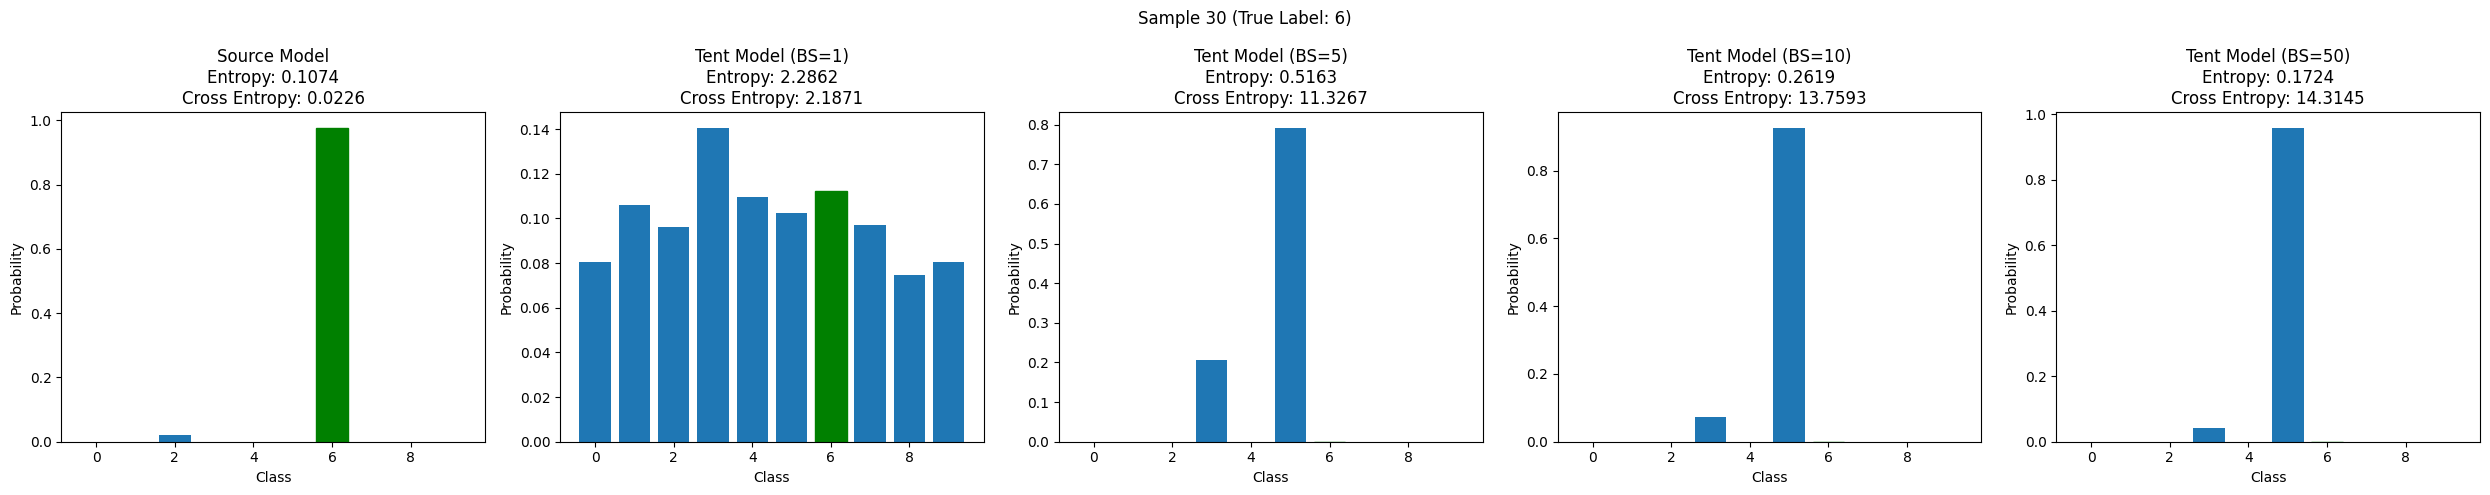

Sample 30:
Source 모델 - 예측: 6, 엔트로피: 0.1074, 크로스 엔트로피: 0.0226
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



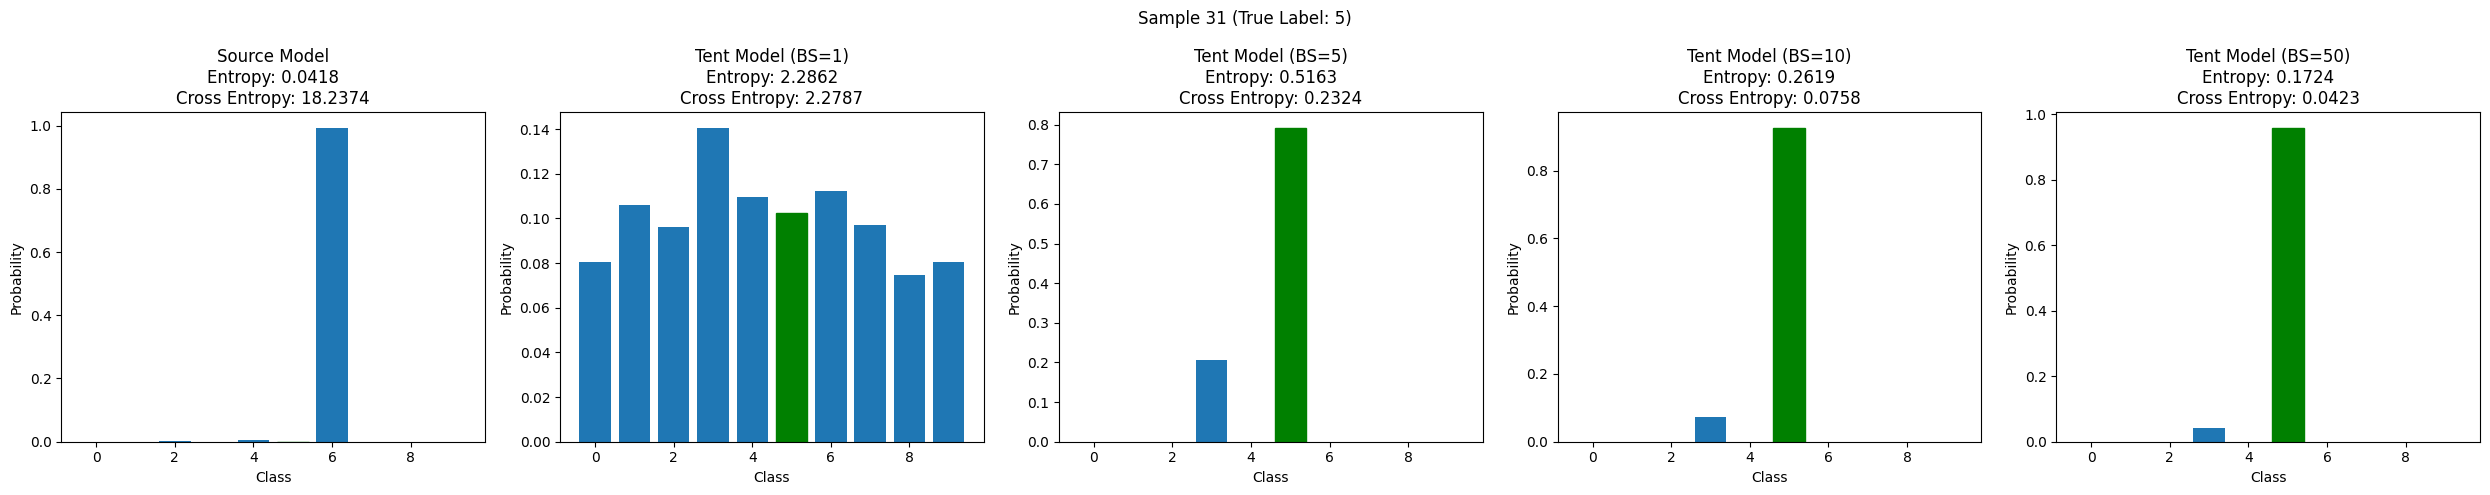

Sample 31:
Source 모델 - 예측: 6, 엔트로피: 0.0418, 크로스 엔트로피: 18.2374
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2787
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 0.2324
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 0.0758
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 0.0423
실제 레이블: 5



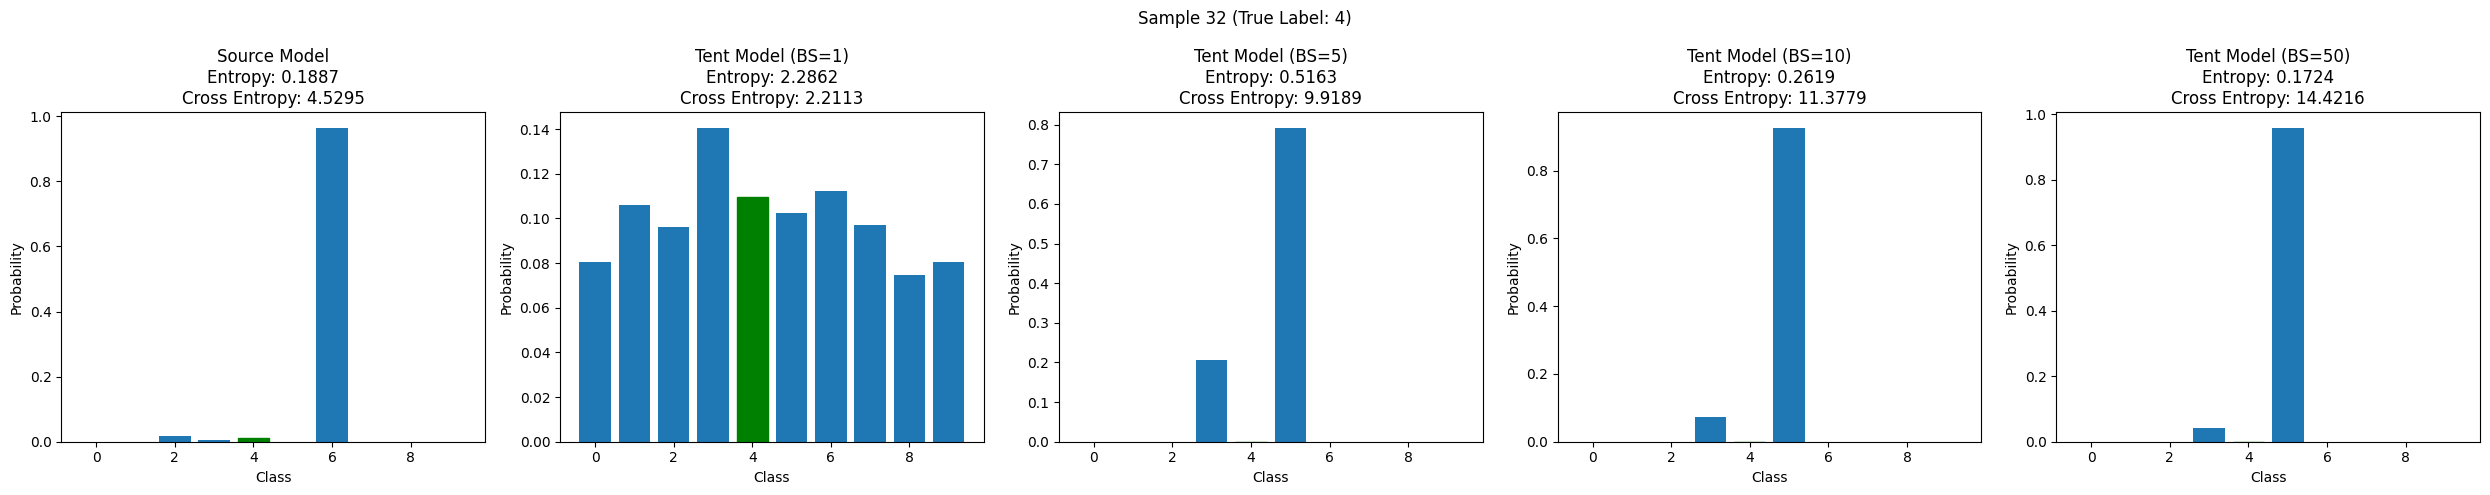

Sample 32:
Source 모델 - 예측: 6, 엔트로피: 0.1887, 크로스 엔트로피: 4.5295
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2113
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 9.9189
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.3779
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.4216
실제 레이블: 4



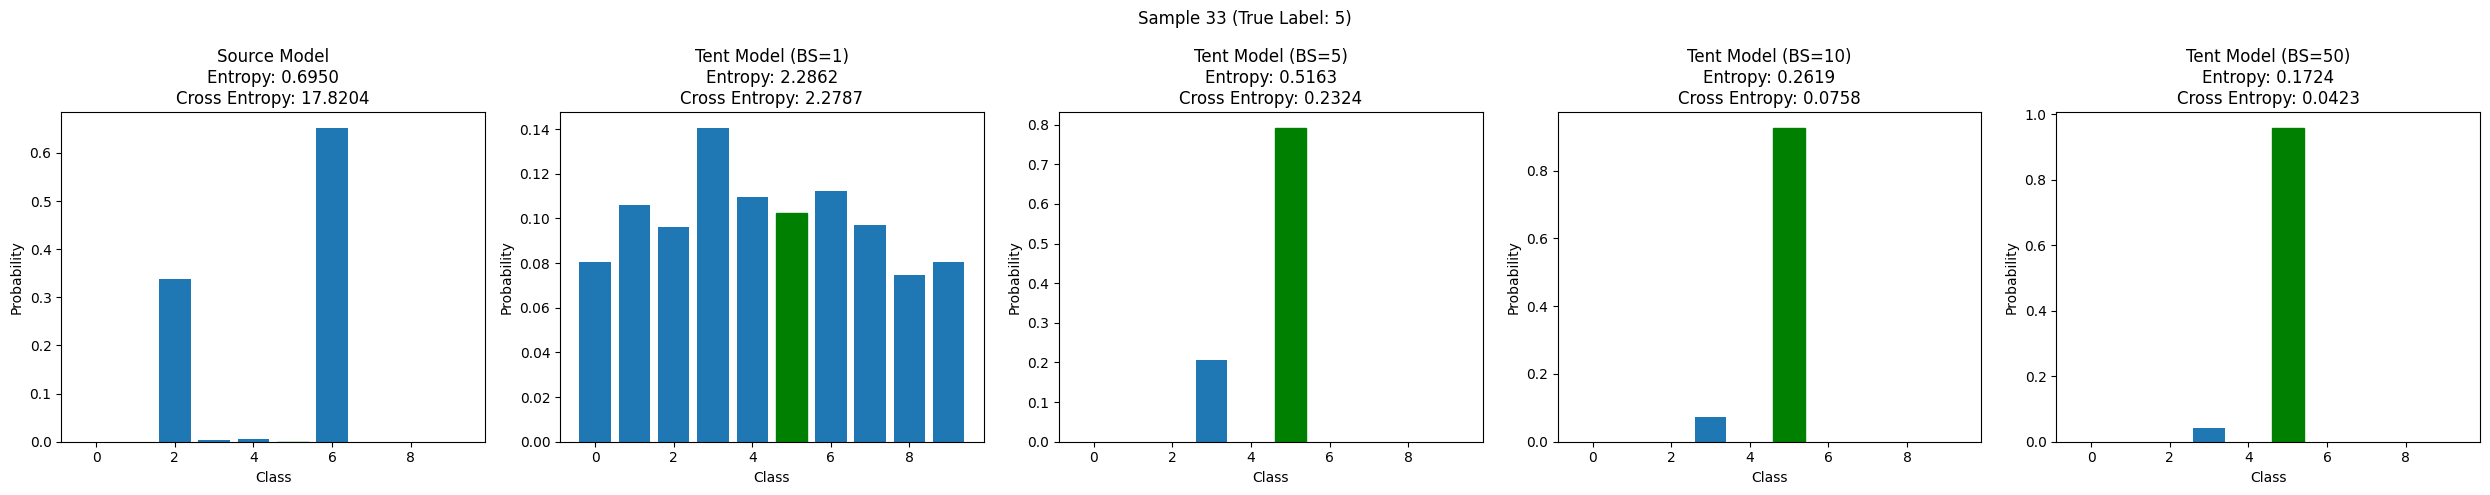

Sample 33:
Source 모델 - 예측: 6, 엔트로피: 0.6950, 크로스 엔트로피: 17.8204
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2787
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 0.2324
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 0.0758
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 0.0423
실제 레이블: 5



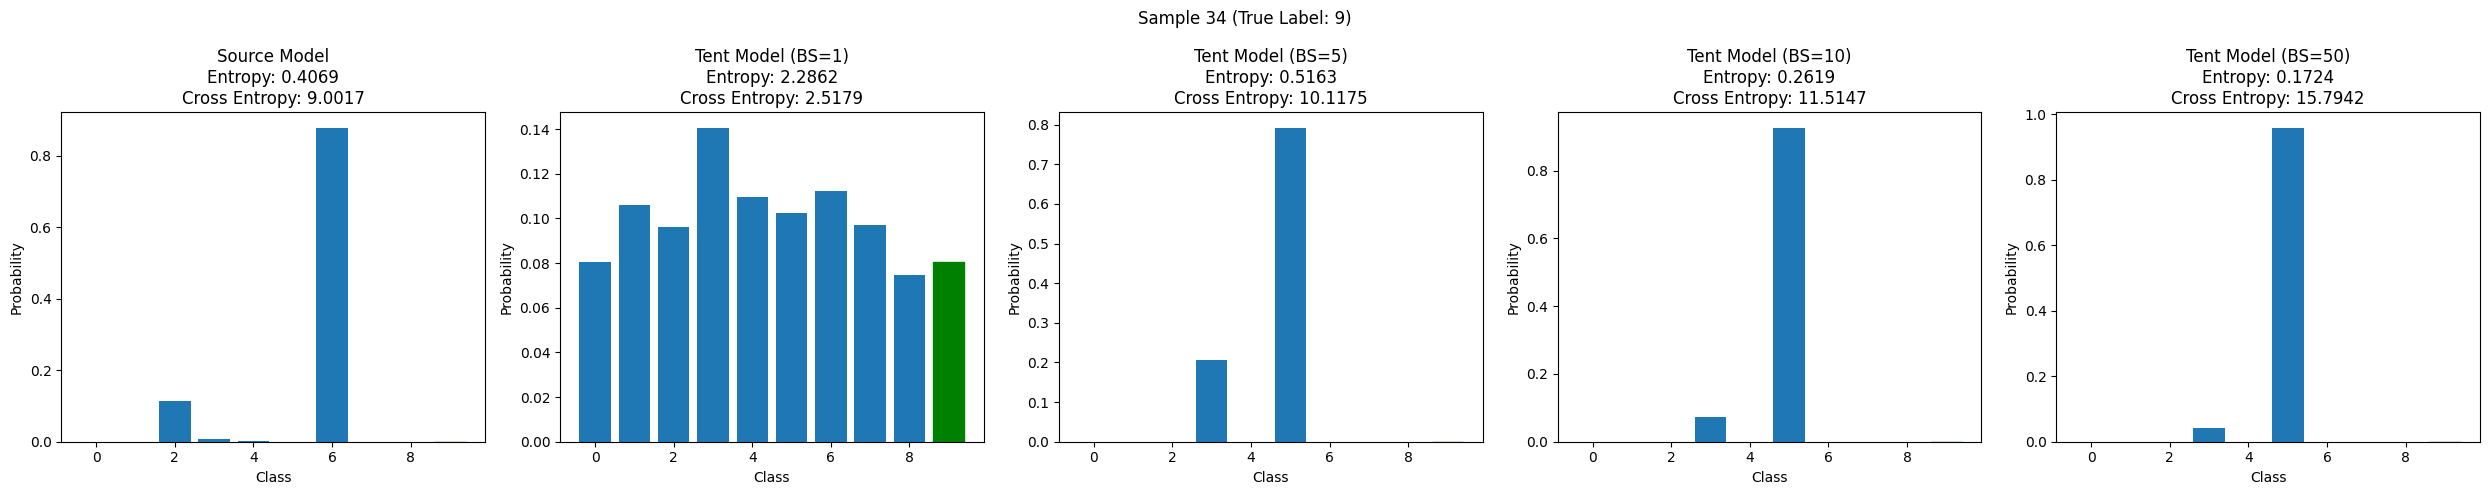

Sample 34:
Source 모델 - 예측: 6, 엔트로피: 0.4069, 크로스 엔트로피: 9.0017
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5179
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 10.1175
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5147
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7942
실제 레이블: 9



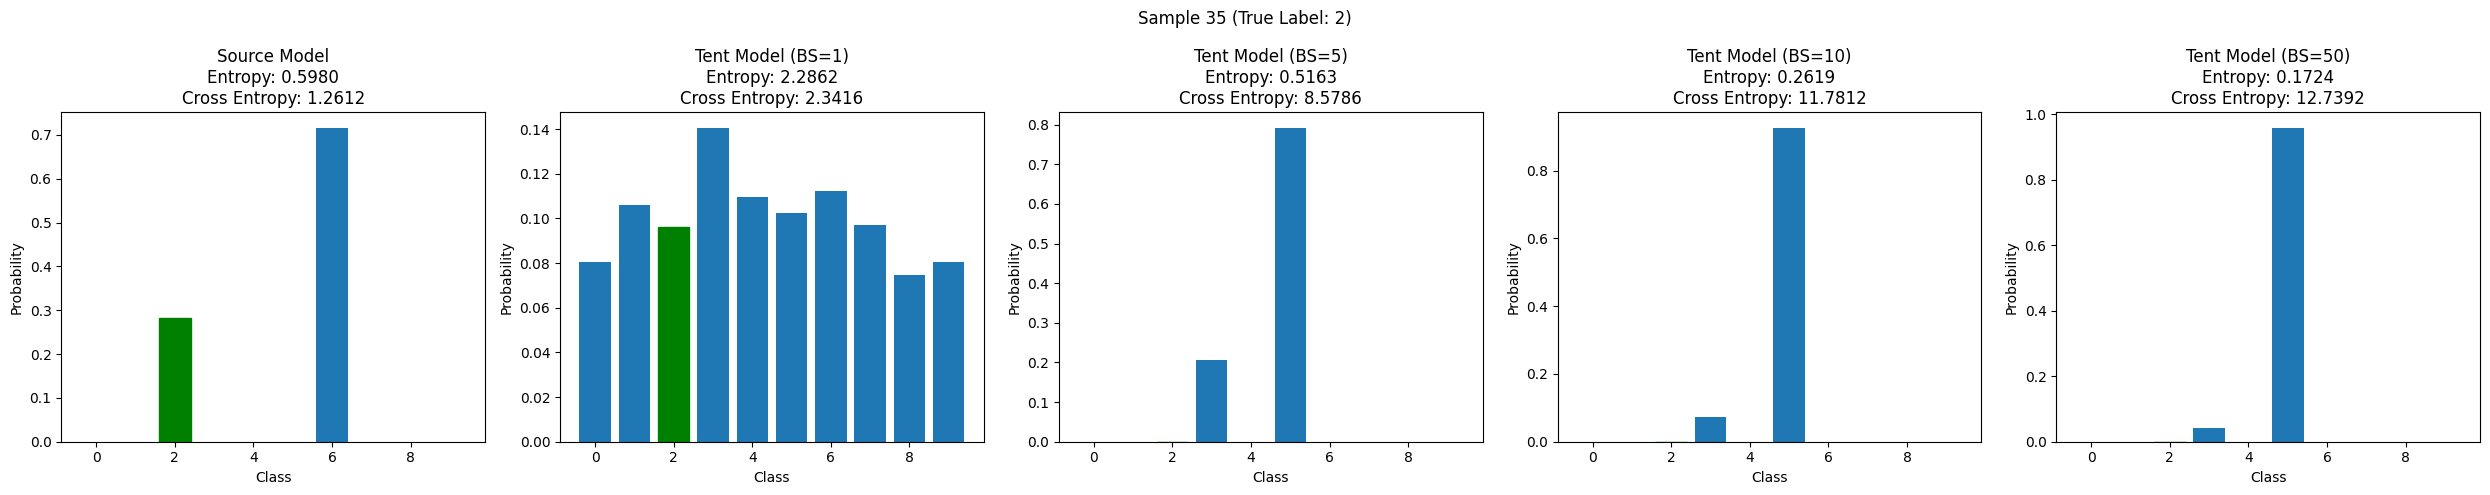

Sample 35:
Source 모델 - 예측: 6, 엔트로피: 0.5980, 크로스 엔트로피: 1.2612
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.3416
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 8.5786
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.7812
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 12.7392
실제 레이블: 2



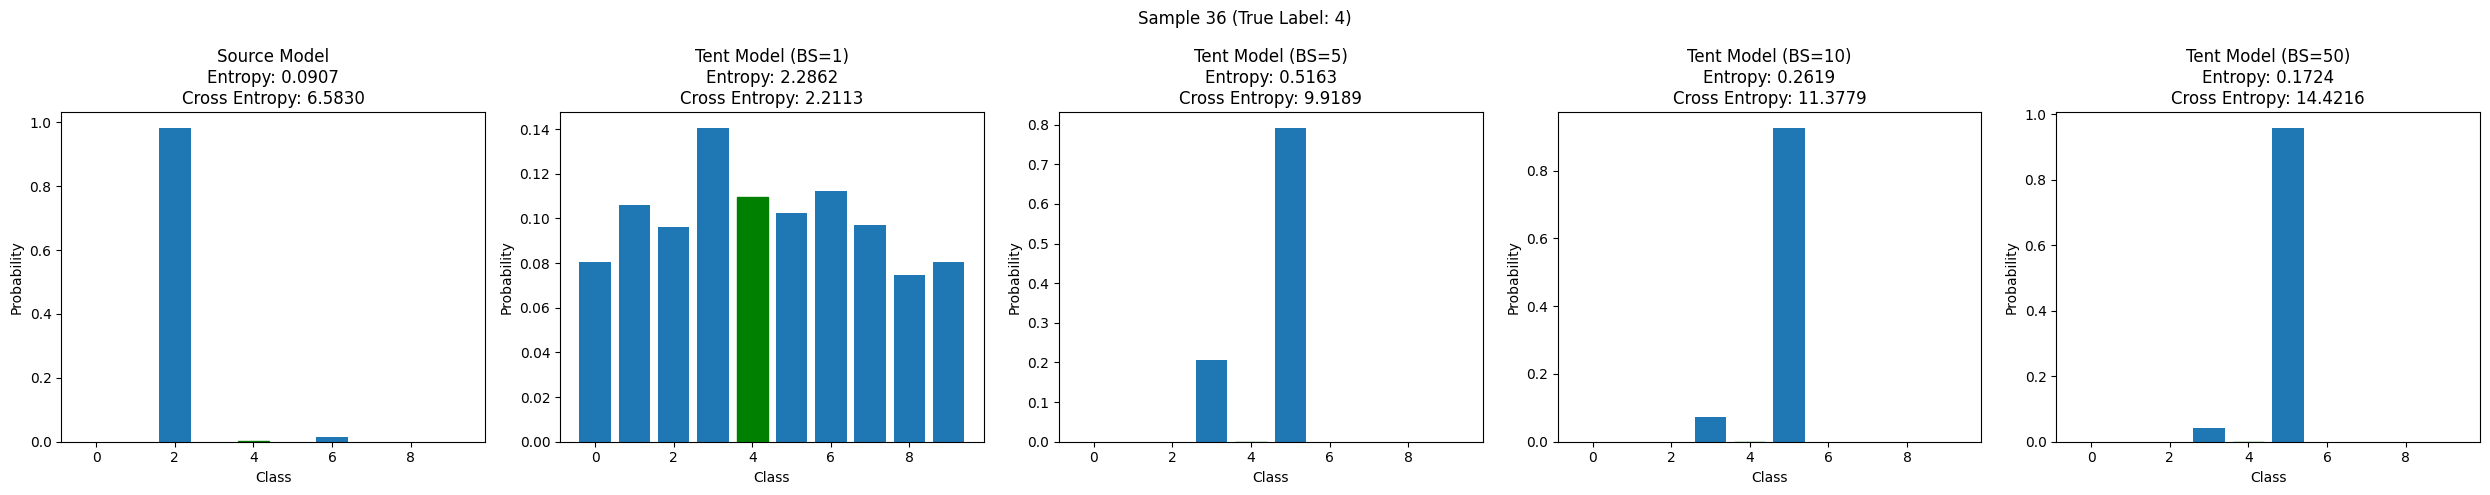

Sample 36:
Source 모델 - 예측: 2, 엔트로피: 0.0907, 크로스 엔트로피: 6.5830
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2113
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 9.9189
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.3779
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.4216
실제 레이블: 4



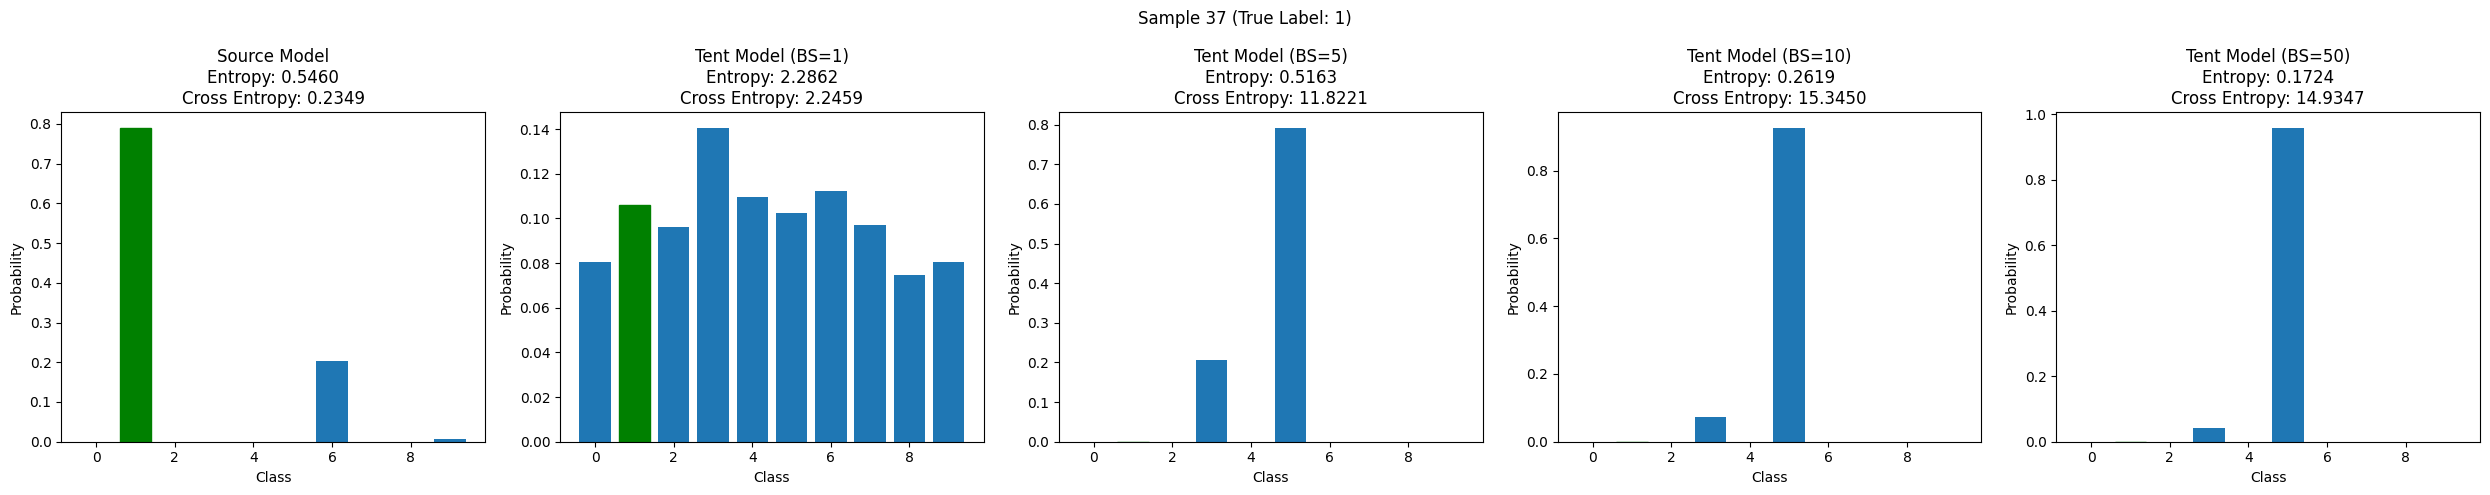

Sample 37:
Source 모델 - 예측: 1, 엔트로피: 0.5460, 크로스 엔트로피: 0.2349
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2459
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.8221
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 15.3450
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.9347
실제 레이블: 1



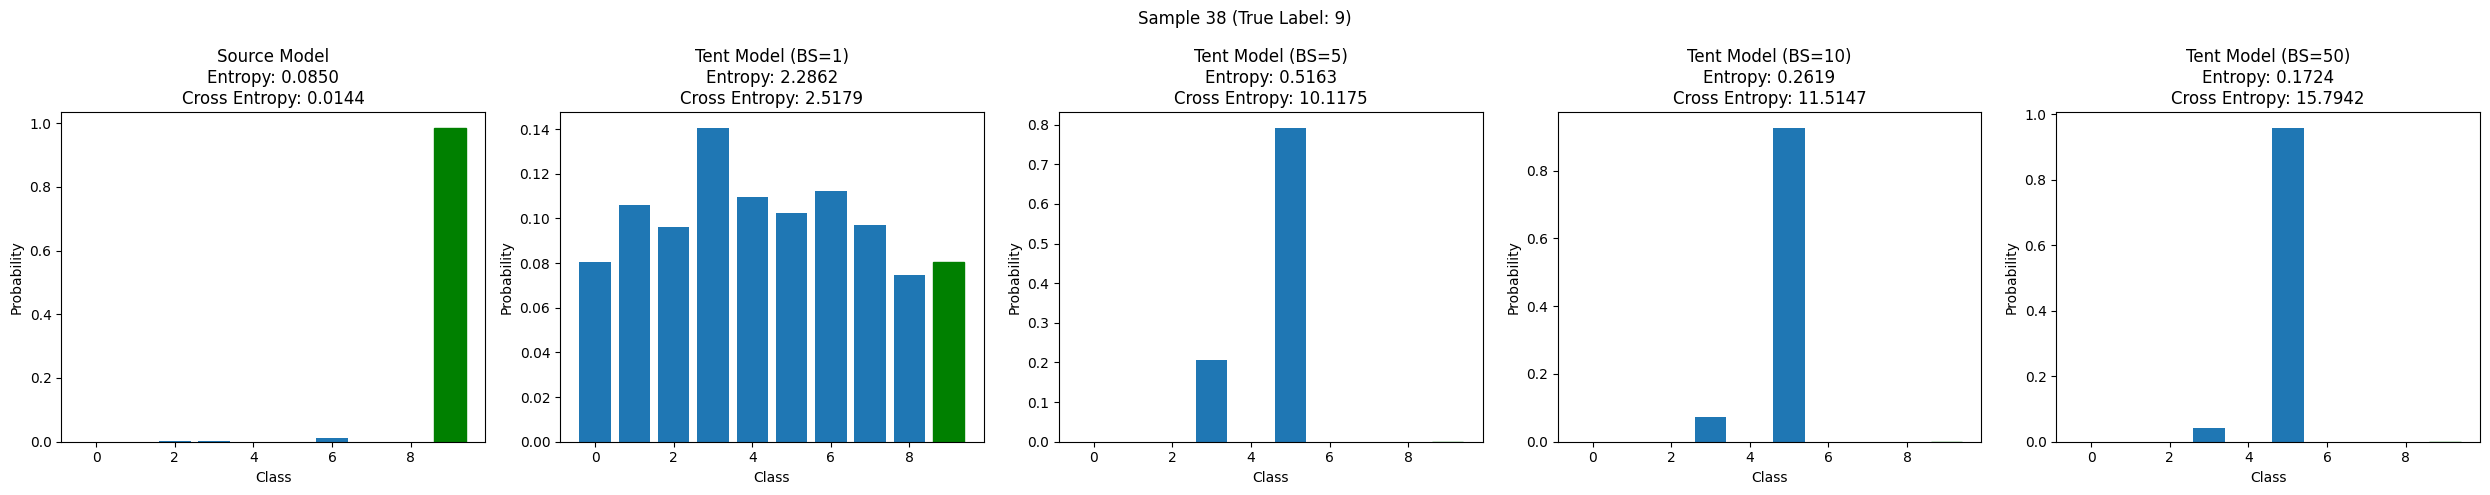

Sample 38:
Source 모델 - 예측: 9, 엔트로피: 0.0850, 크로스 엔트로피: 0.0144
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5179
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 10.1175
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5147
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7942
실제 레이블: 9



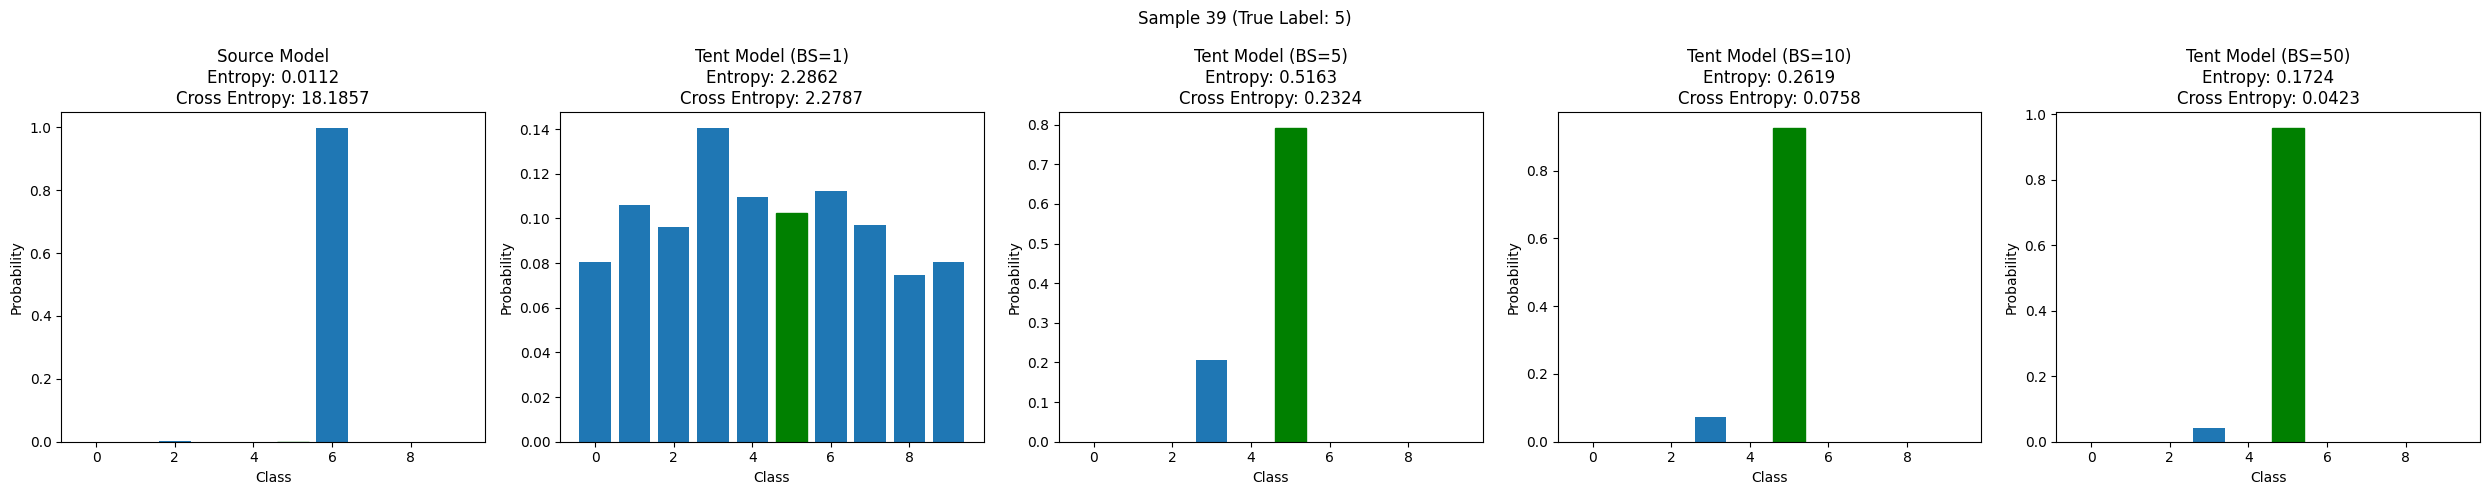

Sample 39:
Source 모델 - 예측: 6, 엔트로피: 0.0112, 크로스 엔트로피: 18.1857
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2787
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 0.2324
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 0.0758
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 0.0423
실제 레이블: 5



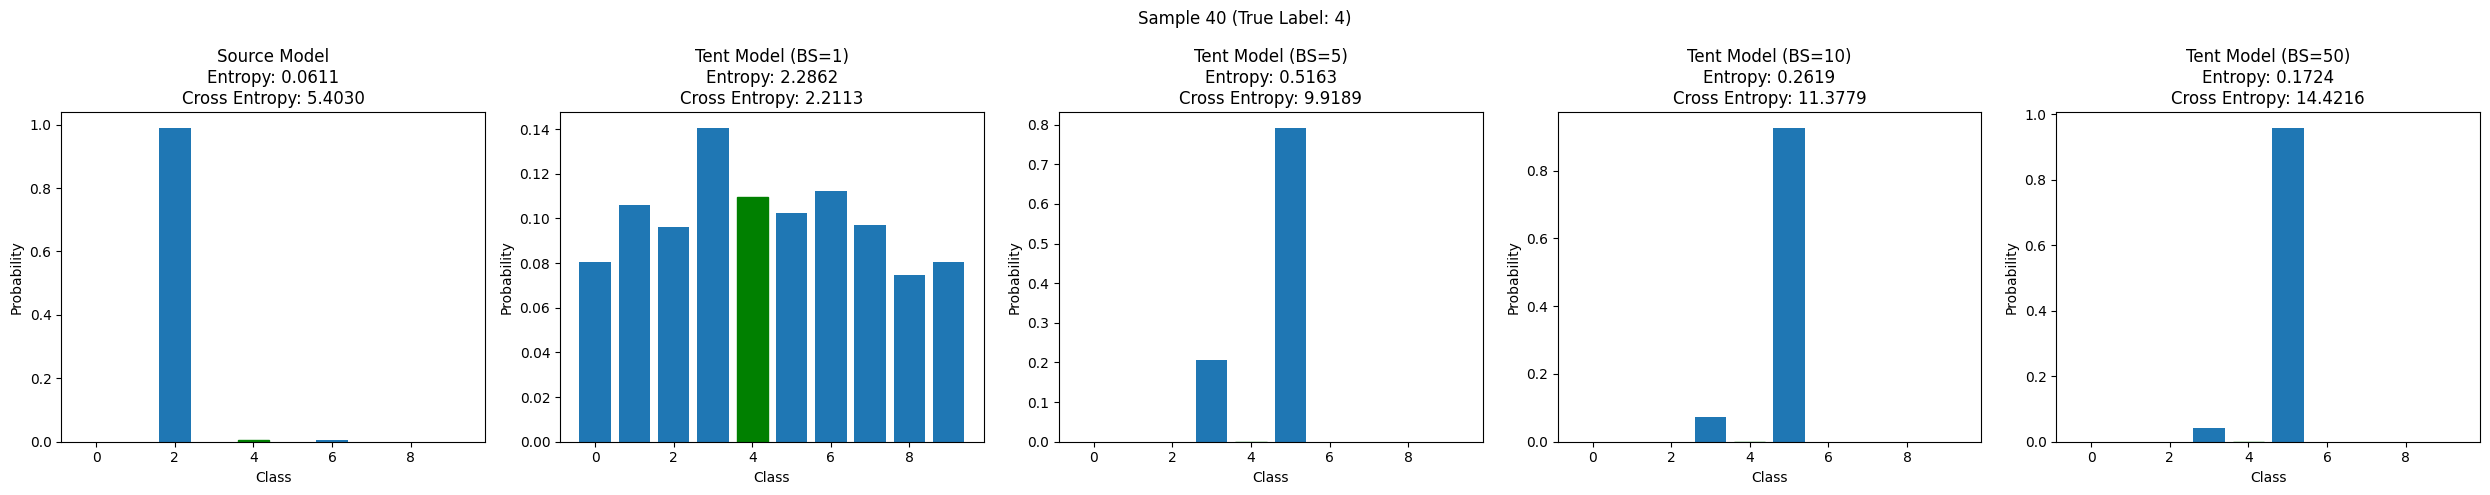

Sample 40:
Source 모델 - 예측: 2, 엔트로피: 0.0611, 크로스 엔트로피: 5.4030
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2113
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 9.9189
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.3779
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.4216
실제 레이블: 4



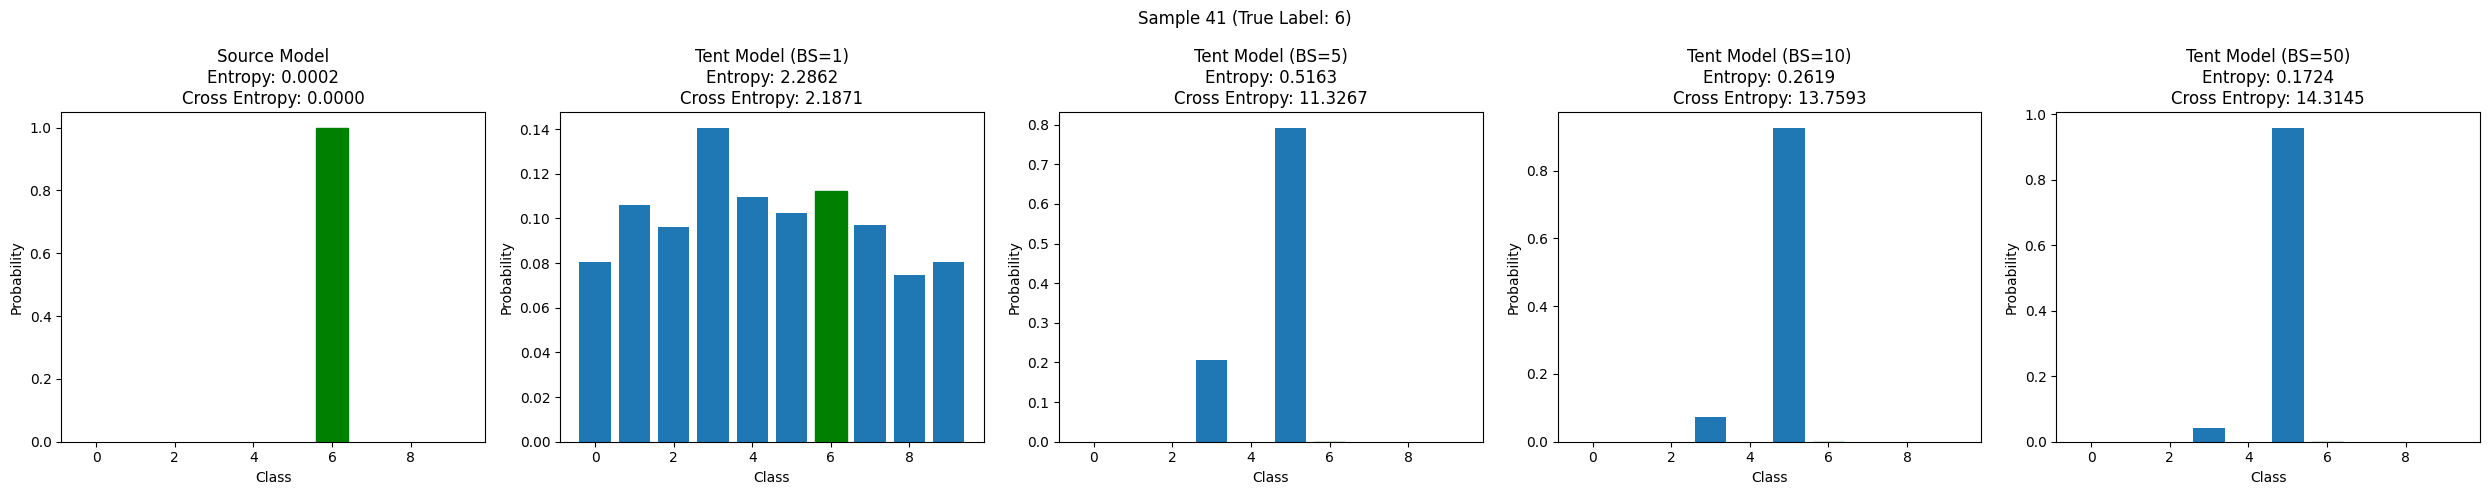

Sample 41:
Source 모델 - 예측: 6, 엔트로피: 0.0002, 크로스 엔트로피: 0.0000
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



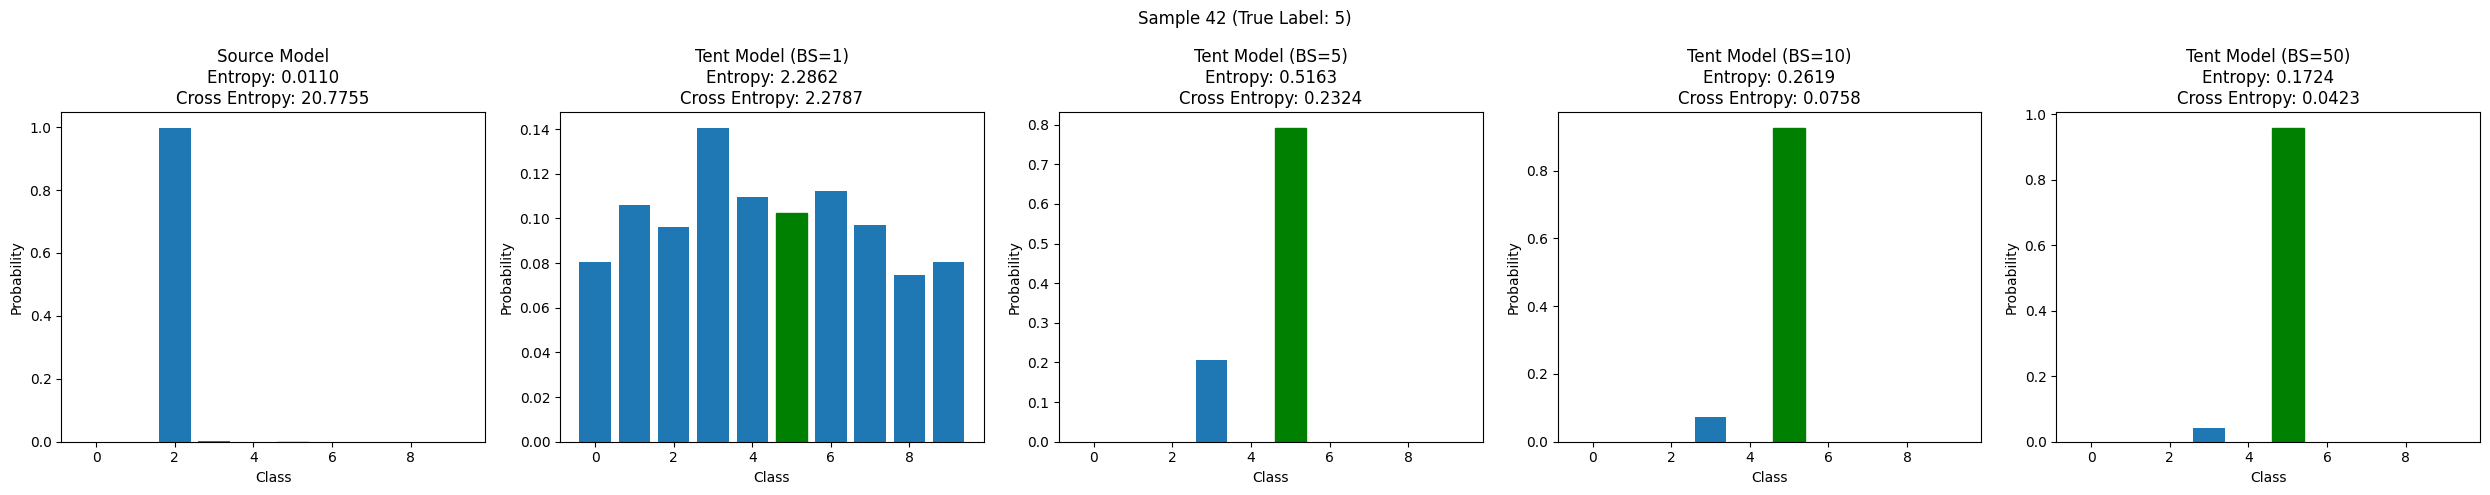

Sample 42:
Source 모델 - 예측: 2, 엔트로피: 0.0110, 크로스 엔트로피: 20.7755
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.2787
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 0.2324
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 0.0758
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 0.0423
실제 레이블: 5



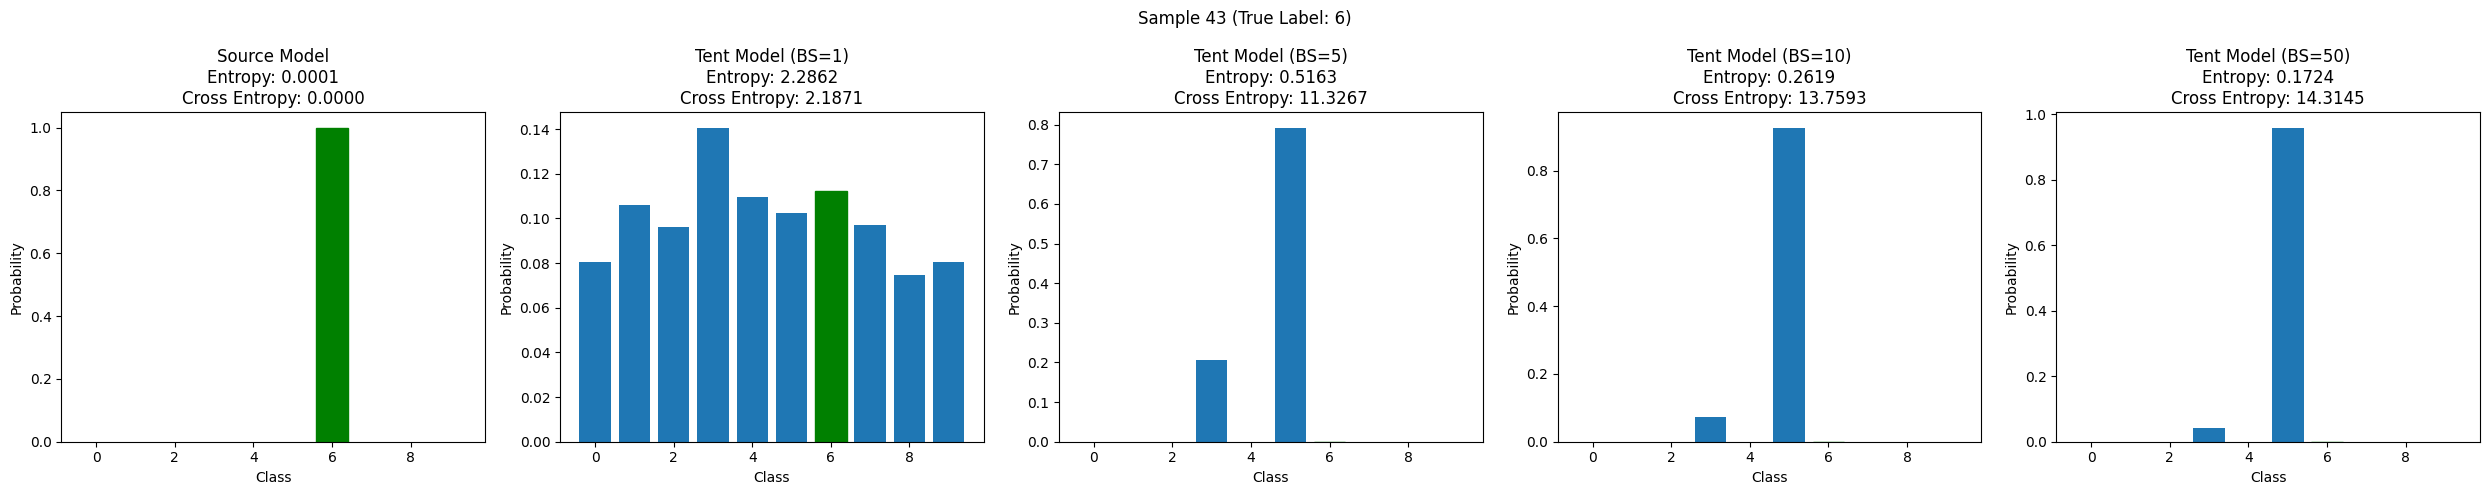

Sample 43:
Source 모델 - 예측: 6, 엔트로피: 0.0001, 크로스 엔트로피: 0.0000
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



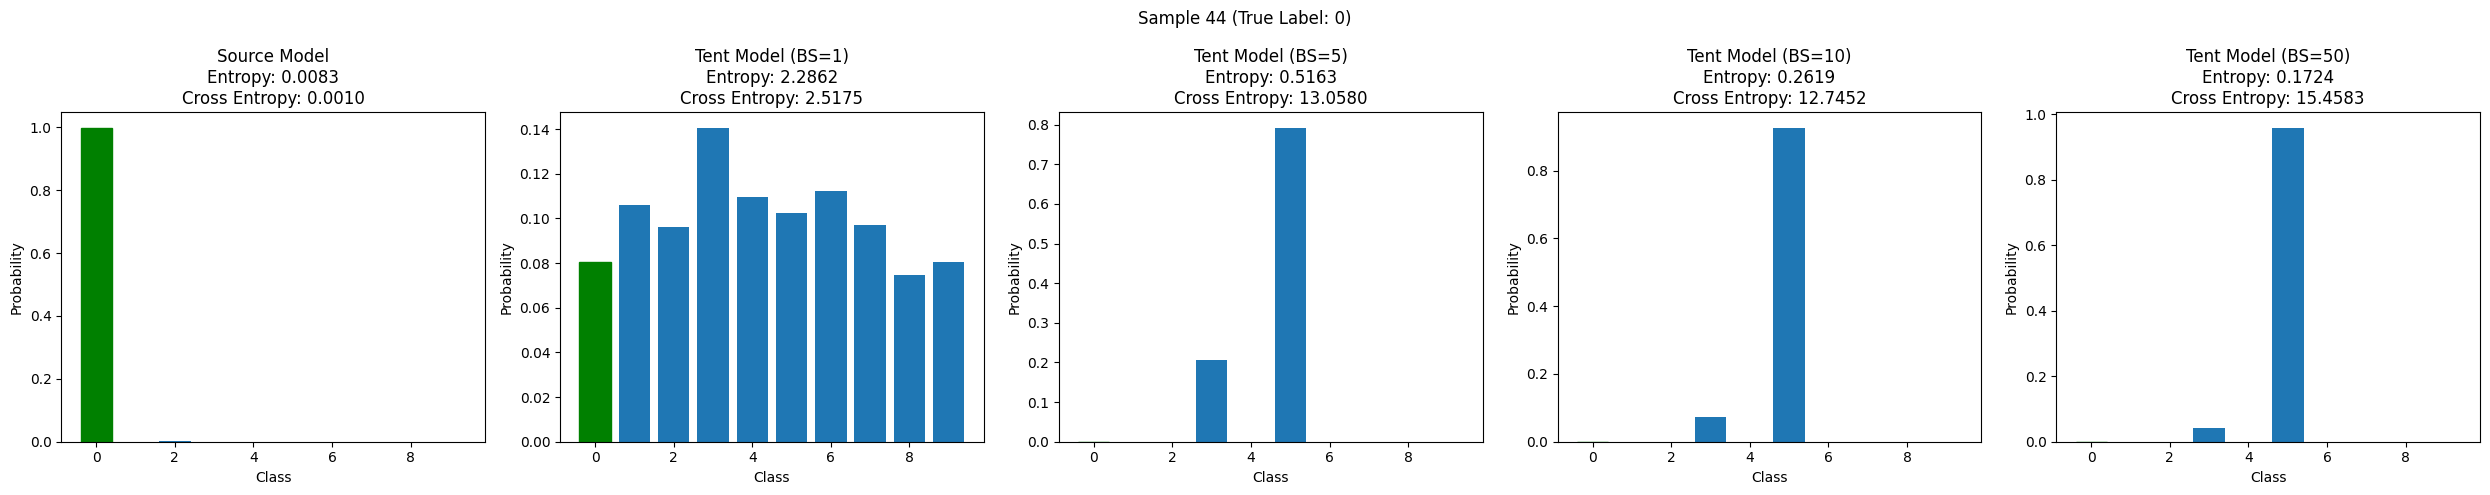

Sample 44:
Source 모델 - 예측: 0, 엔트로피: 0.0083, 크로스 엔트로피: 0.0010
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5175
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 13.0580
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 12.7452
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.4583
실제 레이블: 0



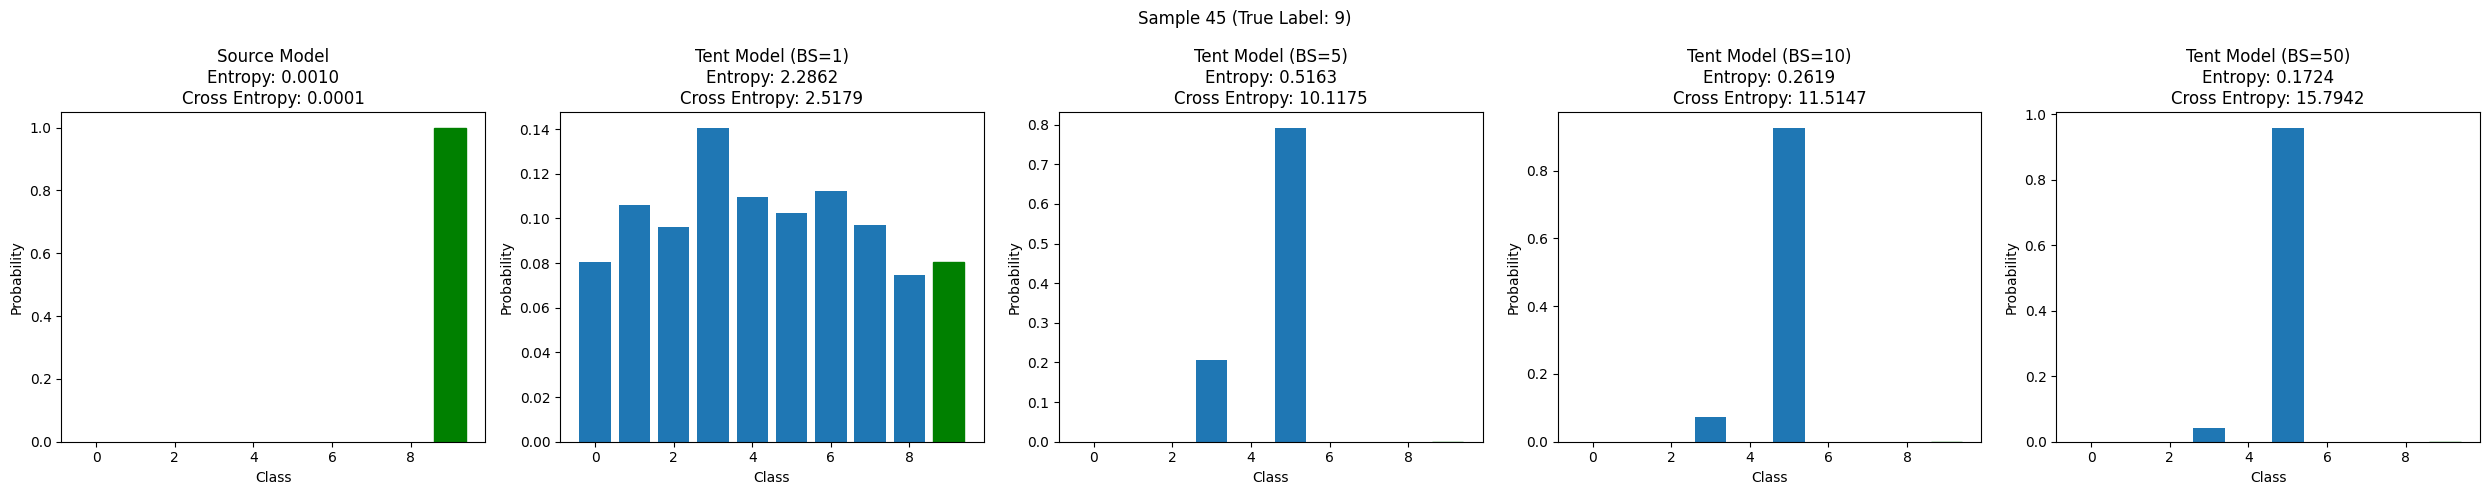

Sample 45:
Source 모델 - 예측: 9, 엔트로피: 0.0010, 크로스 엔트로피: 0.0001
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5179
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 10.1175
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5147
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7942
실제 레이블: 9



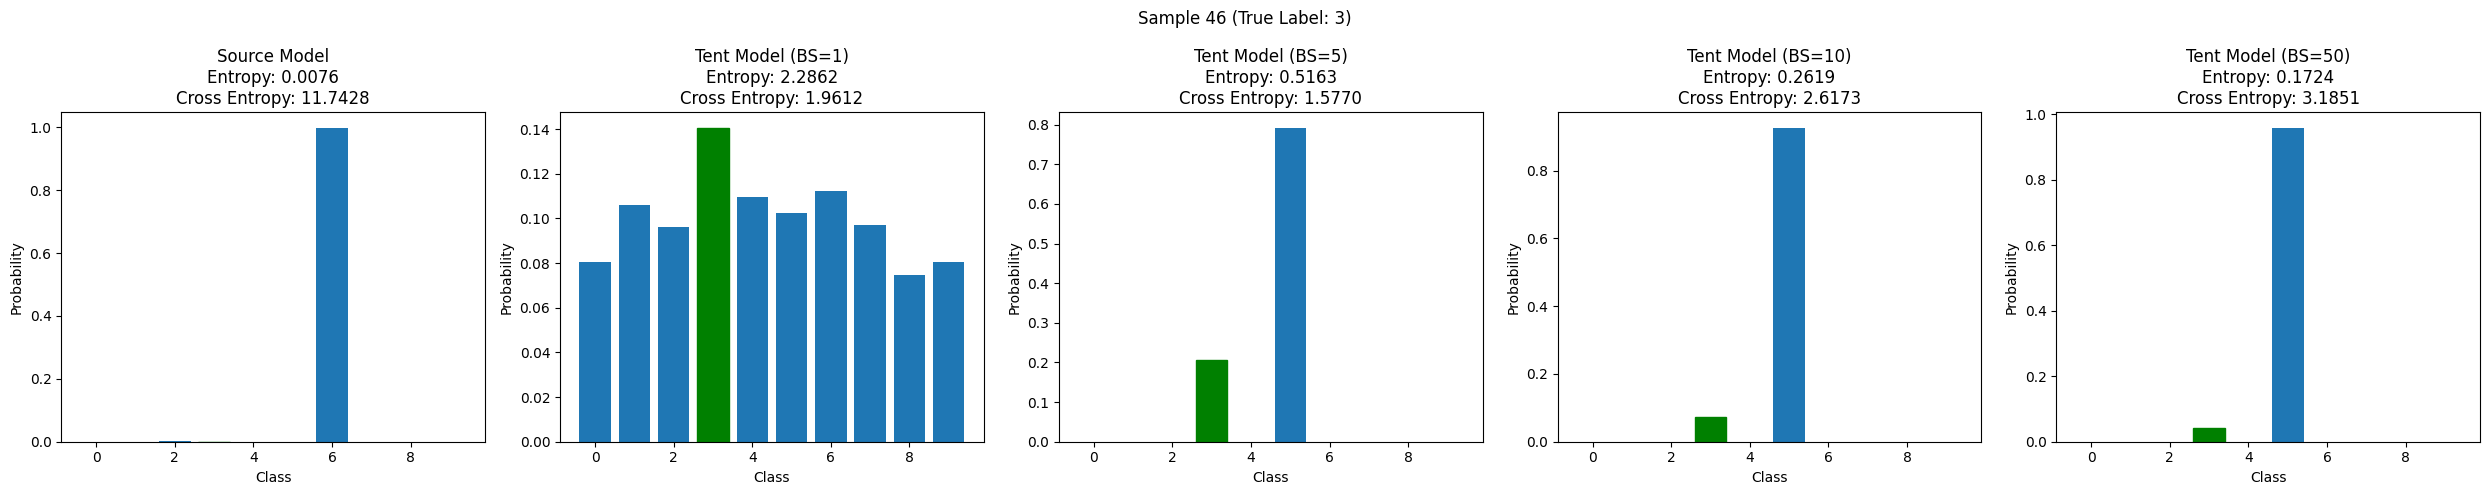

Sample 46:
Source 모델 - 예측: 6, 엔트로피: 0.0076, 크로스 엔트로피: 11.7428
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 1.9612
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 1.5770
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 2.6173
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 3.1851
실제 레이블: 3



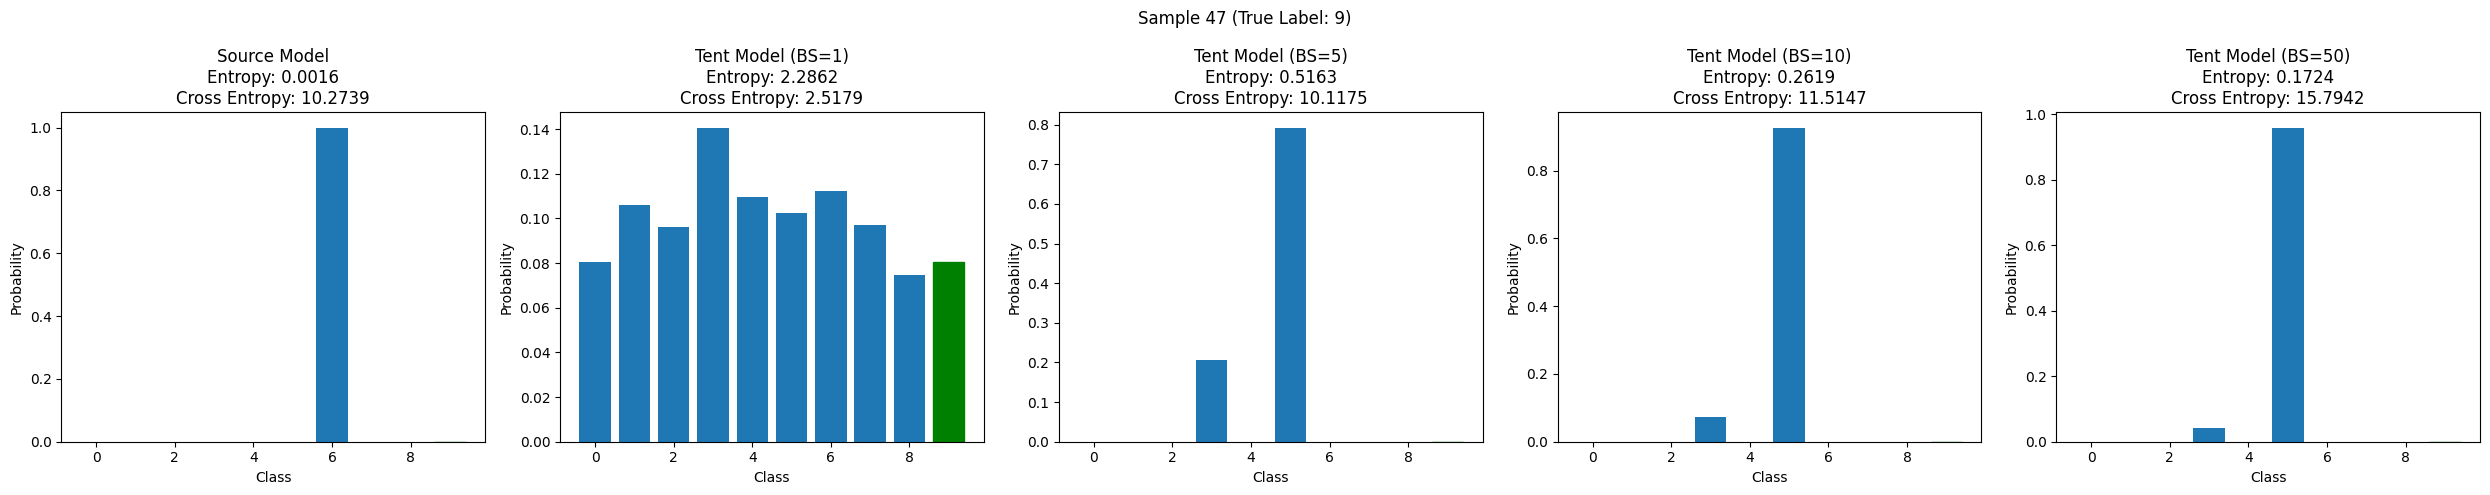

Sample 47:
Source 모델 - 예측: 6, 엔트로피: 0.0016, 크로스 엔트로피: 10.2739
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.5179
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 10.1175
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5147
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 15.7942
실제 레이블: 9



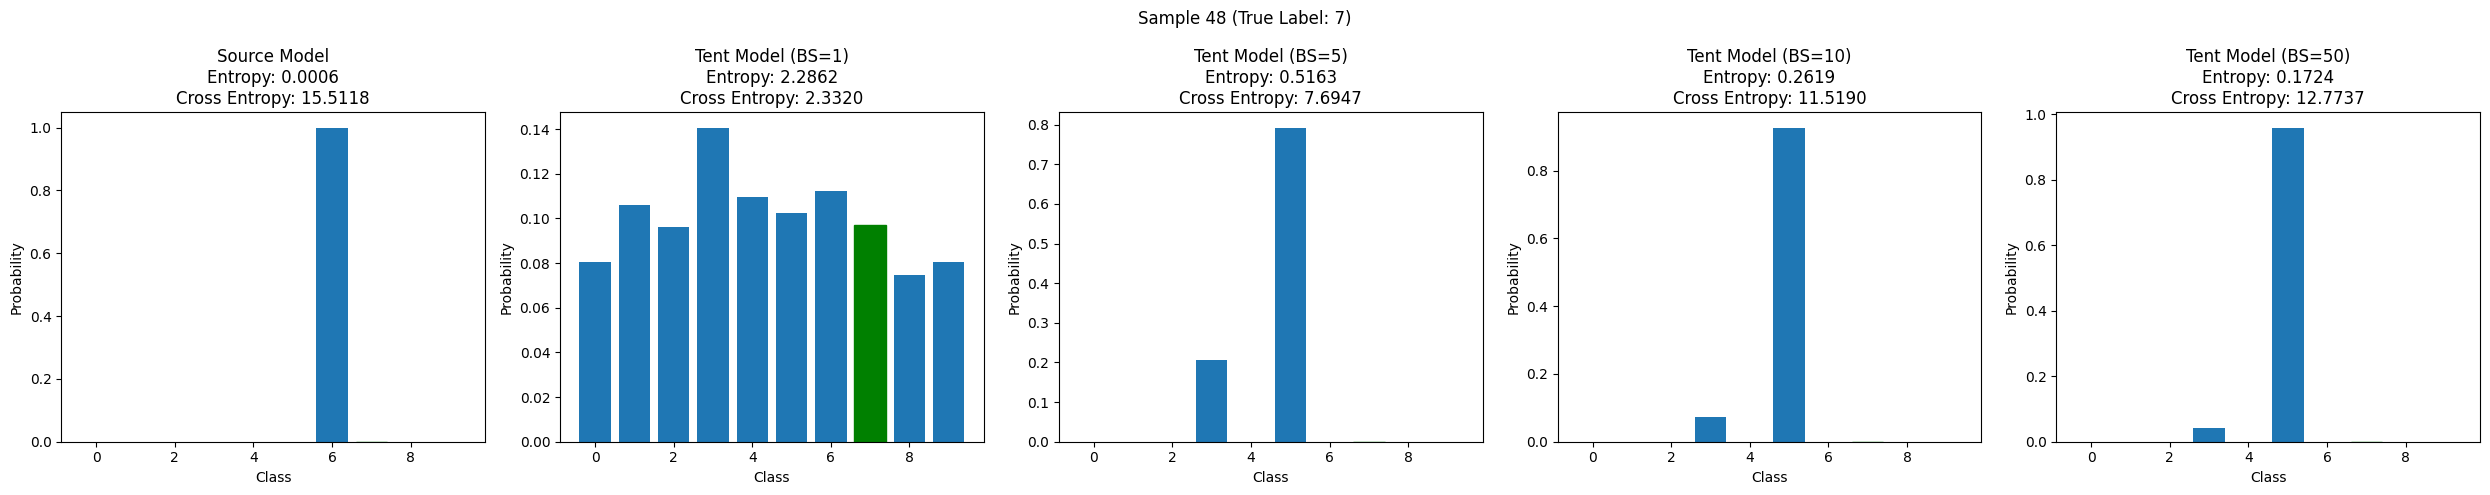

Sample 48:
Source 모델 - 예측: 6, 엔트로피: 0.0006, 크로스 엔트로피: 15.5118
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.3320
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 7.6947
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 11.5190
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 12.7737
실제 레이블: 7



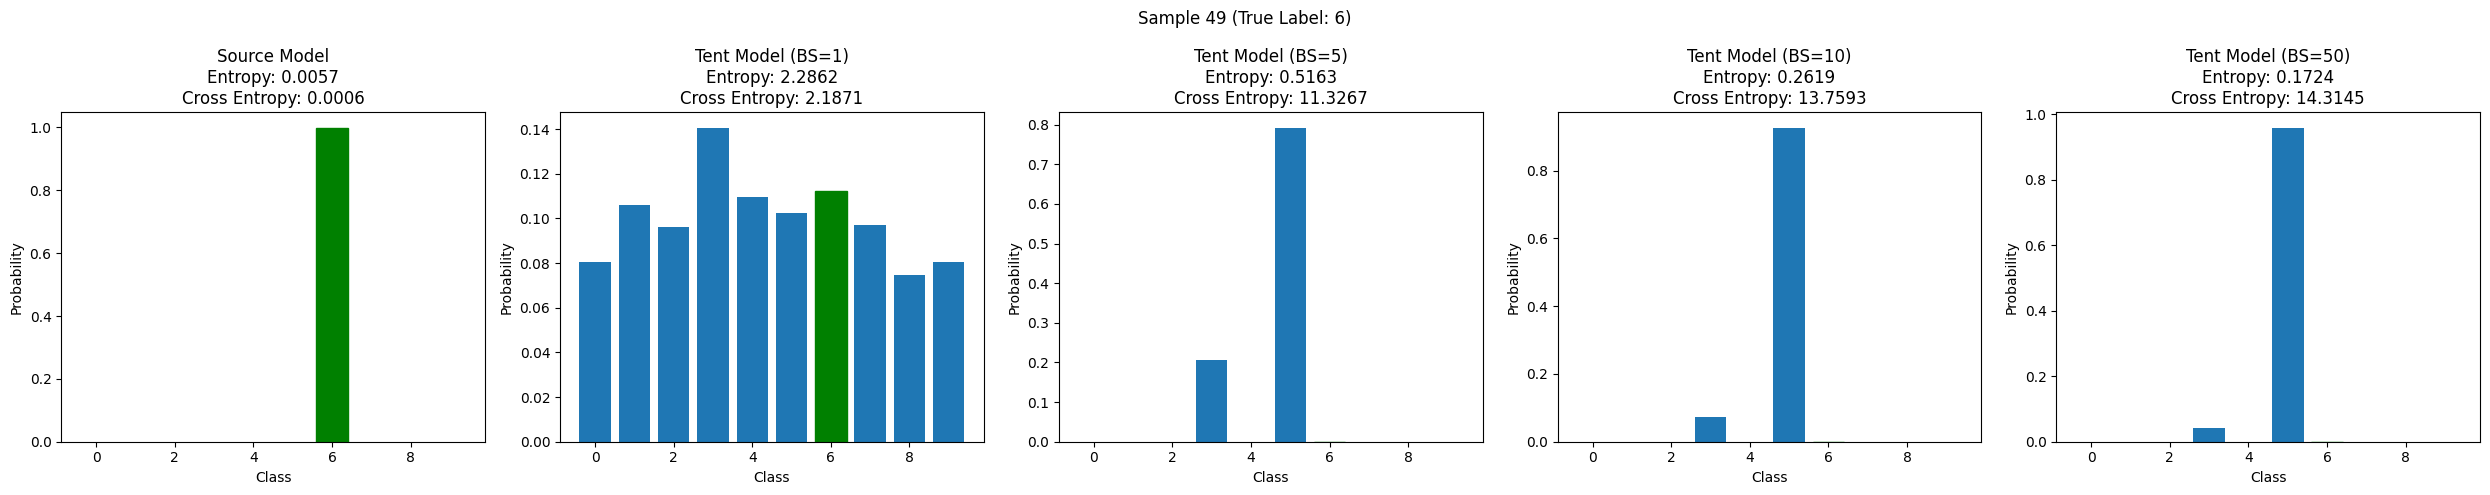

Sample 49:
Source 모델 - 예측: 6, 엔트로피: 0.0057, 크로스 엔트로피: 0.0006
Tent 모델 (BS=1) - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 2.1871
Tent 모델 (BS=5) - 예측: 5, 엔트로피: 0.5163, 크로스 엔트로피: 11.3267
Tent 모델 (BS=10) - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 13.7593
Tent 모델 (BS=50) - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 14.3145
실제 레이블: 6



In [5]:
# 배치 사이즈별 데이터로더 정의
batch_sizes = [1, 5, 10, 50]
data_loaders = {
    bs: build_test_loader(dataset, batch_size=bs) for bs in batch_sizes
}

# 배치 사이즈별 Tent 모델 정의
tent_models = {
    bs: Tent(optim_steps=1) for bs in batch_sizes
}

for batch in data_loaders[1]:  # 배치 사이즈 1인 데이터로더로 순회
    input_sample, label, _ = batch
    input_sample = input_sample.to(device)
    label = label.to(device)
    
    # Source 모델과 Tent 모델들 추론 비교
    model1.eval()
    for m in tent_models.values():
        m.model.eval()
        
    with torch.no_grad():
        # Source 모델 결과
        output1 = model1(input_sample)
        probs1 = F.softmax(output1, dim=1)
        entropy1 = compute_entropy(probs1)
        cross_entropy1 = F.cross_entropy(output1, label)
        
        # 각 배치 사이즈별 Tent 모델 결과
        tent_outputs = {}
        for bs in batch_sizes:
            # 해당하는 배치 사이즈의 데이터로더에서 배치 가져오기
            tent_batch = next(iter(data_loaders[bs]))
            tent_input, tent_label, _ = tent_batch
            tent_input = tent_input.to(device)
            
            output = tent_models[bs].model(tent_input)
            # 첫 번째 샘플에 대한 결과만 사용
            tent_outputs[bs] = {
                'probs': F.softmax(output, dim=1)[0].unsqueeze(0),
                'entropy': compute_entropy(F.softmax(output, dim=1)[0].unsqueeze(0)),
                'cross_entropy': F.cross_entropy(output[0].unsqueeze(0), label)
            }
        
        # 결과 출력 및 시각화
        fig, axes = plt.subplots(1, 5, figsize=(25, 5))
        
        # Source 모델 분포 그래프
        bars1 = axes[0].bar(range(10), probs1.cpu().numpy()[0])
        bars1[label.item()].set_color('green')
        axes[0].set_title(f'Source Model\nEntropy: {entropy1.item():.4f}\nCross Entropy: {cross_entropy1.item():.4f}')
        axes[0].set_xlabel('Class')
        axes[0].set_ylabel('Probability')
        
        # 각 배치 사이즈별 Tent 모델 분포 그래프
        for i, bs in enumerate(batch_sizes, 1):
            bars = axes[i].bar(range(10), tent_outputs[bs]['probs'].cpu().numpy()[0])
            bars[label.item()].set_color('green')
            axes[i].set_title(f'Tent Model (BS={bs})\nEntropy: {tent_outputs[bs]["entropy"].item():.4f}\nCross Entropy: {tent_outputs[bs]["cross_entropy"].item():.4f}')
            axes[i].set_xlabel('Class')
            axes[i].set_ylabel('Probability')
        
        plt.suptitle(f'Sample {len(entropy_values1)} (True Label: {label.item()})')
        plt.tight_layout()
        plt.show()
        
        print(f'Sample {len(entropy_values1)}:')
        print(f'Source 모델 - 예측: {torch.argmax(output1, dim=1).item()}, 엔트로피: {entropy1.item():.4f}, 크로스 엔트로피: {cross_entropy1.item():.4f}')
        for bs in batch_sizes:
            pred = torch.argmax(tent_outputs[bs]['probs'], dim=1).item()
            print(f'Tent 모델 (BS={bs}) - 예측: {pred}, 엔트로피: {tent_outputs[bs]["entropy"].item():.4f}, 크로스 엔트로피: {tent_outputs[bs]["cross_entropy"].item():.4f}')
        print(f'실제 레이블: {label.item()}\n')
        
    # Source 모델 결과 저장
    entropy_values1.append(entropy1.item())
    cross_entropy_values1.append(cross_entropy1.item())
    output_distributions1.append(probs1.cpu().numpy())
    labels1.append(label.item())
    
    # Tent 모델 결과 저장 (배치 사이즈 1인 경우만)
    entropy_values2.append(tent_outputs[1]['entropy'].item())
    cross_entropy_values2.append(tent_outputs[1]['cross_entropy'].item())
    output_distributions2.append(tent_outputs[1]['probs'].cpu().numpy())
    labels2.append(label.item())

# Tent (Batch size = 1)


=== Tent (optim_steps=1) ===
Sample 0:
Adapt 이전 - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 1.9612
Adapt 이후 - 예측: 3, 엔트로피: 2.2862, 크로스 엔트로피: 1.9612
실제 레이블: 3

Sample 1:
Adapt 이전 - 예측: 3, 엔트로피: 2.2905, 크로스 엔트로피: 2.6125
Adapt 이후 - 예측: 3, 엔트로피: 2.2905, 크로스 엔트로피: 2.6125
실제 레이블: 8

Sample 2:
Adapt 이전 - 예측: 3, 엔트로피: 2.2843, 크로스 엔트로피: 2.7333
Adapt 이후 - 예측: 3, 엔트로피: 2.2843, 크로스 엔트로피: 2.7333
실제 레이블: 8

Sample 3:
Adapt 이전 - 예측: 3, 엔트로피: 2.2875, 크로스 엔트로피: 2.5067
Adapt 이후 - 예측: 3, 엔트로피: 2.2875, 크로스 엔트로피: 2.5067
실제 레이블: 0

Sample 4:
Adapt 이전 - 예측: 3, 엔트로피: 2.2800, 크로스 엔트로피: 2.0950
Adapt 이후 - 예측: 3, 엔트로피: 2.2800, 크로스 엔트로피: 2.0950
실제 레이블: 6

Sample 5:
Adapt 이전 - 예측: 3, 엔트로피: 2.2783, 크로스 엔트로피: 2.1138
Adapt 이후 - 예측: 3, 엔트로피: 2.2783, 크로스 엔트로피: 2.1138
실제 레이블: 6

Sample 6:
Adapt 이전 - 예측: 3, 엔트로피: 2.2841, 크로스 엔트로피: 2.1242
Adapt 이후 - 예측: 3, 엔트로피: 2.2841, 크로스 엔트로피: 2.1242
실제 레이블: 1

Sample 7:
Adapt 이전 - 예측: 3, 엔트로피: 2.2792, 크로스 엔트로피: 2.2175
Adapt 이후 - 예측: 3, 엔트로피: 2.2792, 크로스 엔트로피: 2.2175
실제 레이블: 6

Sample 8:
Adapt 이전

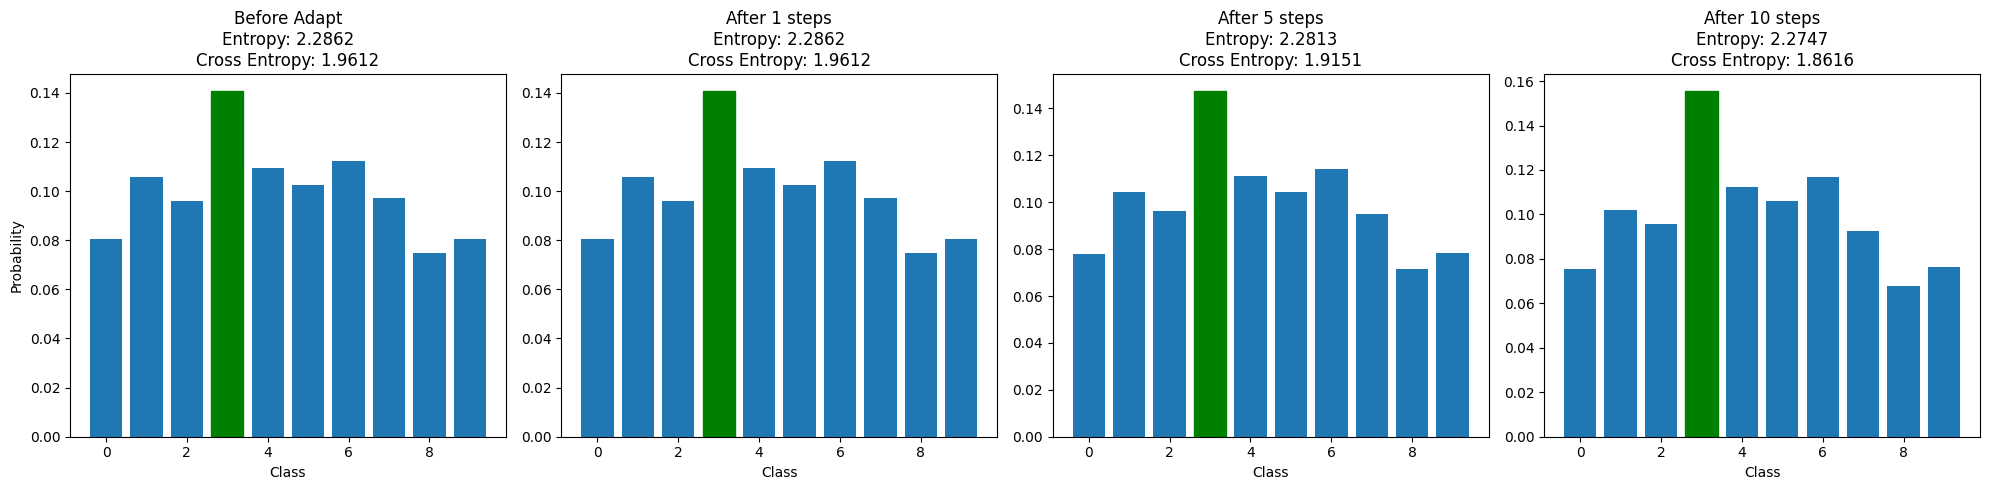

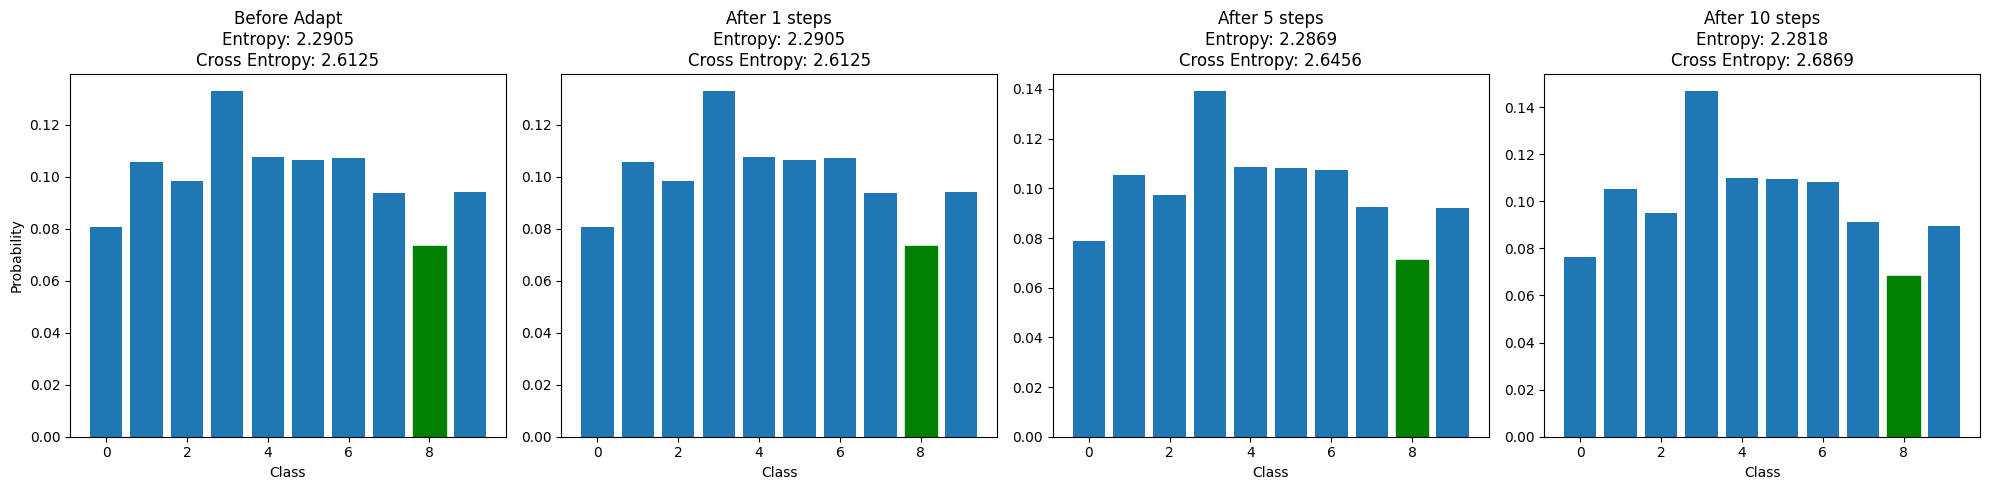

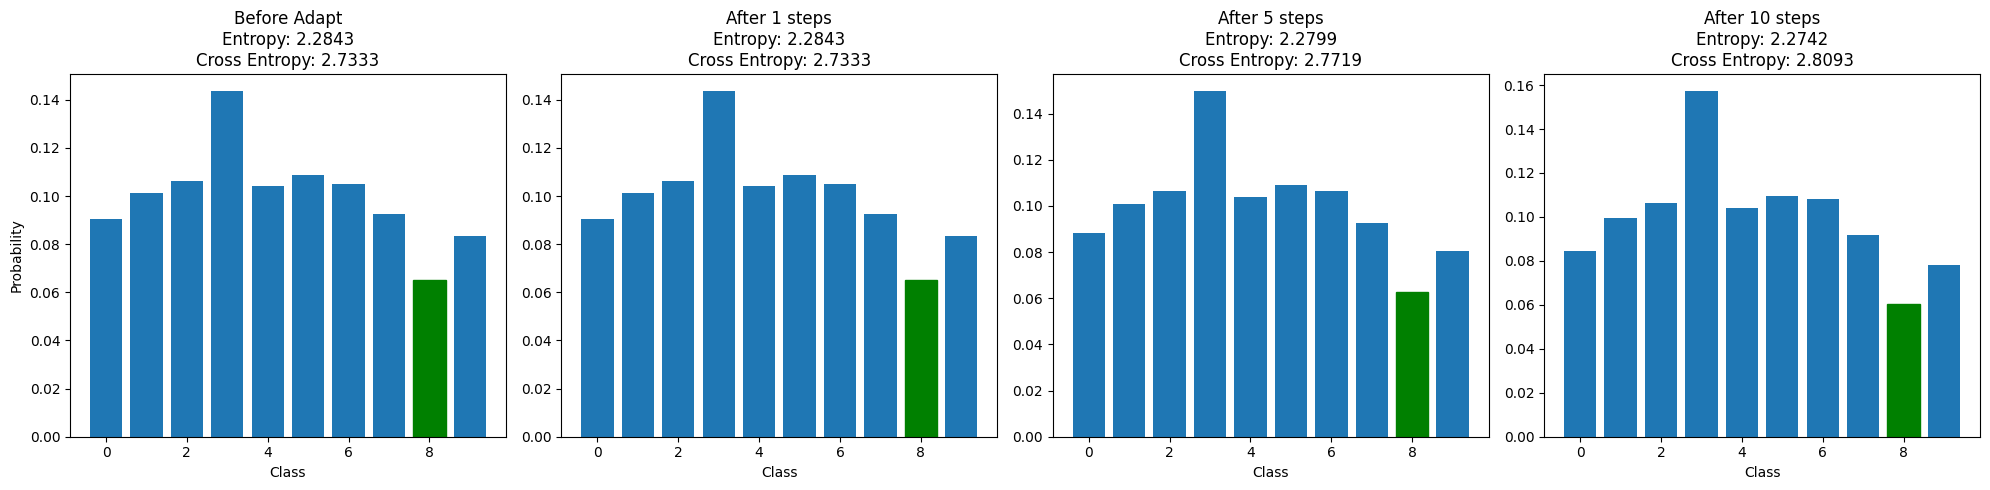

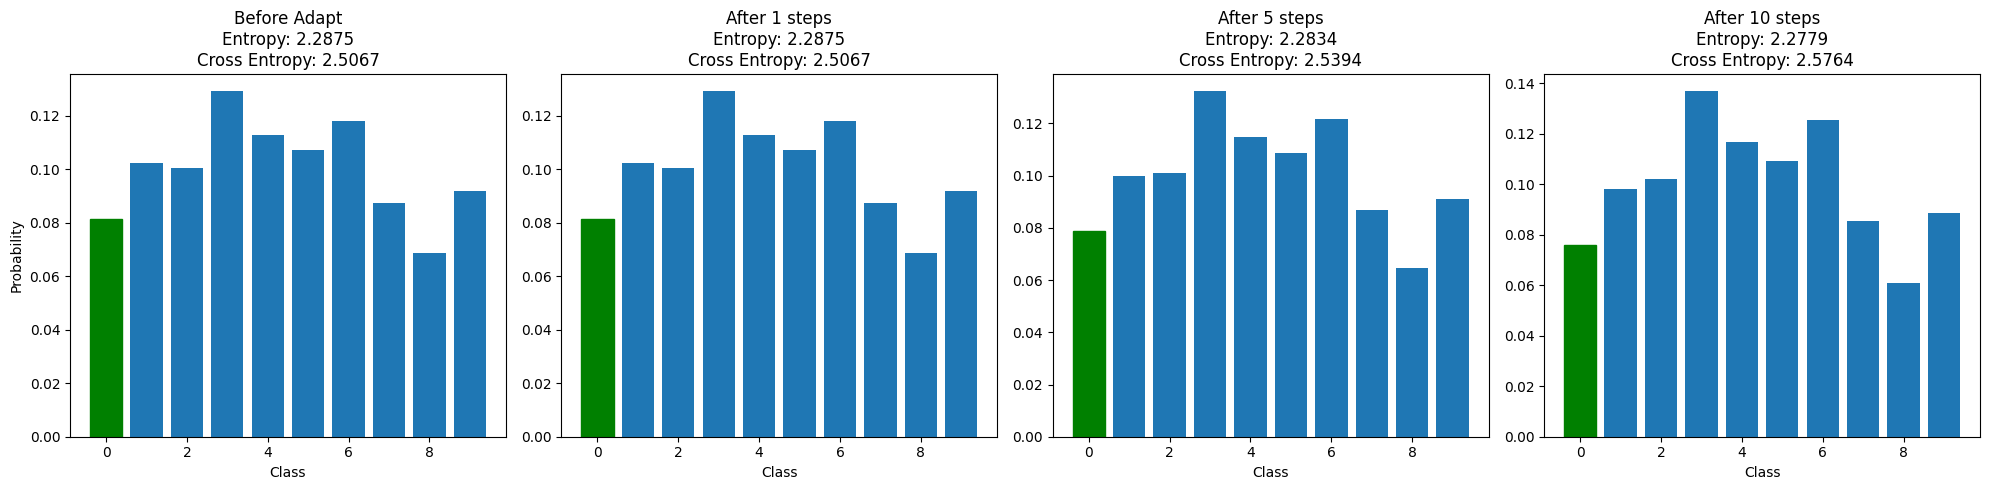

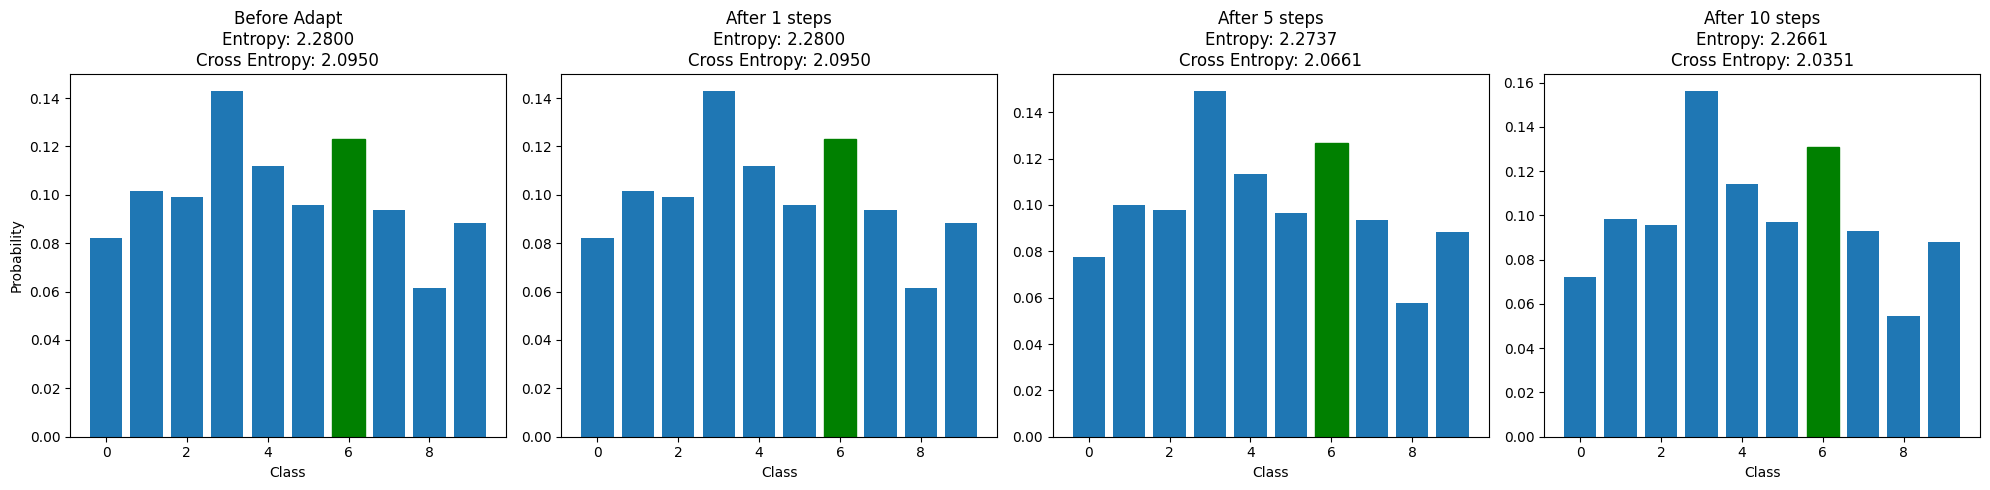

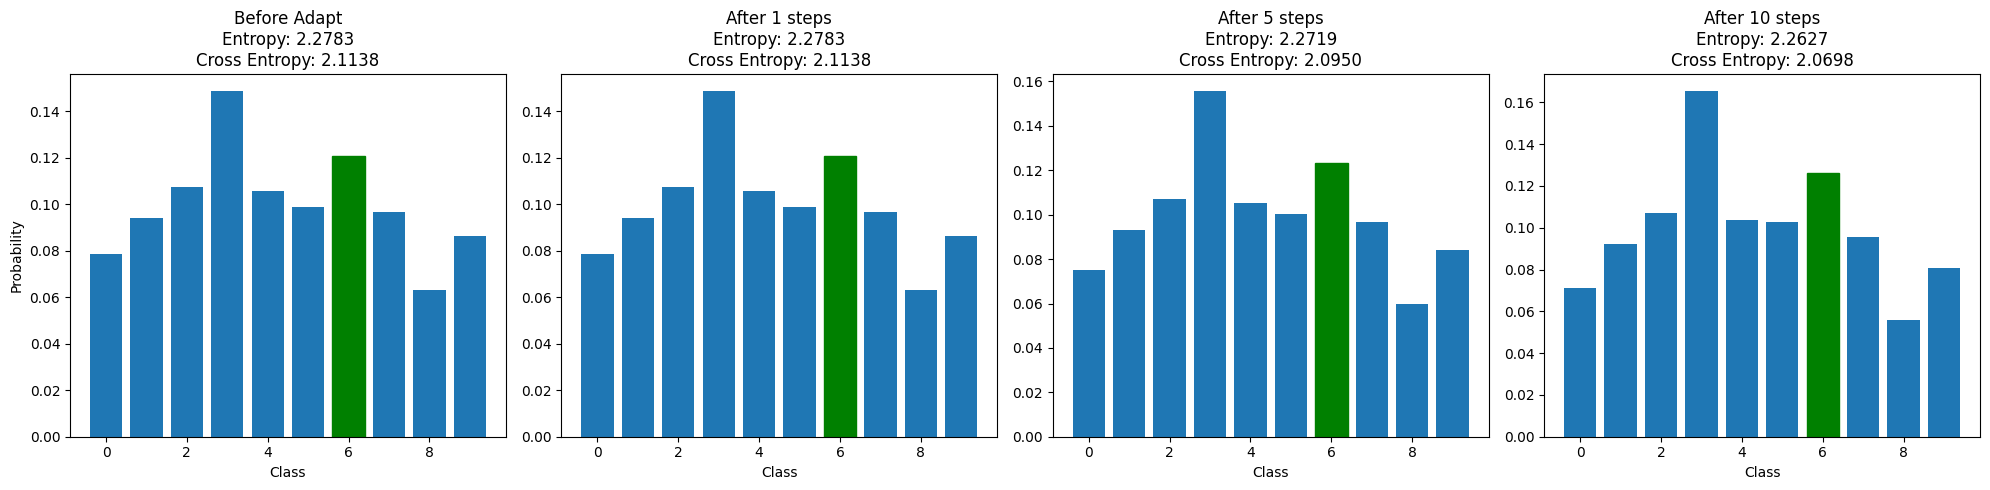

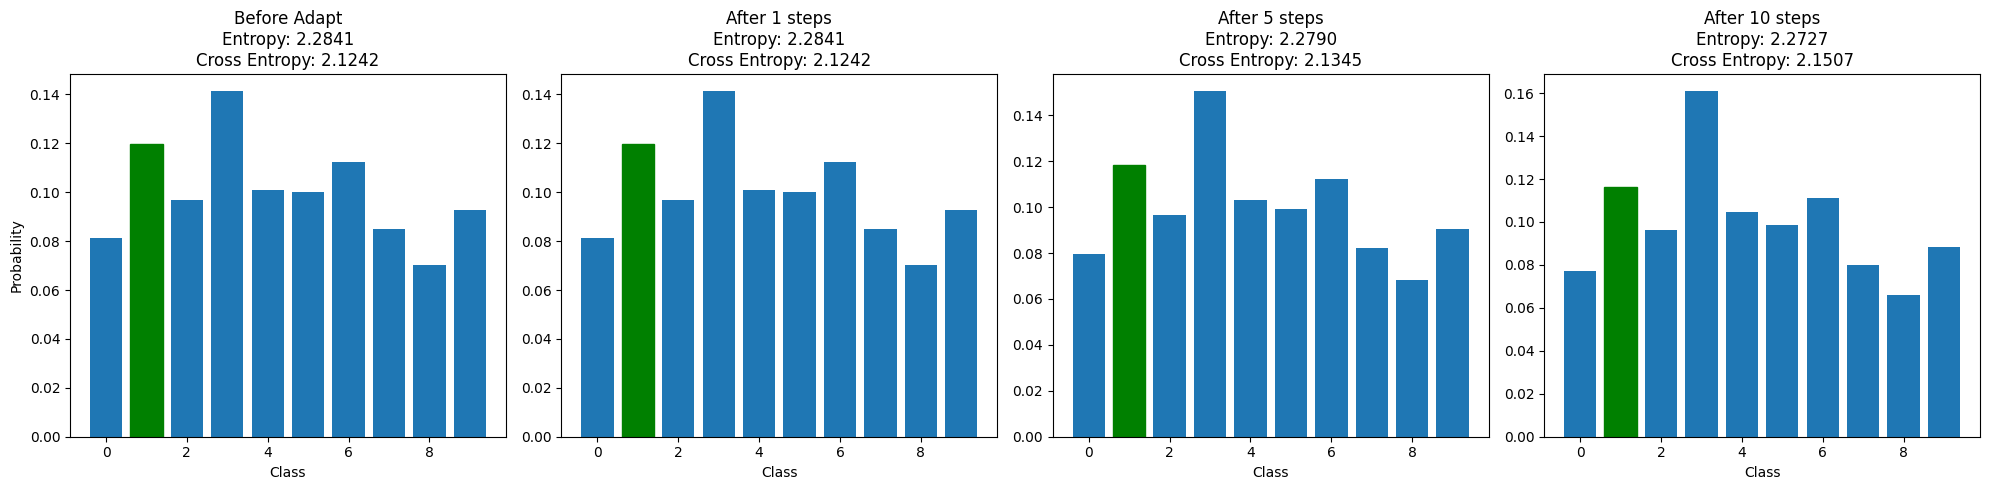

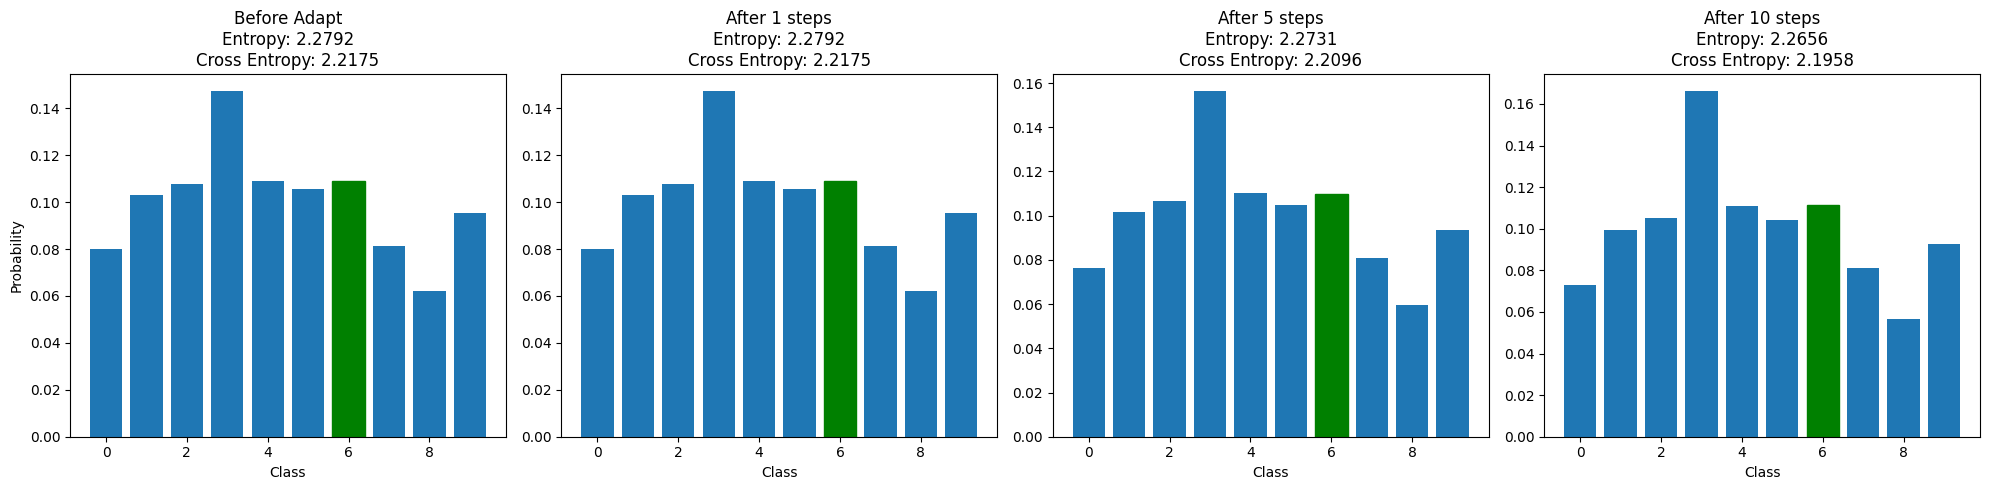

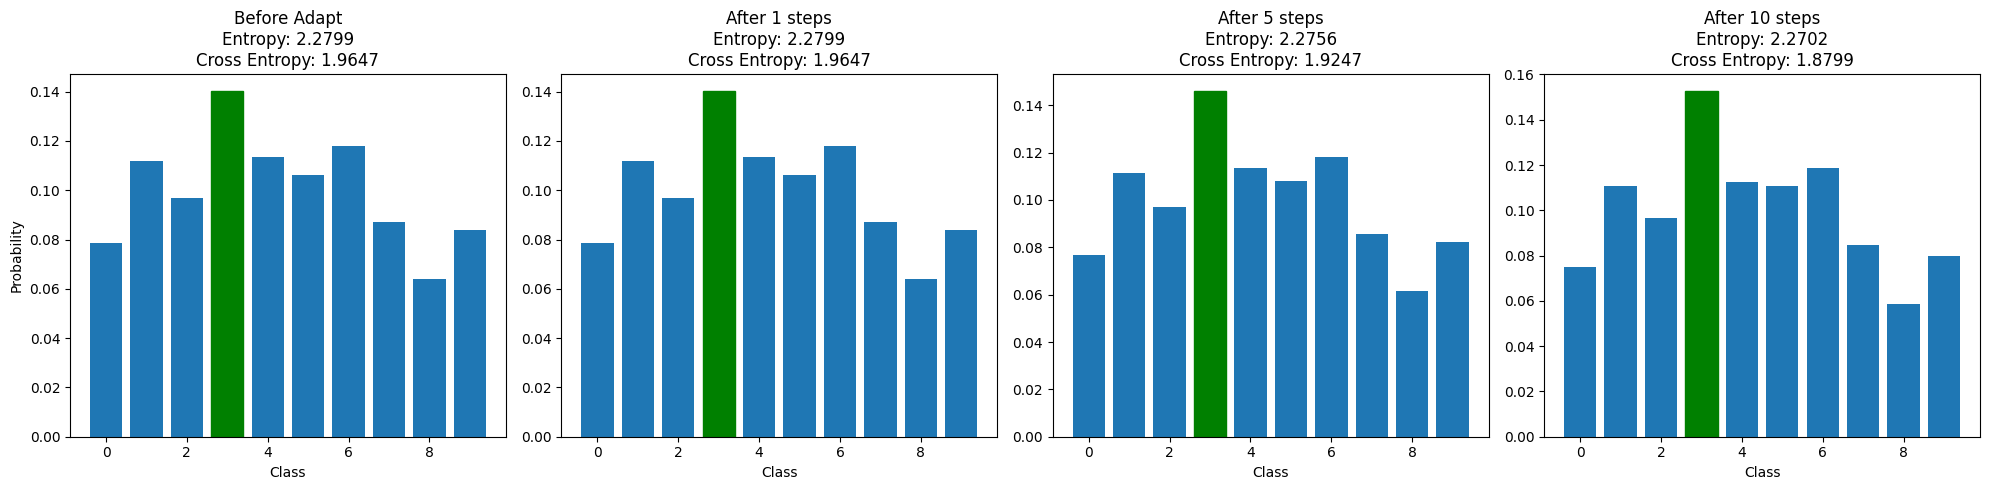

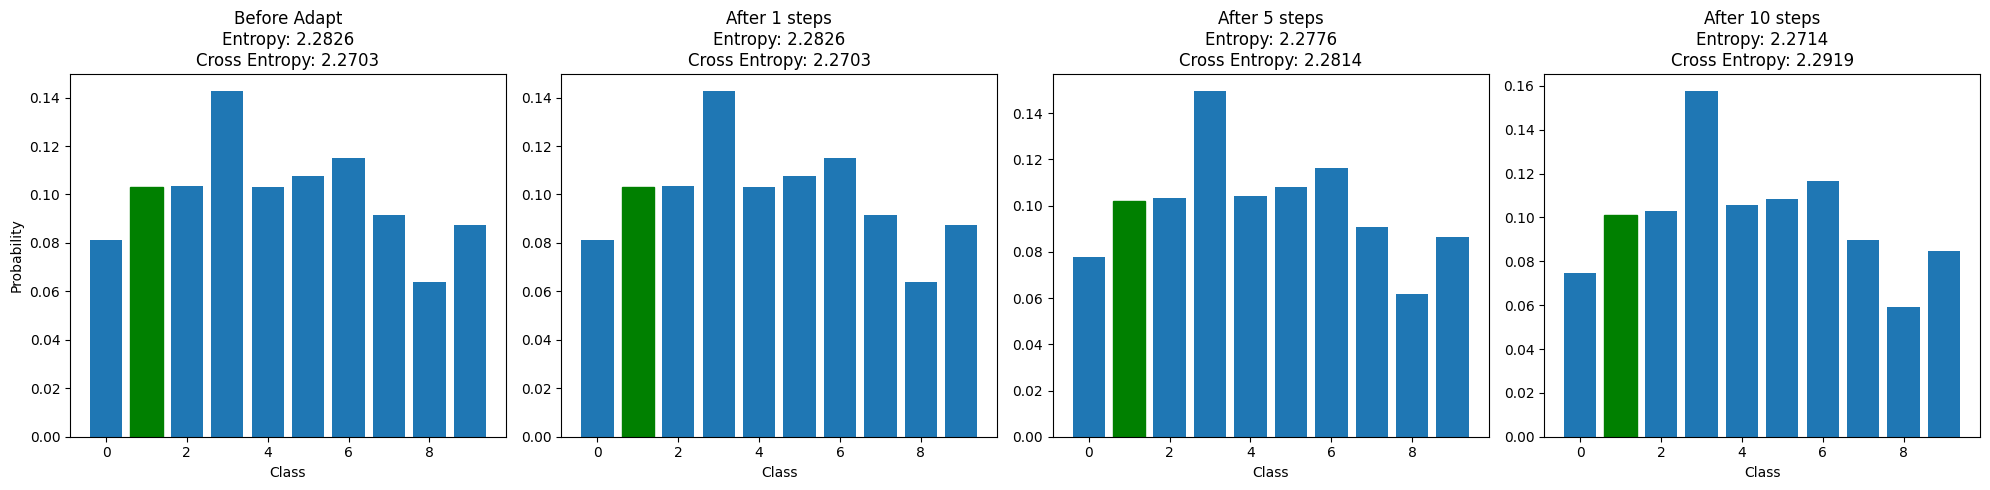

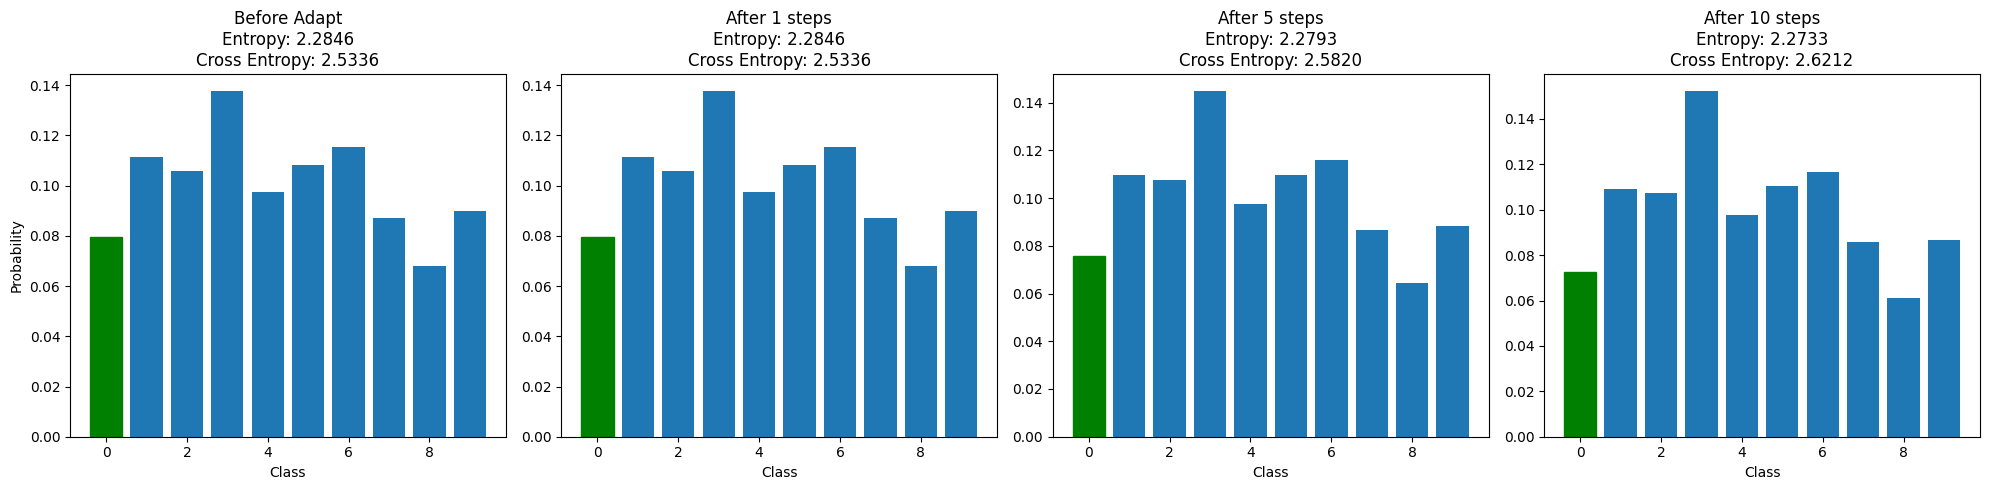

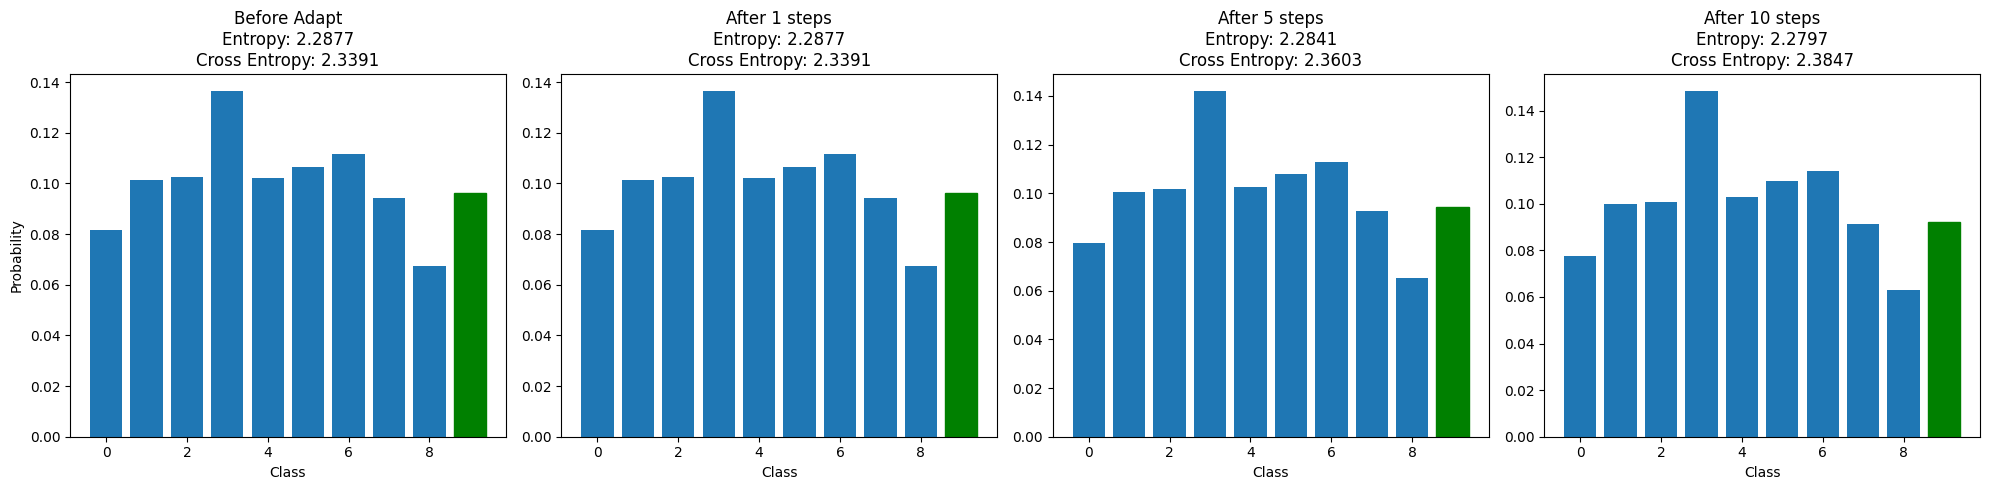

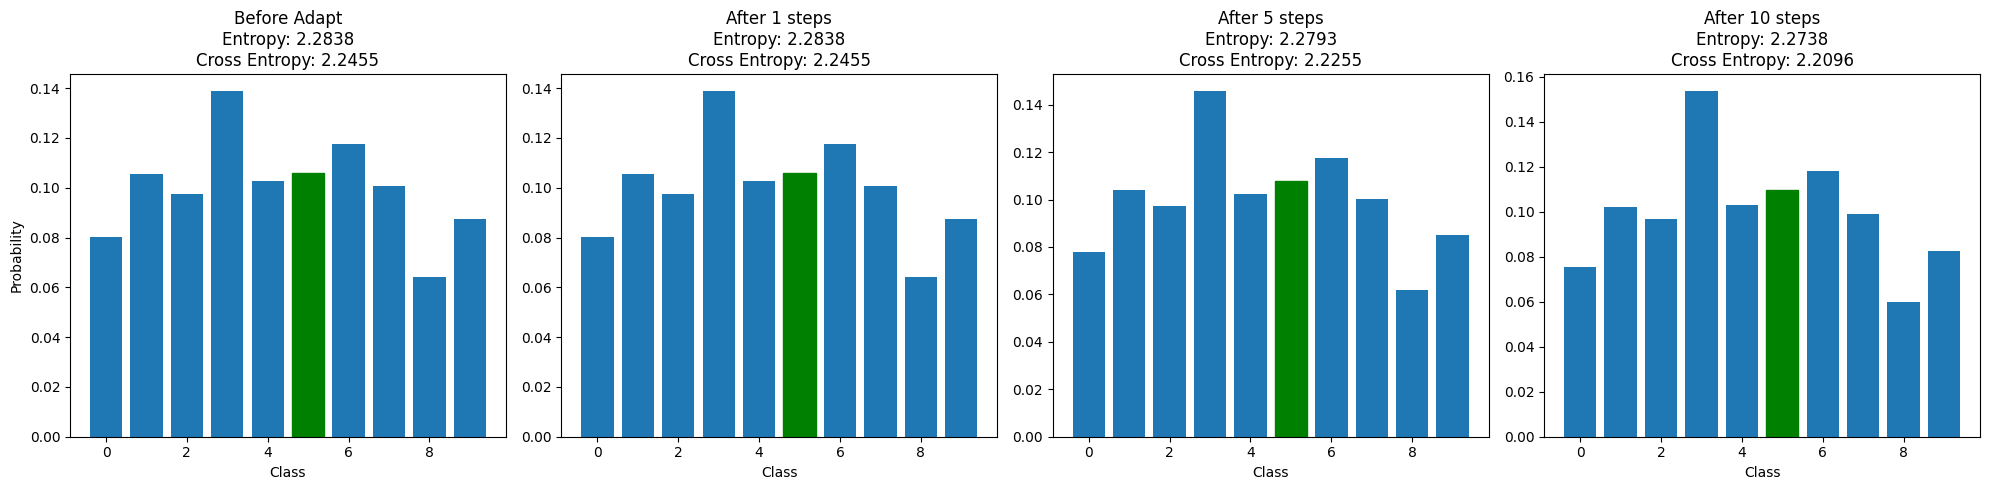

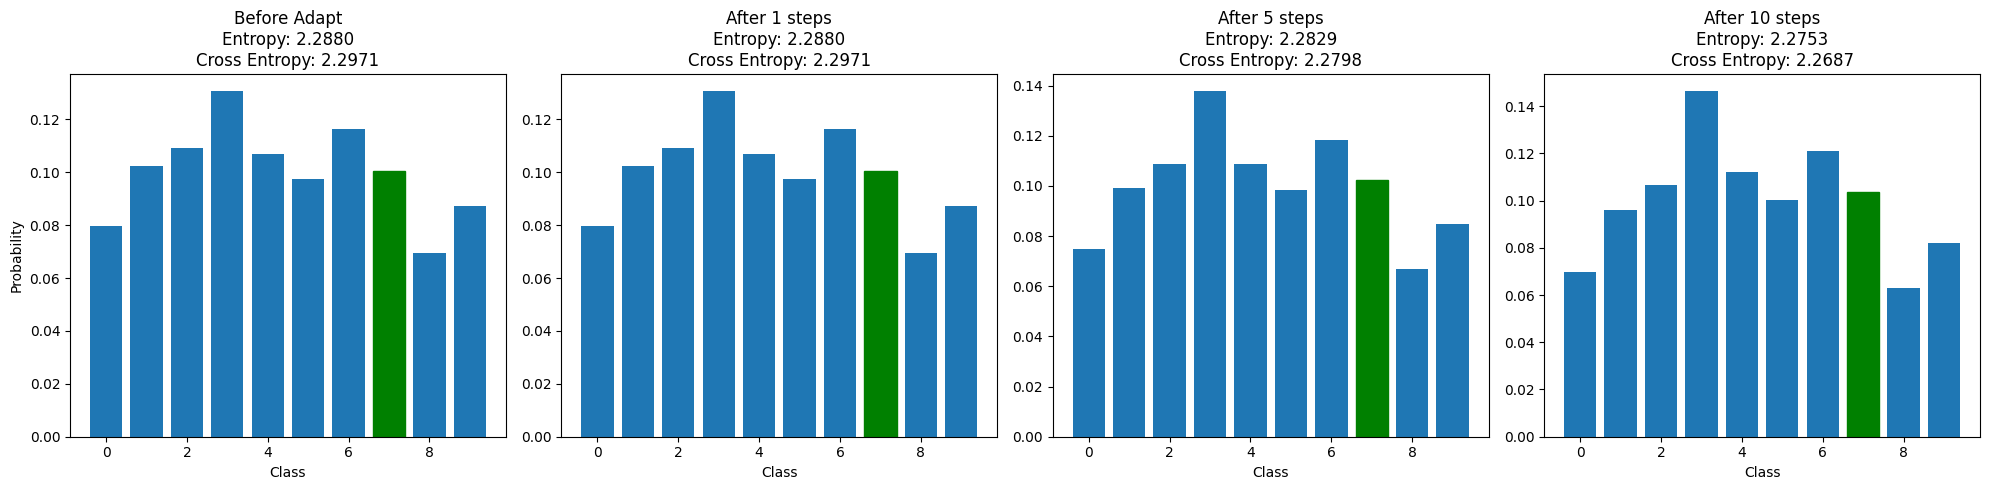

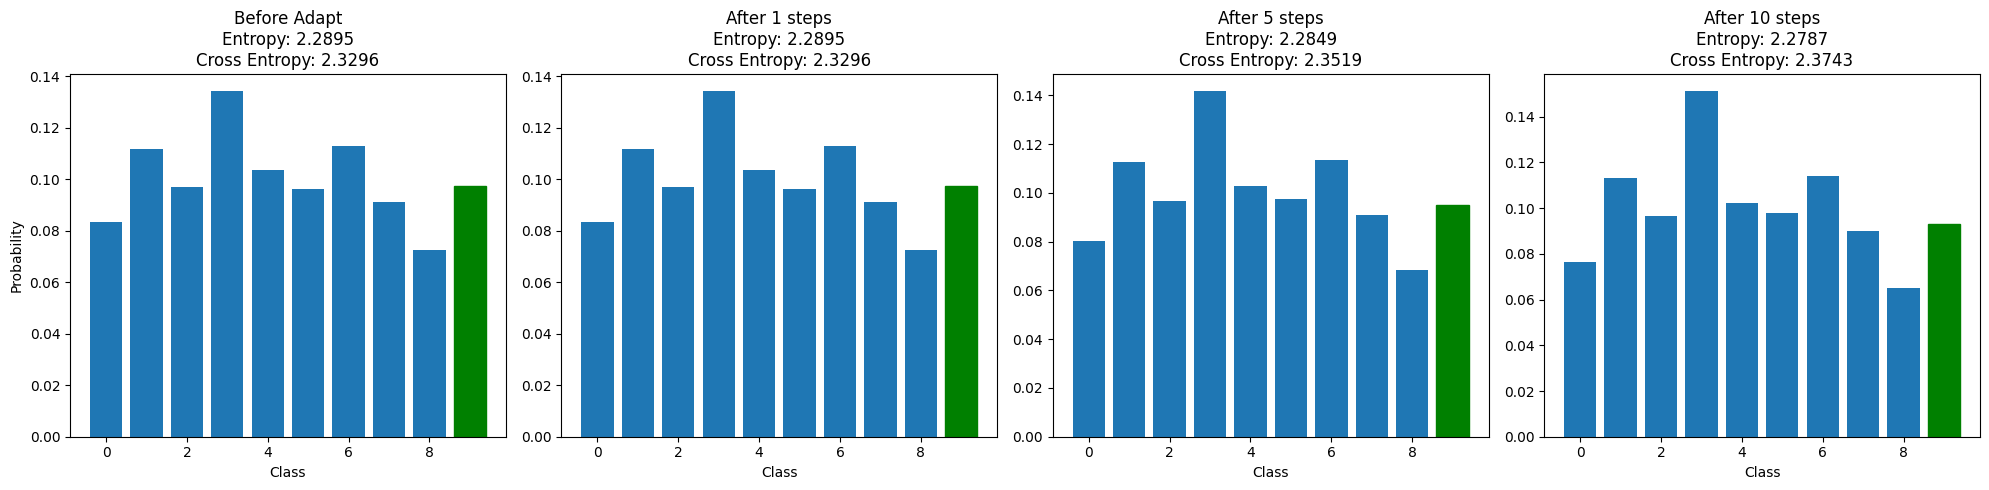

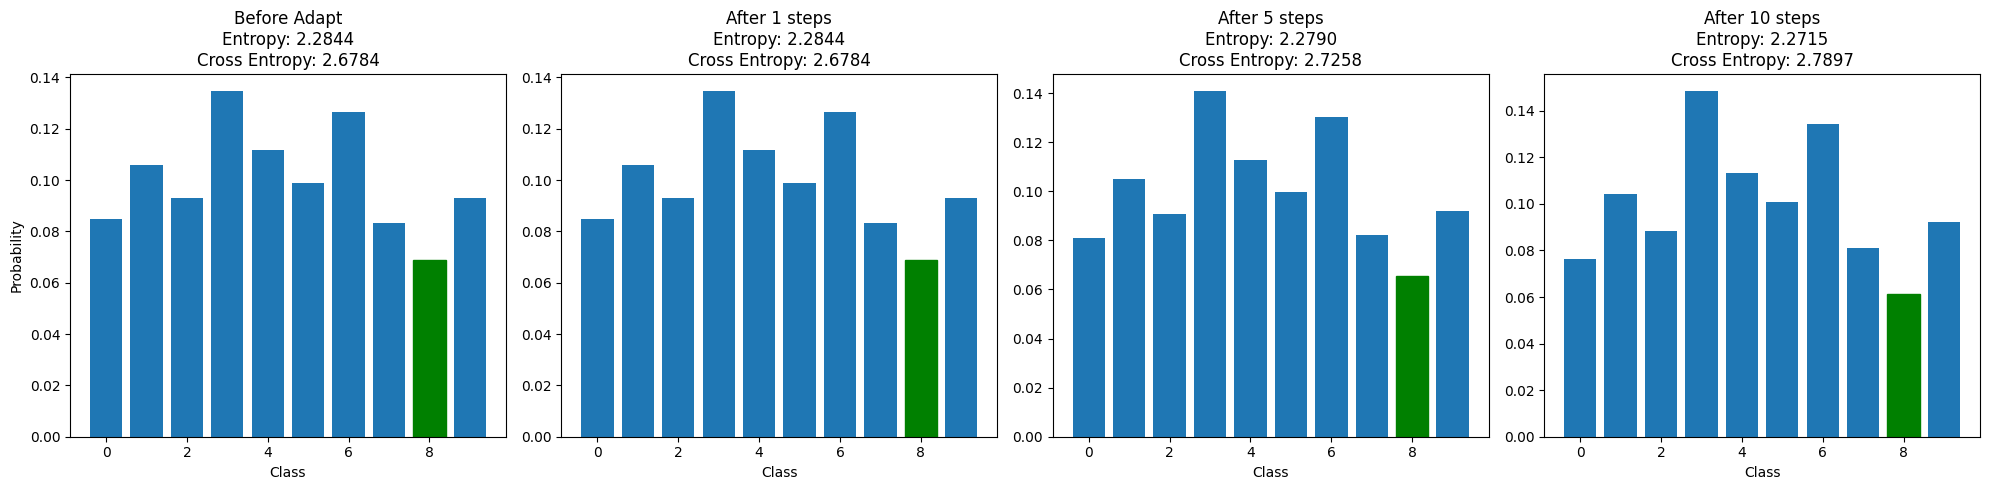

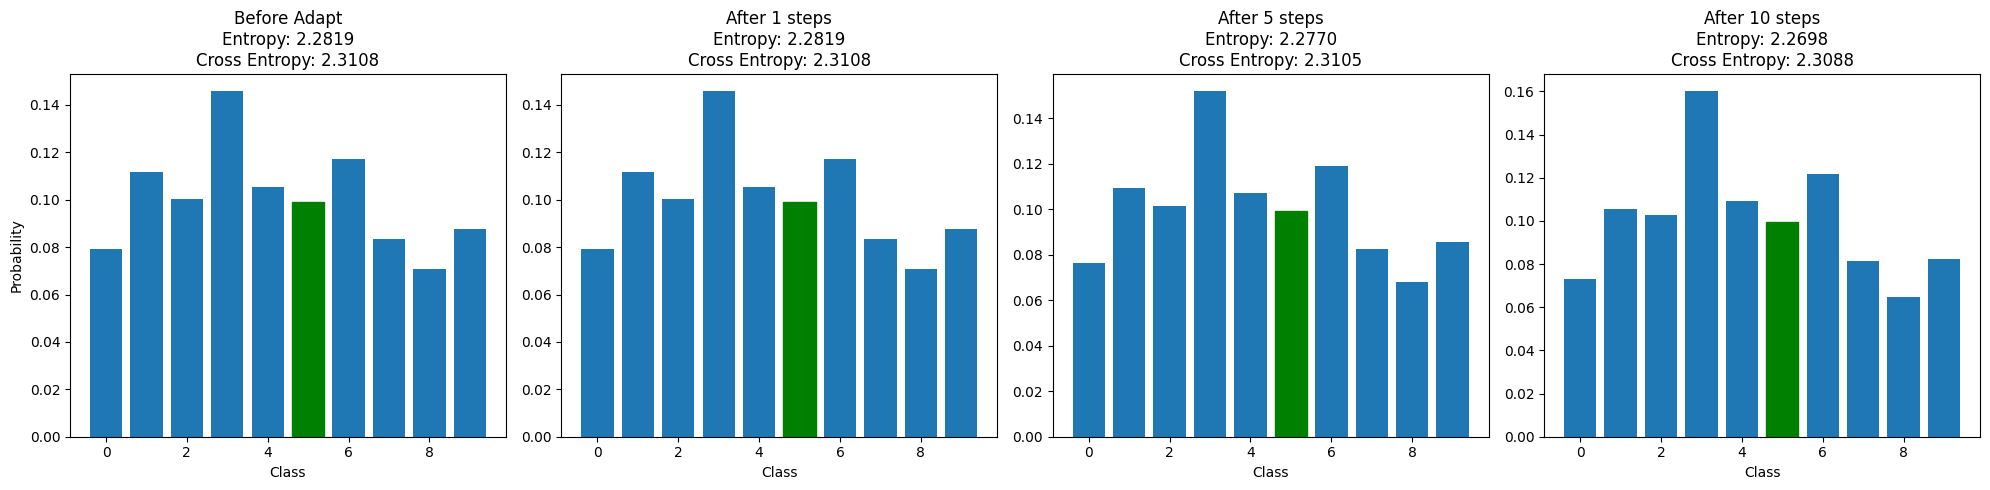

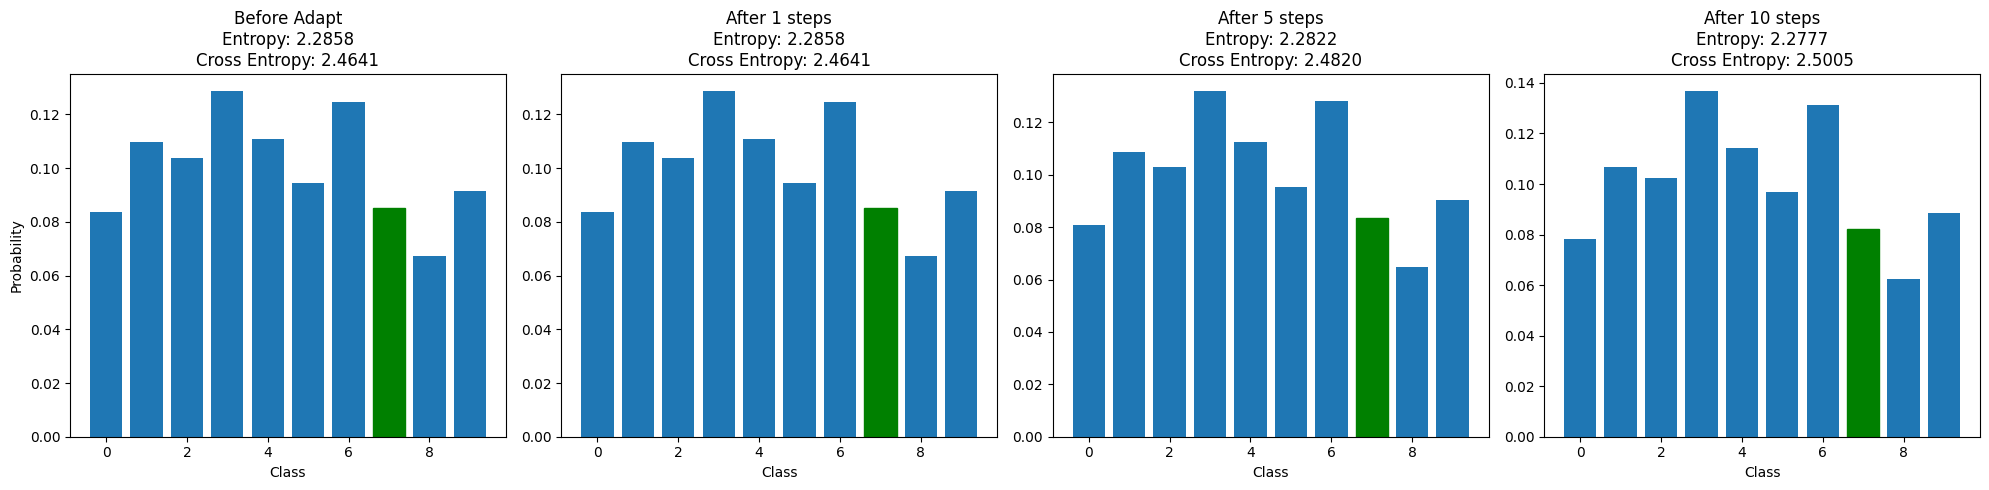

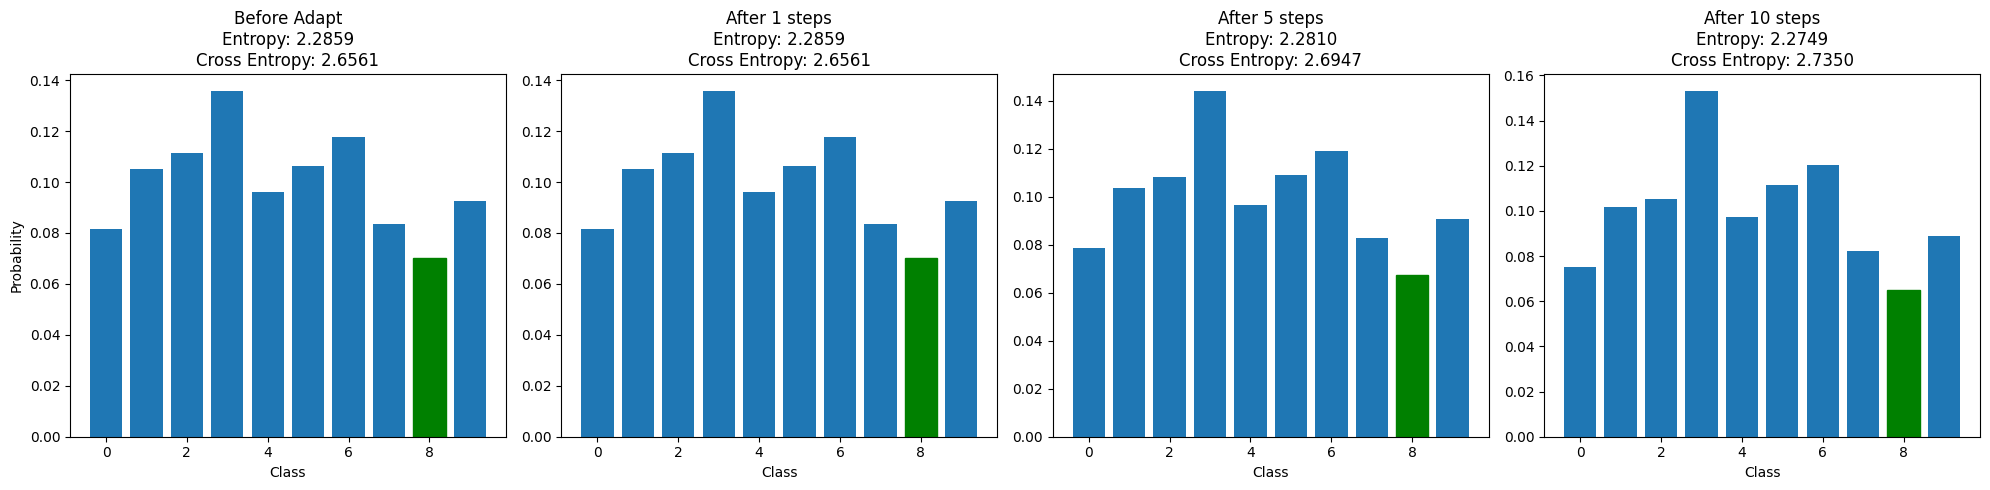

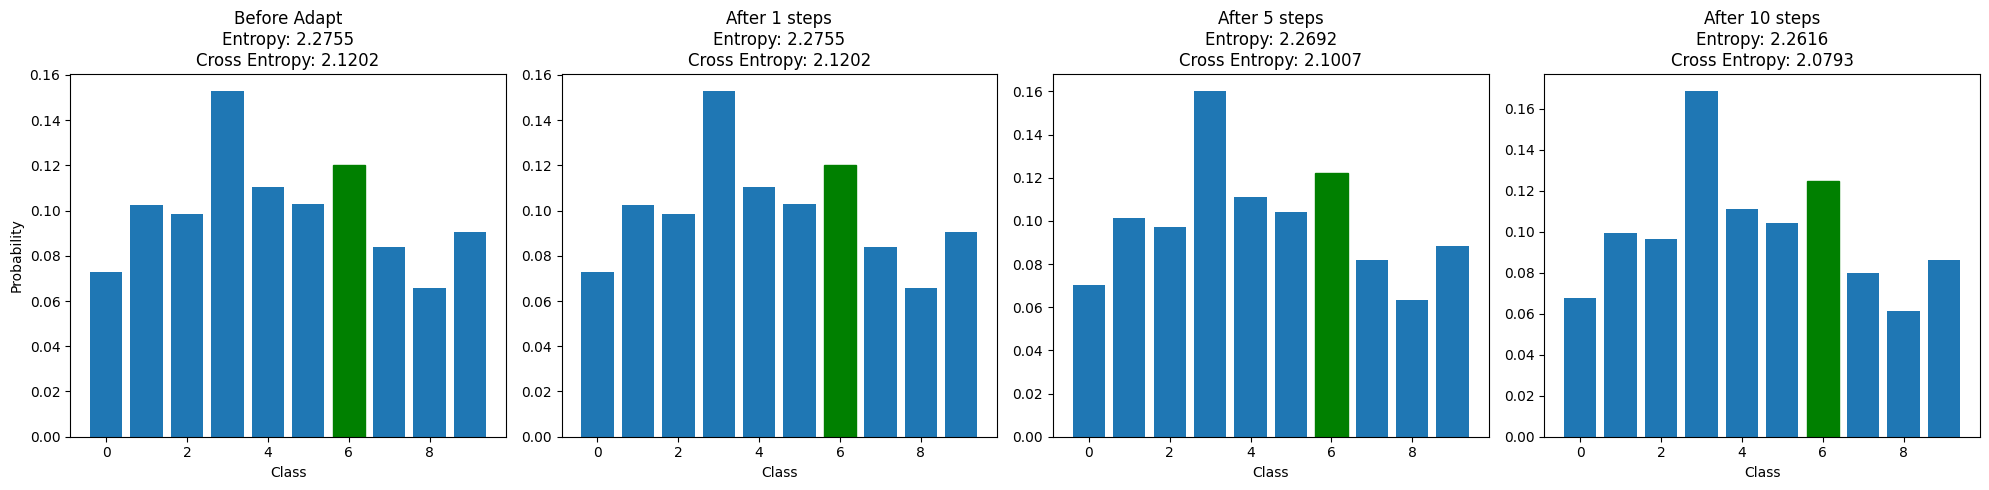

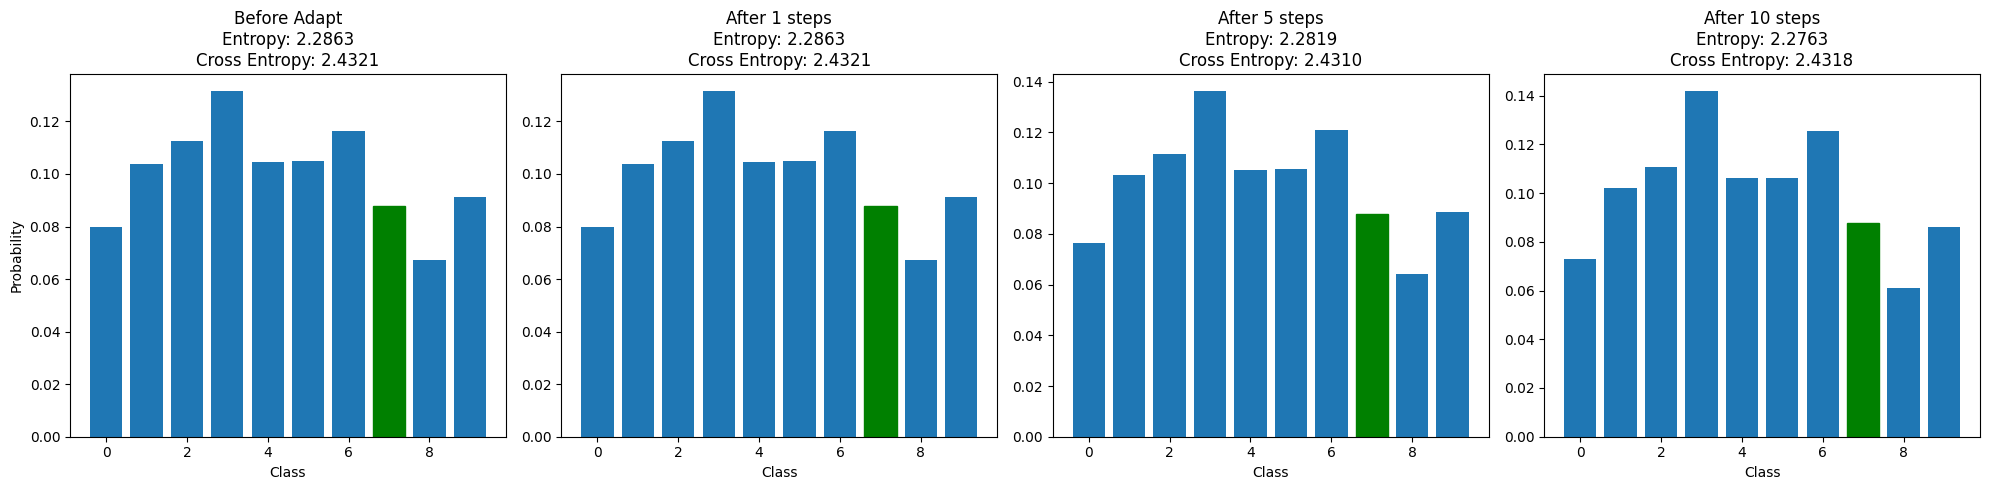

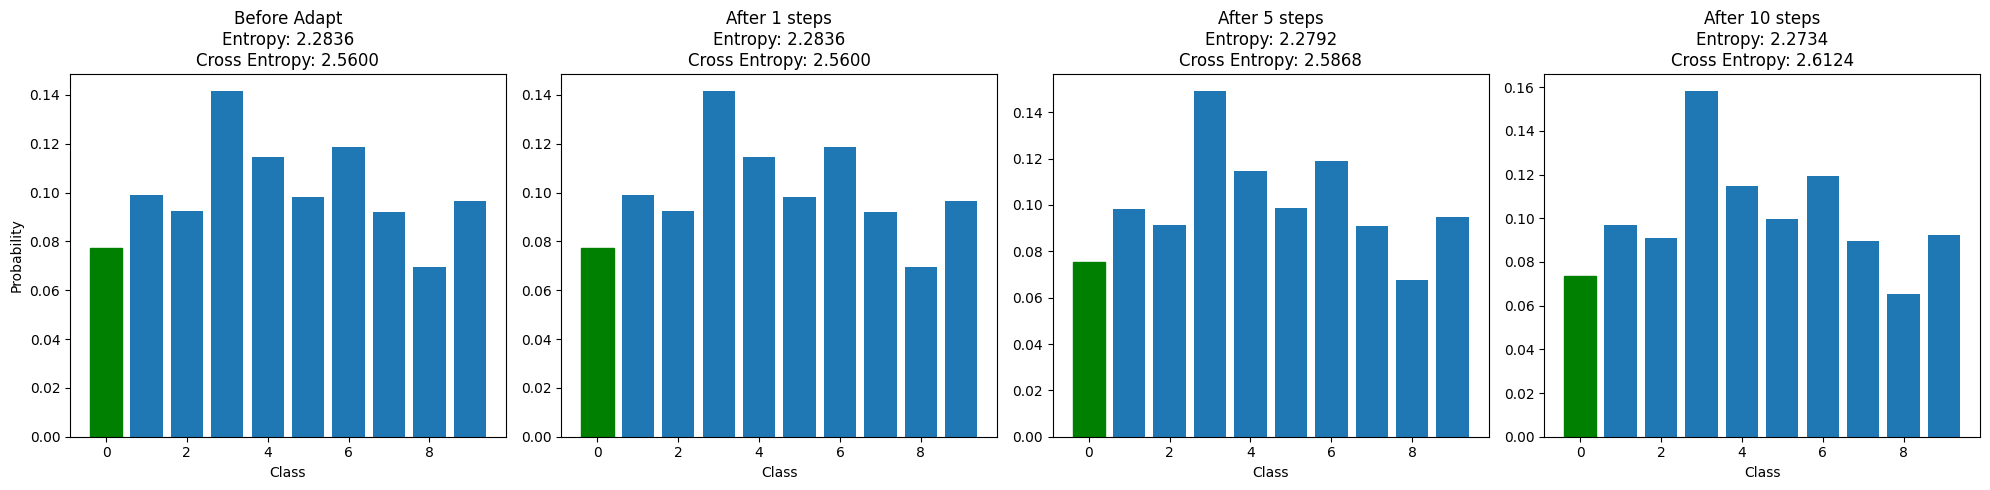

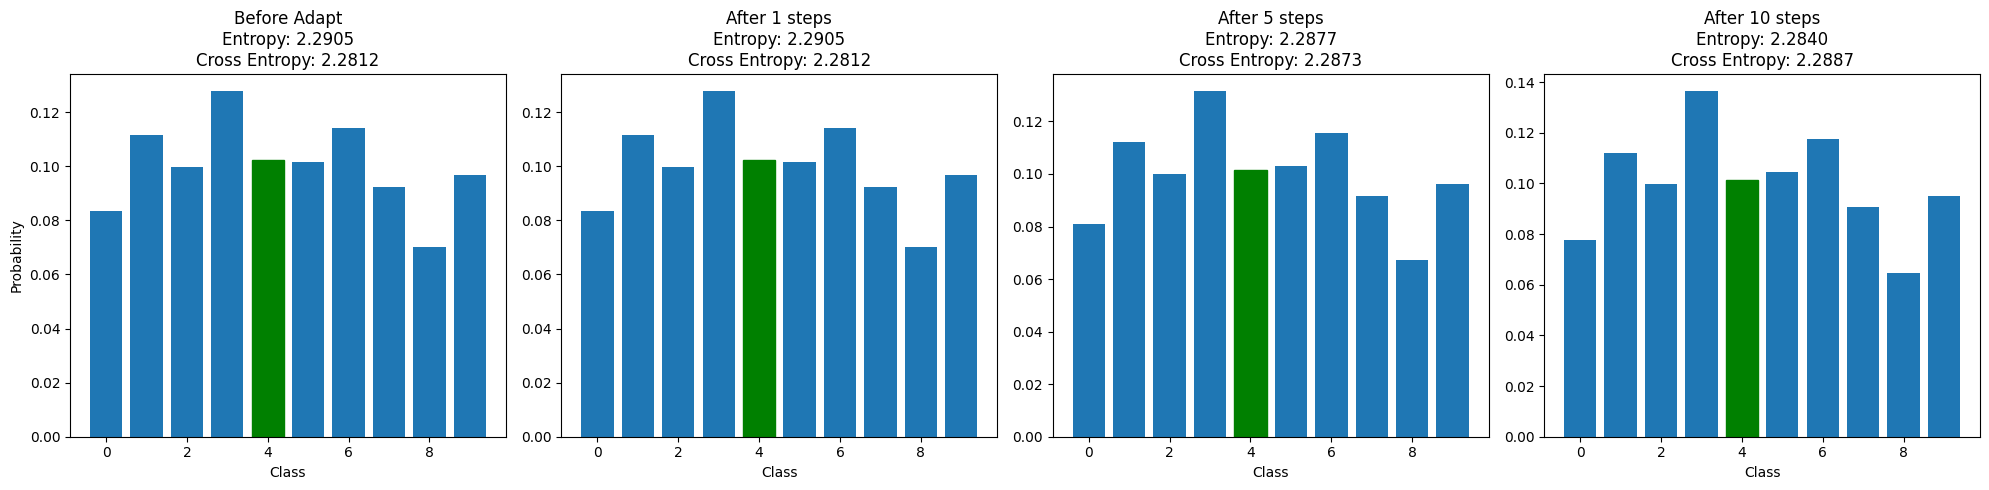

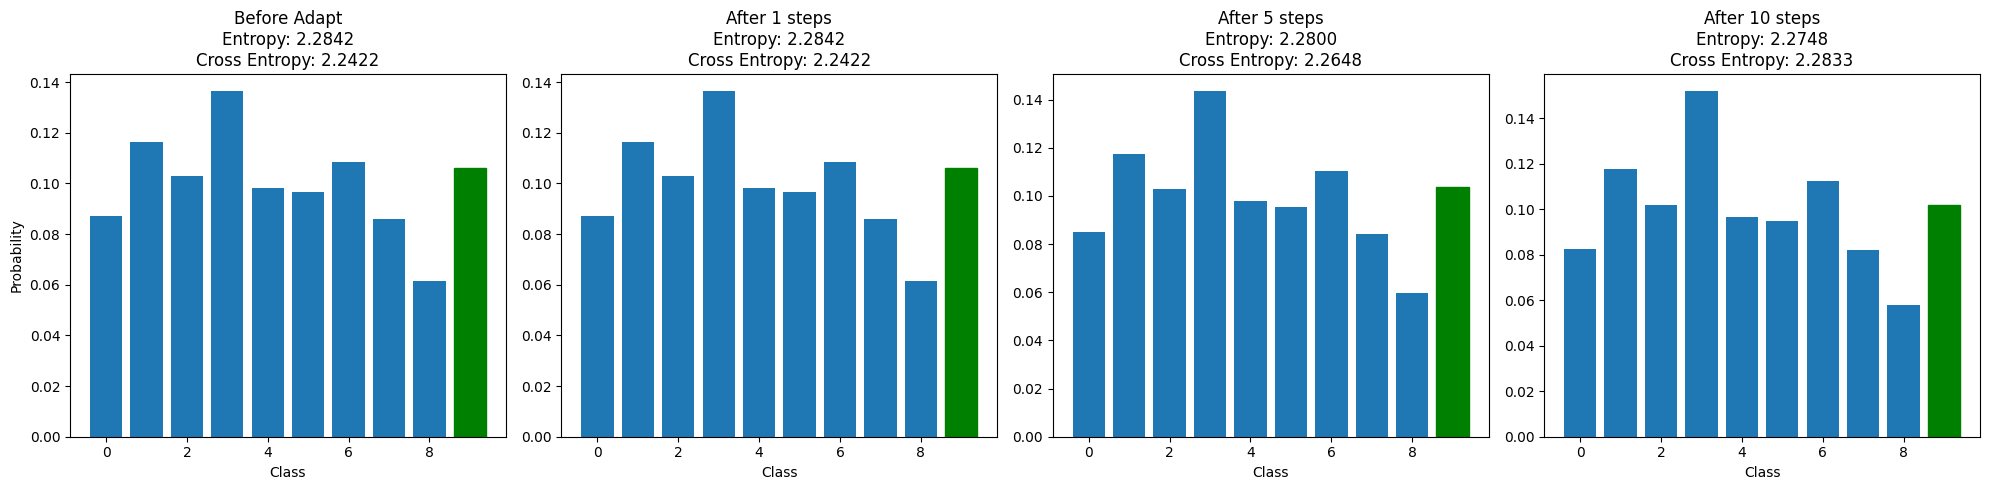

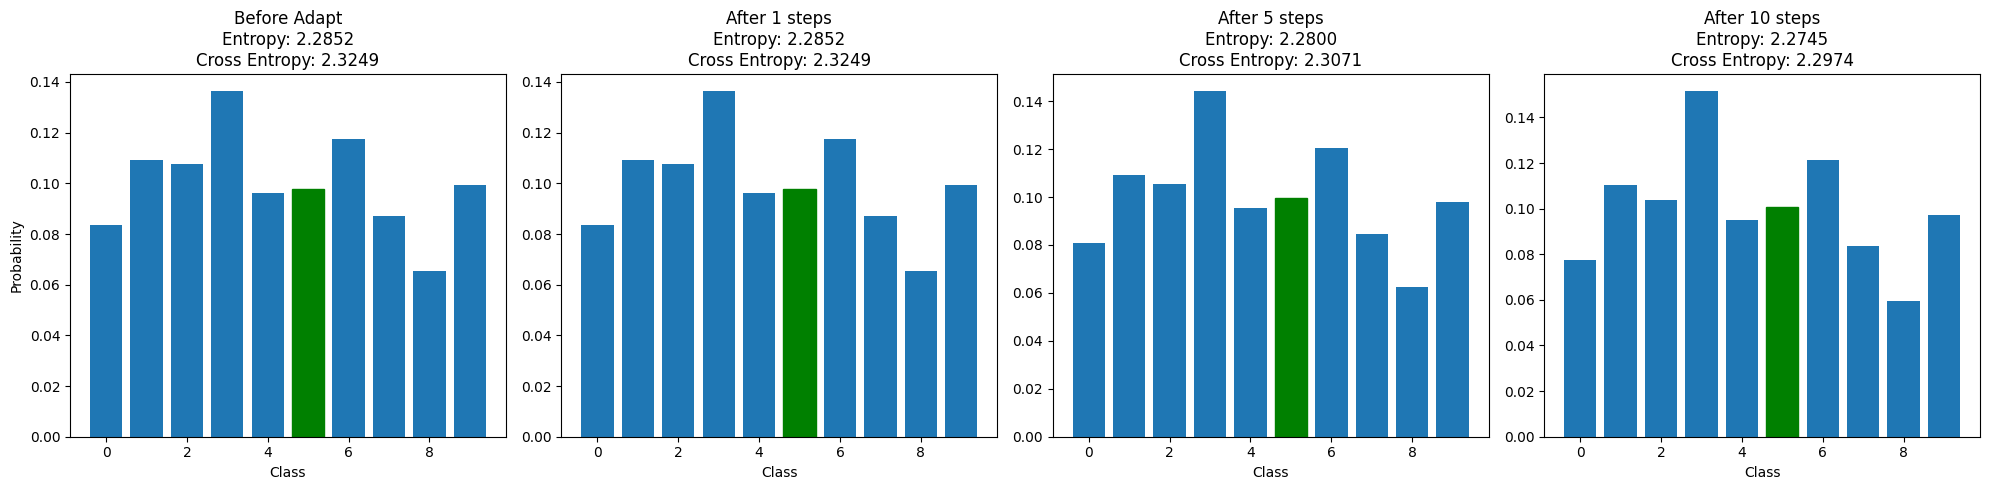

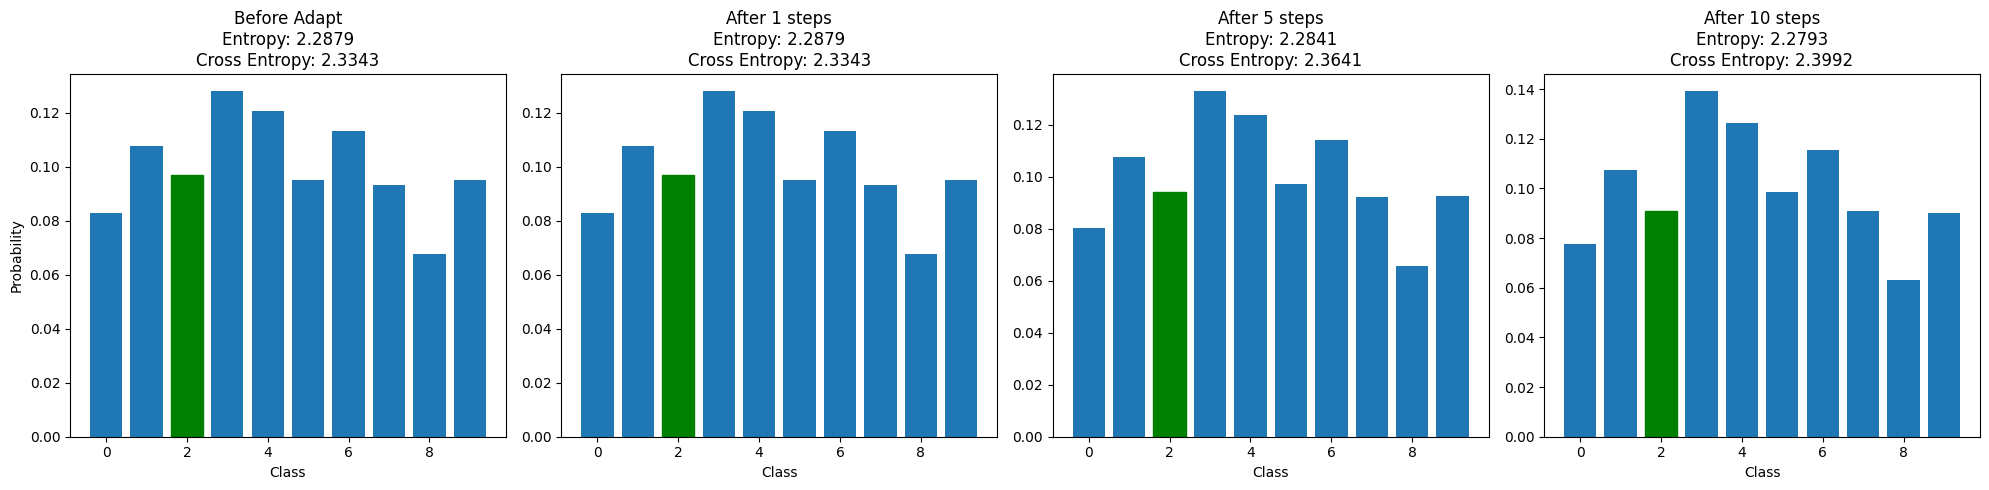

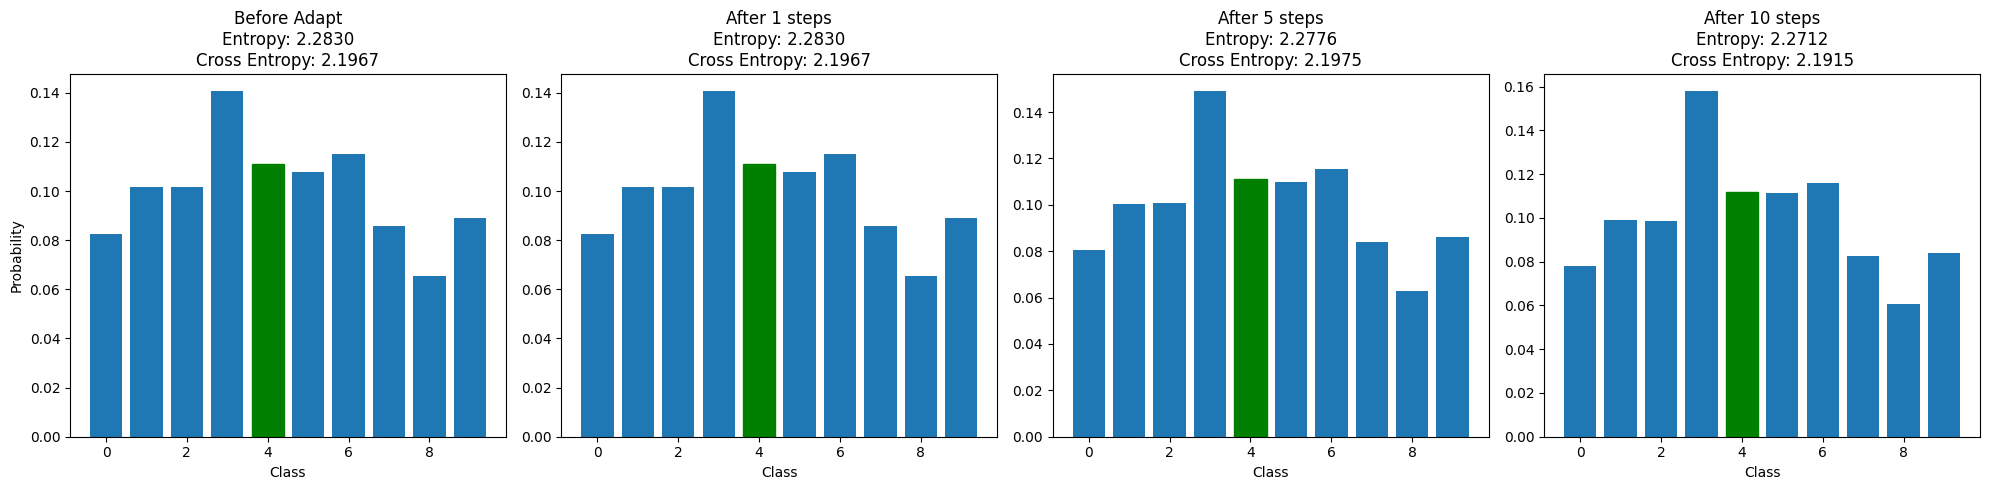

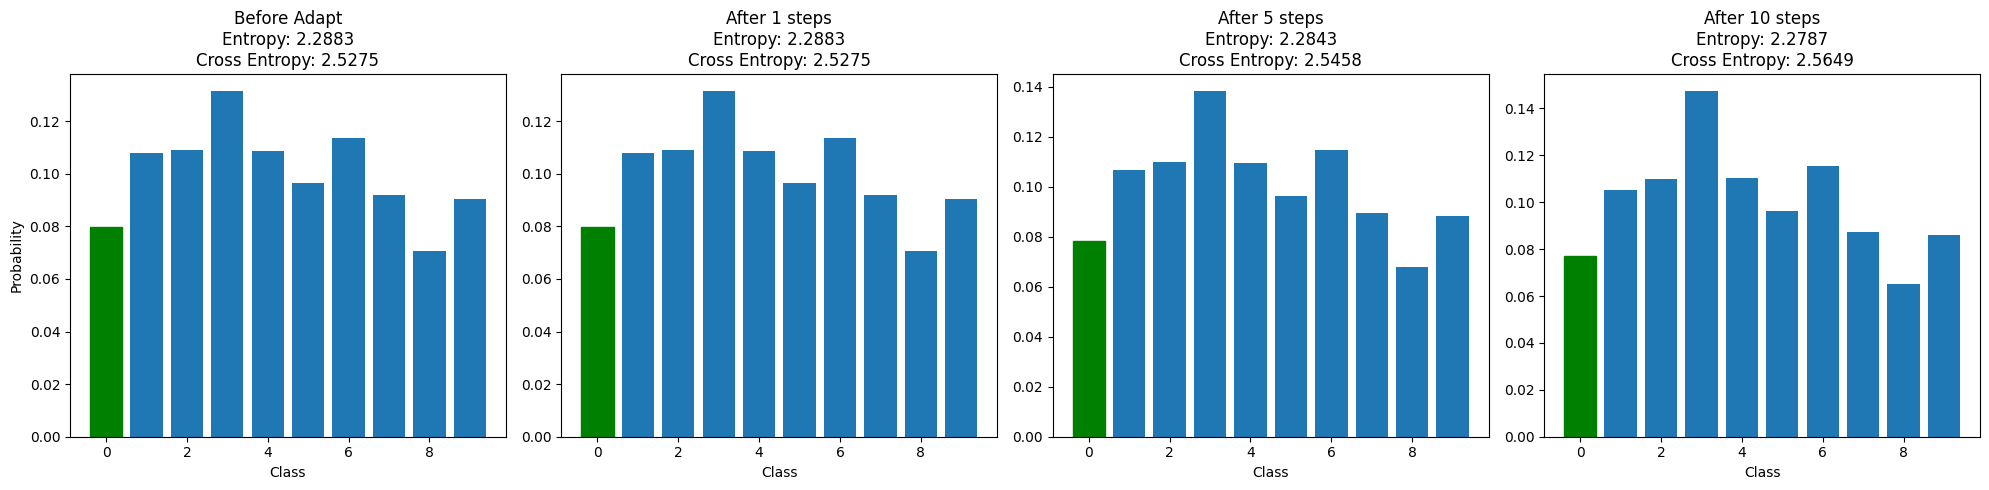

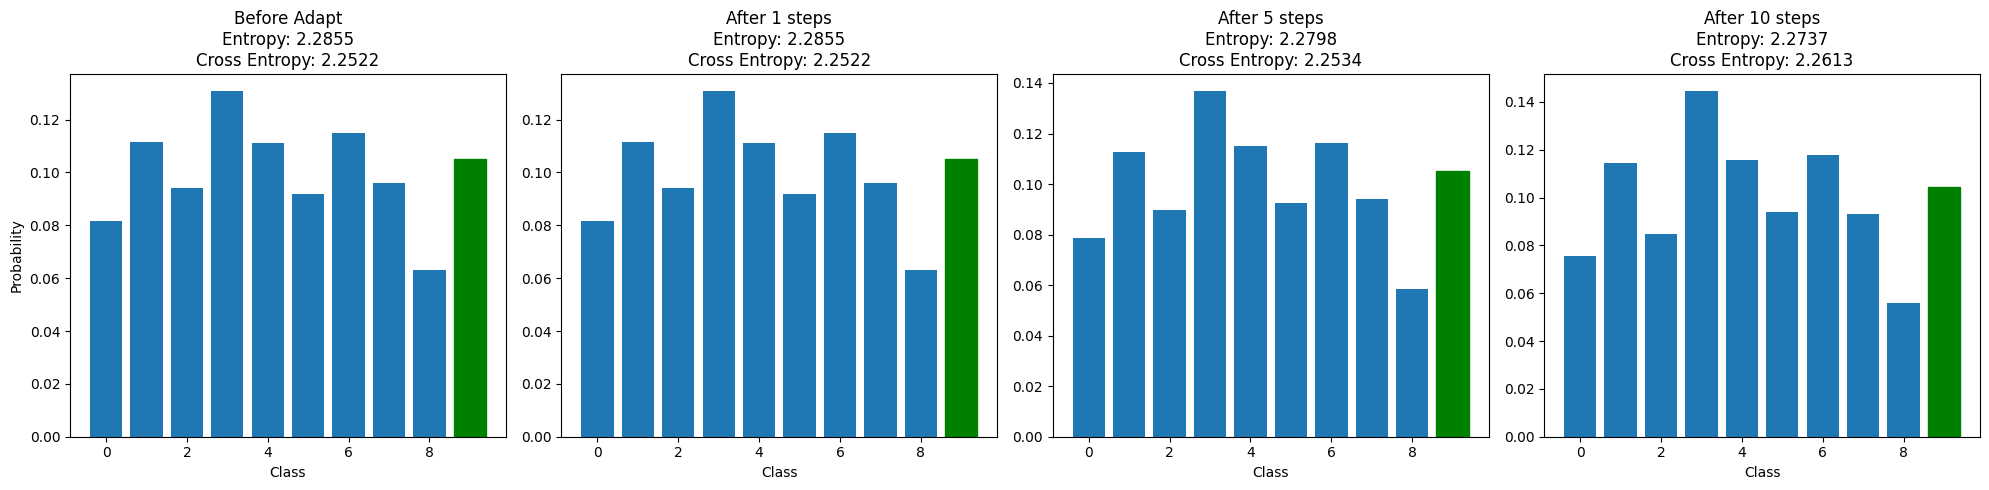

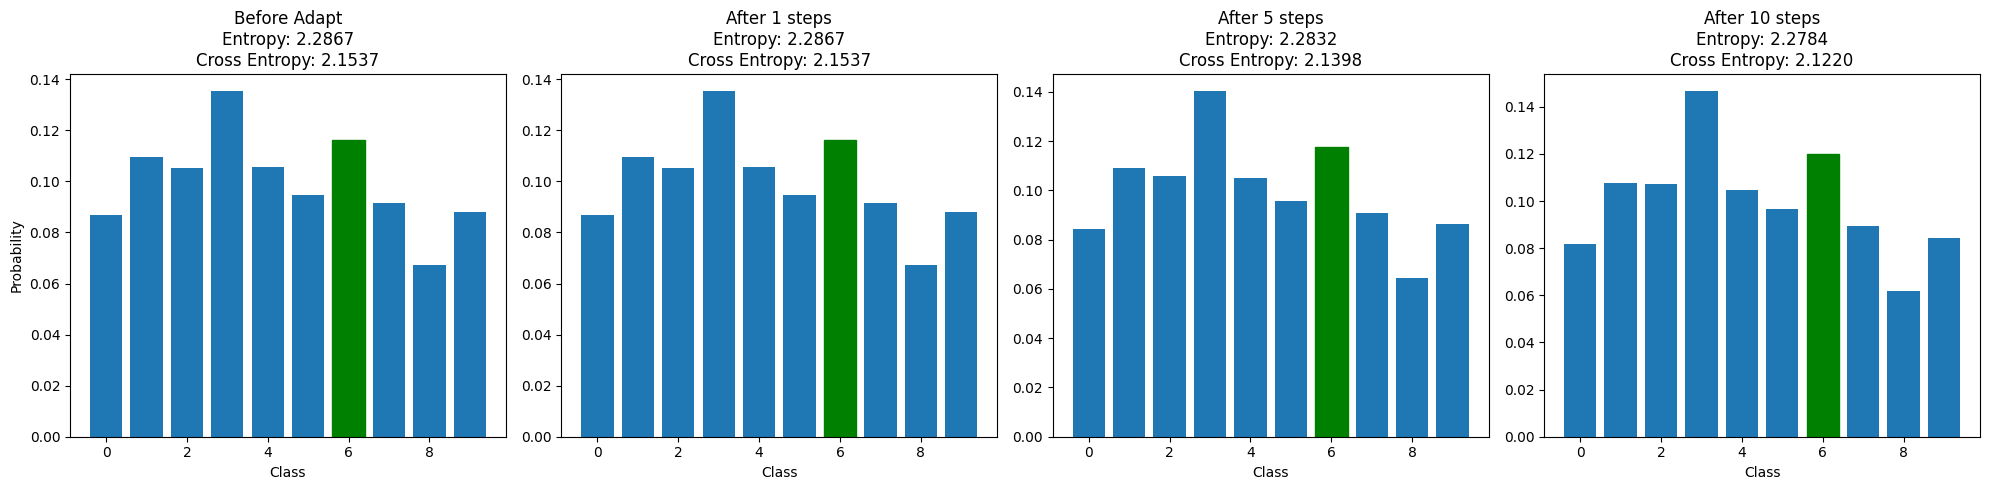

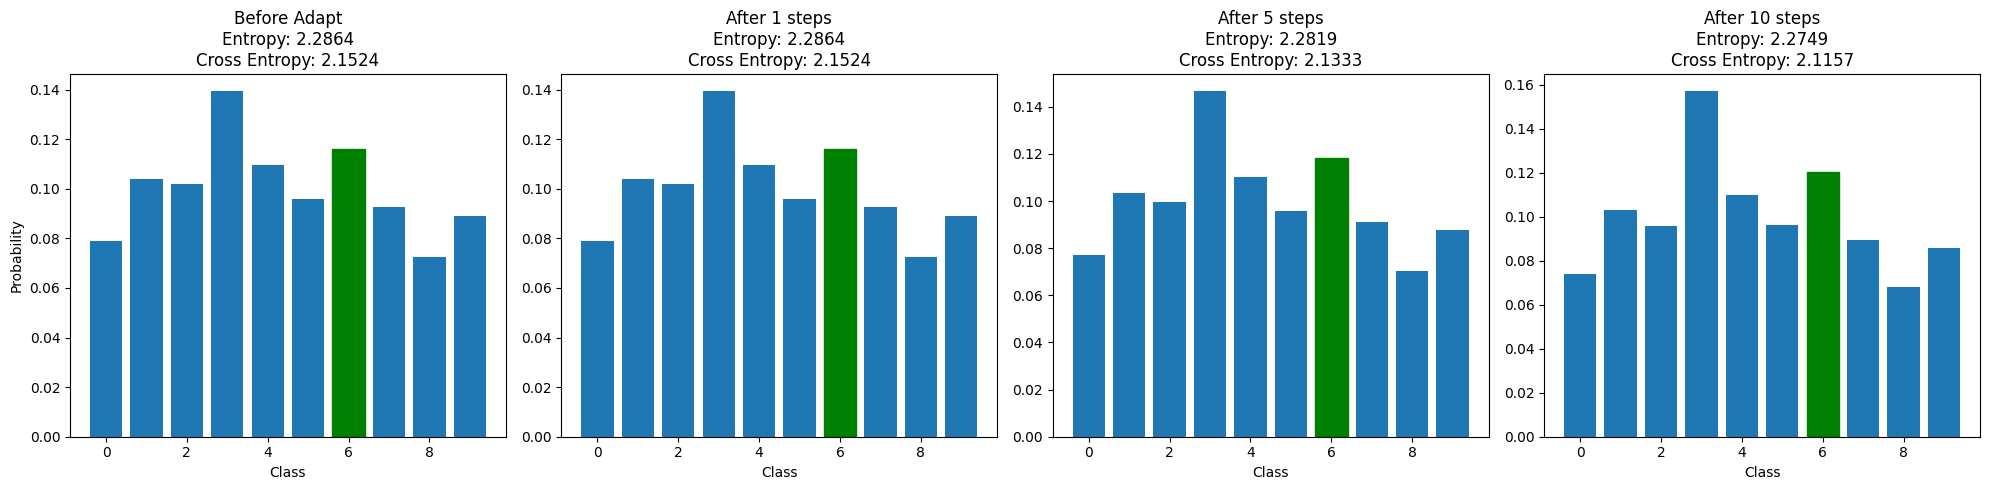

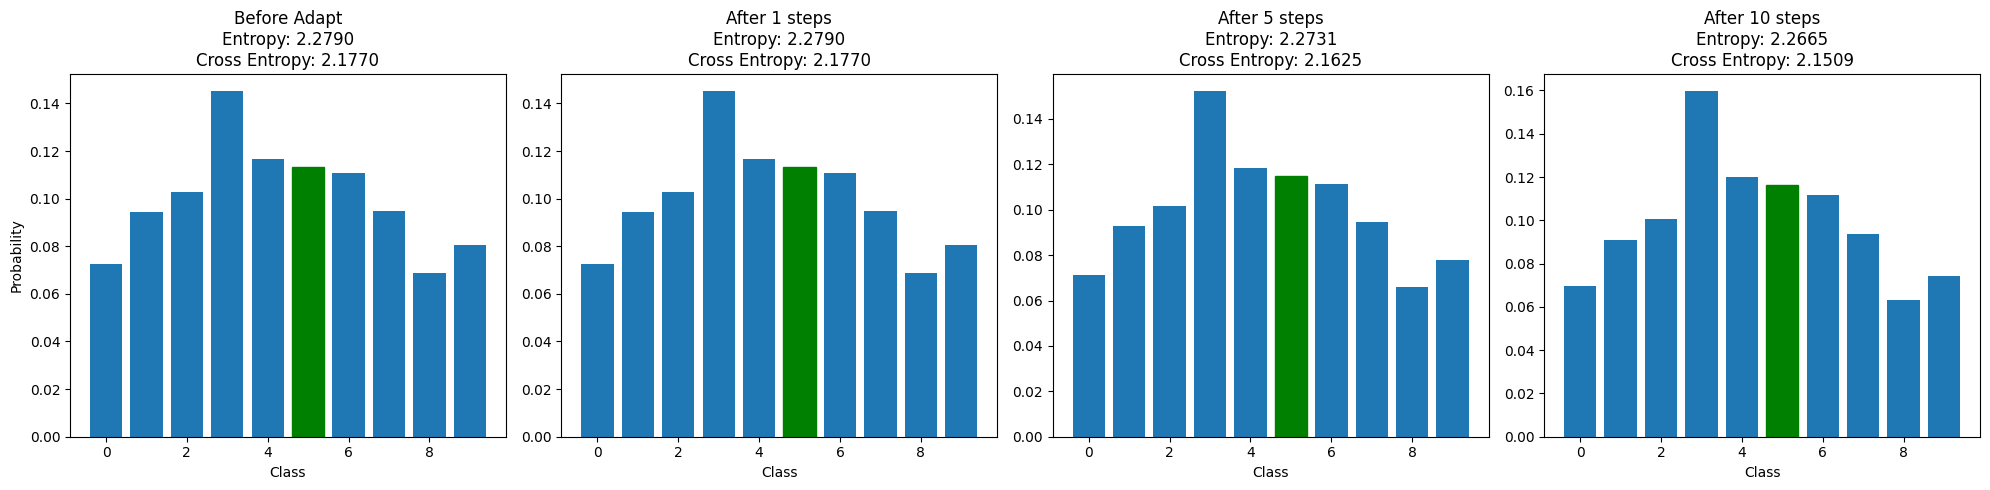

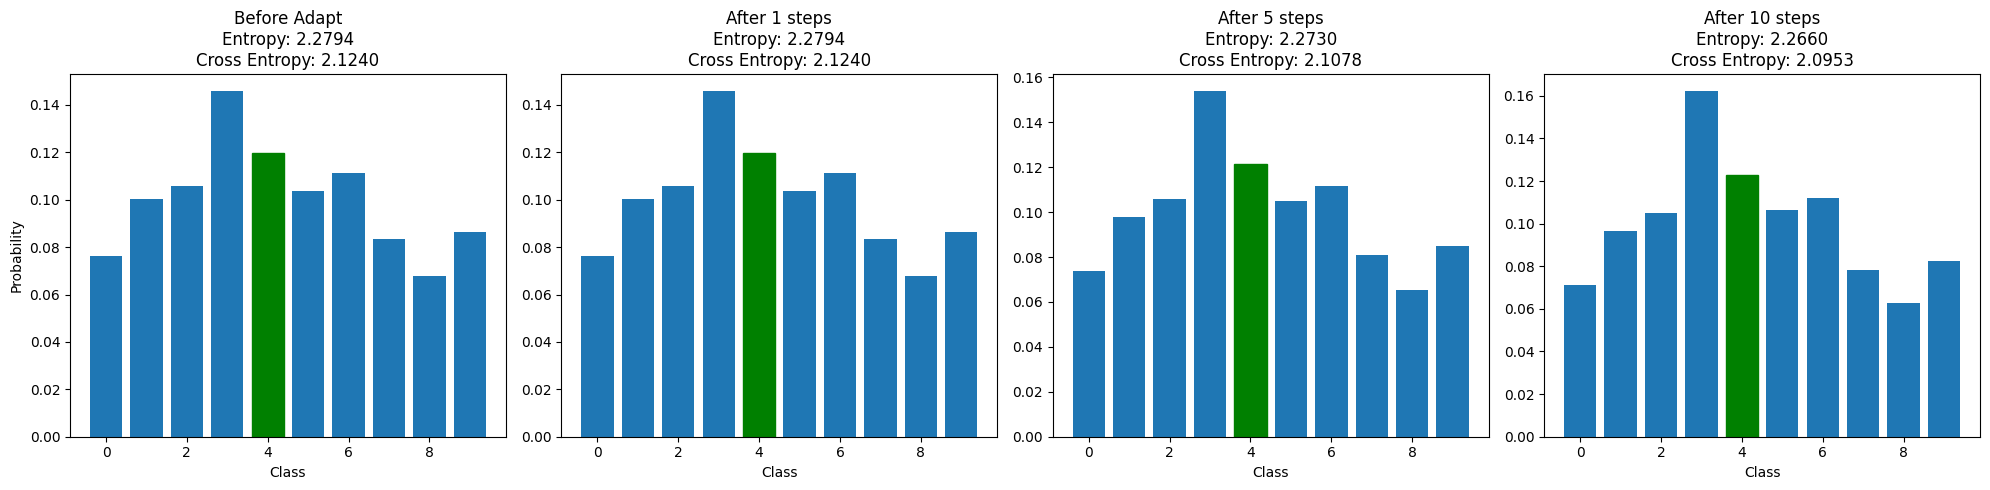

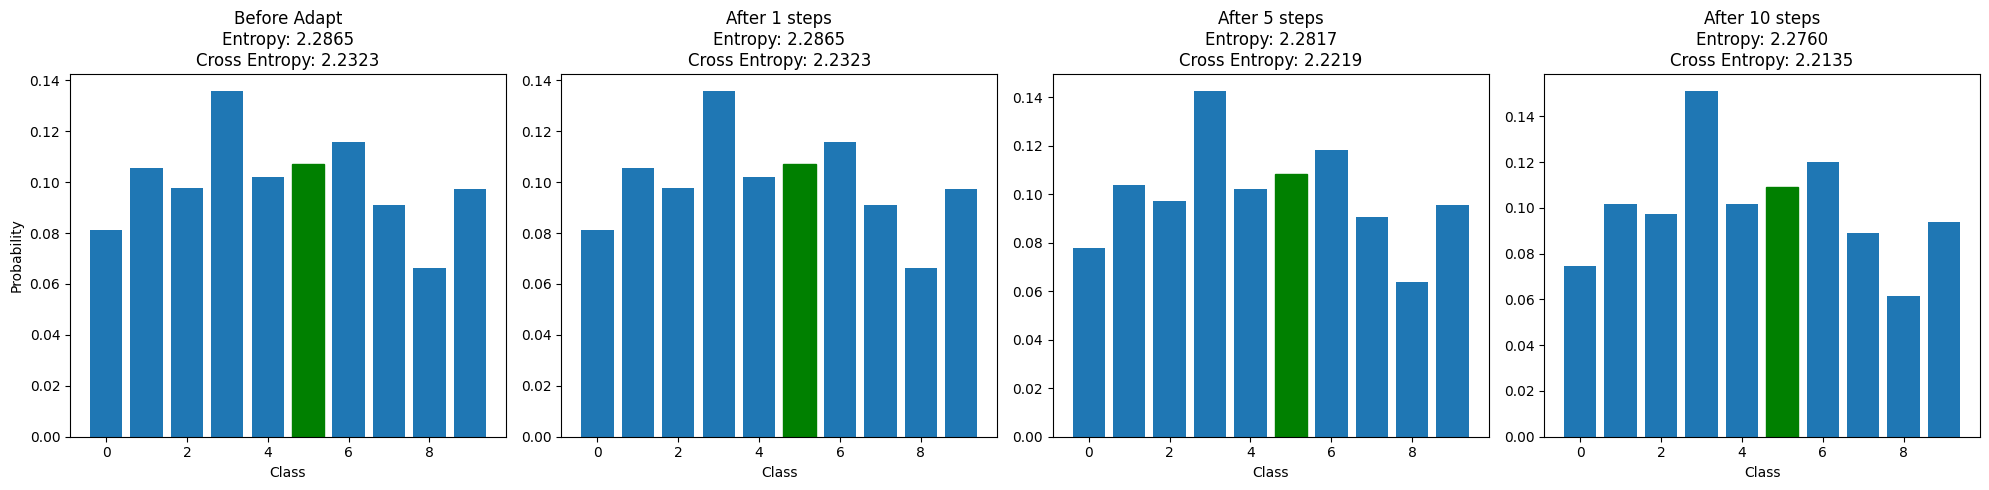

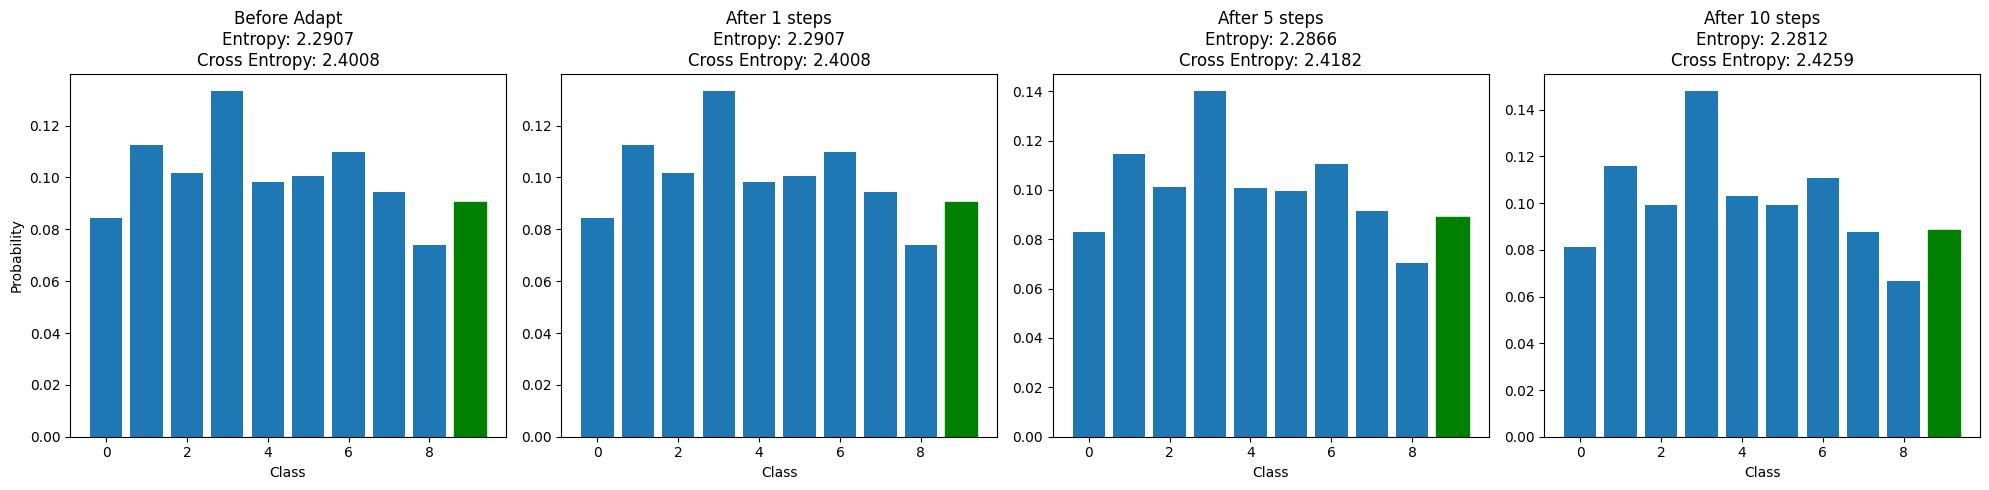

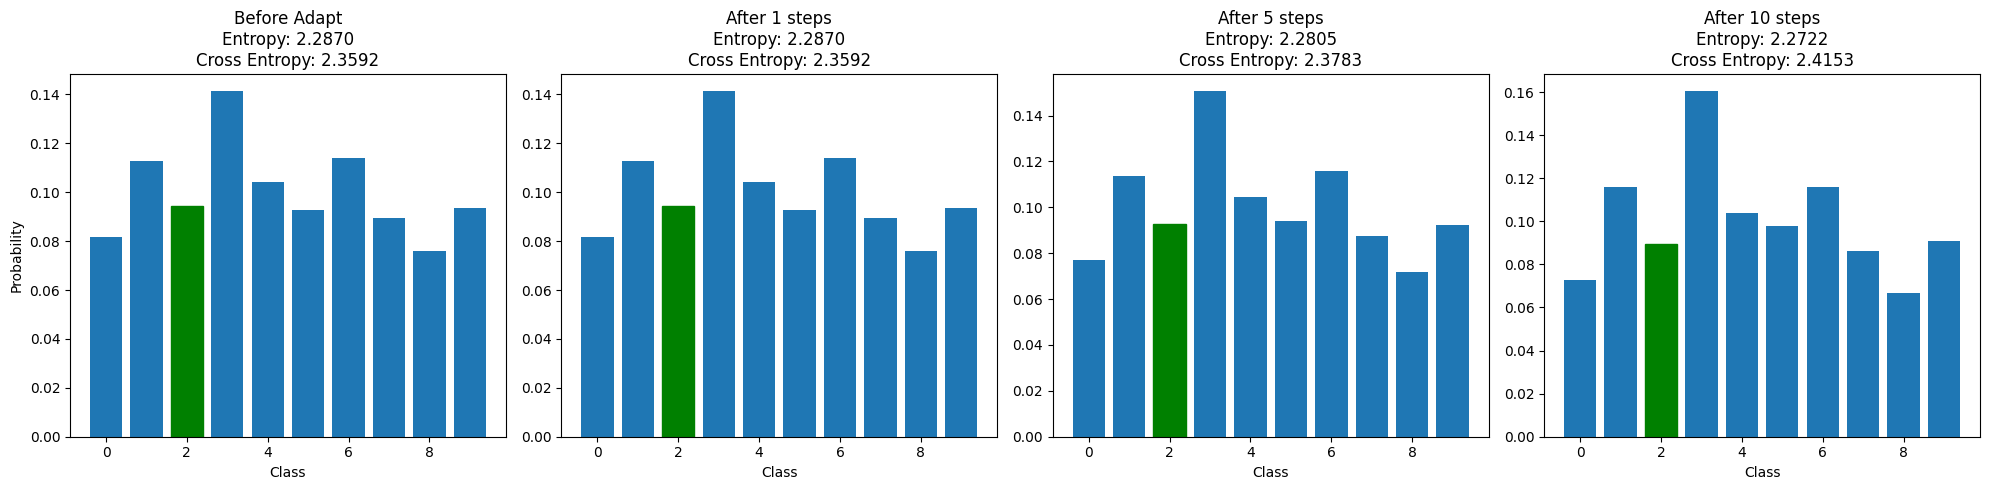

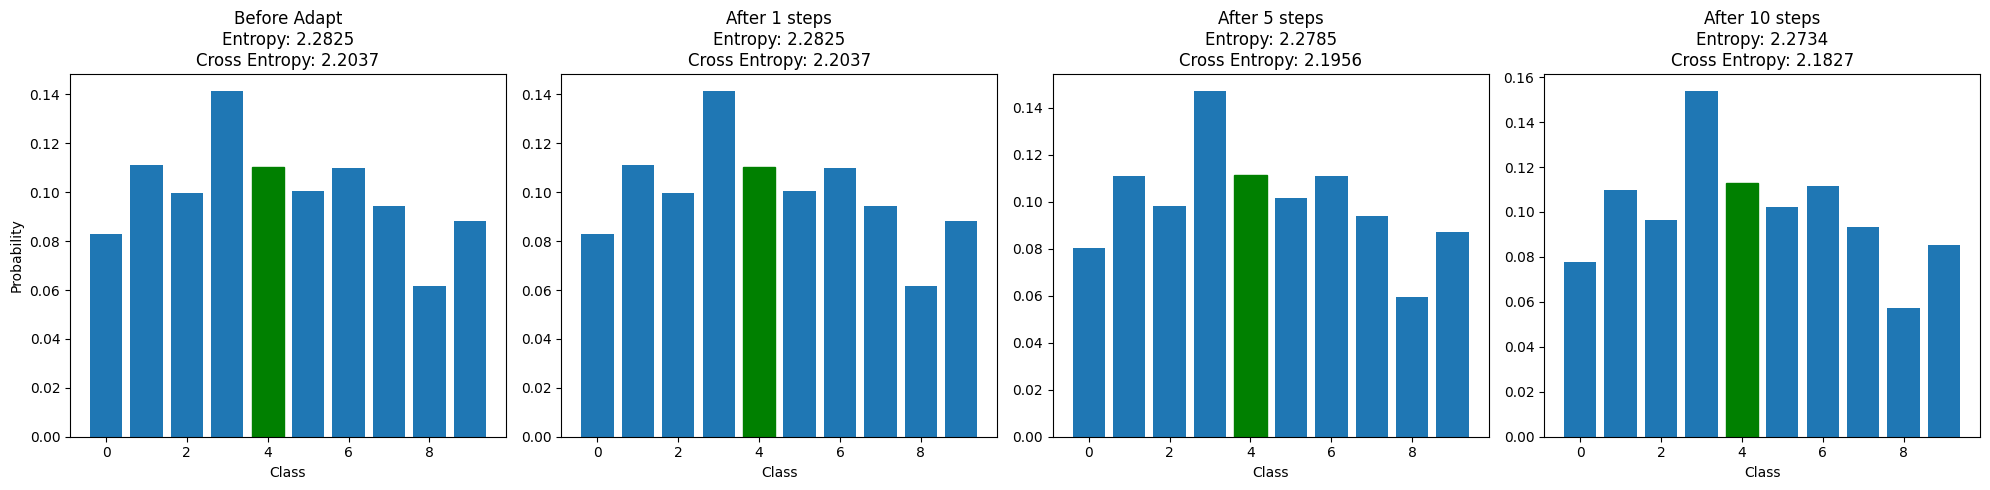

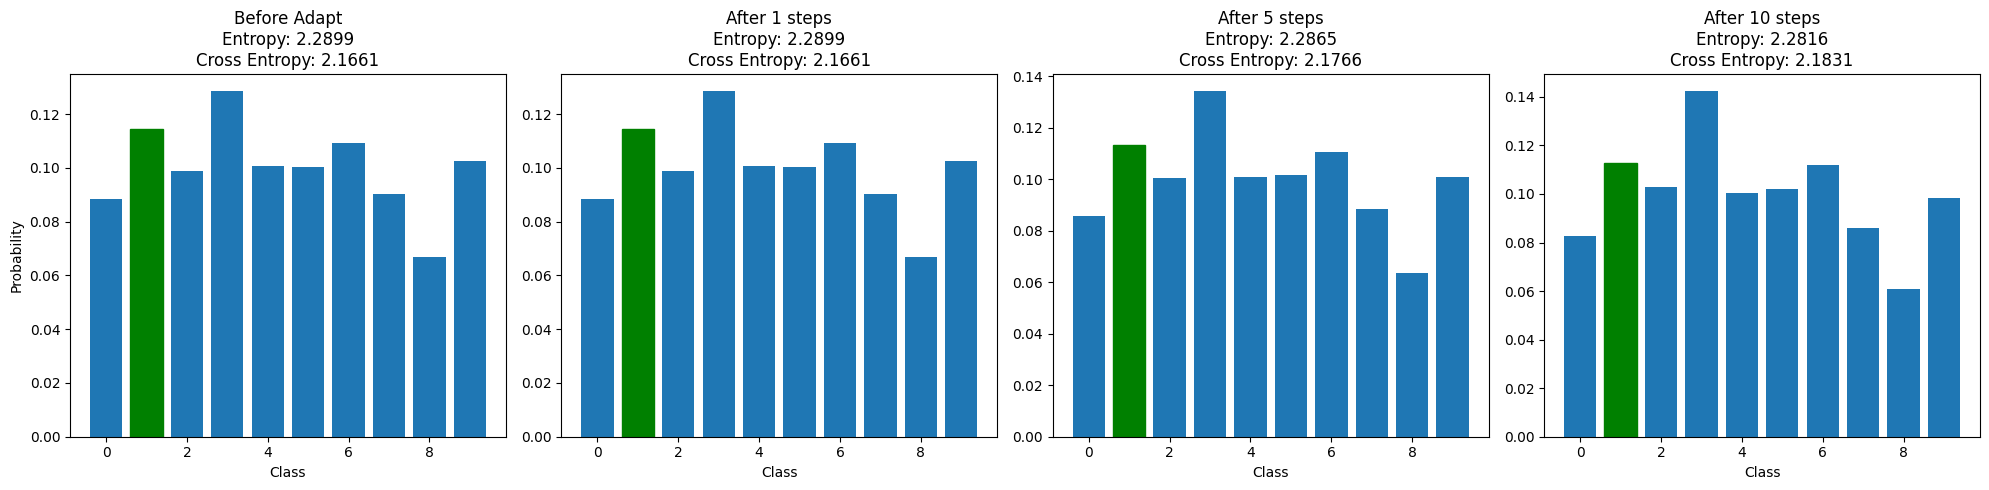

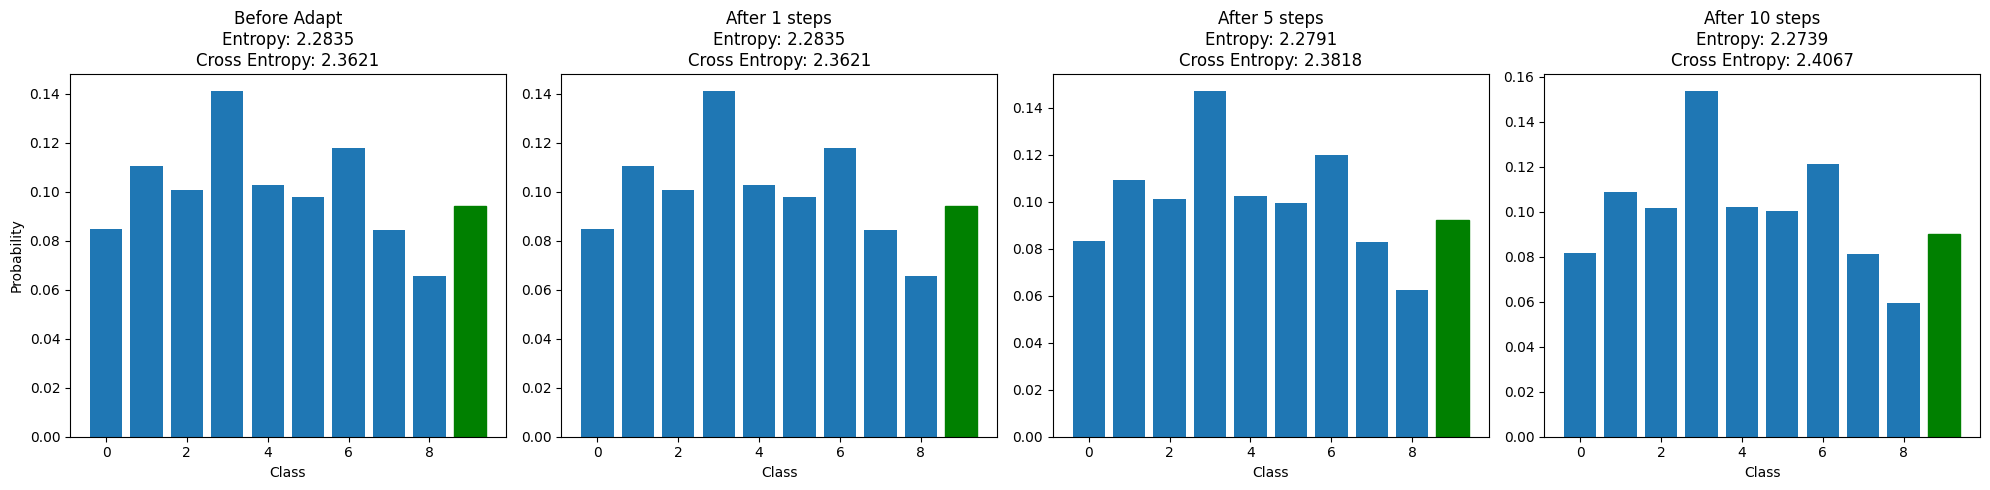

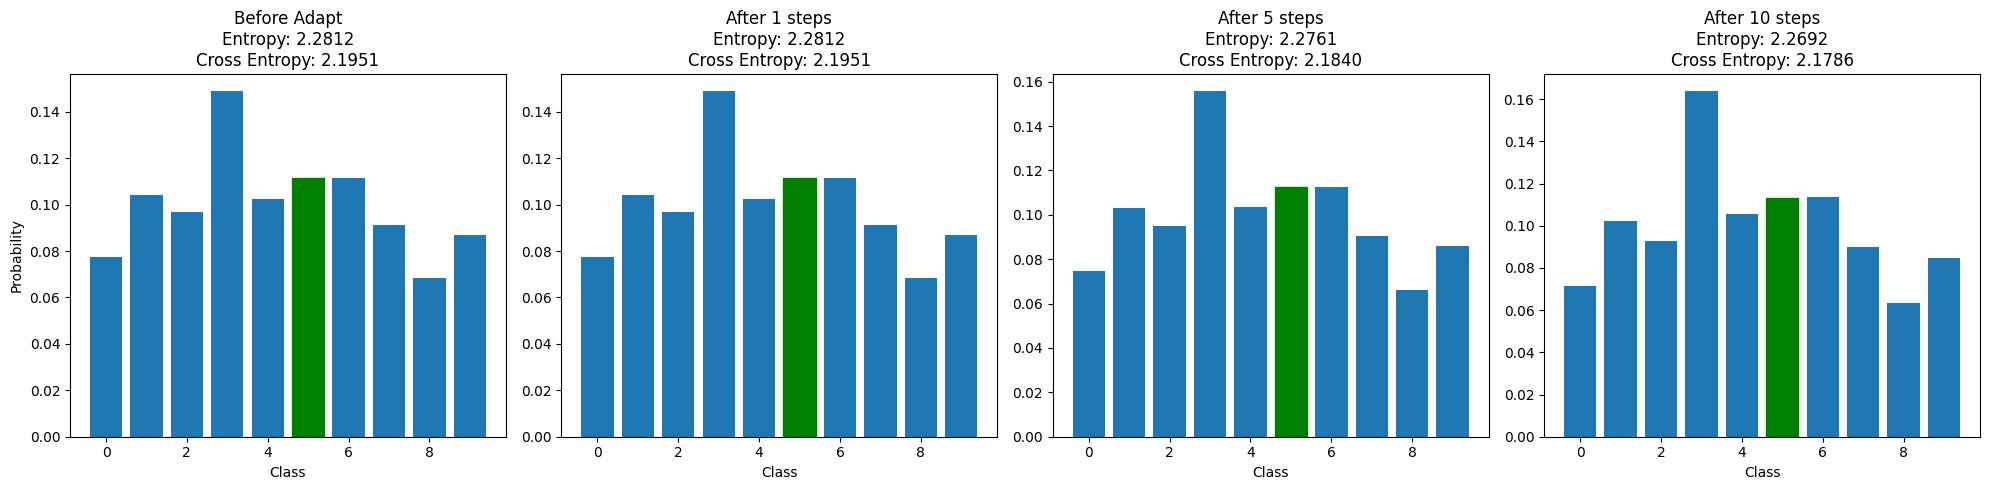

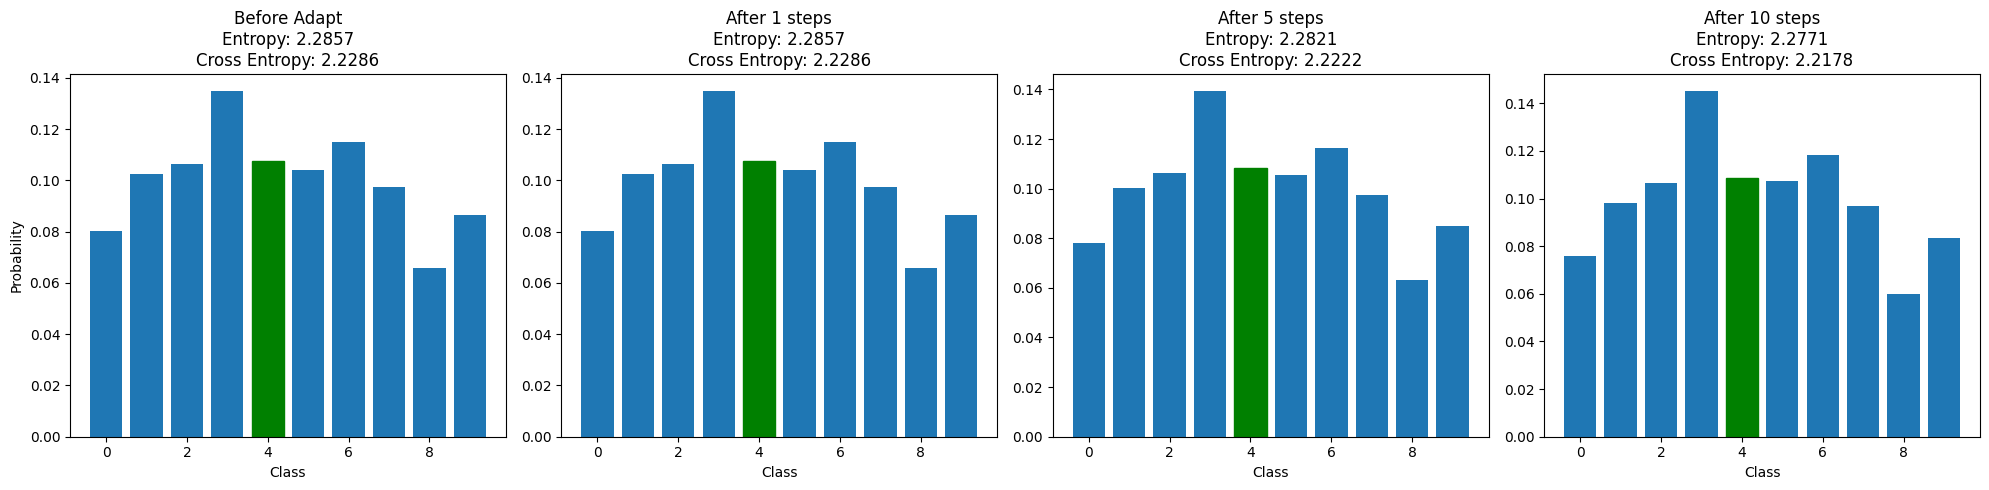

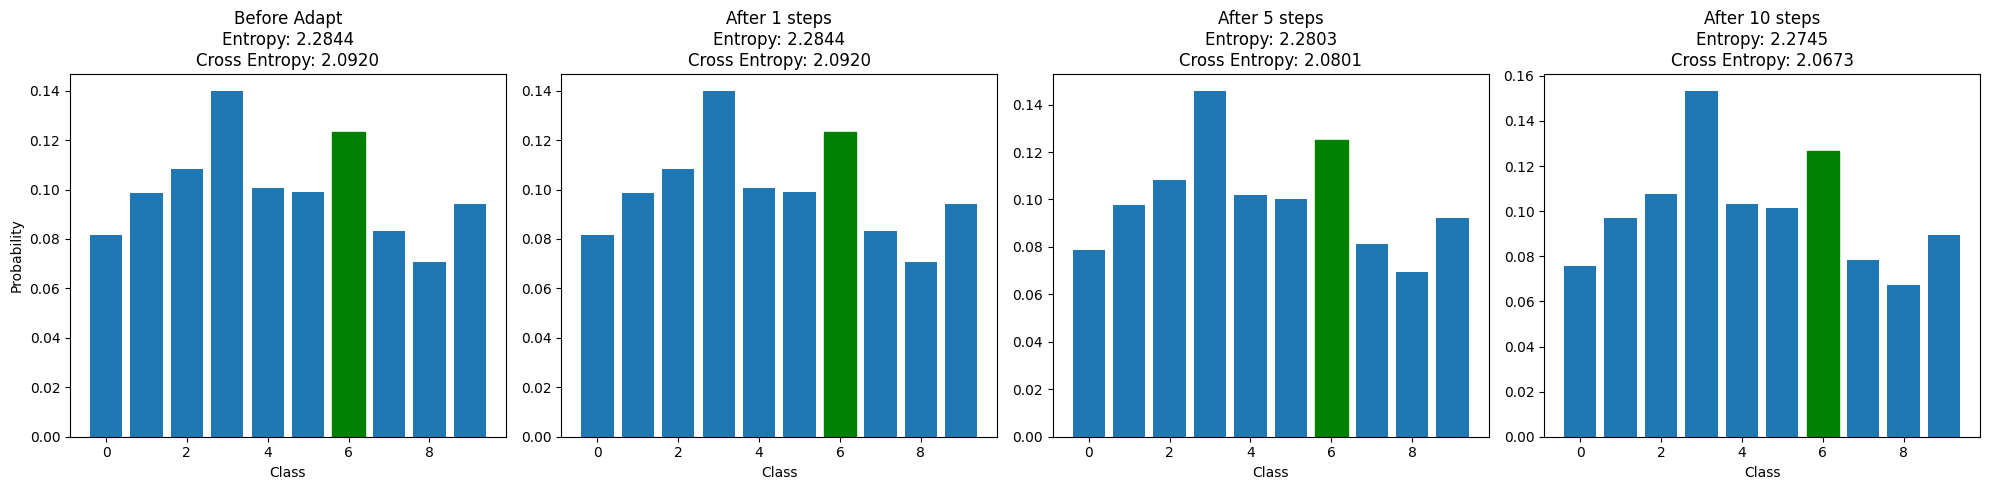

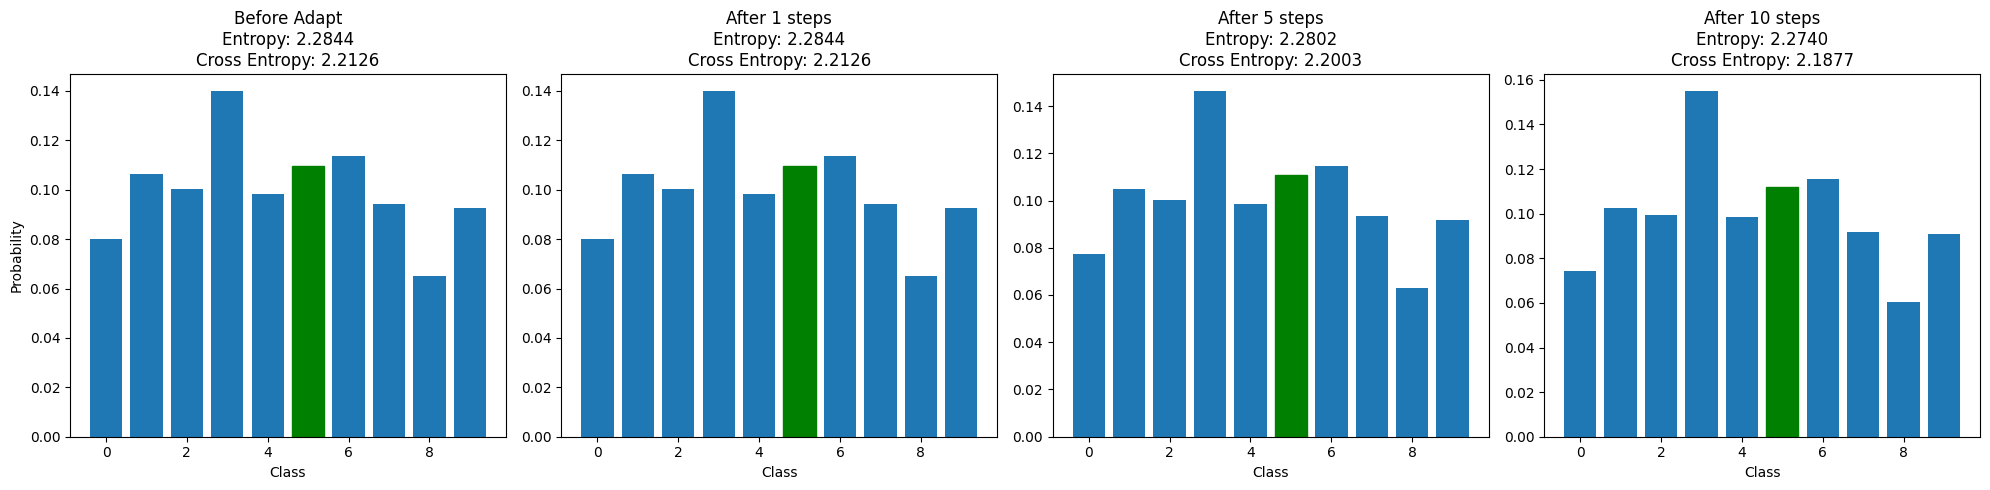

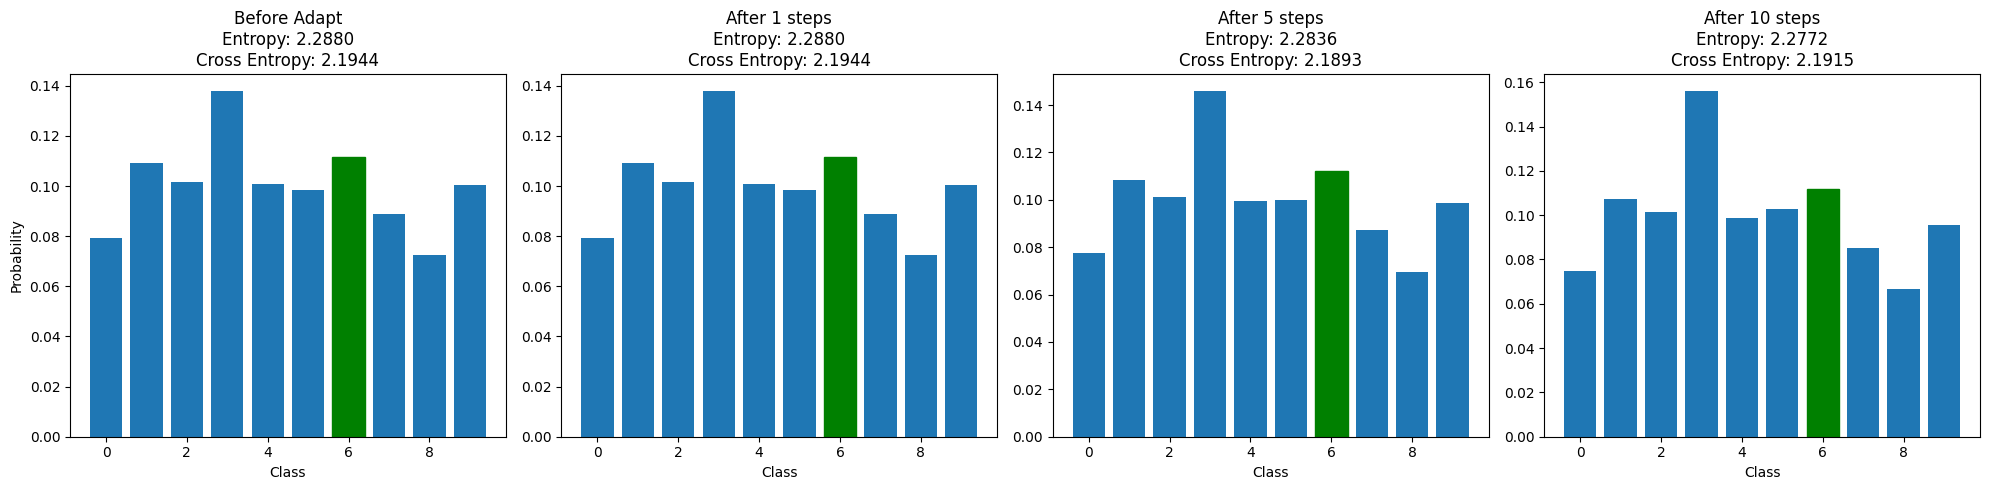

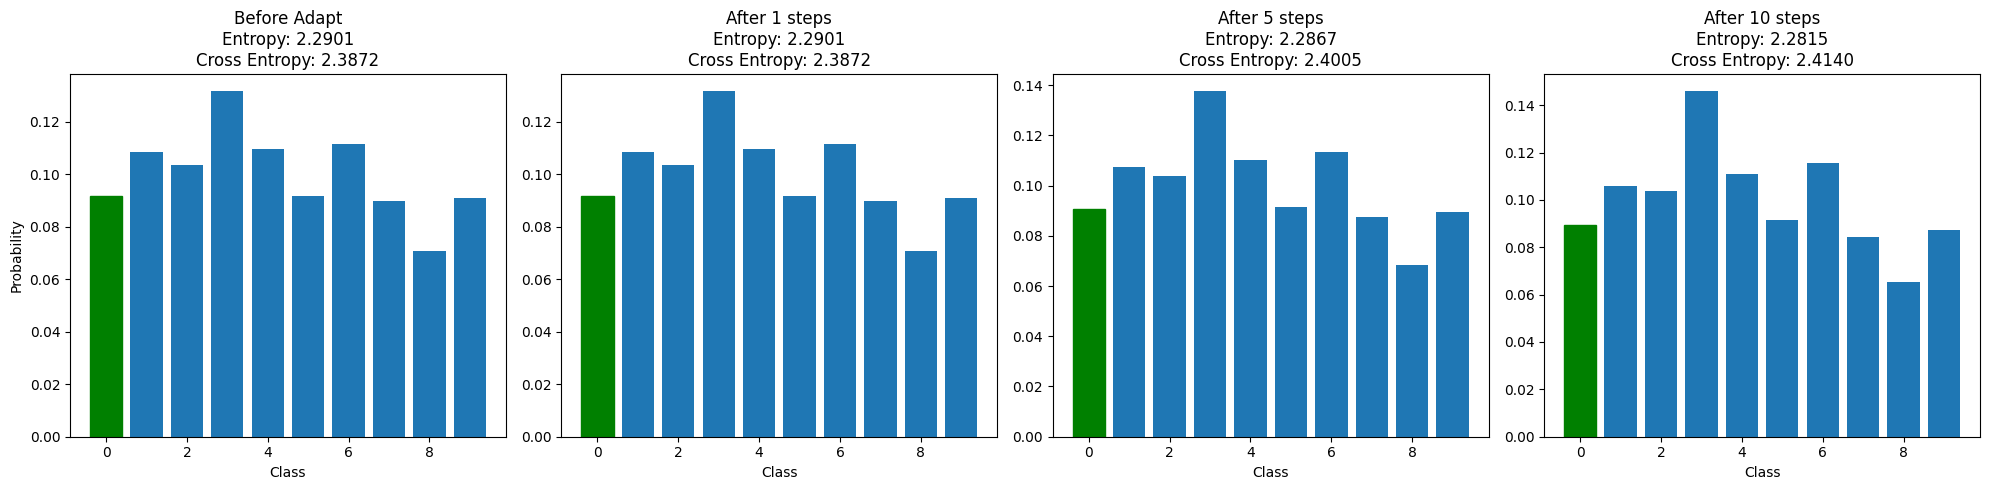

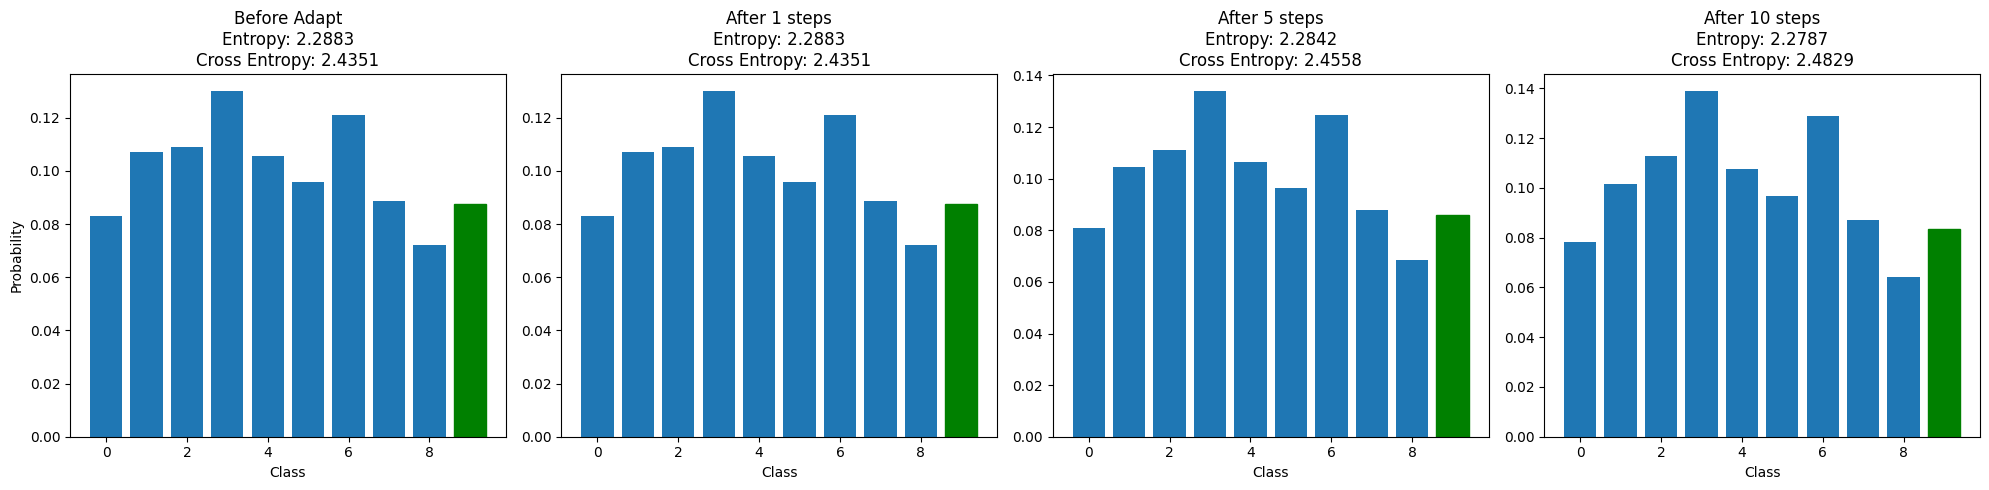

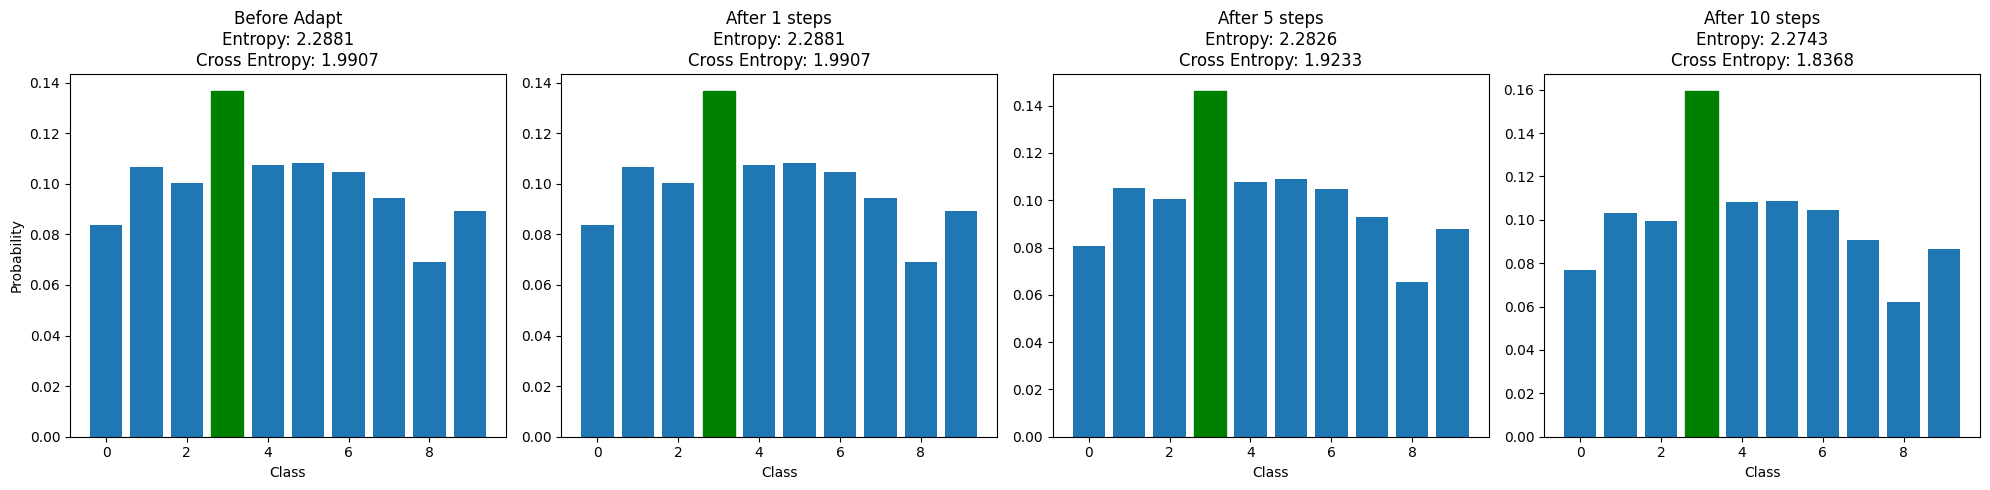

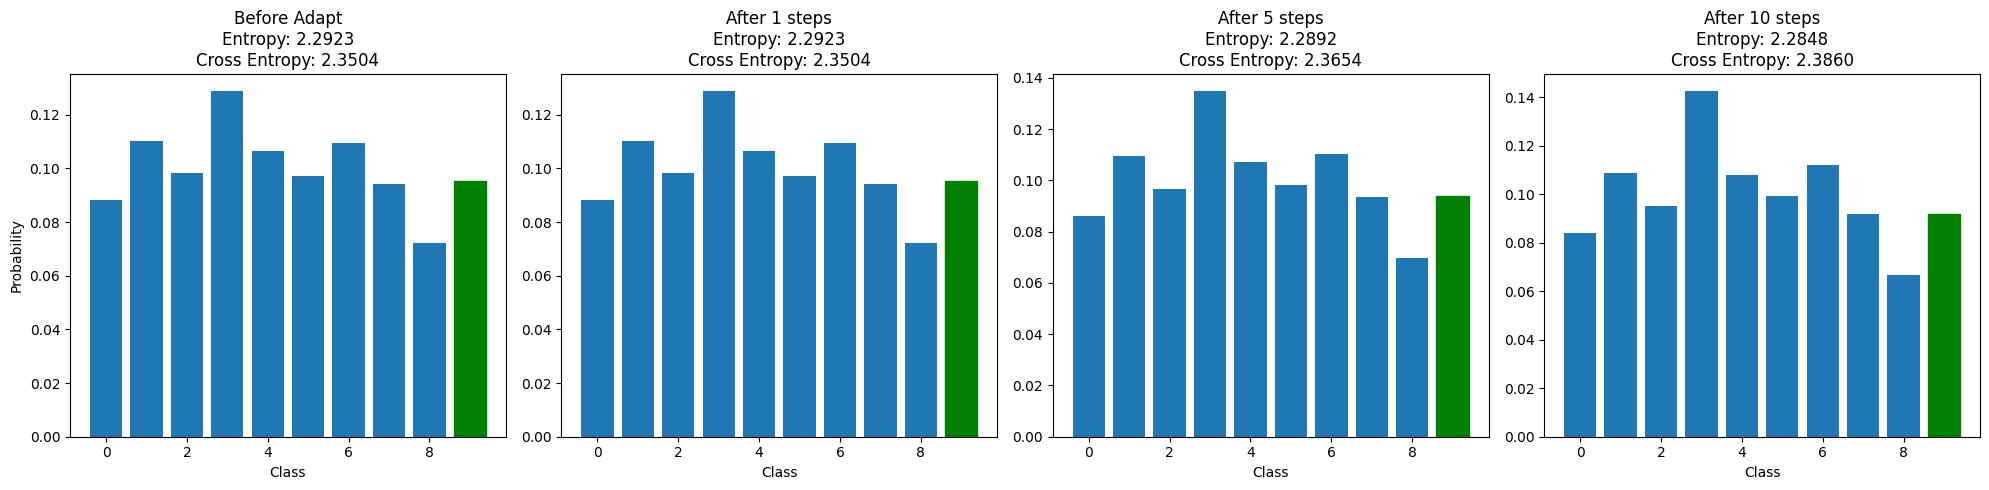

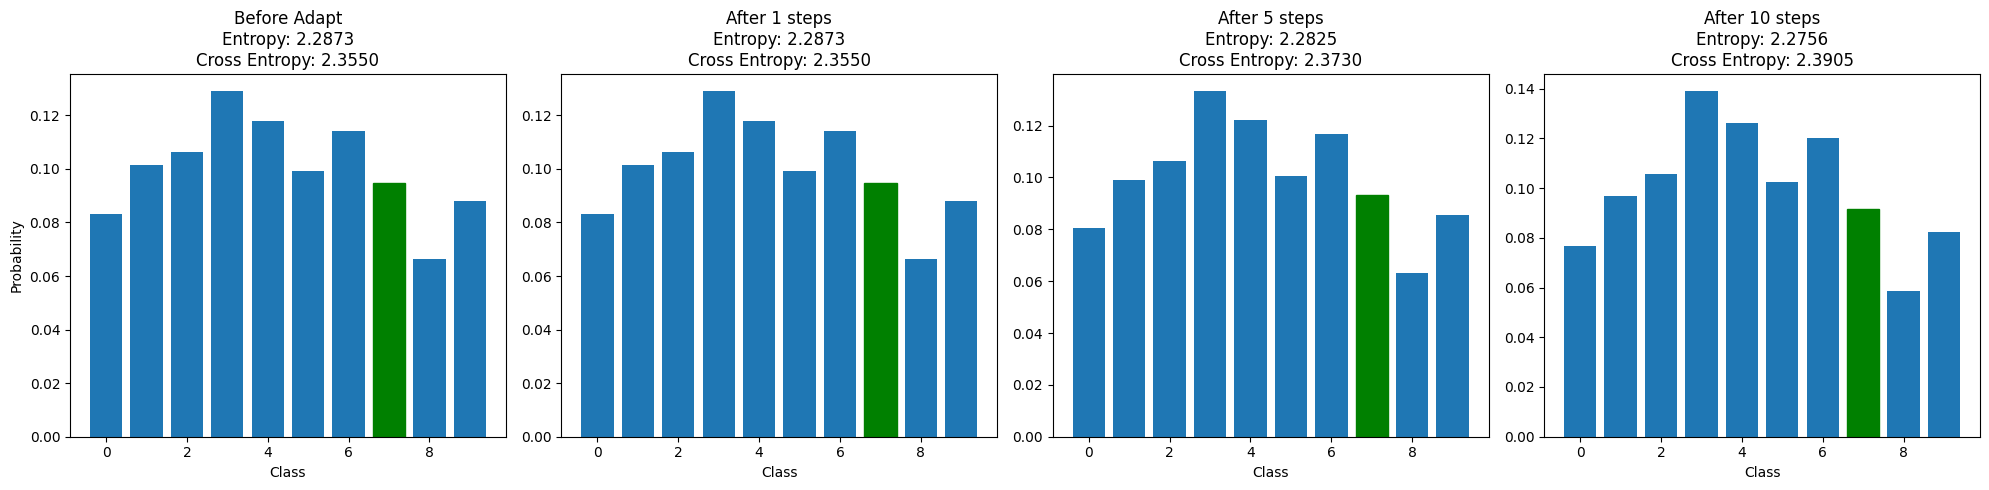

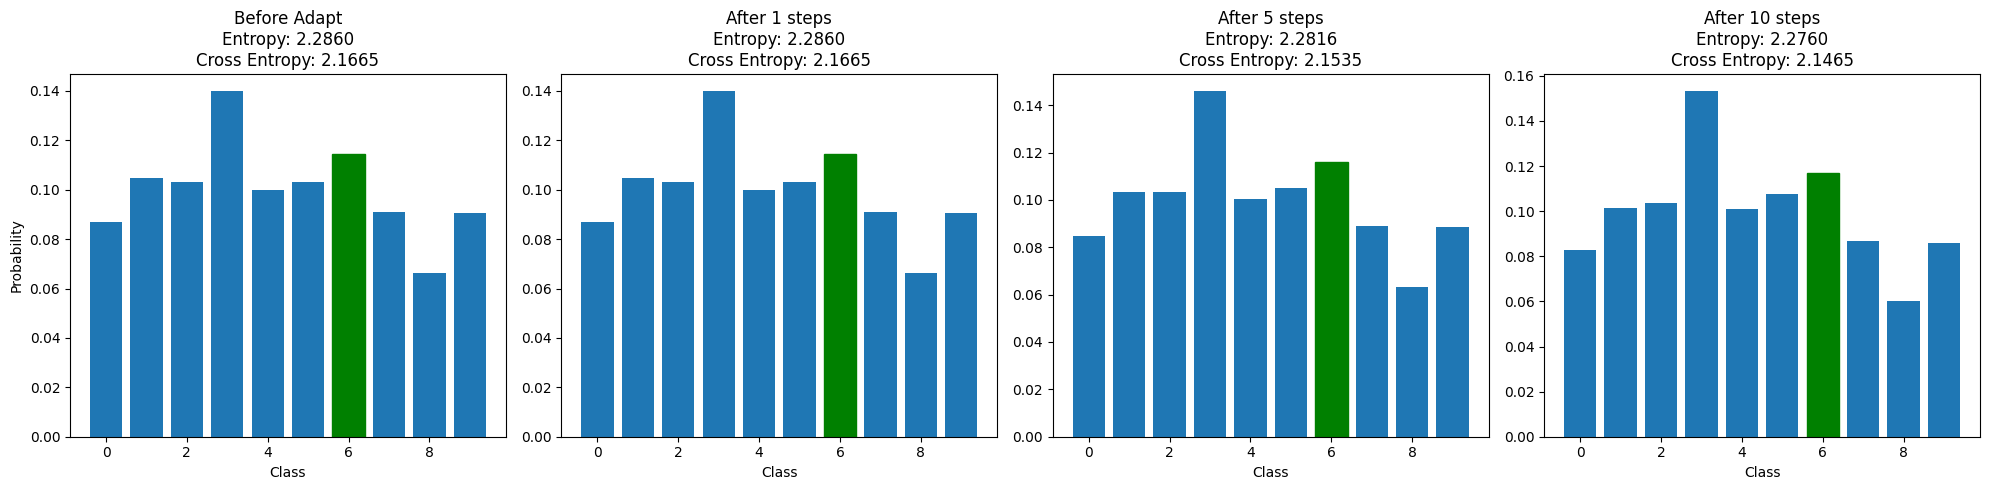

In [6]:
# Tent 모델의 forward and adapt 전후 비교를 위한 데이터 수집 (optim_steps 별)
optim_steps_list = [1, 5, 10]
results = {
    steps: {
        'entropy_before': [], 'entropy_after': [],
        'cross_entropy_before': [], 'cross_entropy_after': [],
        'output_dist_before': [], 'output_dist_after': [],
        'labels': []
    } for steps in optim_steps_list
}

data_loader = data_loaders[1]

for optim_steps in optim_steps_list:
    print(f"\n=== Tent (optim_steps={optim_steps}) ===")
    # 각 optim_steps에 대해 새로운 Tent 인스턴스 생성
    method = Tent(optim_steps=optim_steps)
    method.model = method.model.to(device)
    
    for batch in data_loader:
        input_sample, label, _ = batch
        input_sample = input_sample.to(device)
        label = label.to(device)
        
        # Forward and adapt 이전
        with torch.no_grad():
            output_before = method.model(input_sample)
            probs_before = F.softmax(output_before, dim=1)
            entropy_before = compute_entropy(probs_before)
            cross_entropy_before = F.cross_entropy(output_before, label)
        
        # Forward and adapt 수행
        output_after = method.forward_and_adapt(input_sample)
        probs_after = F.softmax(output_after, dim=1)
        entropy_after = compute_entropy(probs_after)
        cross_entropy_after = F.cross_entropy(output_after, label)
        method.reset()
        
        # 예측 결과 비교
        pred_before = torch.argmax(output_before, dim=1)
        pred_after = torch.argmax(output_after, dim=1)
        
        print(f'Sample {len(results[optim_steps]["entropy_before"])}:')
        print(f'Adapt 이전 - 예측: {pred_before.item()}, 엔트로피: {entropy_before.item():.4f}, 크로스 엔트로피: {cross_entropy_before.item():.4f}')
        print(f'Adapt 이후 - 예측: {pred_after.item()}, 엔트로피: {entropy_after.item():.4f}, 크로스 엔트로피: {cross_entropy_after.item():.4f}')
        print(f'실제 레이블: {label.item()}\n')
        
        # 결과 저장
        results[optim_steps]['entropy_before'].append(entropy_before.item())
        results[optim_steps]['entropy_after'].append(entropy_after.item())
        results[optim_steps]['cross_entropy_before'].append(cross_entropy_before.item())
        results[optim_steps]['cross_entropy_after'].append(cross_entropy_after.item())
        results[optim_steps]['output_dist_before'].append(probs_before.cpu().numpy())
        results[optim_steps]['output_dist_after'].append(probs_after.cpu().detach().numpy())
        results[optim_steps]['labels'].append(label.item())

# 모든 데이터 수집 후 결과 시각화
for i in range(len(results[optim_steps_list[0]]['labels'])):
    plt.figure(figsize=(20, 5))
    
    # Adapt 이전 분포
    plt.subplot(141)
    dist_before = results[optim_steps_list[0]]['output_dist_before'][i][0]
    label = results[optim_steps_list[0]]['labels'][i]
    entropy_before = results[optim_steps_list[0]]['entropy_before'][i]
    cross_entropy_before = results[optim_steps_list[0]]['cross_entropy_before'][i]
    bars = plt.bar(range(10), dist_before)
    bars[label].set_color('green')
    plt.title(f'Before Adapt\nEntropy: {entropy_before:.4f}\nCross Entropy: {cross_entropy_before:.4f}')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    
    # 각 optim_steps별 Adapt 이후 분포
    for idx, steps in enumerate(optim_steps_list):
        plt.subplot(142 + idx)
        dist_after = results[steps]['output_dist_after'][i][0]
        entropy_after = results[steps]['entropy_after'][i]
        cross_entropy_after = results[steps]['cross_entropy_after'][i]
        bars = plt.bar(range(10), dist_after)
        bars[label].set_color('green')
        plt.title(f'After {steps} steps\nEntropy: {entropy_after:.4f}\nCross Entropy: {cross_entropy_after:.4f}')
        plt.xlabel('Class')
    
    plt.tight_layout()
    plt.show()


# Tent batch size=10


=== Tent (optim_steps=1) ===
Sample 0:
Adapt 이전 - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 1.4571
Adapt 이후 - 예측: 5, 엔트로피: 0.2619, 크로스 엔트로피: 1.4571
실제 레이블: 3

Sample 1:
Adapt 이전 - 예측: 8, 엔트로피: 0.6345, 크로스 엔트로피: 1.4571
Adapt 이후 - 예측: 8, 엔트로피: 0.6345, 크로스 엔트로피: 1.4571
실제 레이블: 8

Sample 2:
Adapt 이전 - 예측: 5, 엔트로피: 1.6027, 크로스 엔트로피: 1.4571
Adapt 이후 - 예측: 5, 엔트로피: 1.6027, 크로스 엔트로피: 1.4571
실제 레이블: 8

Sample 3:
Adapt 이전 - 예측: 8, 엔트로피: 0.6769, 크로스 엔트로피: 1.4571
Adapt 이후 - 예측: 8, 엔트로피: 0.6769, 크로스 엔트로피: 1.4571
실제 레이블: 0

Sample 4:
Adapt 이전 - 예측: 6, 엔트로피: 0.0815, 크로스 엔트로피: 1.4571
Adapt 이후 - 예측: 6, 엔트로피: 0.0815, 크로스 엔트로피: 1.4571
실제 레이블: 6

Sample 5:
Adapt 이전 - 예측: 6, 엔트로피: 0.0285, 크로스 엔트로피: 1.4571
Adapt 이후 - 예측: 6, 엔트로피: 0.0285, 크로스 엔트로피: 1.4571
실제 레이블: 6

Sample 6:
Adapt 이전 - 예측: 1, 엔트로피: 1.0039, 크로스 엔트로피: 1.4571
Adapt 이후 - 예측: 1, 엔트로피: 1.0039, 크로스 엔트로피: 1.4571
실제 레이블: 1

Sample 7:
Adapt 이전 - 예측: 2, 엔트로피: 0.5409, 크로스 엔트로피: 1.4571
Adapt 이후 - 예측: 2, 엔트로피: 0.5409, 크로스 엔트로피: 1.4571
실제 레이블: 6

Sample 8:
Adapt 이전

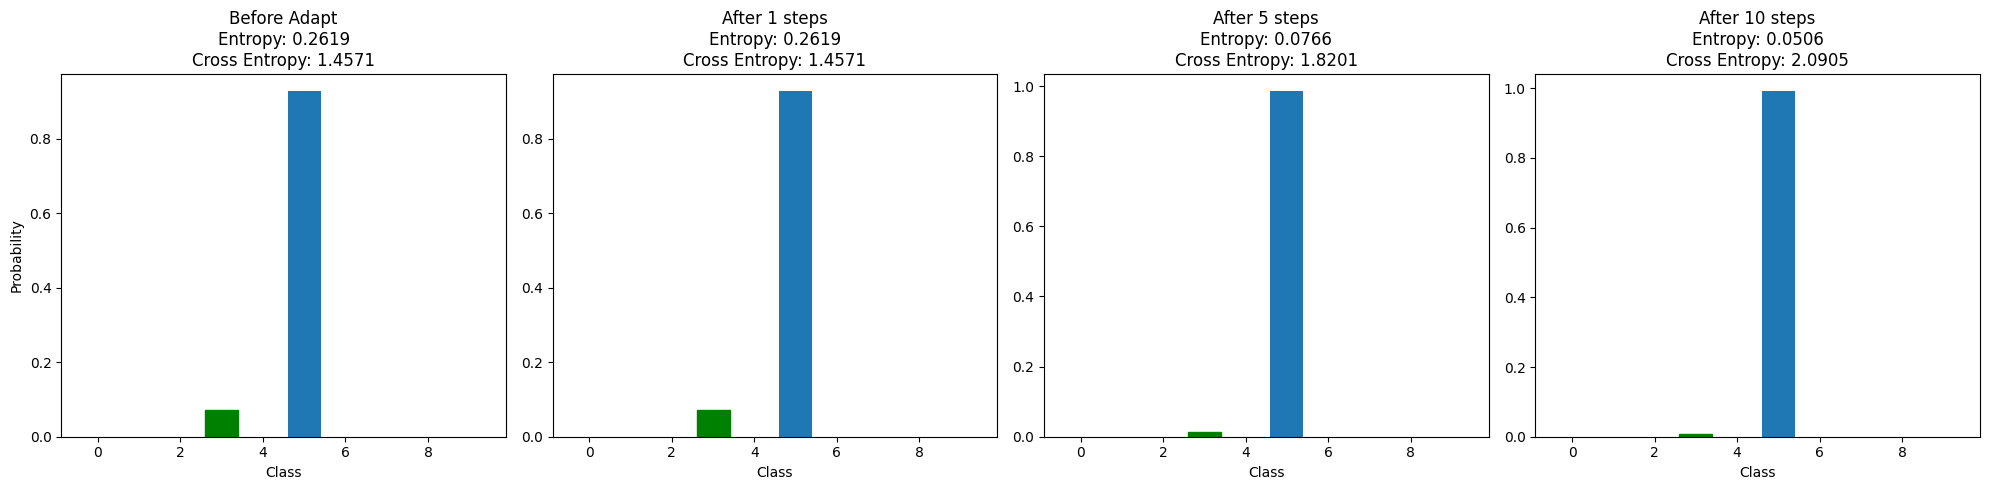

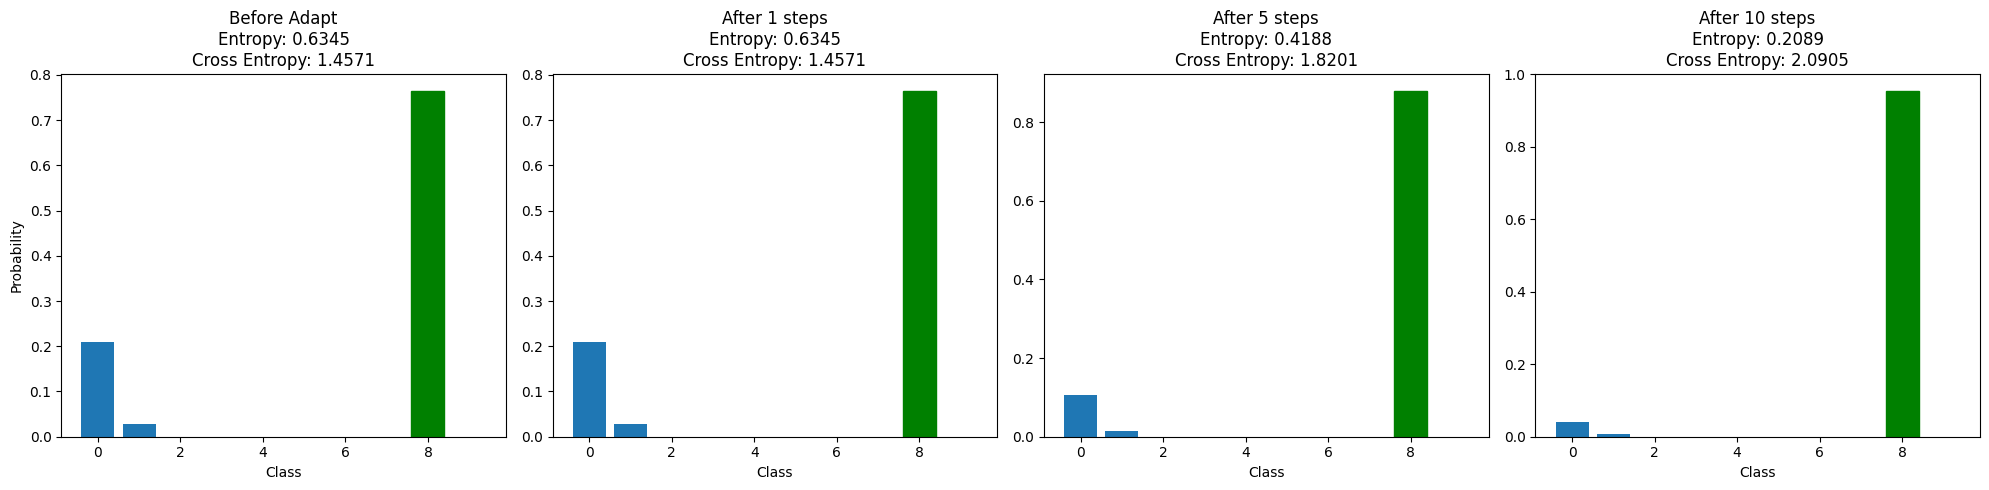

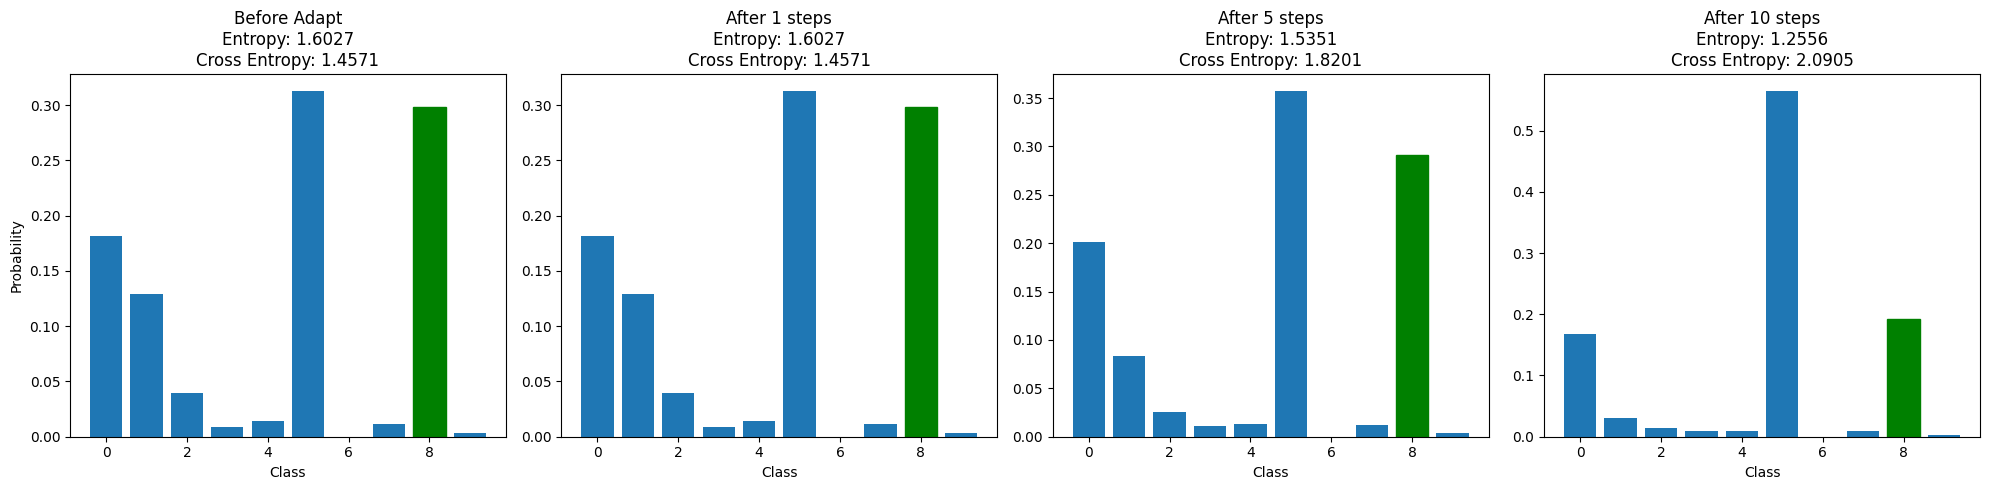

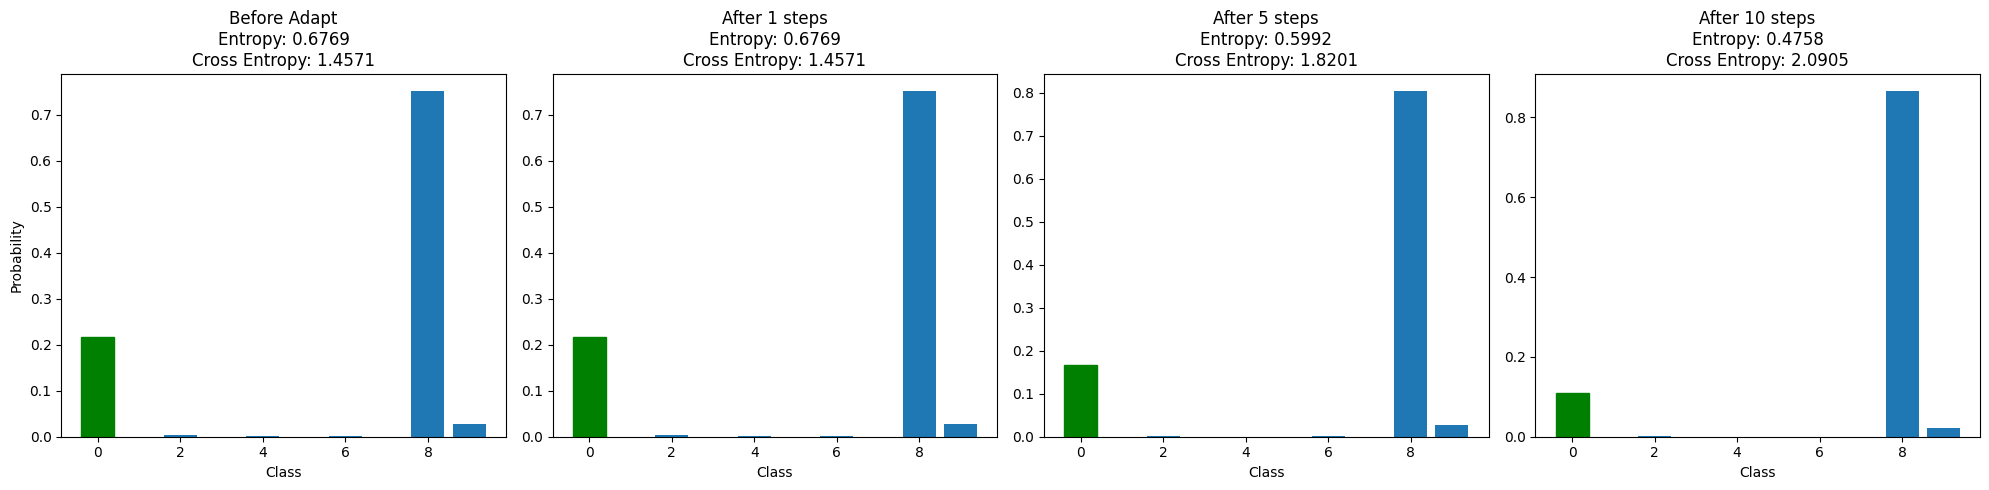

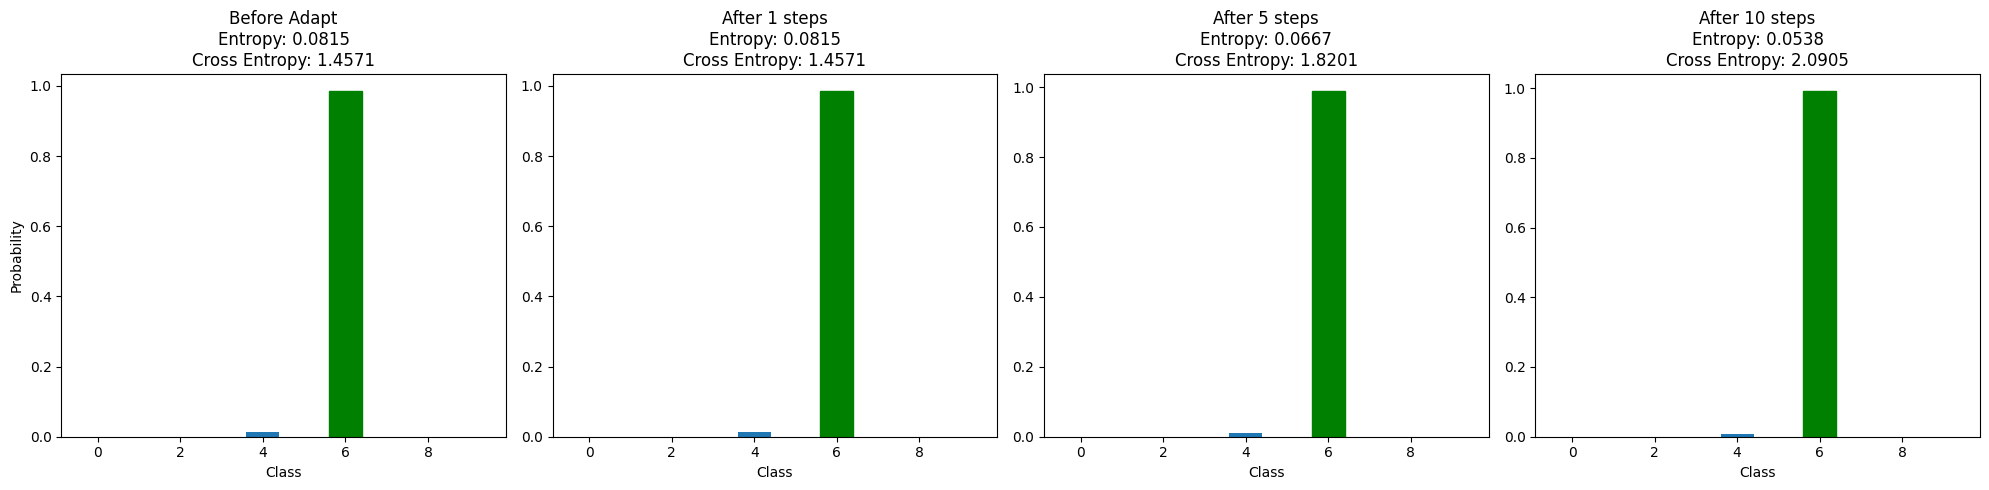

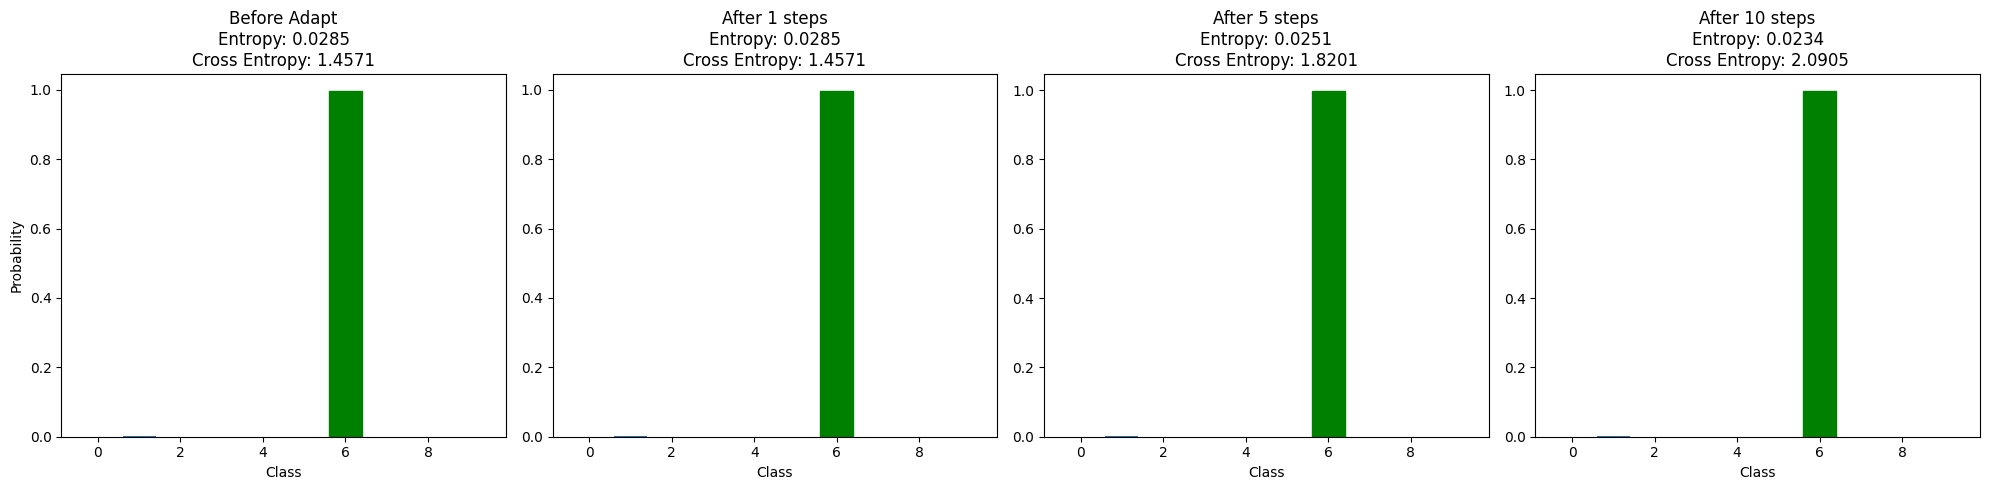

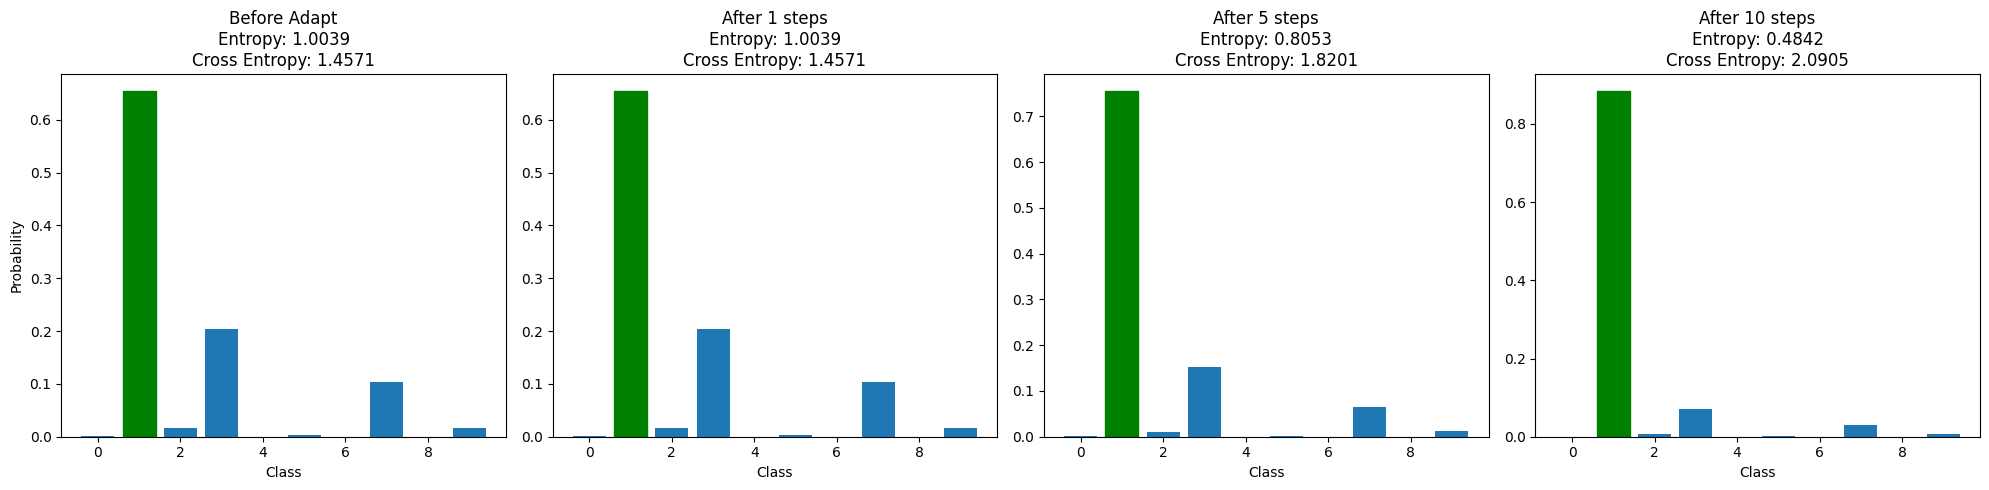

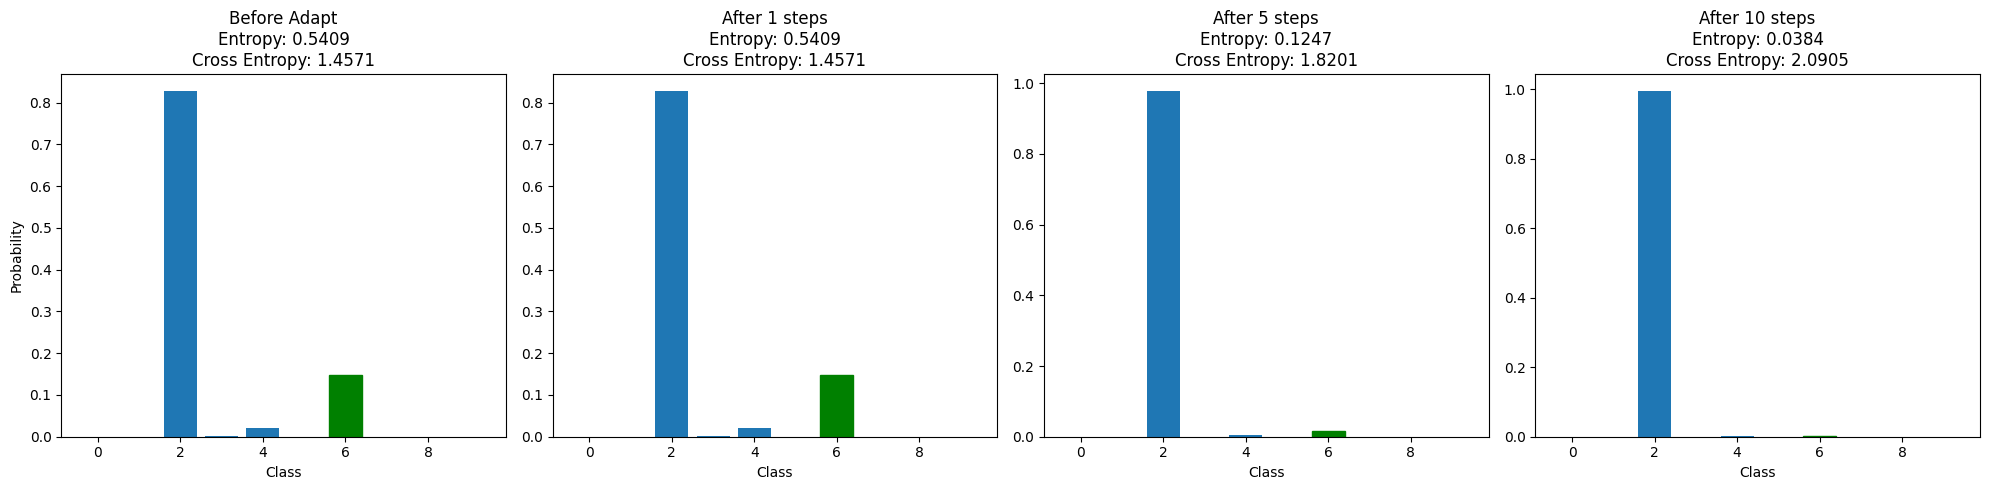

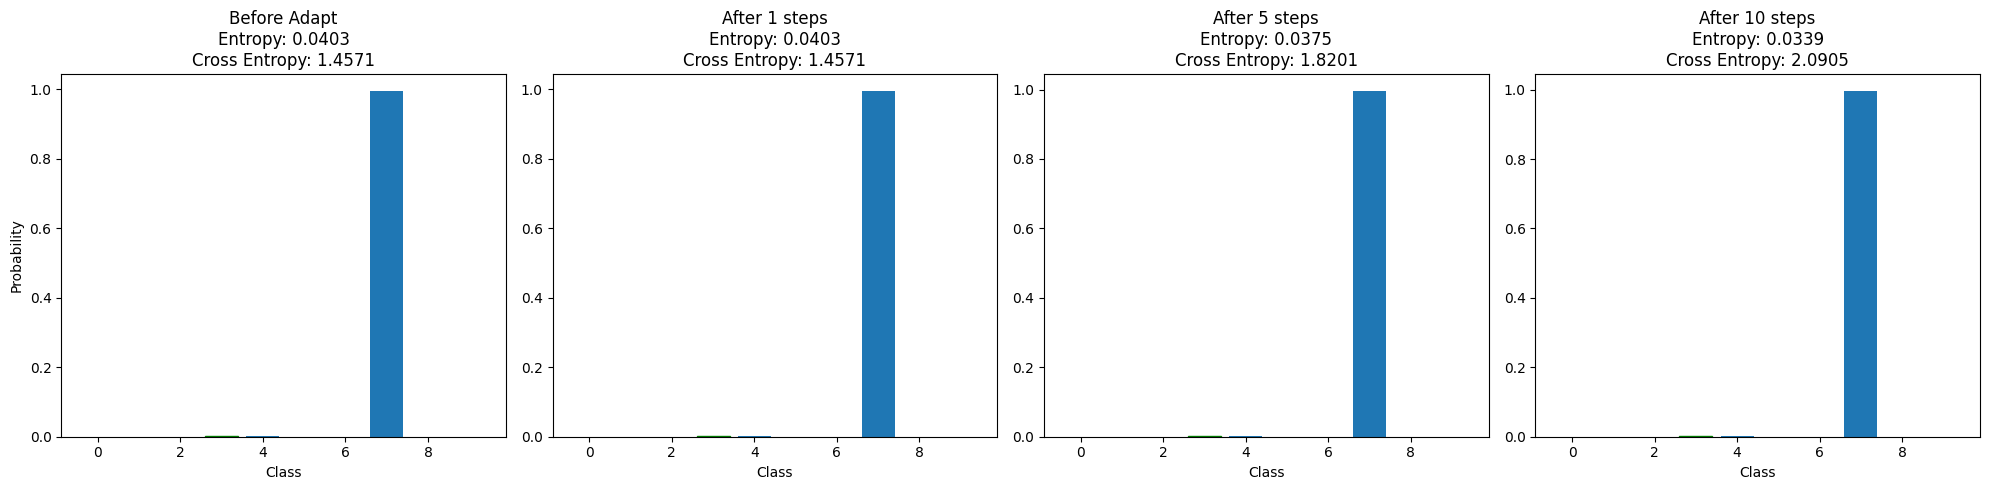

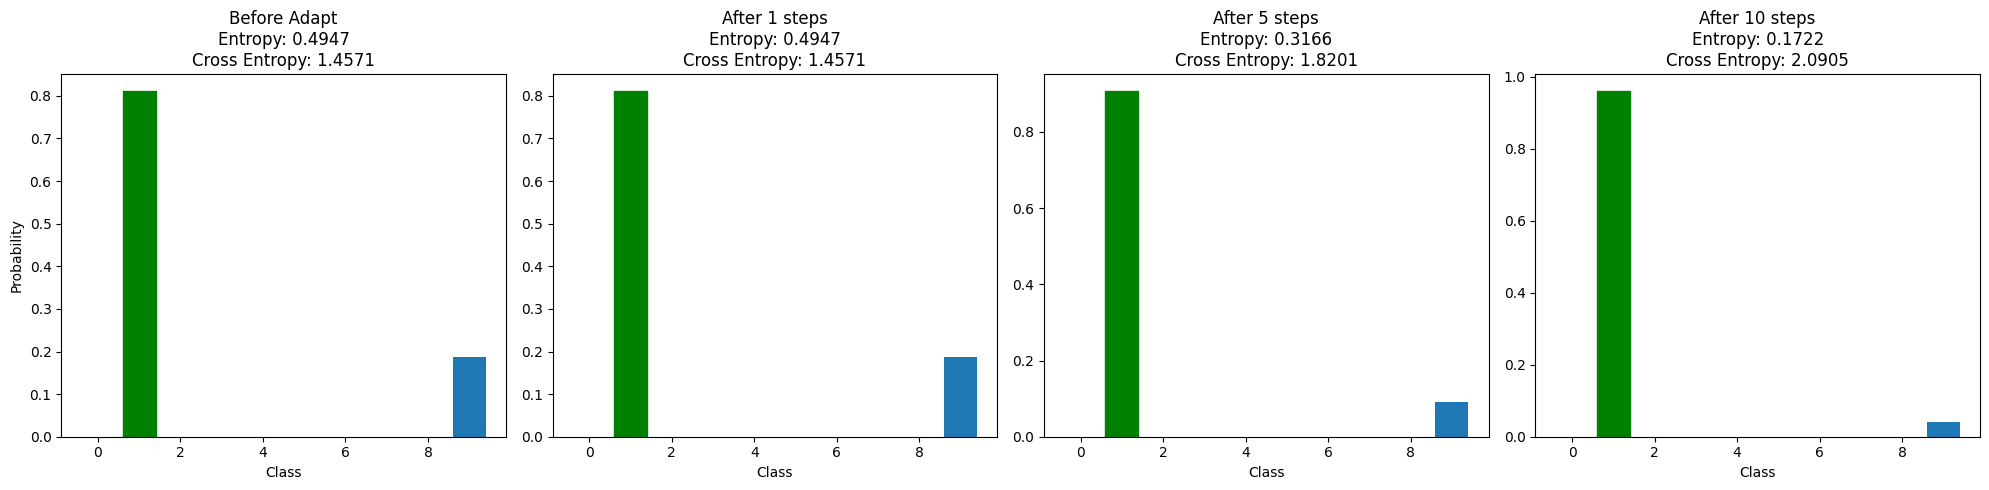

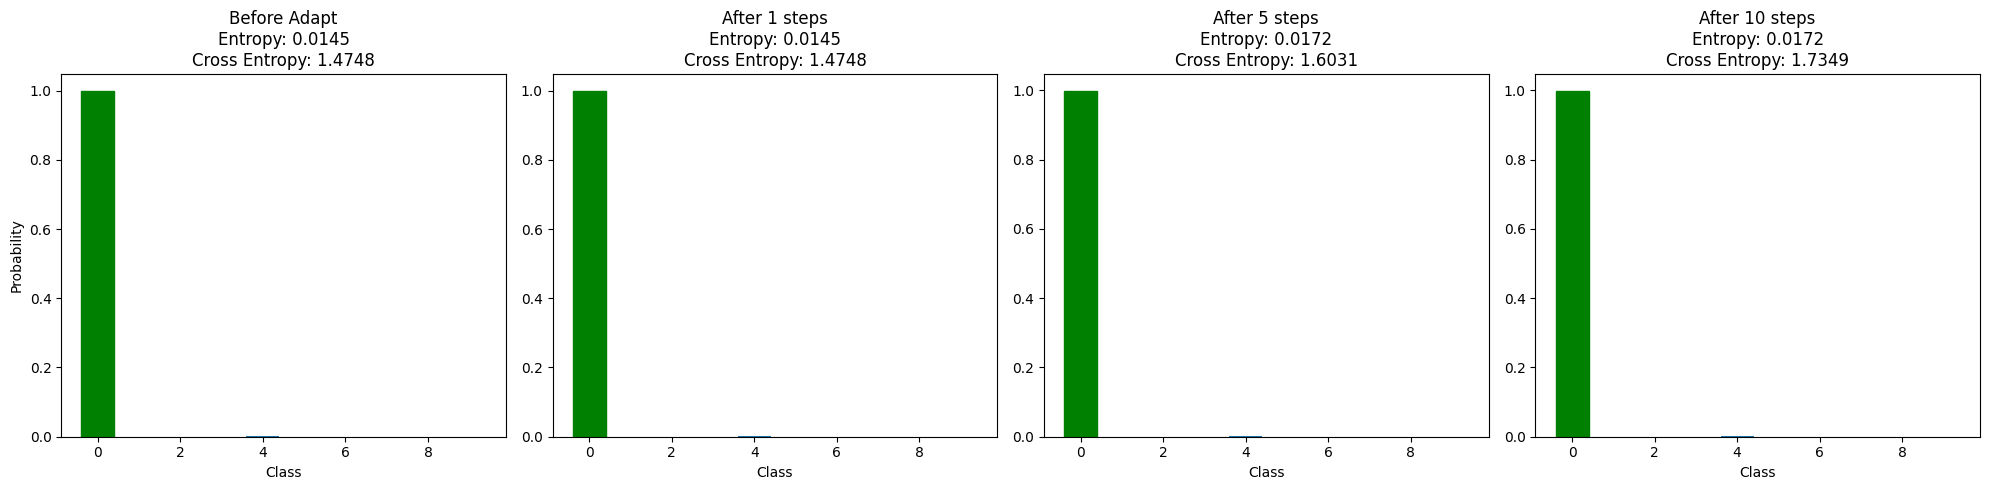

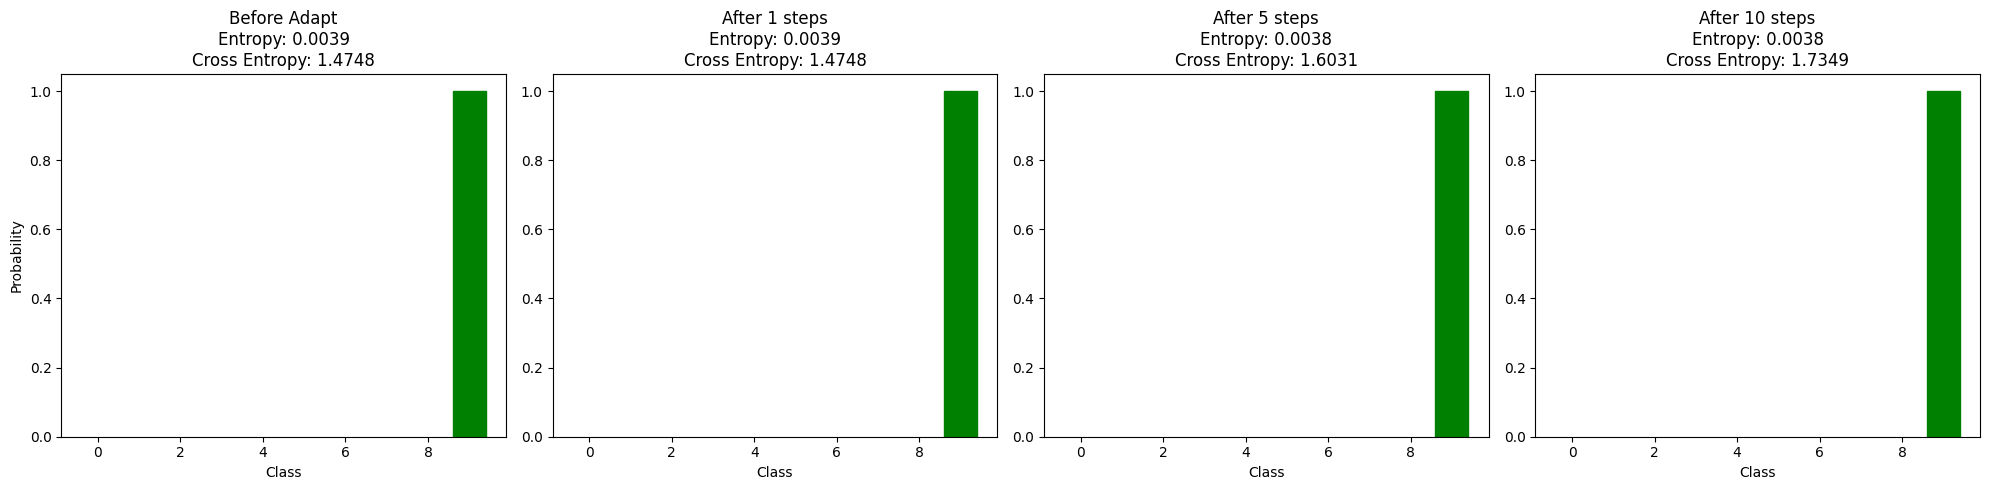

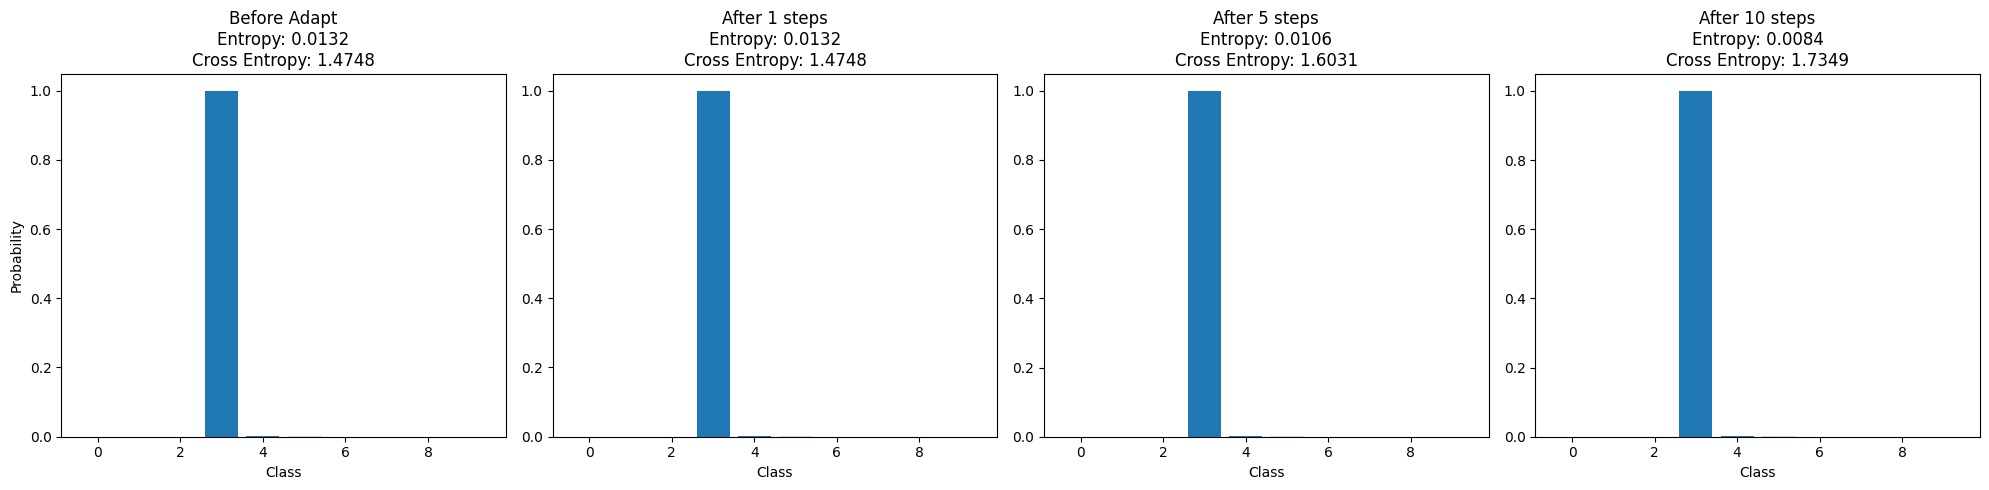

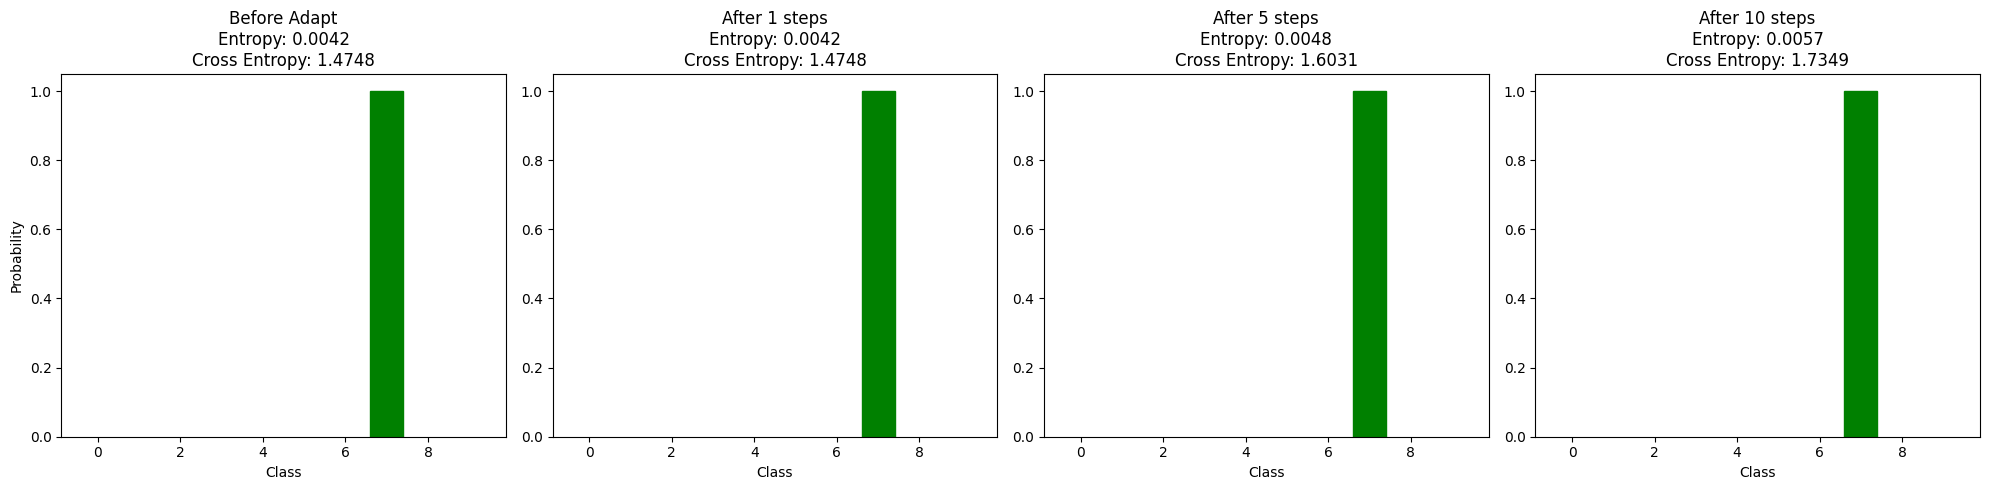

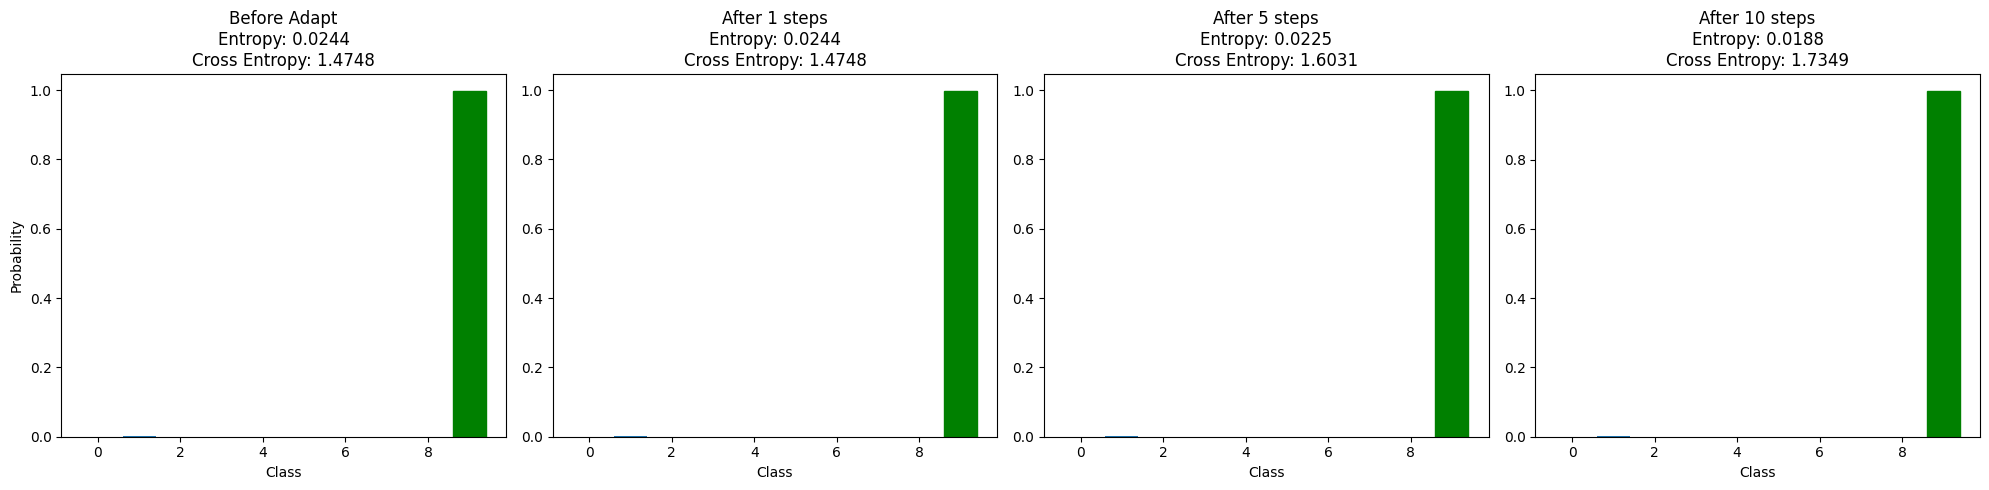

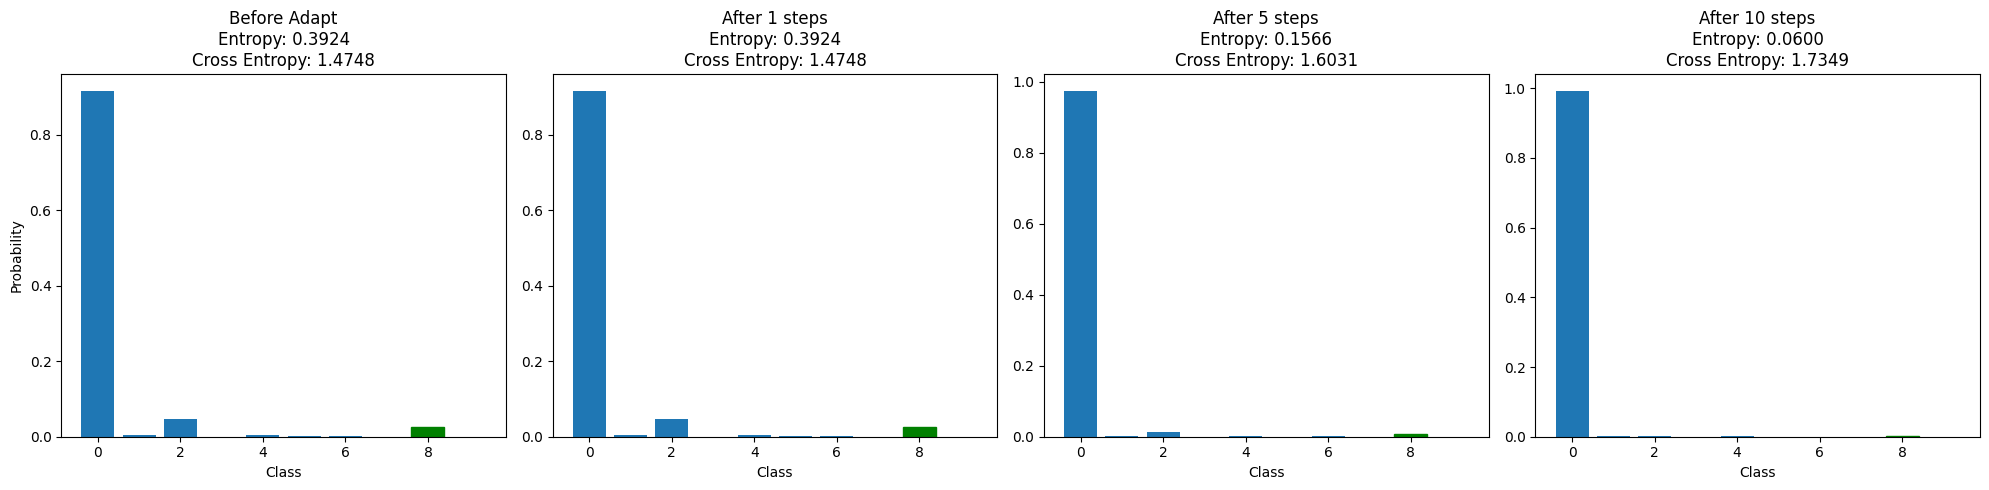

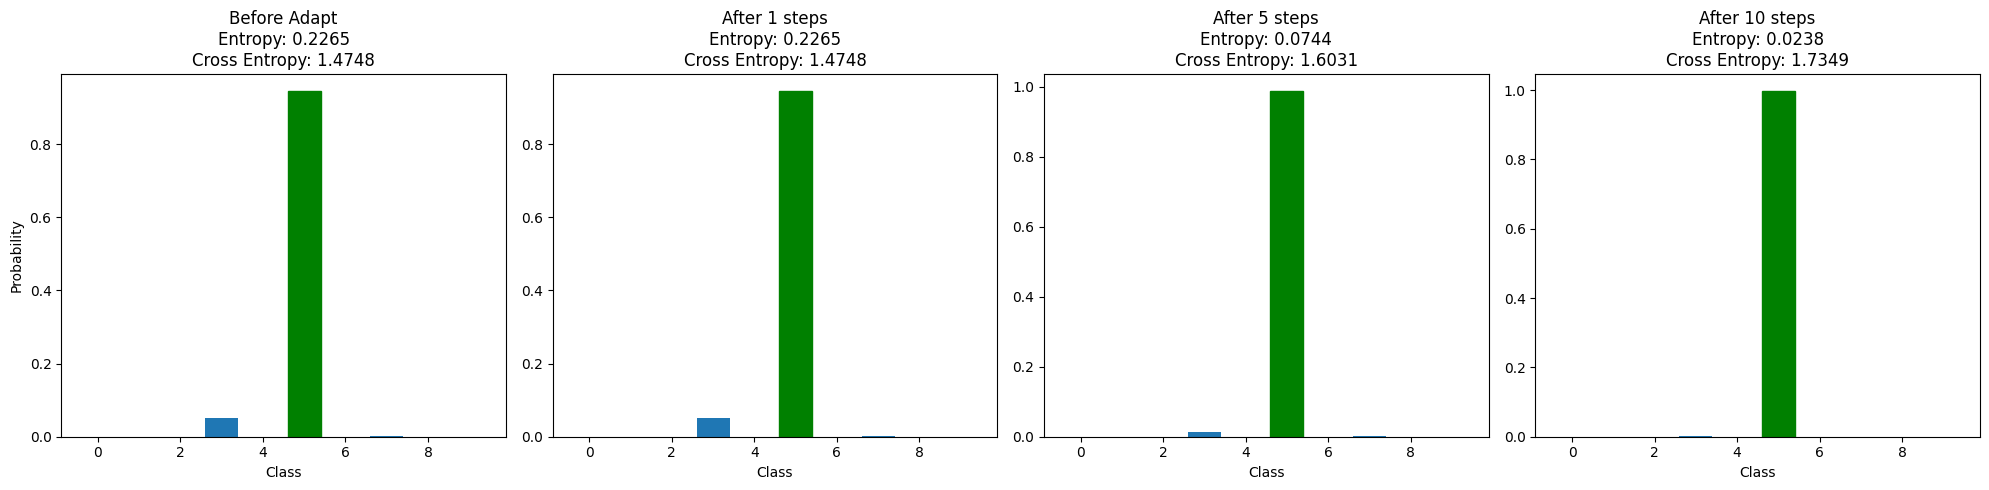

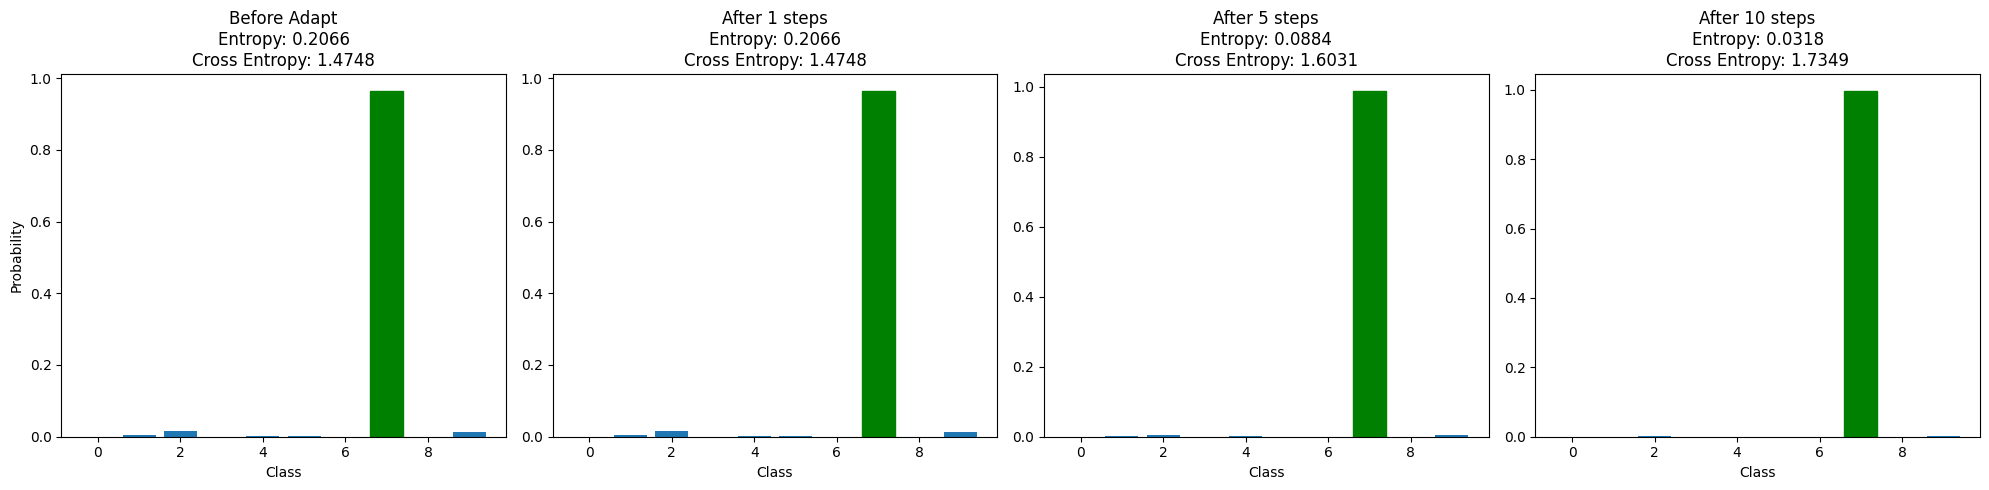

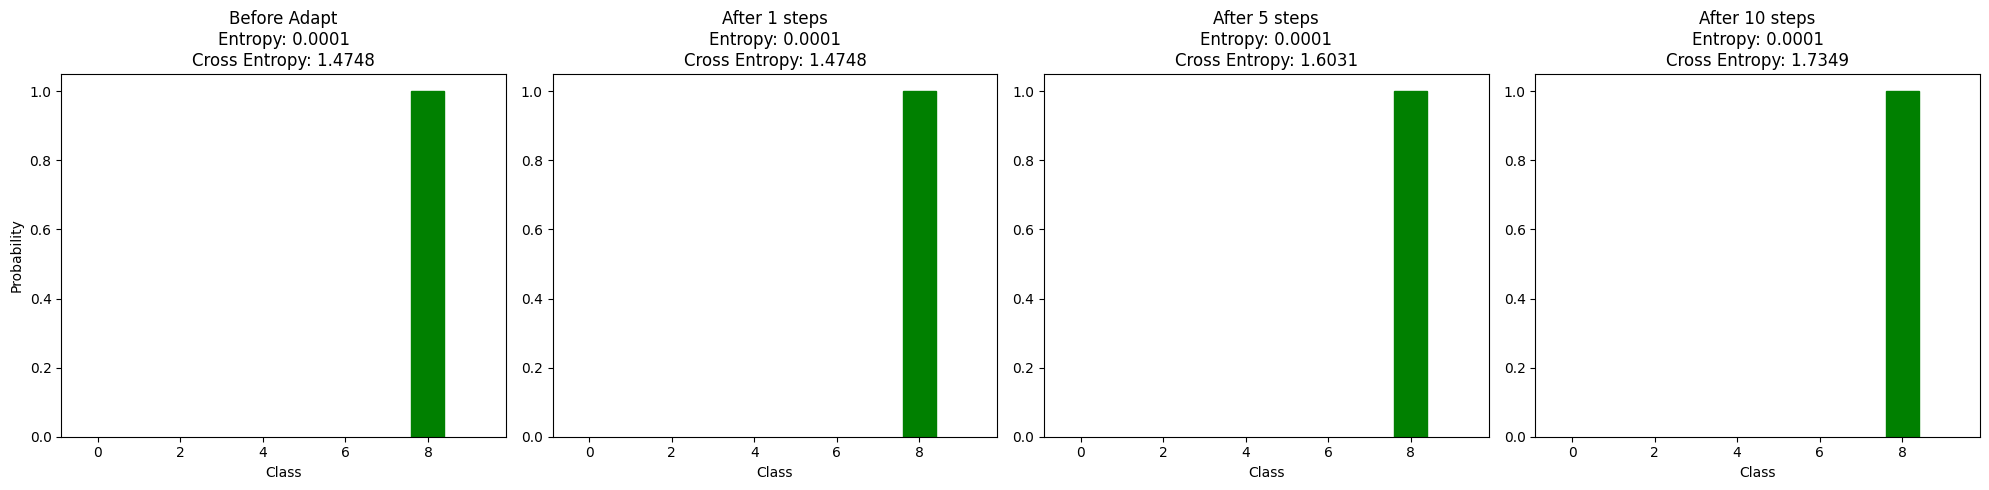

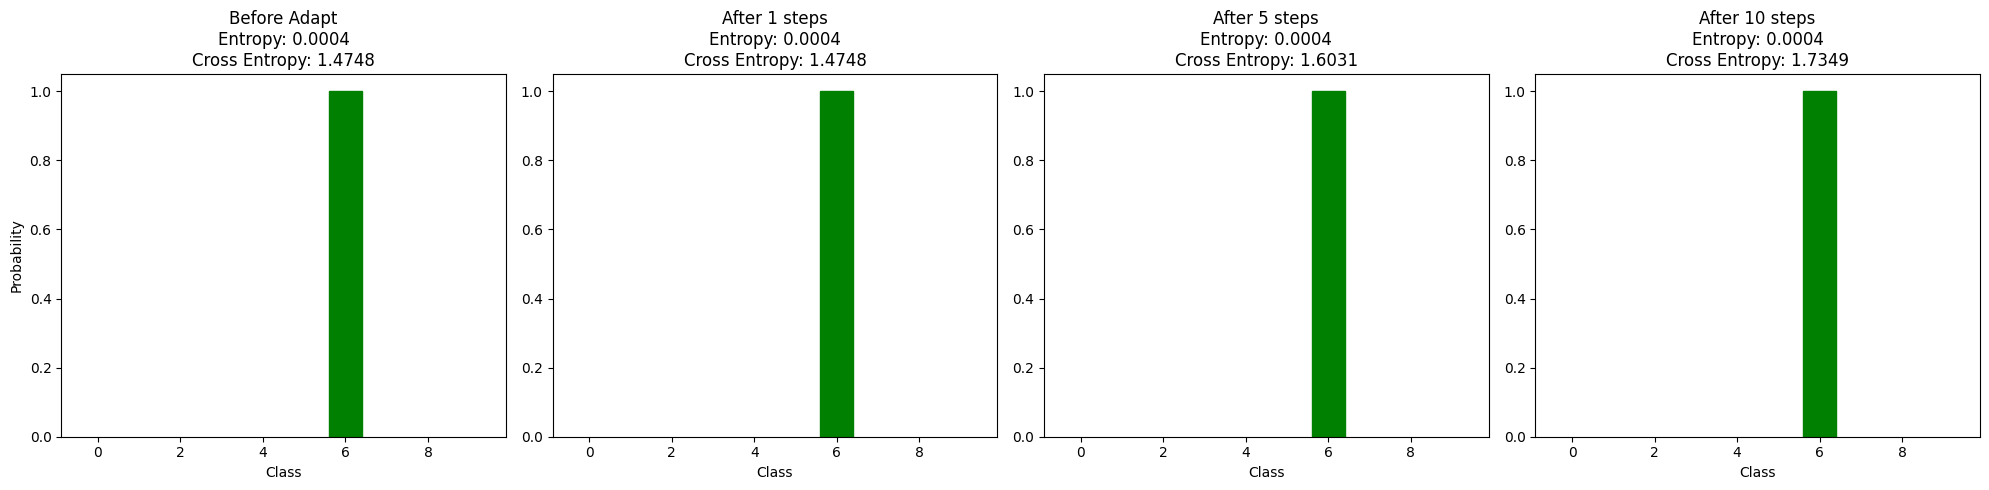

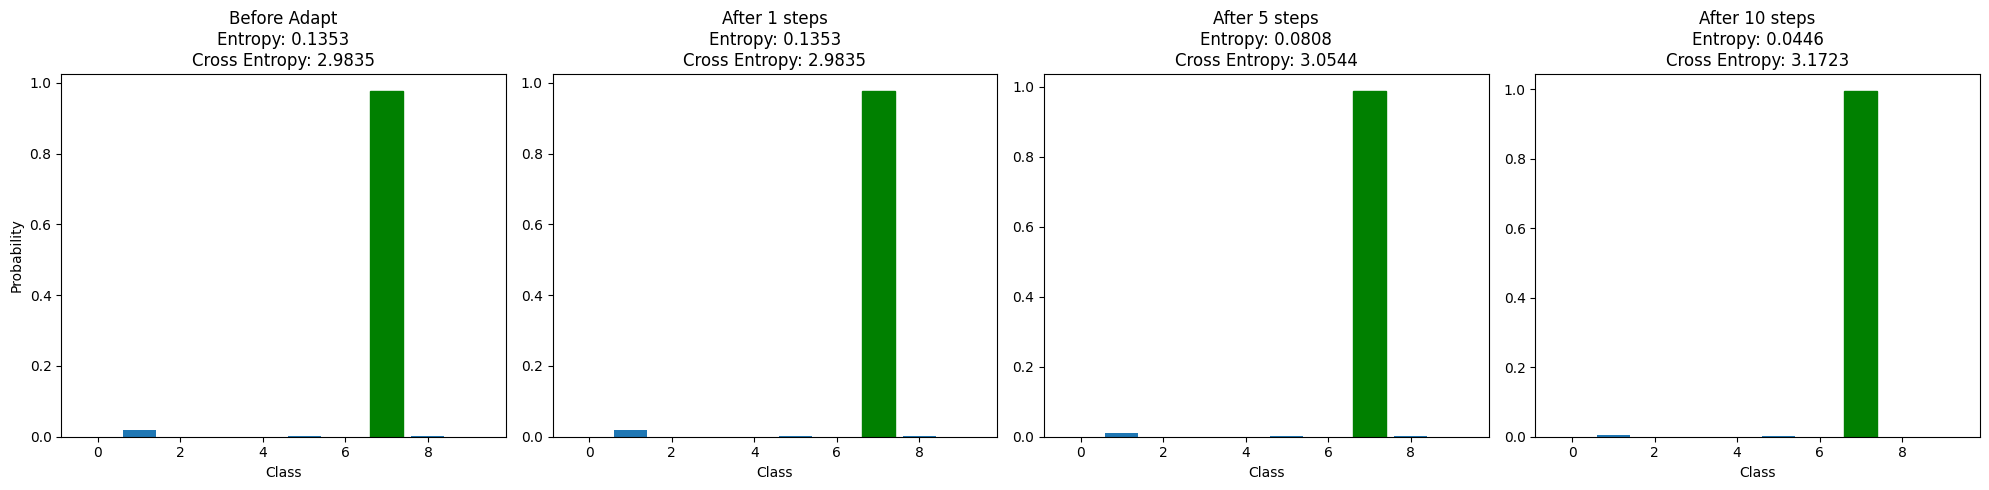

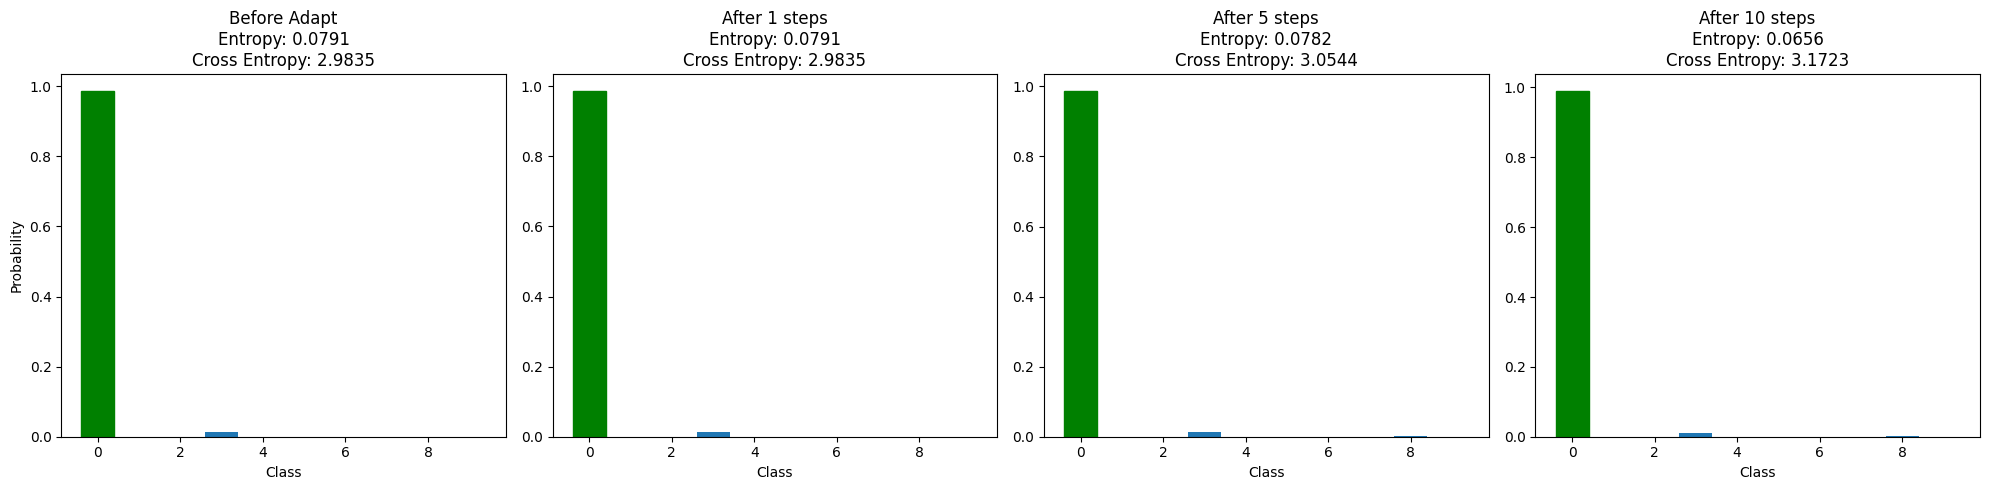

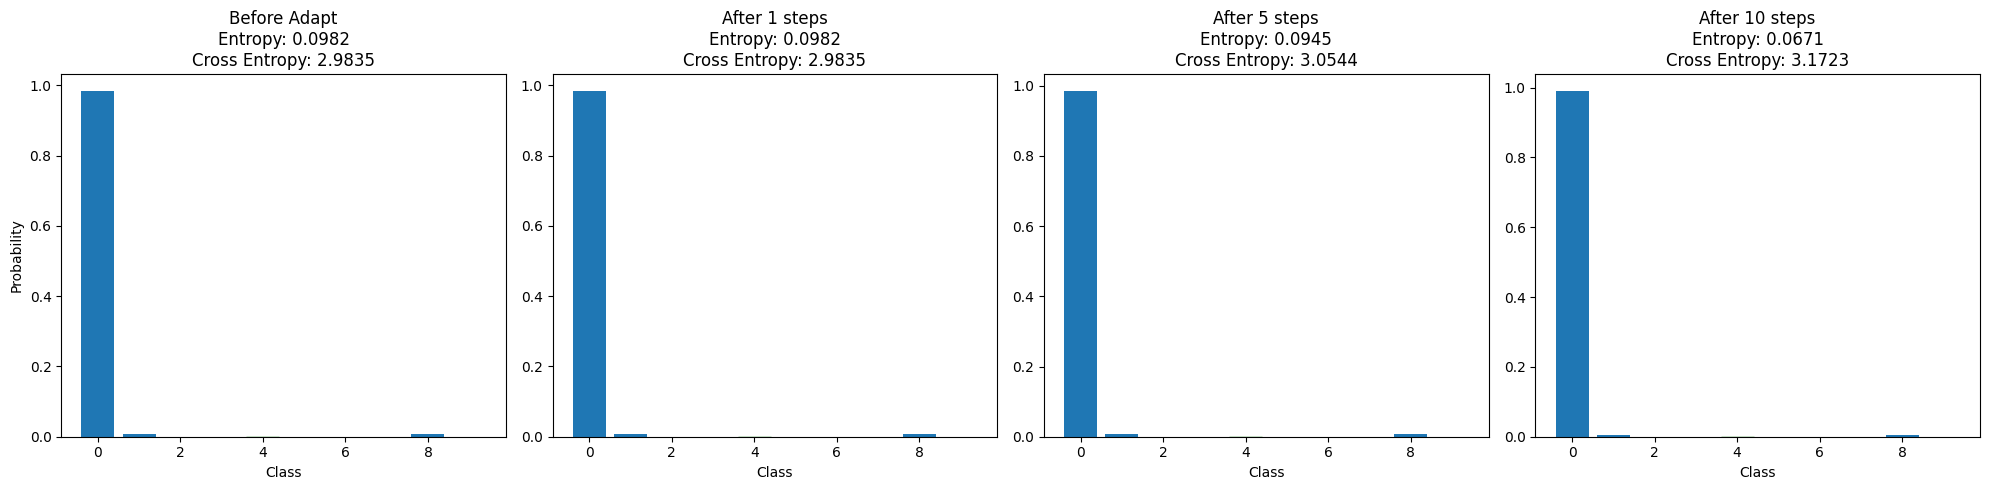

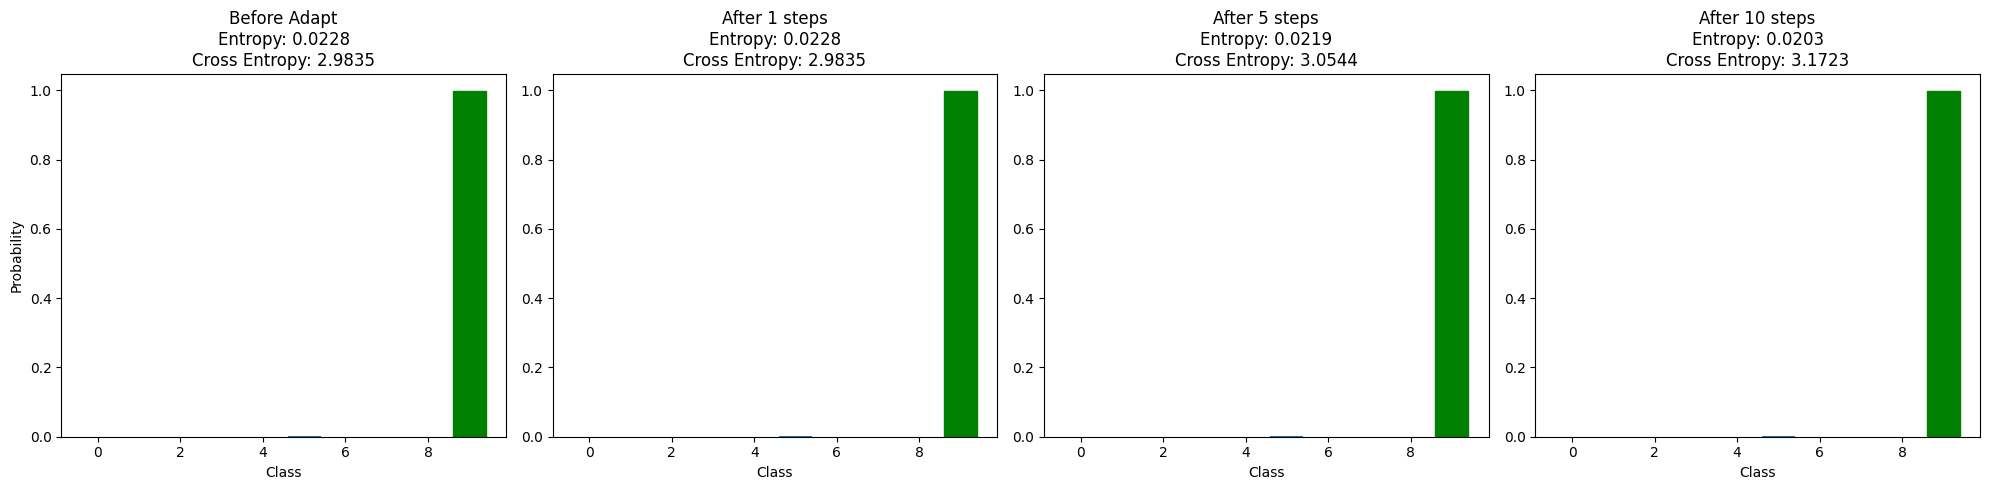

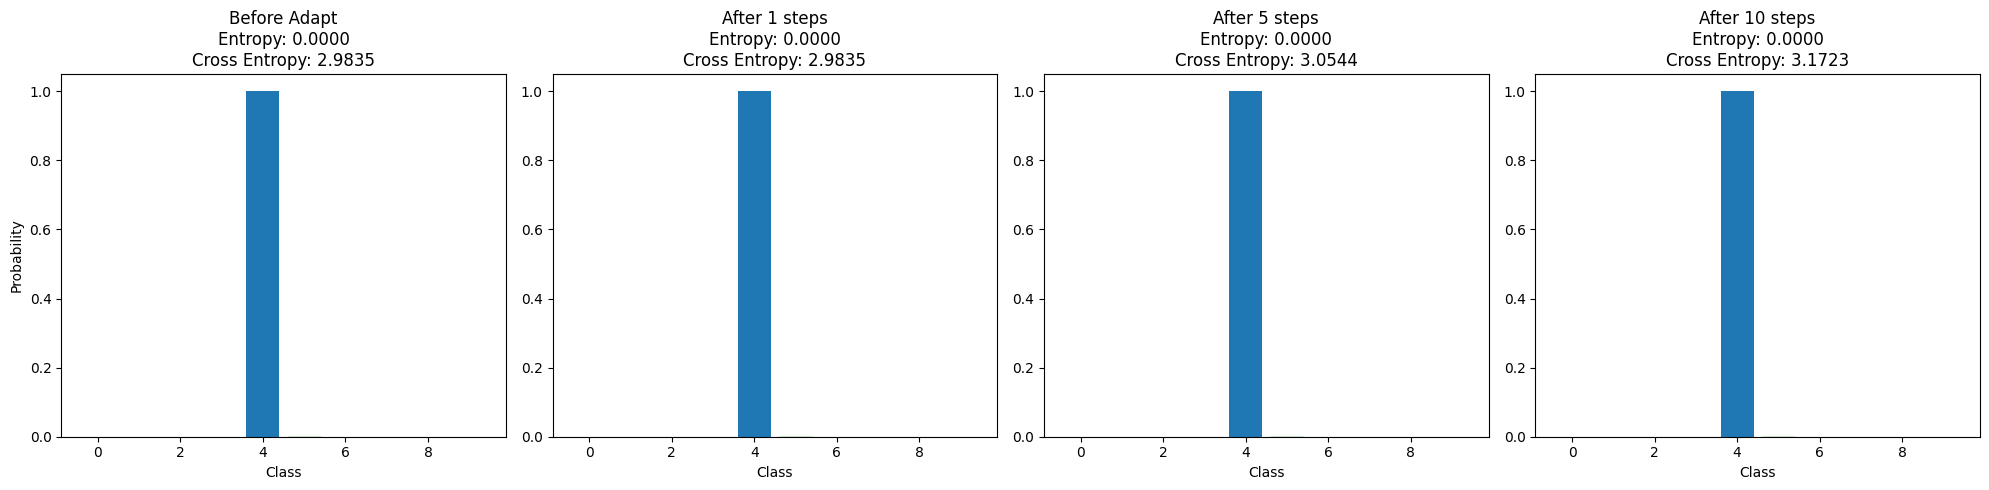

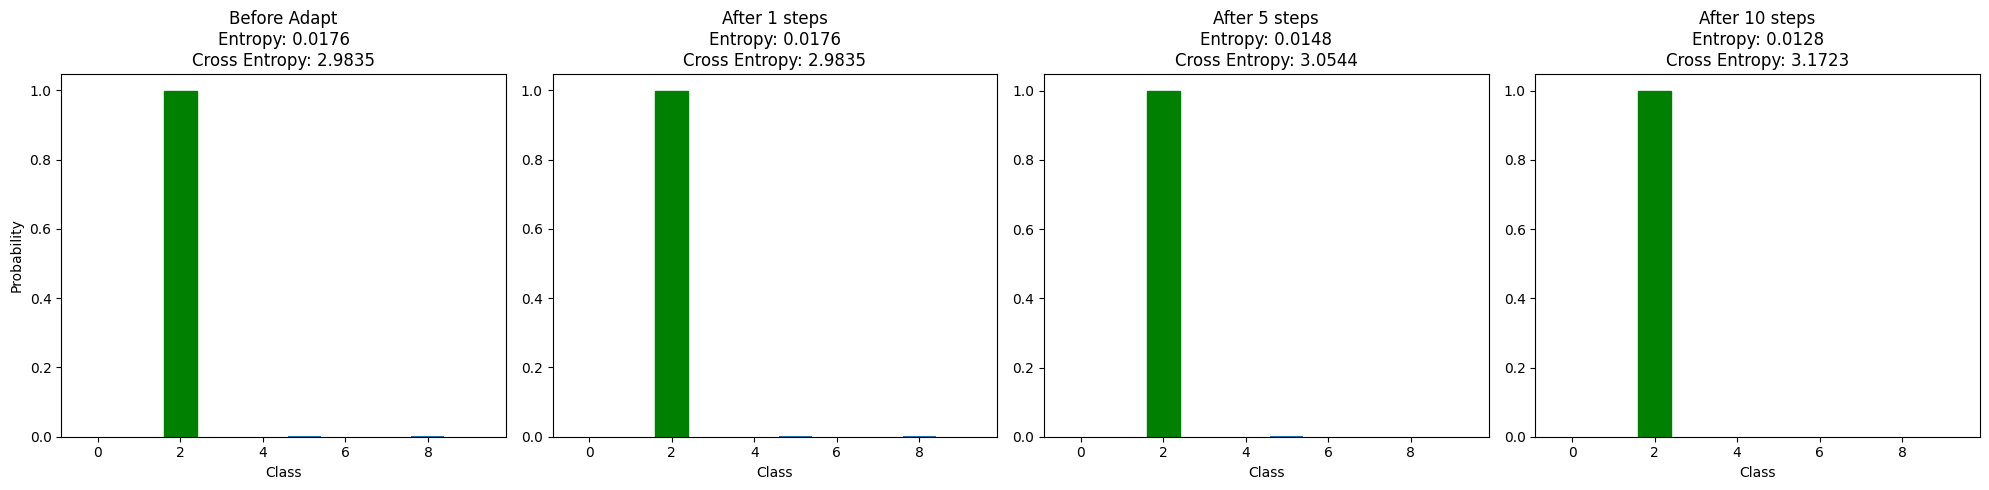

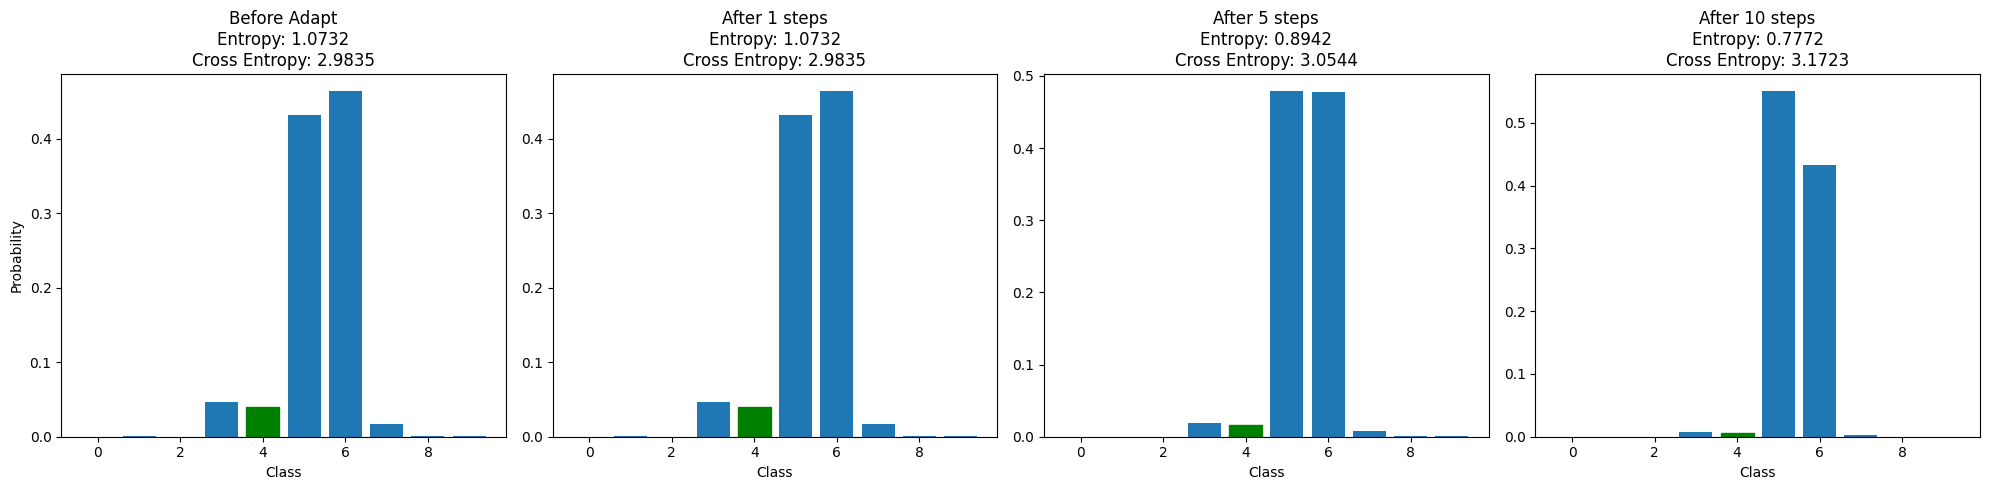

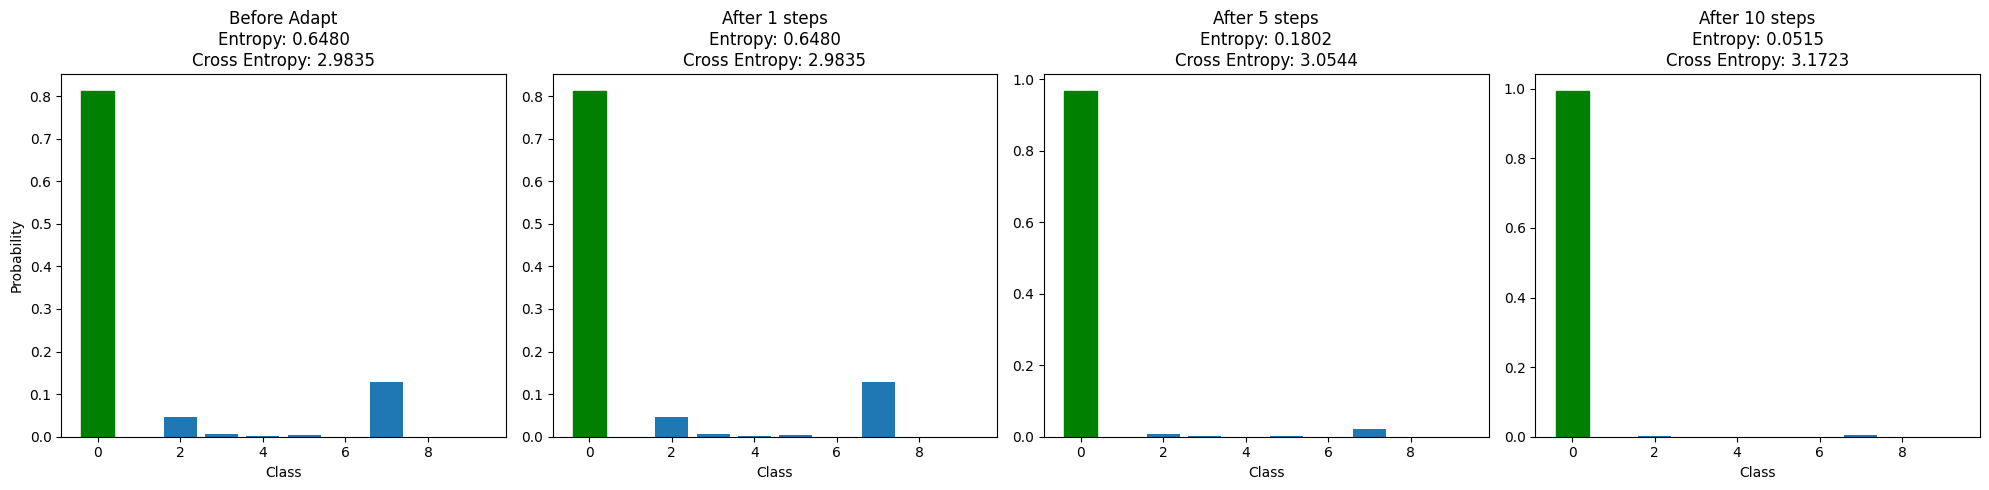

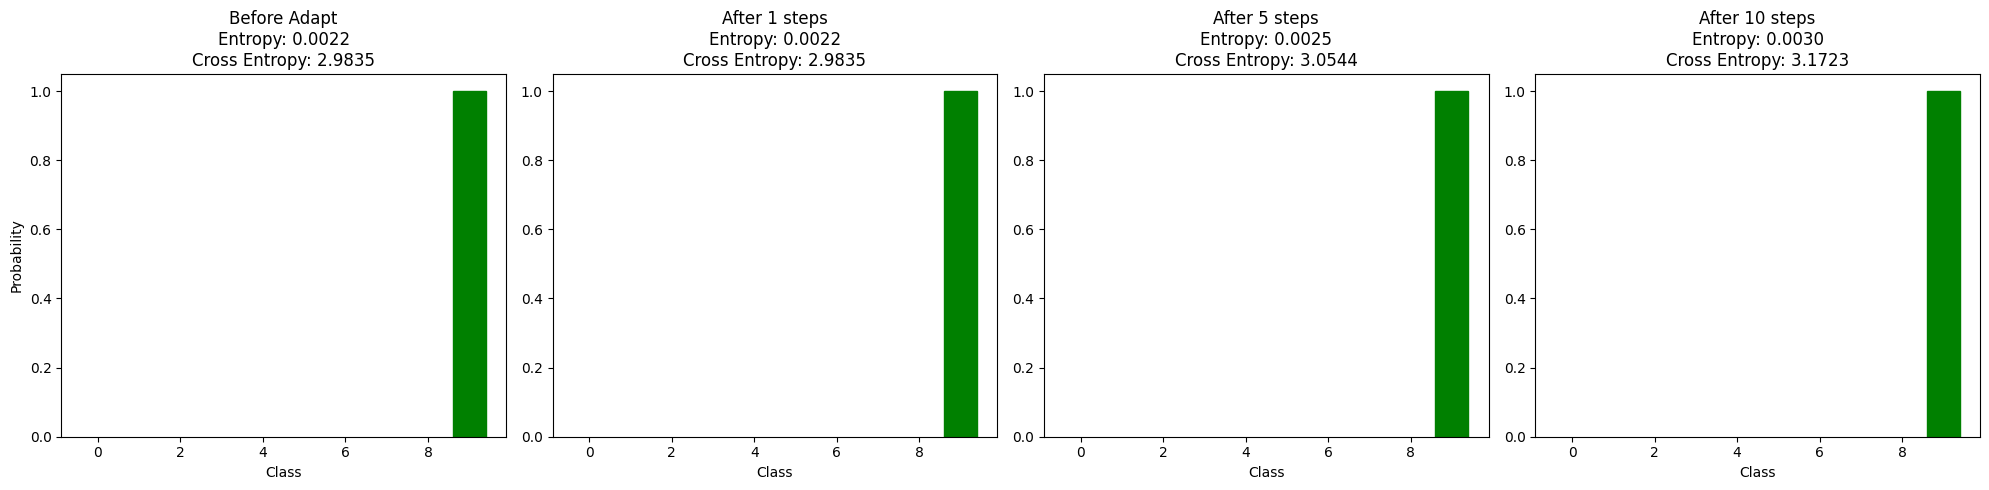

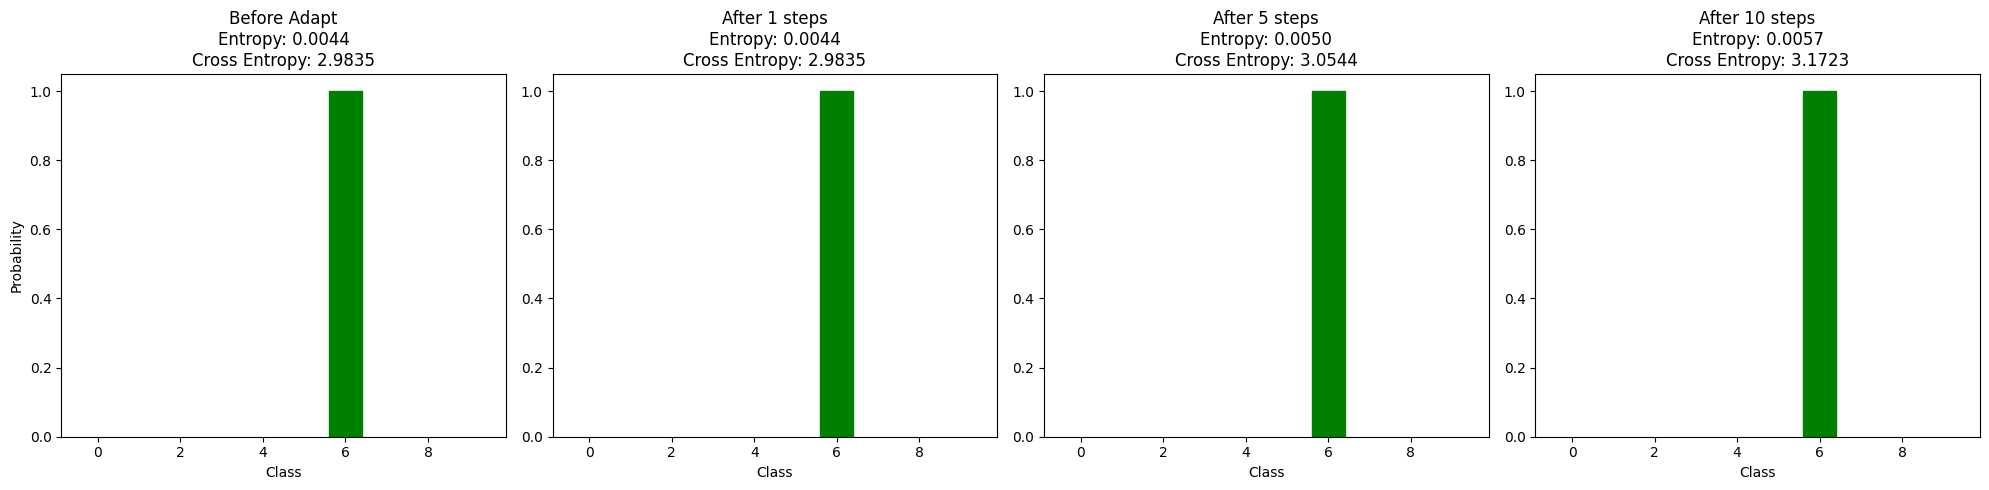

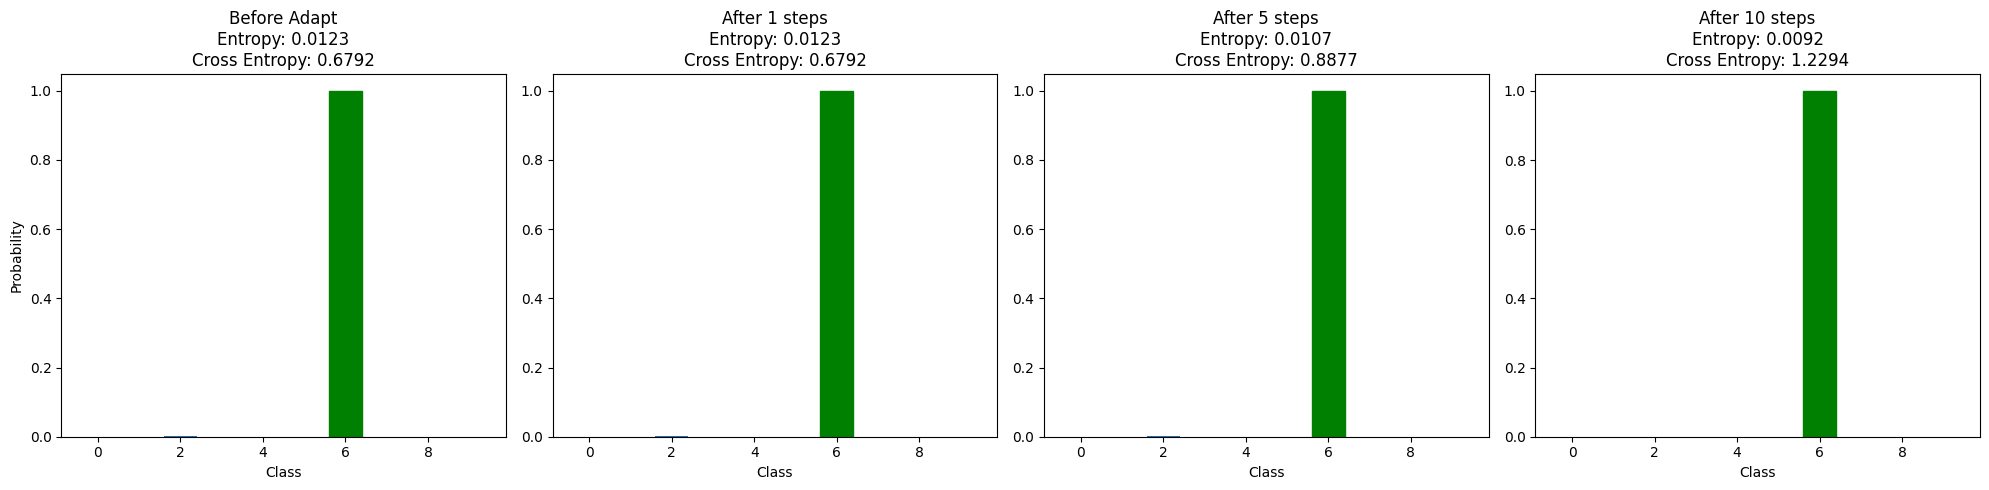

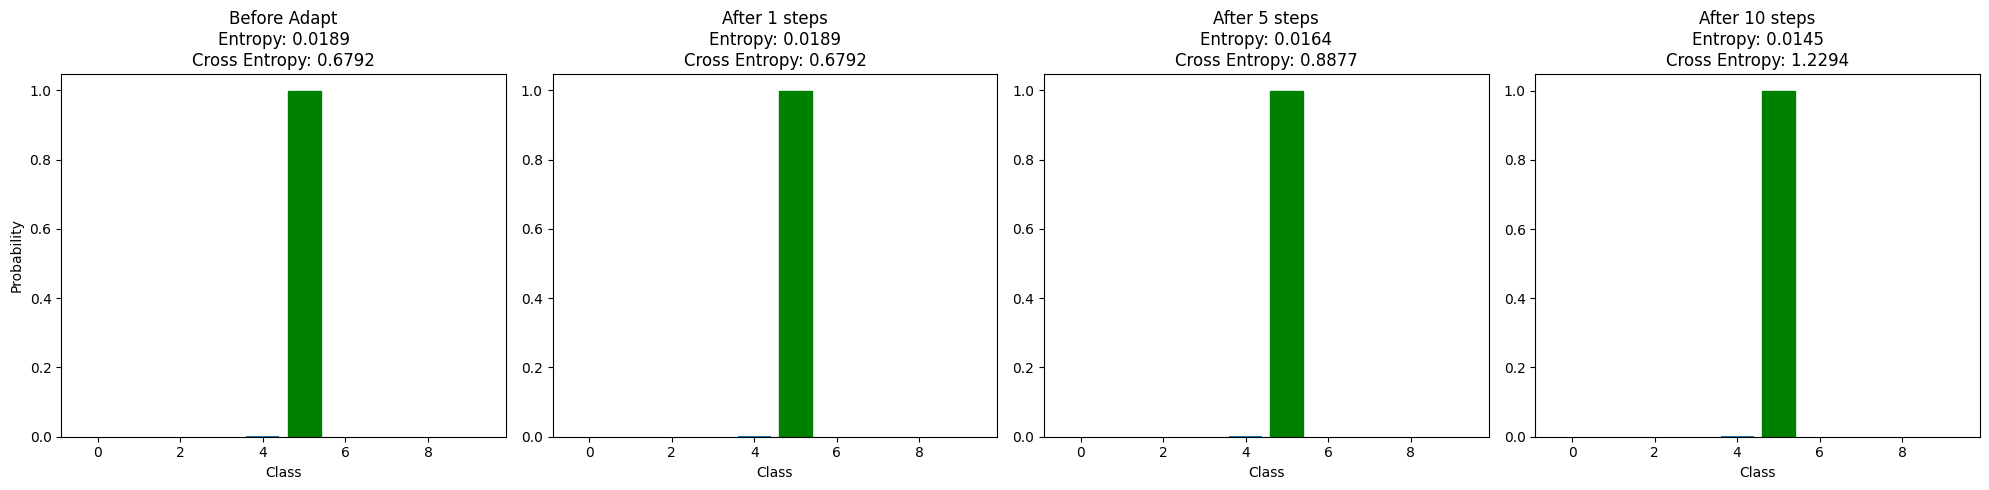

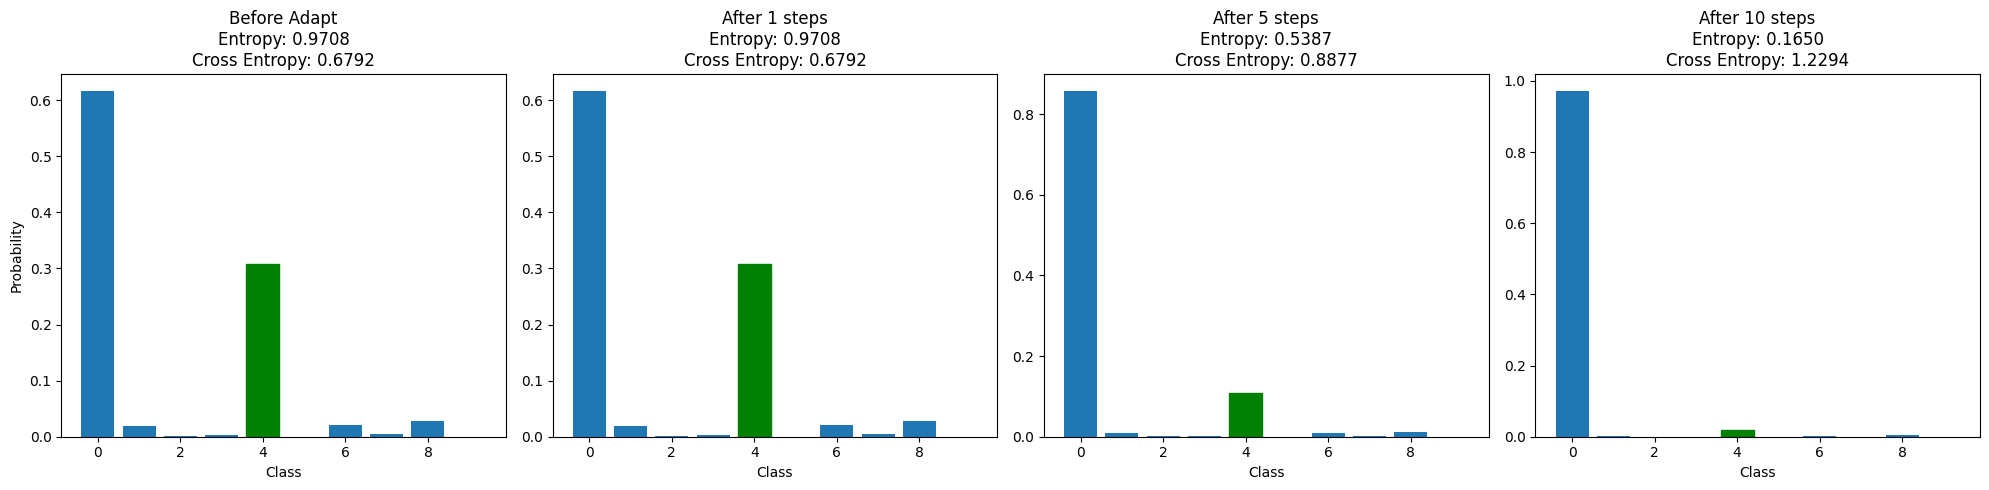

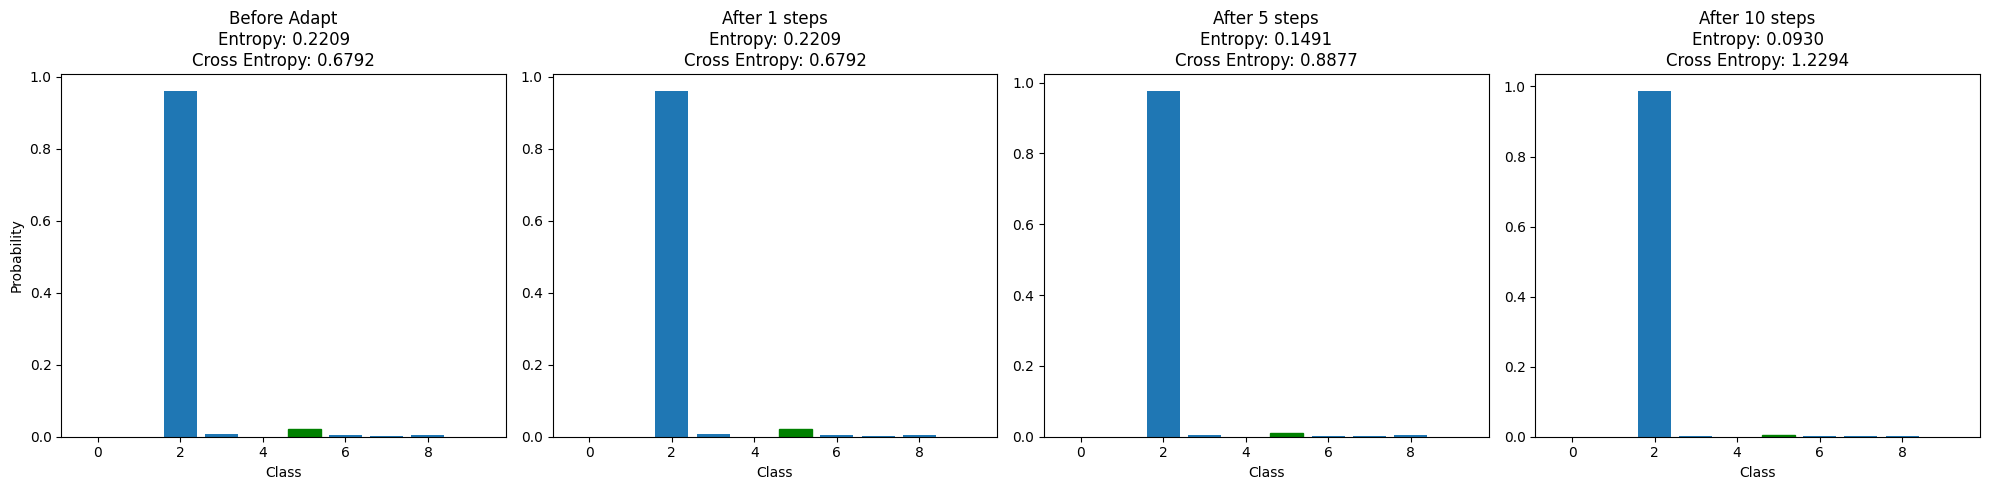

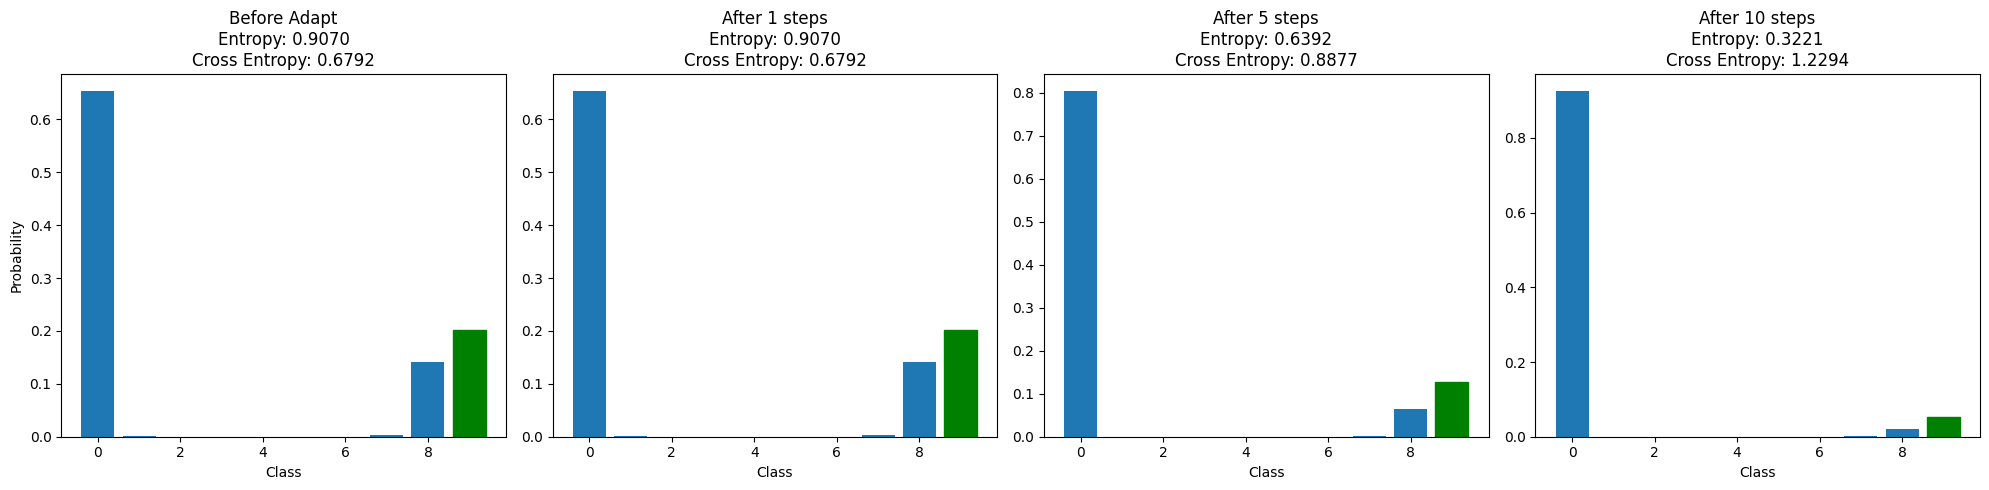

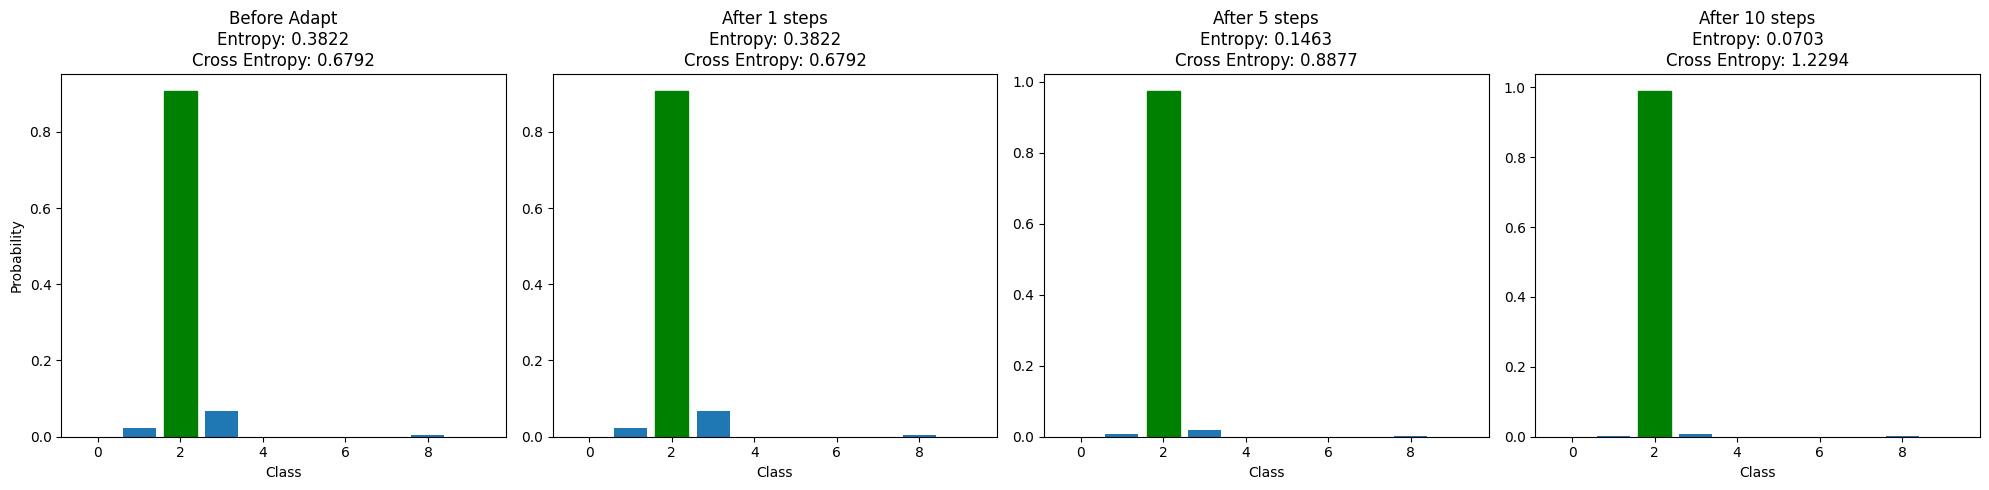

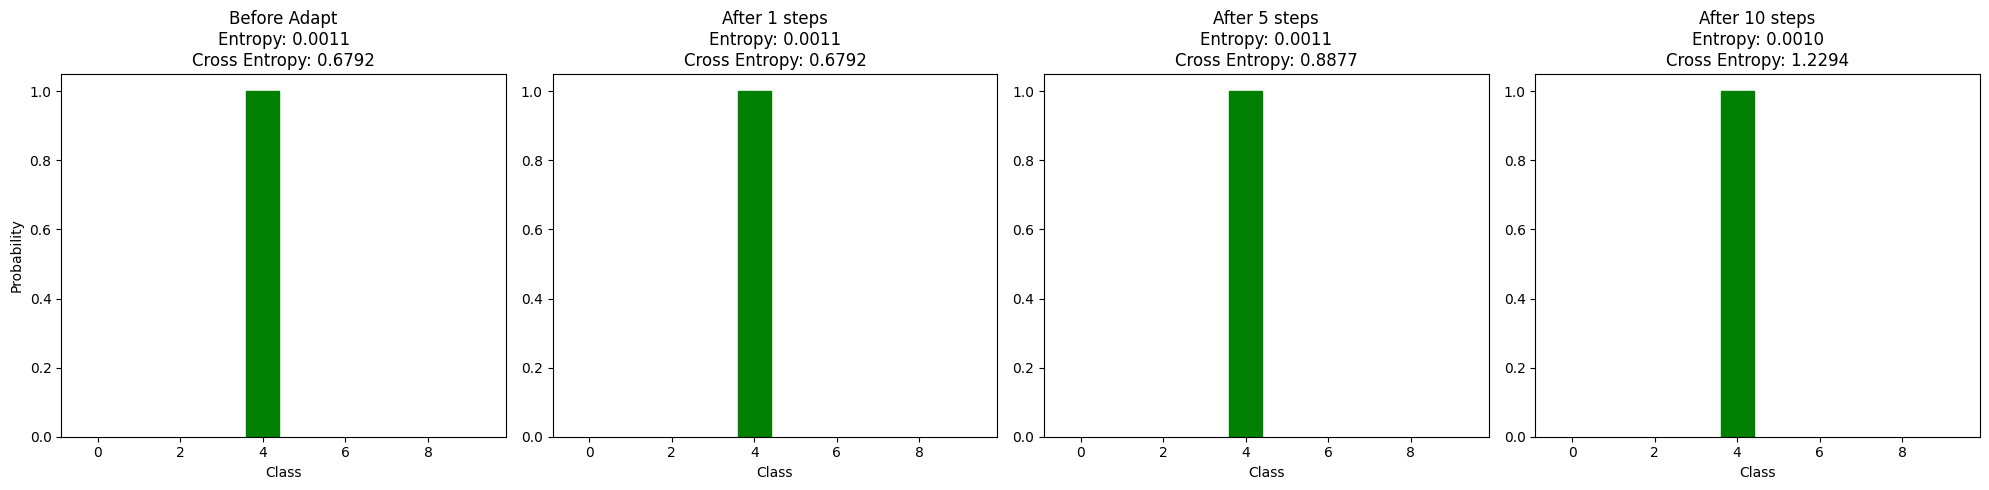

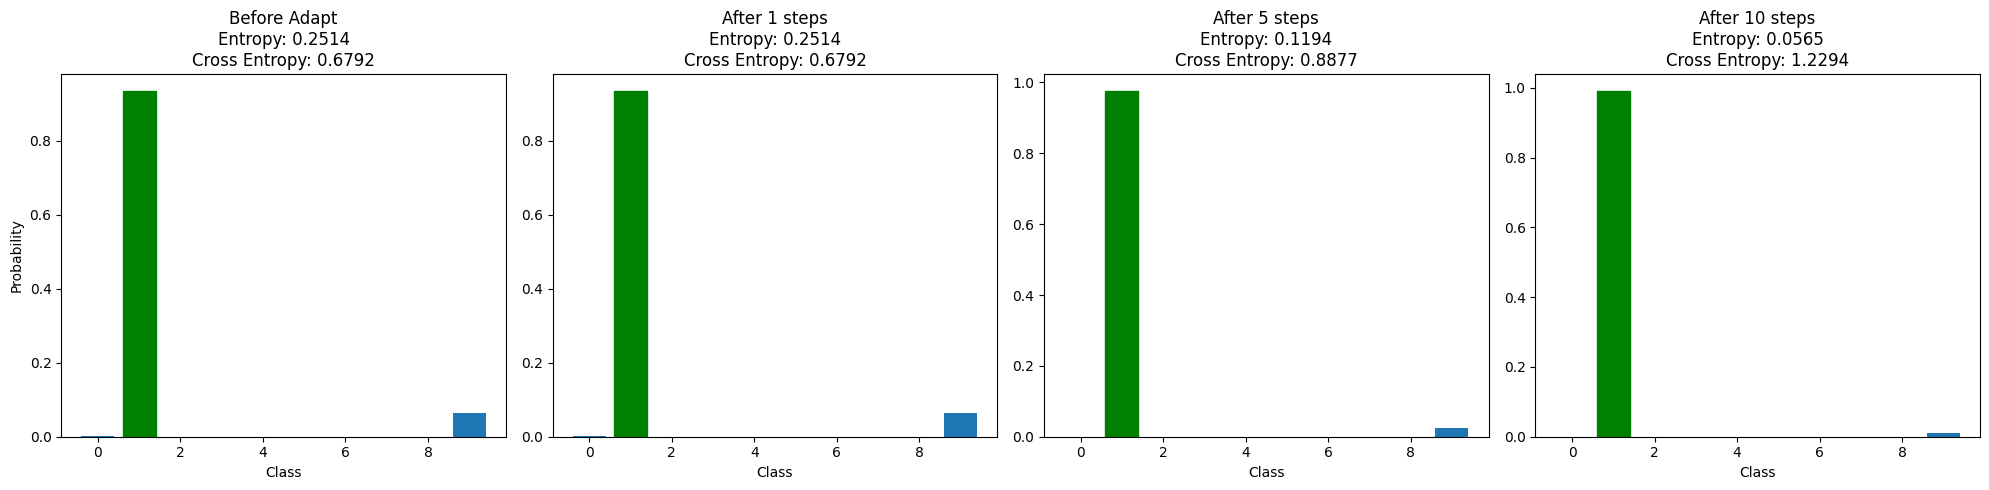

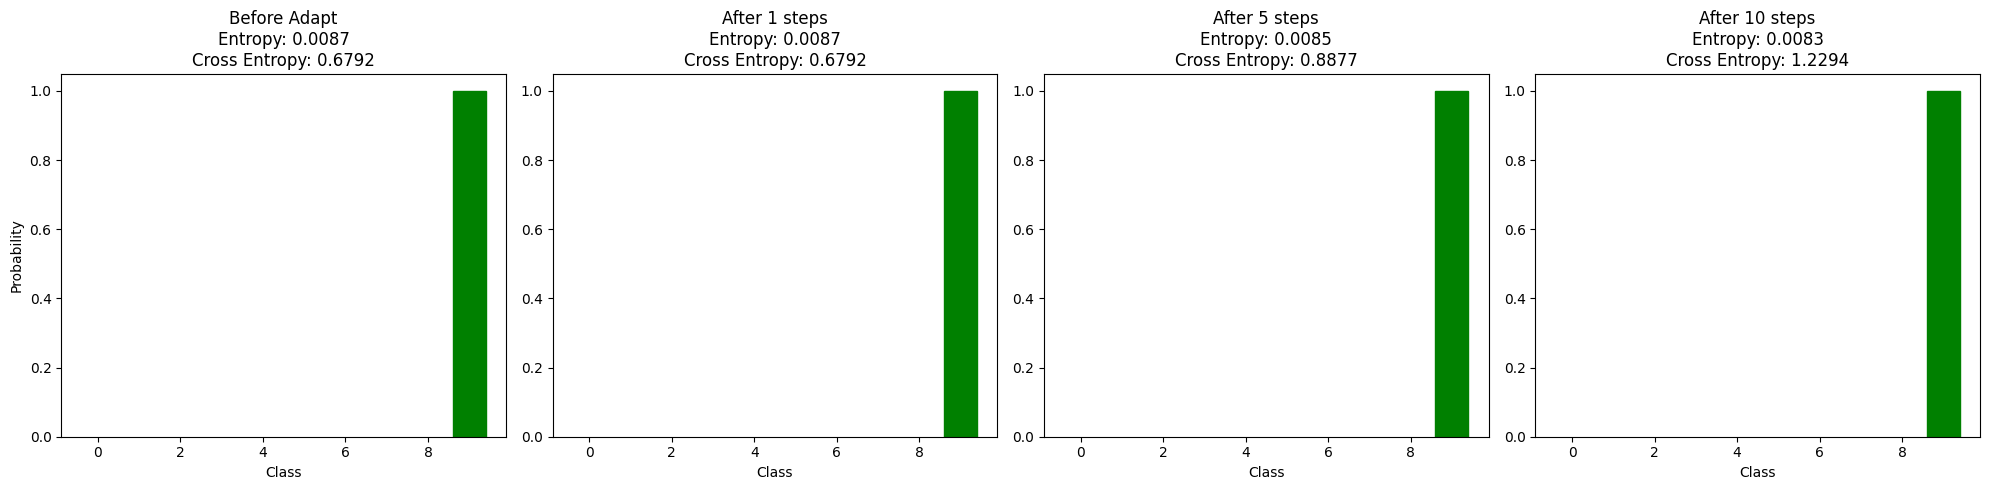

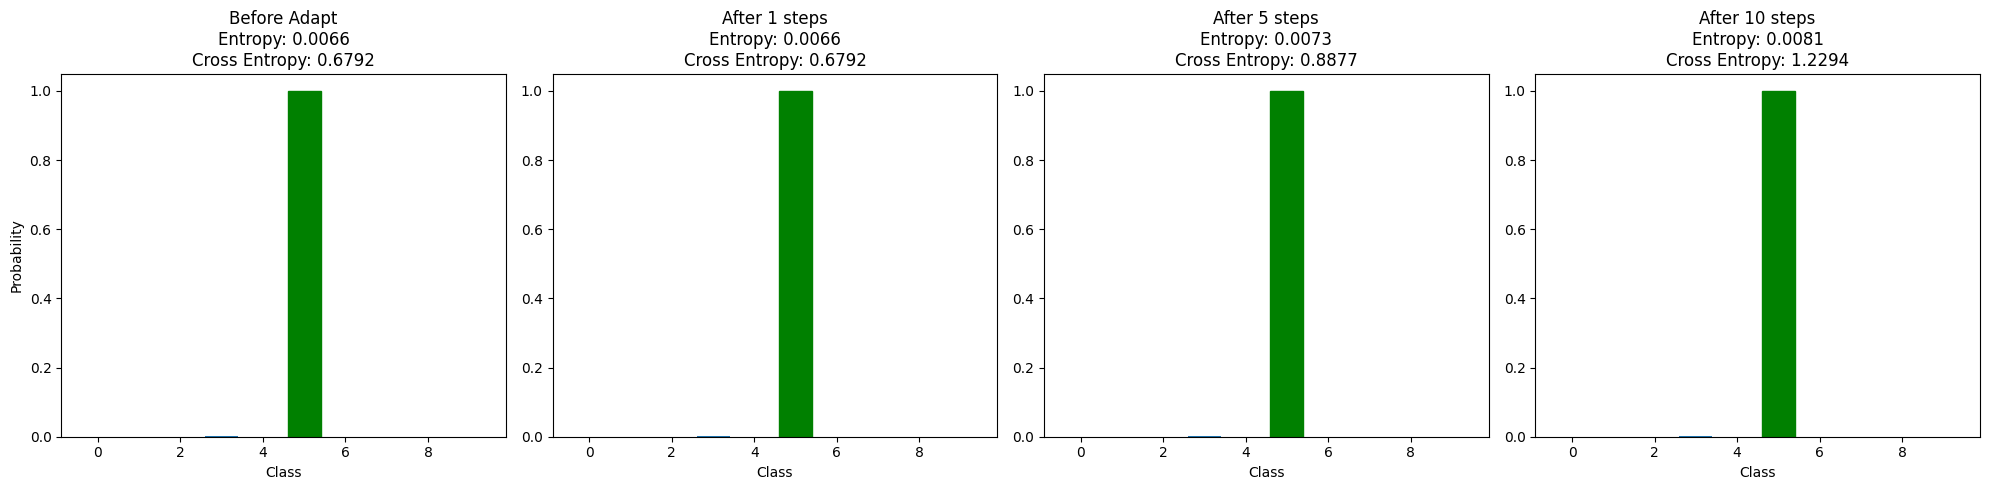

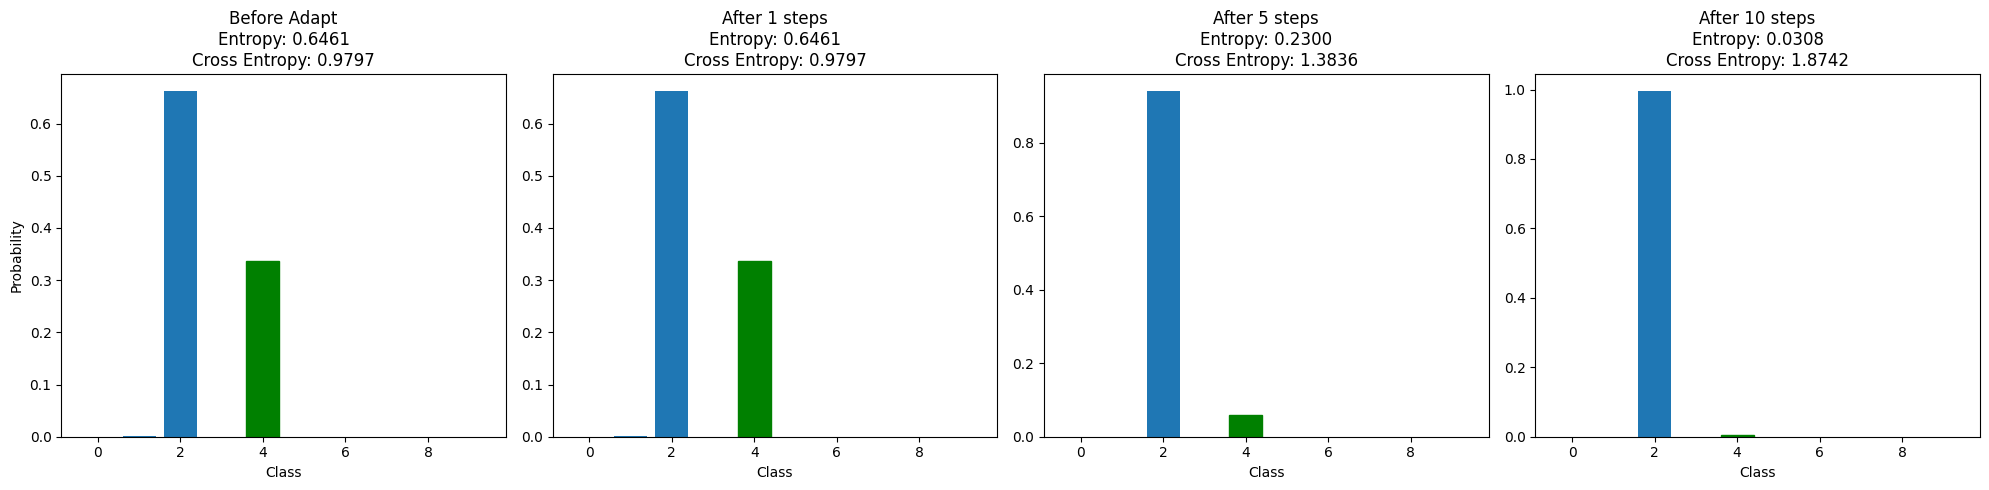

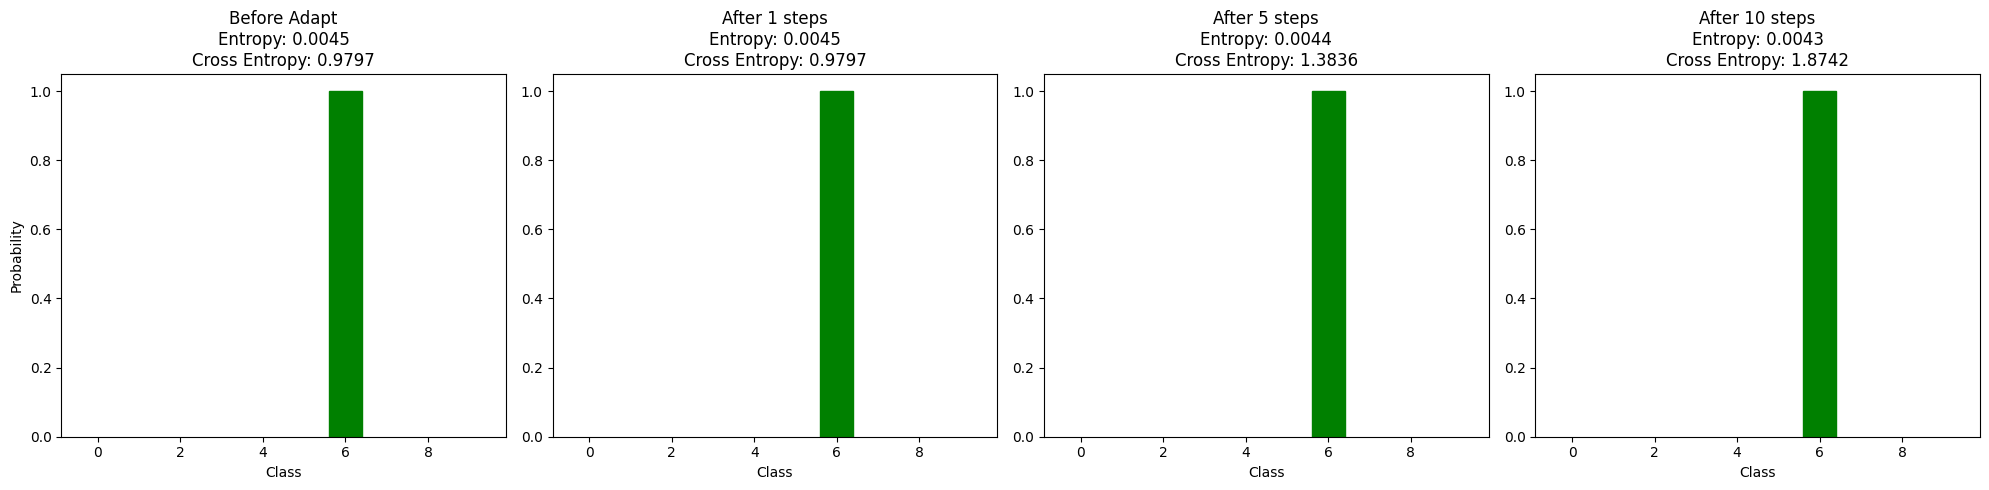

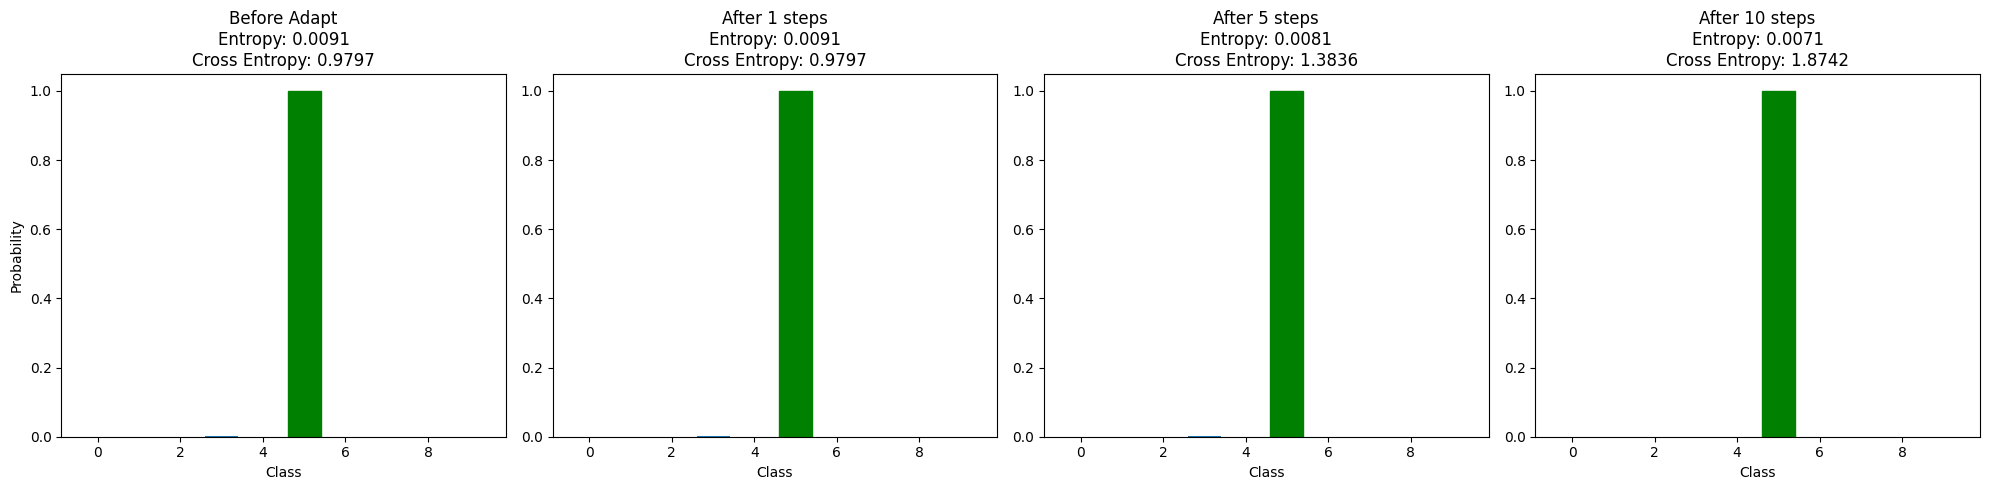

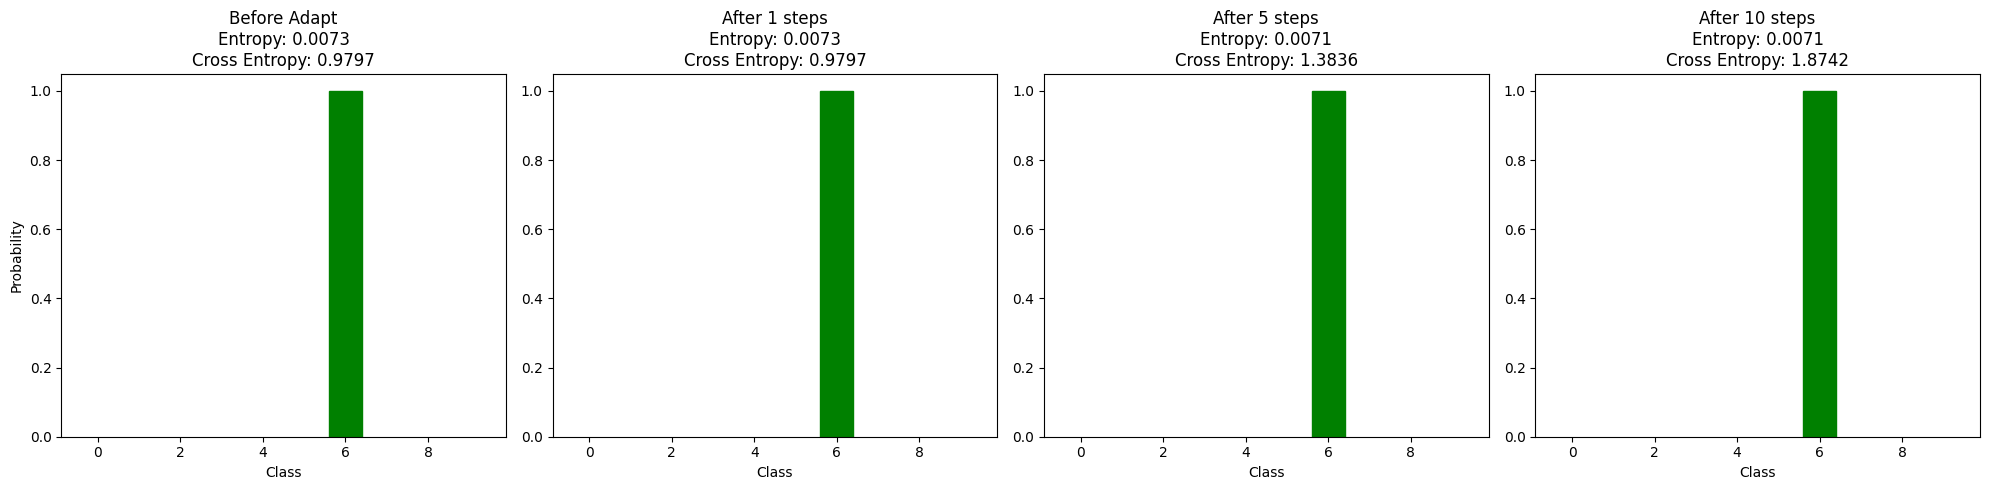

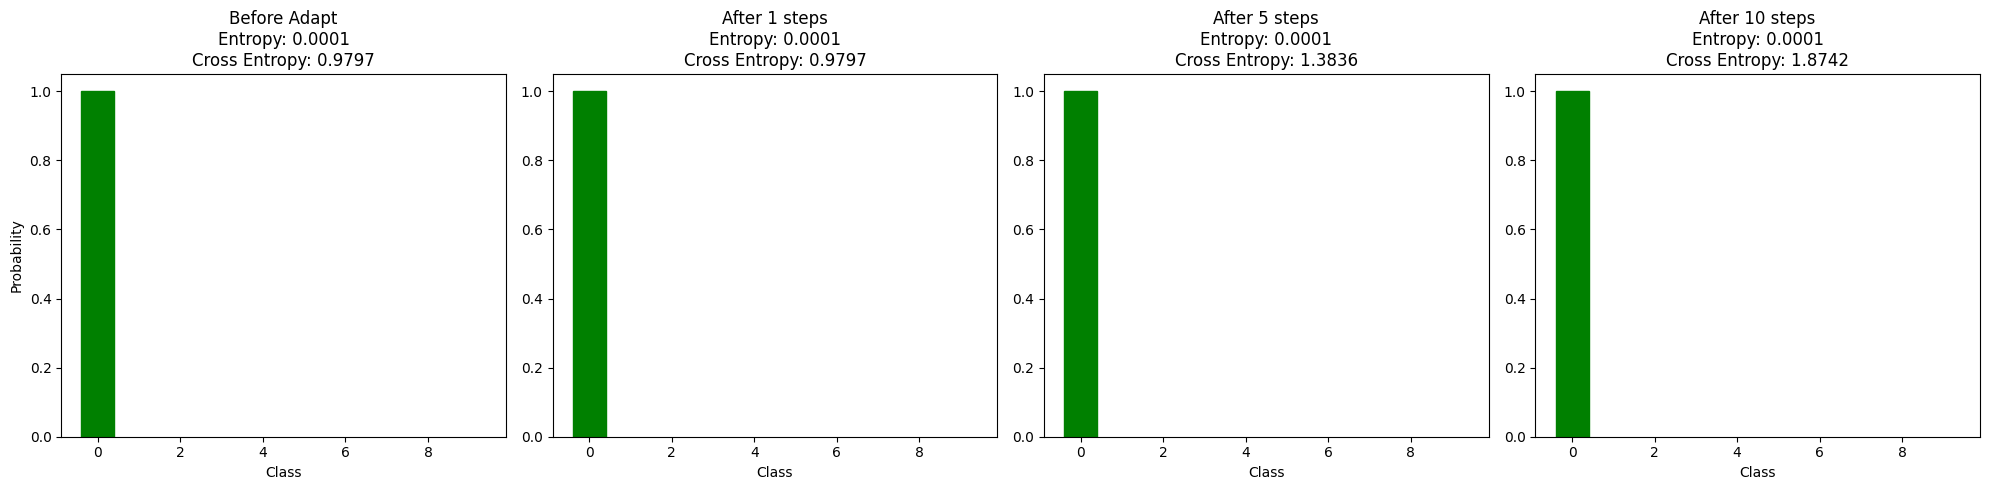

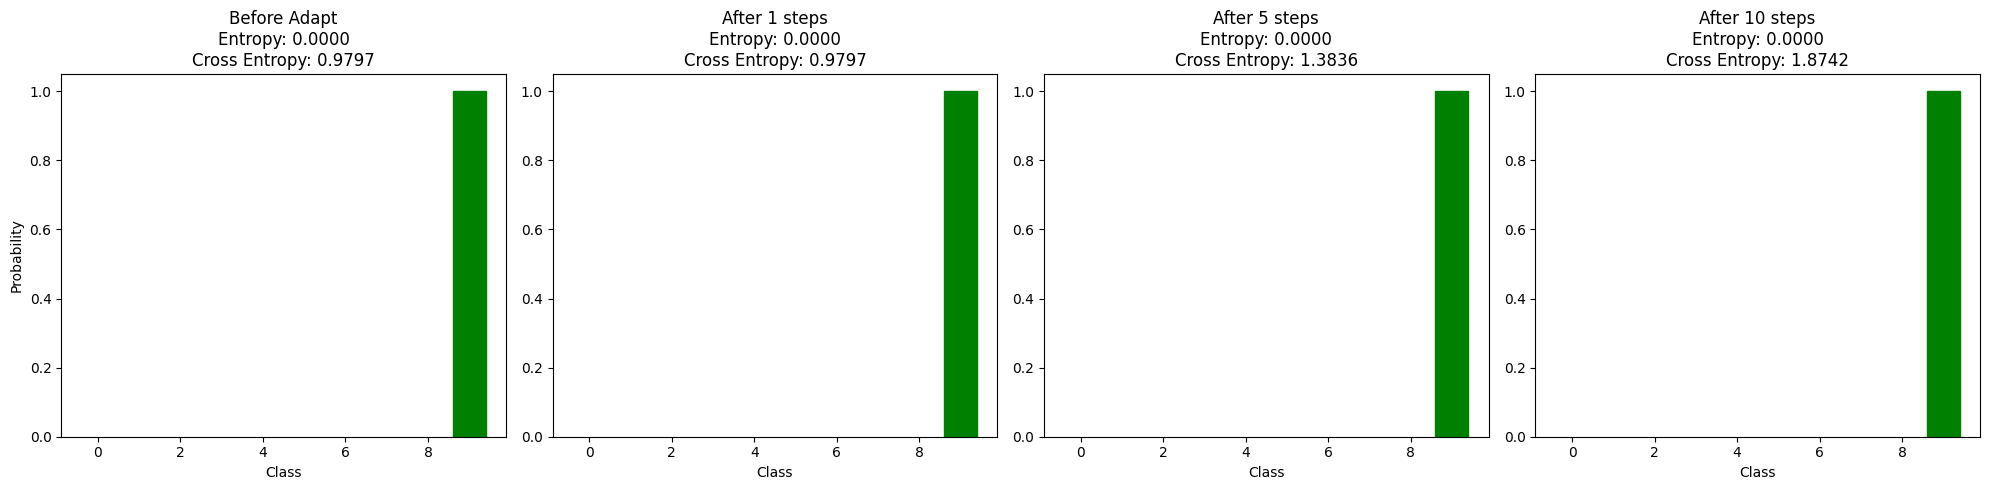

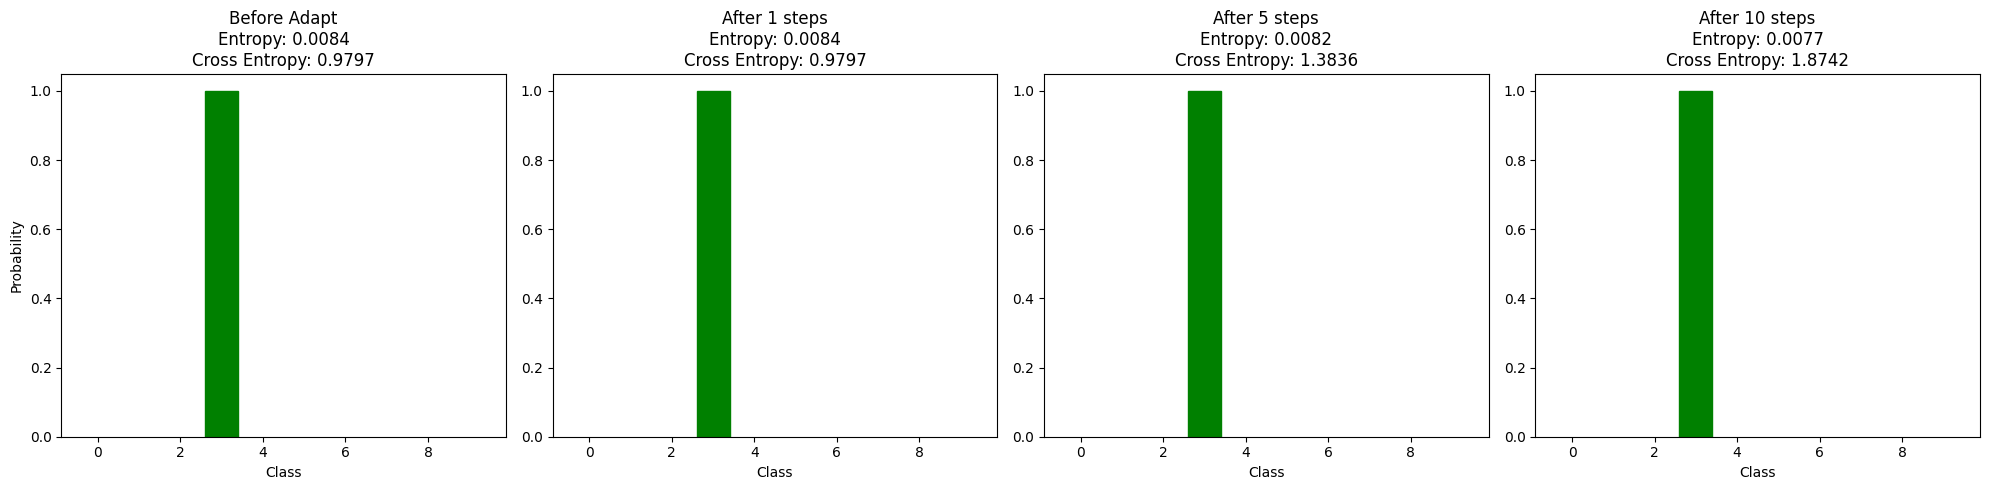

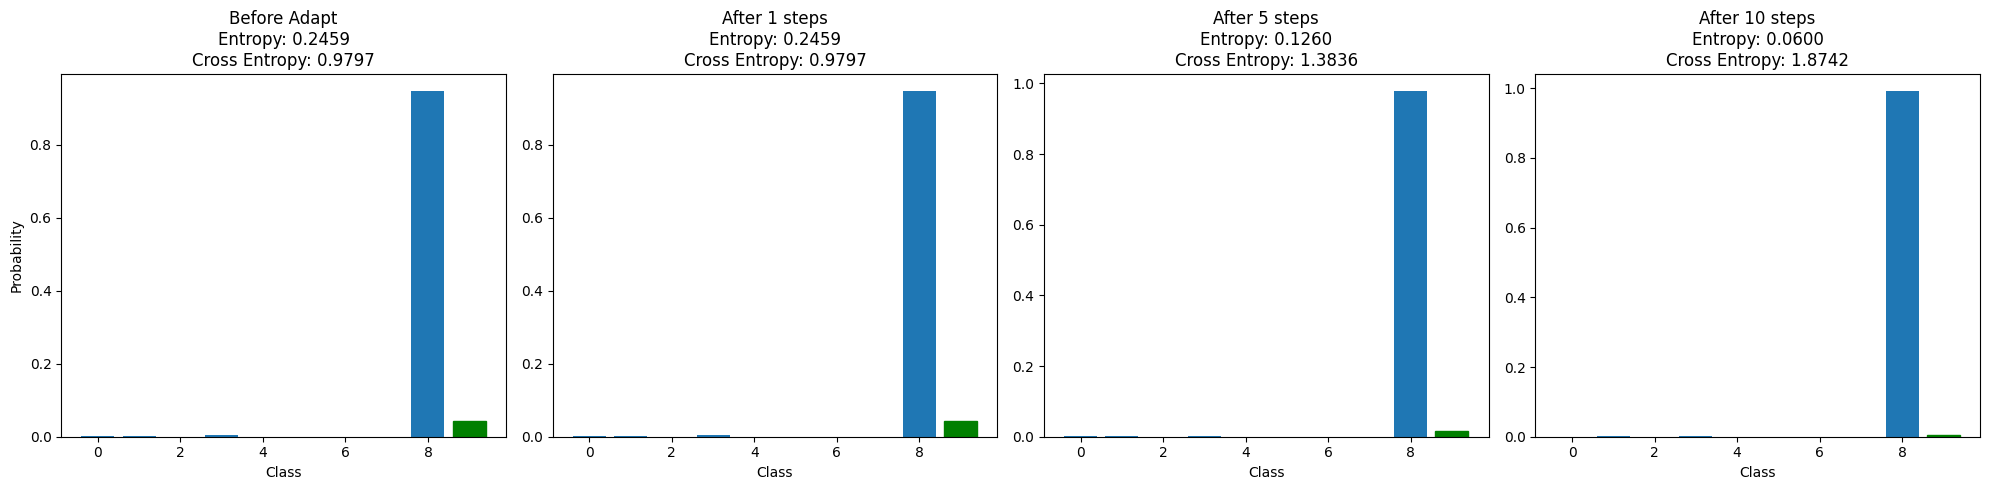

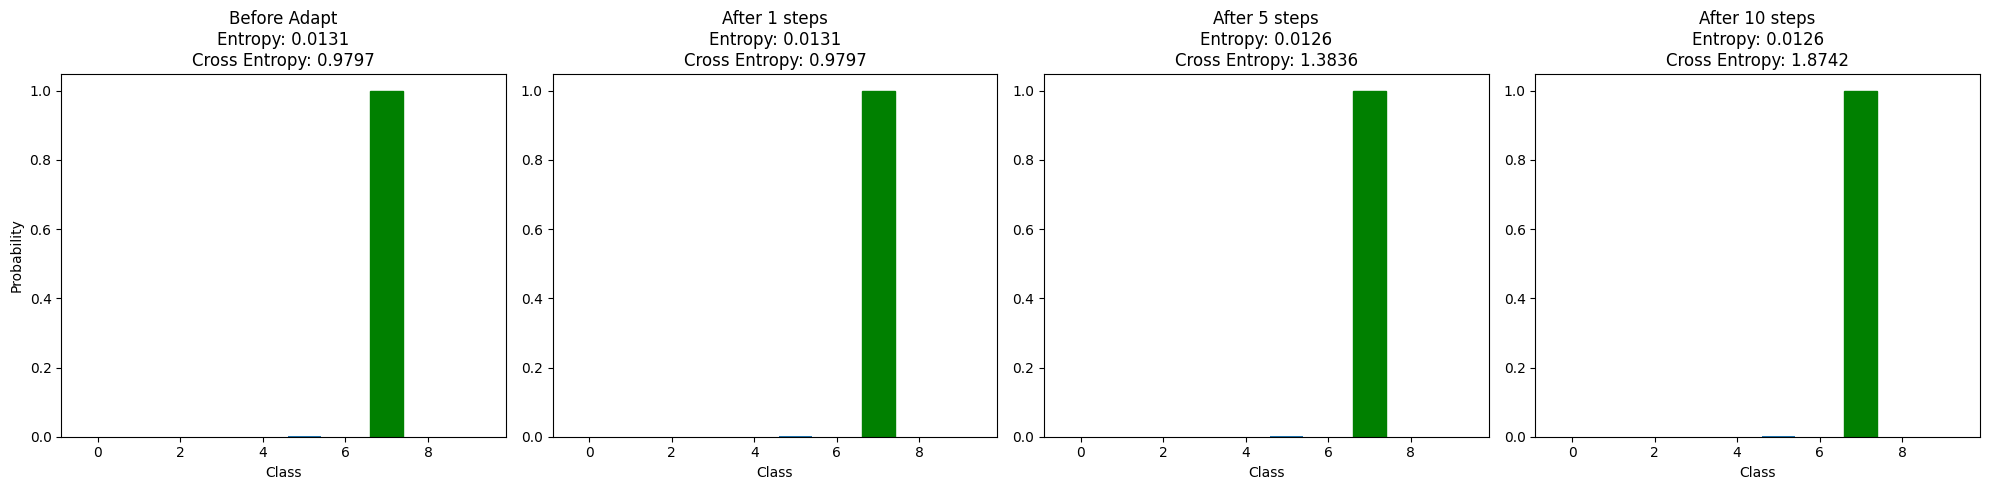

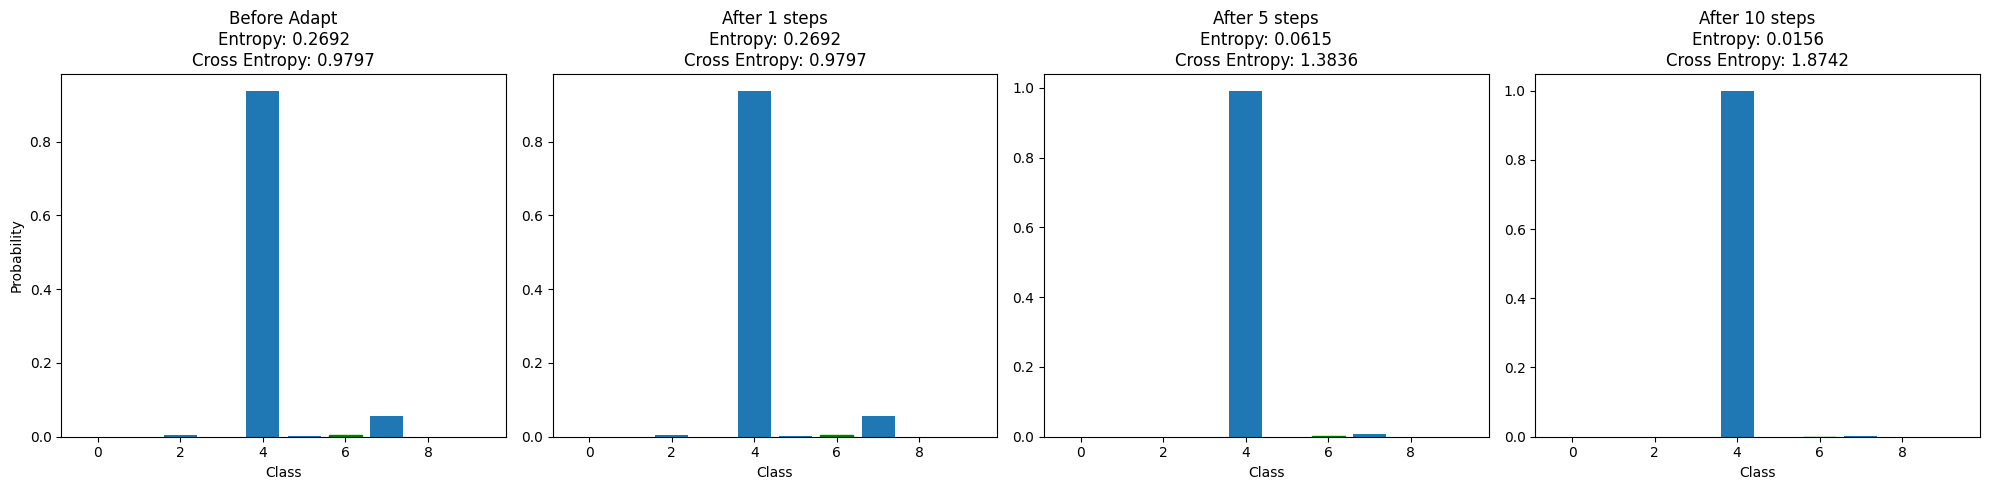

In [7]:
# Tent 모델의 forward and adapt 전후 비교를 위한 데이터 수집 (optim_steps 별)
optim_steps_list = [1, 5, 10]
results = {
    steps: {
        'entropy_before': [], 'entropy_after': [],
        'cross_entropy_before': [], 'cross_entropy_after': [],
        'output_dist_before': [], 'output_dist_after': [],
        'labels': []
    } for steps in optim_steps_list
}

data_loader = data_loaders[10]

for optim_steps in optim_steps_list:
    print(f"\n=== Tent (optim_steps={optim_steps}) ===")
    # 각 optim_steps에 대해 새로운 Tent 인스턴스 생성
    method = Tent(optim_steps=optim_steps)
    method.model = method.model.to(device)
    
    for batch in data_loader:
        input_samples, labels, _ = batch
        input_samples = input_samples.to(device)
        labels = labels.to(device)
        
        # Forward and adapt 이전
        with torch.no_grad():
            outputs_before = method.model(input_samples)
            probs_before = F.softmax(outputs_before, dim=1)
            entropy_before = compute_entropy(probs_before)
            cross_entropy_before = F.cross_entropy(outputs_before, labels)
        
        # Forward and adapt 수행
        outputs_after = method.forward_and_adapt(input_samples)
        probs_after = F.softmax(outputs_after, dim=1)
        entropy_after = compute_entropy(probs_after)
        cross_entropy_after = F.cross_entropy(outputs_after, labels)
        method.reset()
        
        # 예측 결과 비교
        preds_before = torch.argmax(outputs_before, dim=1)
        preds_after = torch.argmax(outputs_after, dim=1)
        
        # 배치의 각 샘플에 대해 결과 저장
        for i in range(len(labels)):
            print(f'Sample {len(results[optim_steps]["entropy_before"])}:')
            print(f'Adapt 이전 - 예측: {preds_before[i].item()}, 엔트로피: {entropy_before[i].item():.4f}, 크로스 엔트로피: {cross_entropy_before.item():.4f}')
            print(f'Adapt 이후 - 예측: {preds_after[i].item()}, 엔트로피: {entropy_after[i].item():.4f}, 크로스 엔트로피: {cross_entropy_after.item():.4f}')
            print(f'실제 레이블: {labels[i].item()}\n')
            
            results[optim_steps]['entropy_before'].append(entropy_before[i].item())
            results[optim_steps]['entropy_after'].append(entropy_after[i].item())
            results[optim_steps]['cross_entropy_before'].append(cross_entropy_before.item())
            results[optim_steps]['cross_entropy_after'].append(cross_entropy_after.item())
            results[optim_steps]['output_dist_before'].append(probs_before[i].cpu().numpy())
            results[optim_steps]['output_dist_after'].append(probs_after[i].cpu().detach().numpy())
            results[optim_steps]['labels'].append(labels[i].item())

# 모든 데이터 수집 후 결과 시각화
for i in range(len(results[optim_steps_list[0]]['labels'])):
    plt.figure(figsize=(20, 5))
    
    # Adapt 이전 분포
    plt.subplot(141)
    dist_before = results[optim_steps_list[0]]['output_dist_before'][i]
    label = results[optim_steps_list[0]]['labels'][i]
    entropy_before = results[optim_steps_list[0]]['entropy_before'][i]
    cross_entropy_before = results[optim_steps_list[0]]['cross_entropy_before'][i]
    bars = plt.bar(range(10), dist_before)
    bars[label].set_color('green')
    plt.title(f'Before Adapt\nEntropy: {entropy_before:.4f}\nCross Entropy: {cross_entropy_before:.4f}')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    
    # 각 optim_steps별 Adapt 이후 분포
    for idx, steps in enumerate(optim_steps_list):
        plt.subplot(142 + idx)
        dist_after = results[steps]['output_dist_after'][i]
        entropy_after = results[steps]['entropy_after'][i]
        cross_entropy_after = results[steps]['cross_entropy_after'][i]
        bars = plt.bar(range(10), dist_after)
        bars[label].set_color('green')
        plt.title(f'After {steps} steps\nEntropy: {entropy_after:.4f}\nCross Entropy: {cross_entropy_after:.4f}')
        plt.xlabel('Class')
    
    plt.tight_layout()
    plt.show()

# Tent batch size=50


=== Tent (optim_steps=1) ===
Sample 0:
Adapt 이전 - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 1.3433
Adapt 이후 - 예측: 5, 엔트로피: 0.1724, 크로스 엔트로피: 1.3433
실제 레이블: 3

Sample 1:
Adapt 이전 - 예측: 8, 엔트로피: 0.5841, 크로스 엔트로피: 1.3433
Adapt 이후 - 예측: 8, 엔트로피: 0.5841, 크로스 엔트로피: 1.3433
실제 레이블: 8

Sample 2:
Adapt 이전 - 예측: 1, 엔트로피: 0.0964, 크로스 엔트로피: 1.3433
Adapt 이후 - 예측: 1, 엔트로피: 0.0964, 크로스 엔트로피: 1.3433
실제 레이블: 8

Sample 3:
Adapt 이전 - 예측: 8, 엔트로피: 0.3665, 크로스 엔트로피: 1.3433
Adapt 이후 - 예측: 8, 엔트로피: 0.3665, 크로스 엔트로피: 1.3433
실제 레이블: 0

Sample 4:
Adapt 이전 - 예측: 6, 엔트로피: 0.0036, 크로스 엔트로피: 1.3433
Adapt 이후 - 예측: 6, 엔트로피: 0.0036, 크로스 엔트로피: 1.3433
실제 레이블: 6

Sample 5:
Adapt 이전 - 예측: 6, 엔트로피: 0.0338, 크로스 엔트로피: 1.3433
Adapt 이후 - 예측: 6, 엔트로피: 0.0338, 크로스 엔트로피: 1.3433
실제 레이블: 6

Sample 6:
Adapt 이전 - 예측: 1, 엔트로피: 0.1445, 크로스 엔트로피: 1.3433
Adapt 이후 - 예측: 1, 엔트로피: 0.1445, 크로스 엔트로피: 1.3433
실제 레이블: 1

Sample 7:
Adapt 이전 - 예측: 6, 엔트로피: 0.0622, 크로스 엔트로피: 1.3433
Adapt 이후 - 예측: 6, 엔트로피: 0.0622, 크로스 엔트로피: 1.3433
실제 레이블: 6

Sample 8:
Adapt 이전

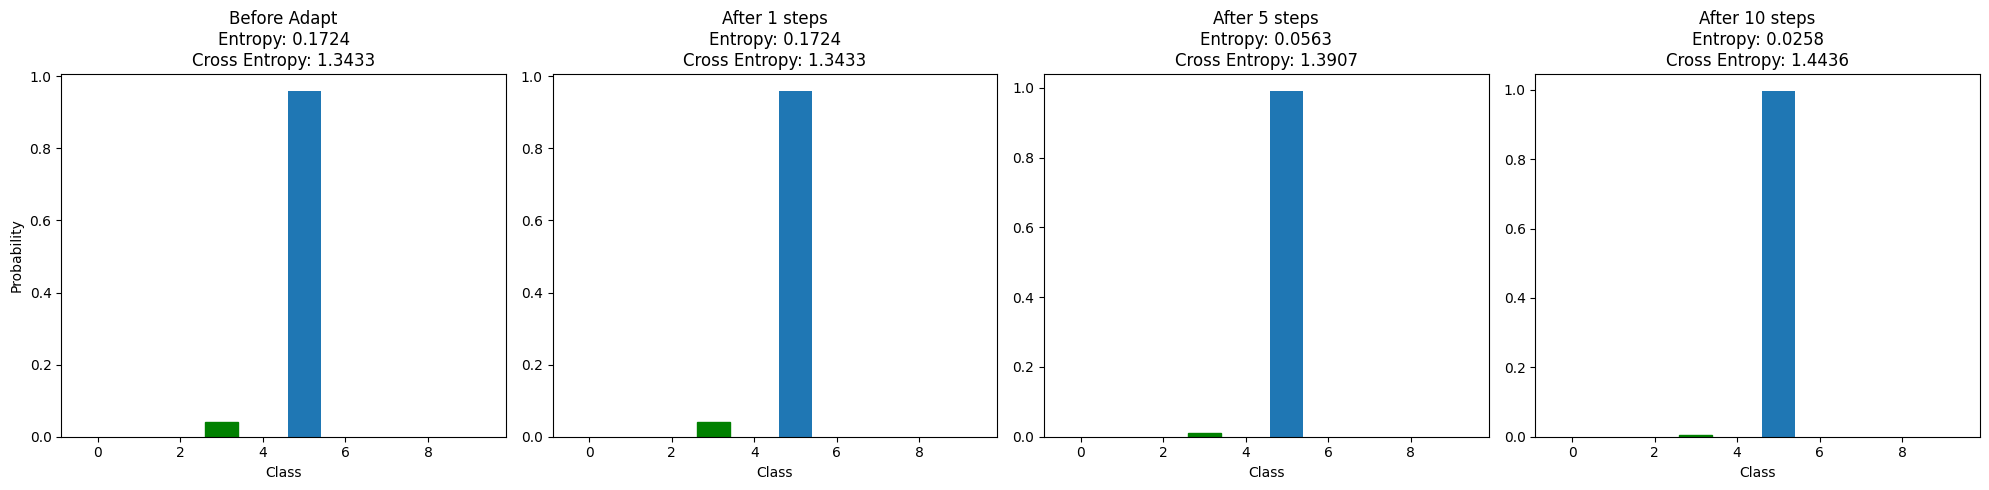

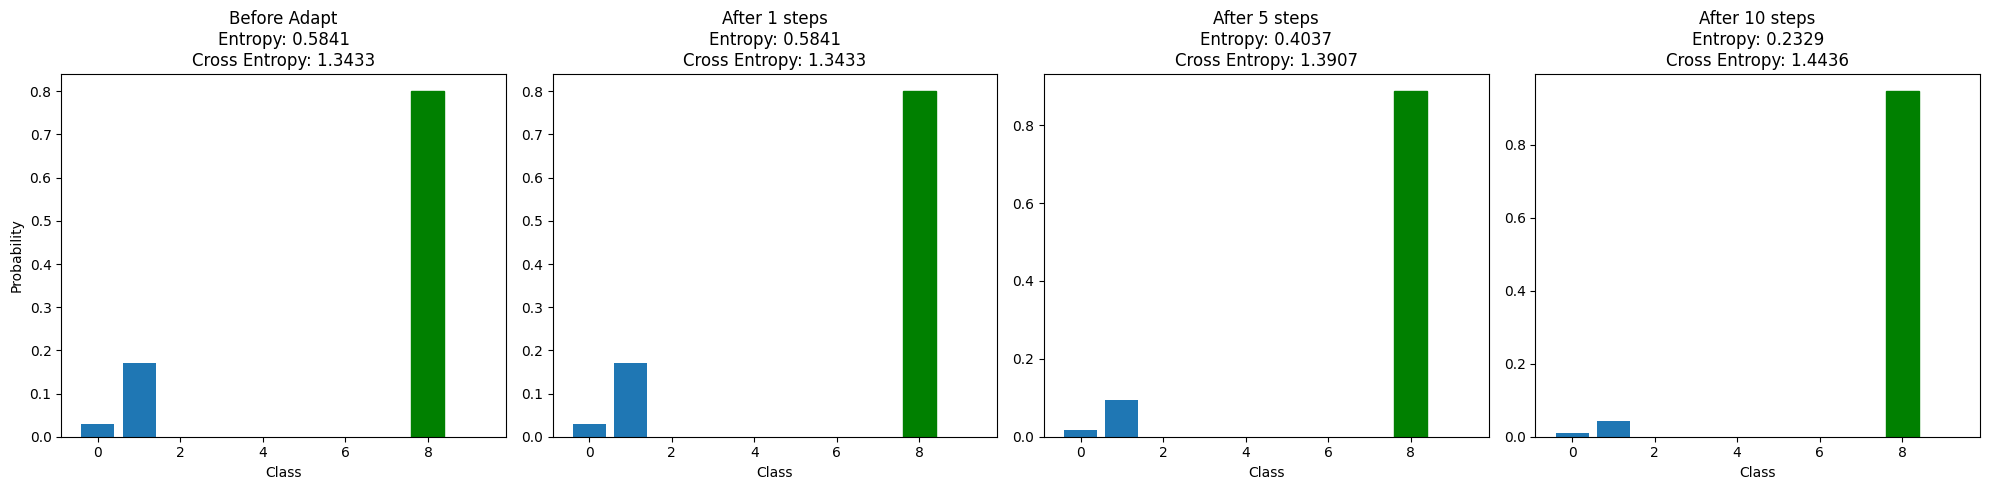

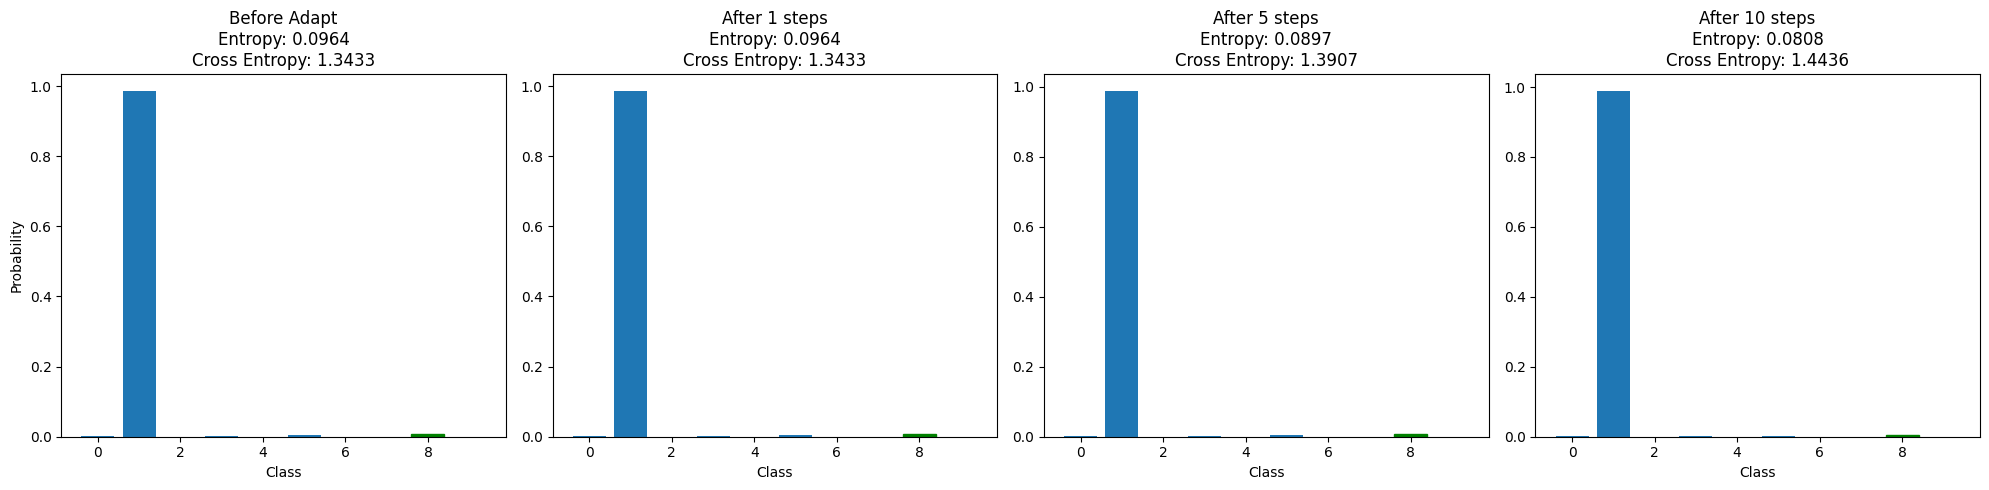

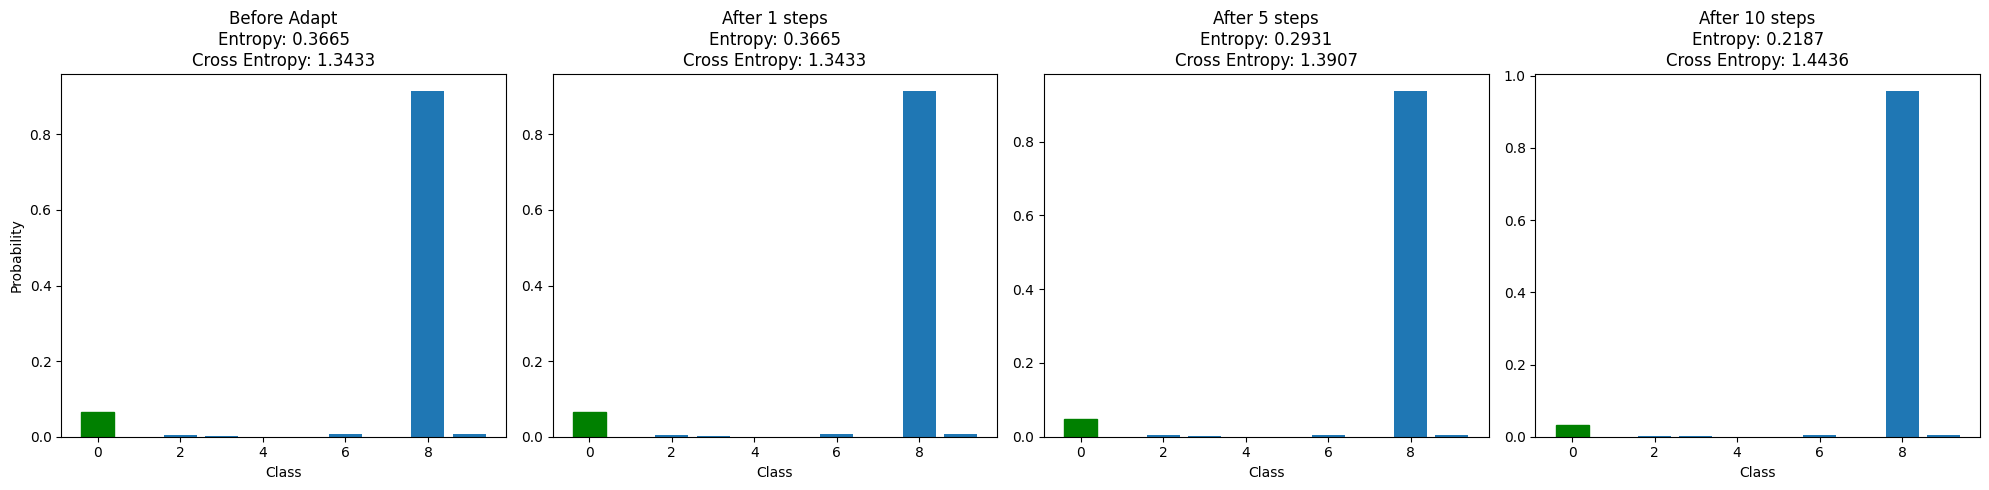

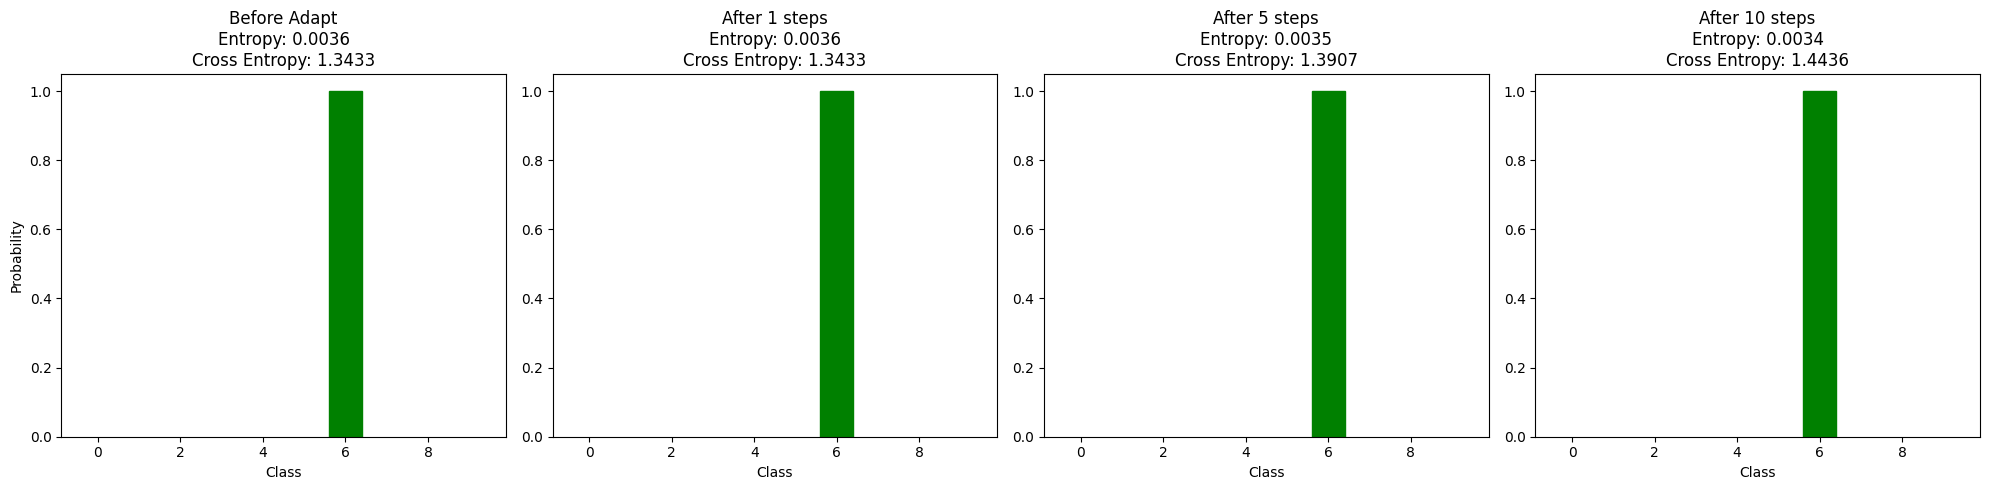

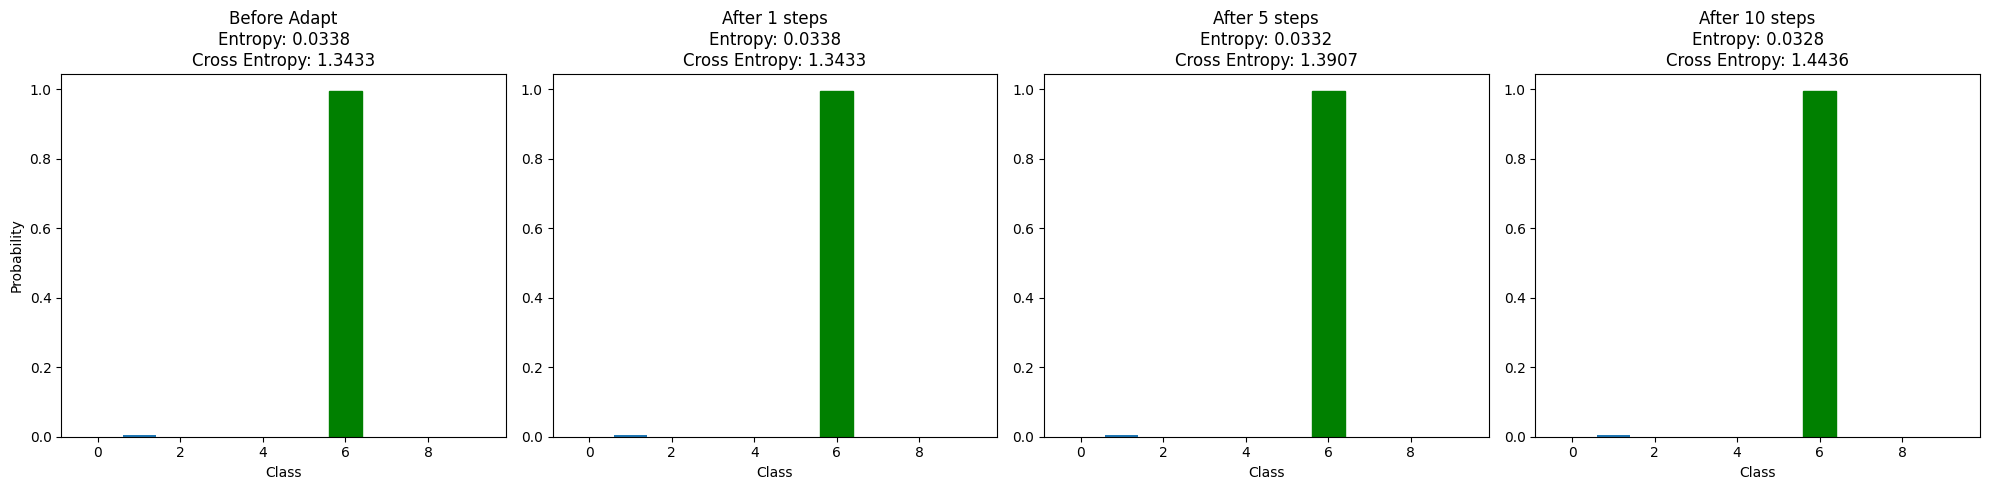

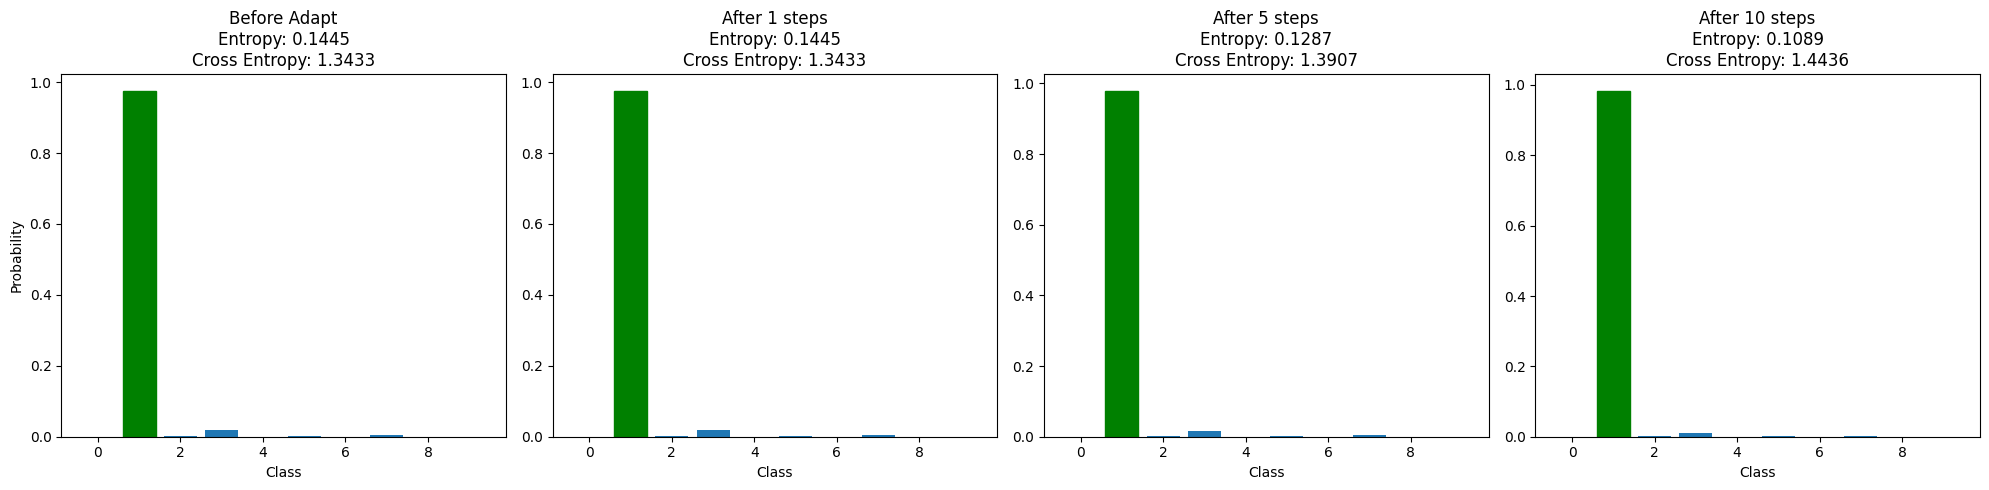

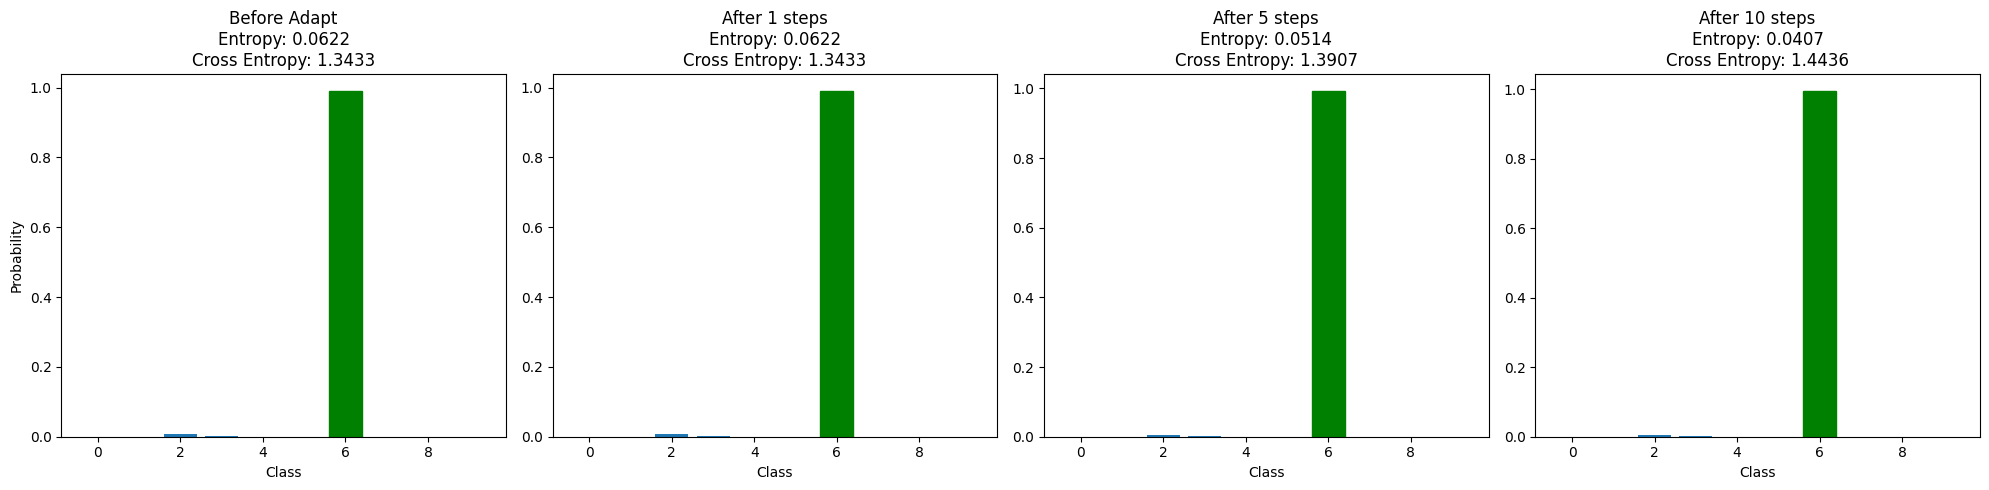

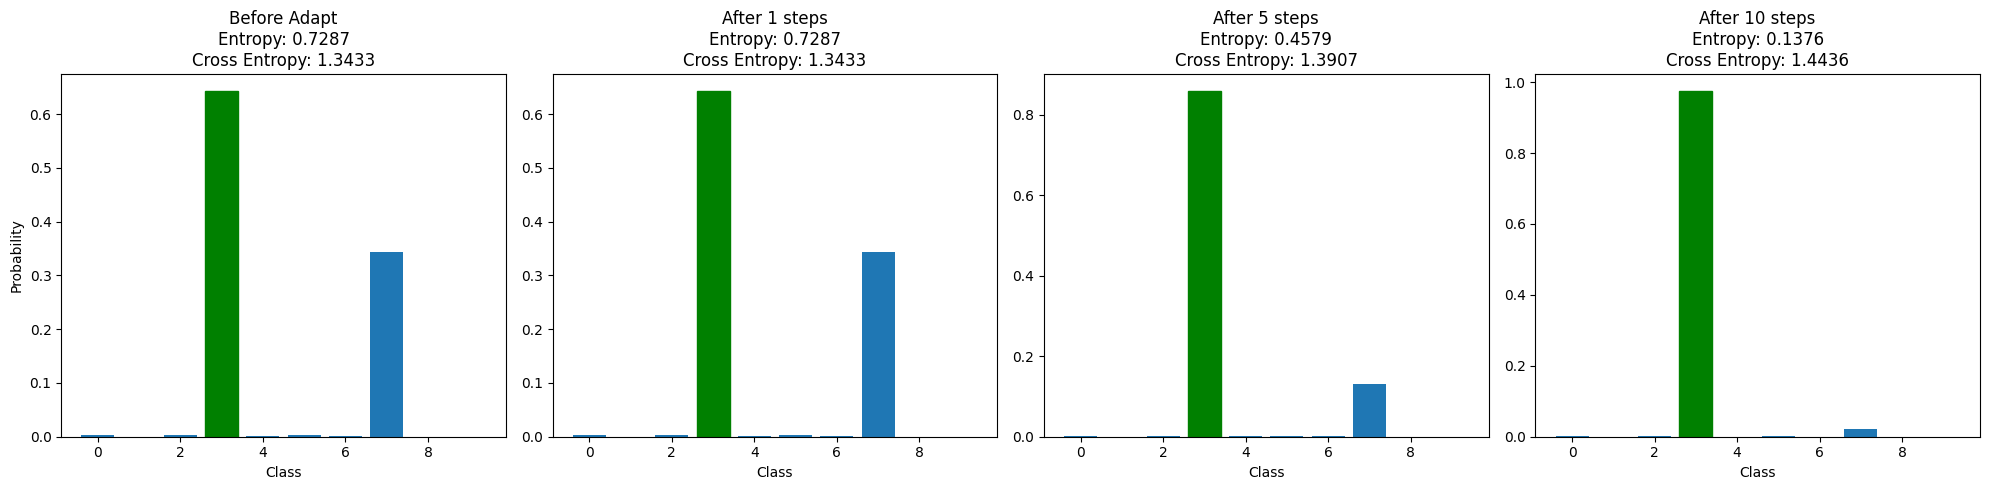

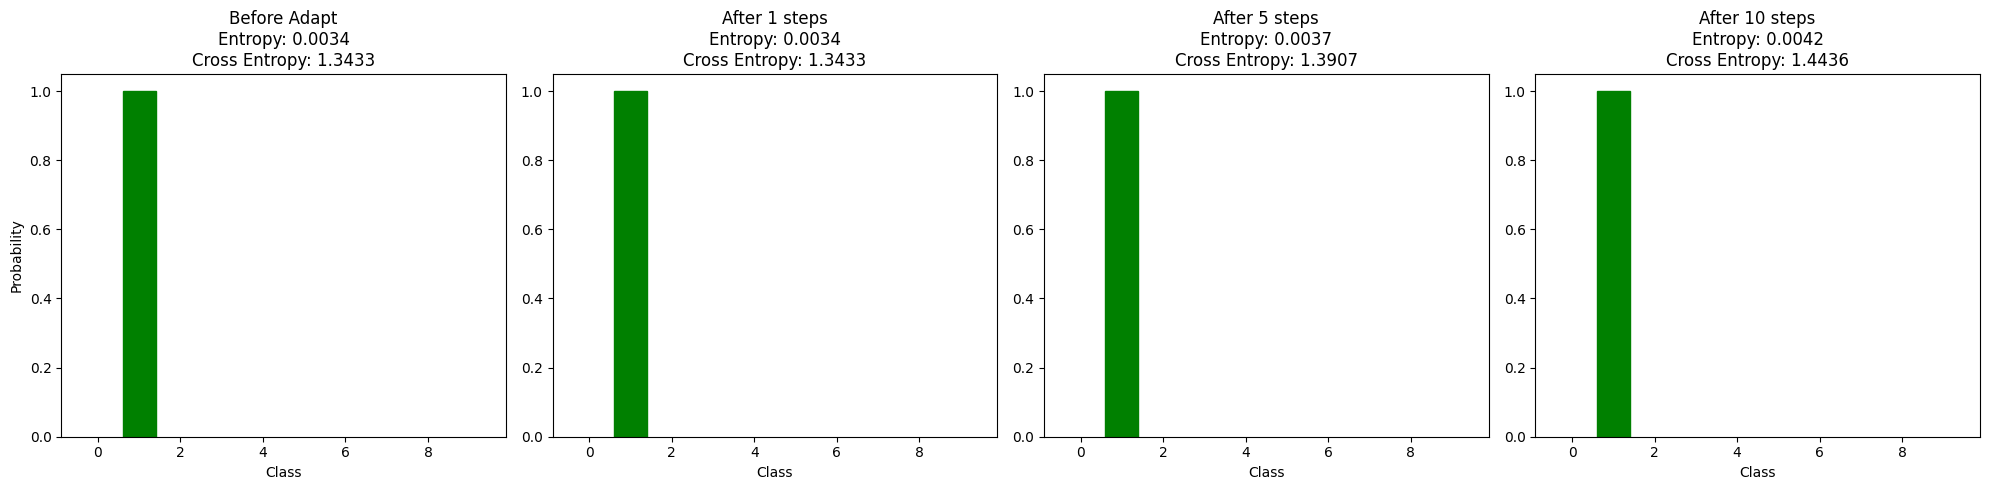

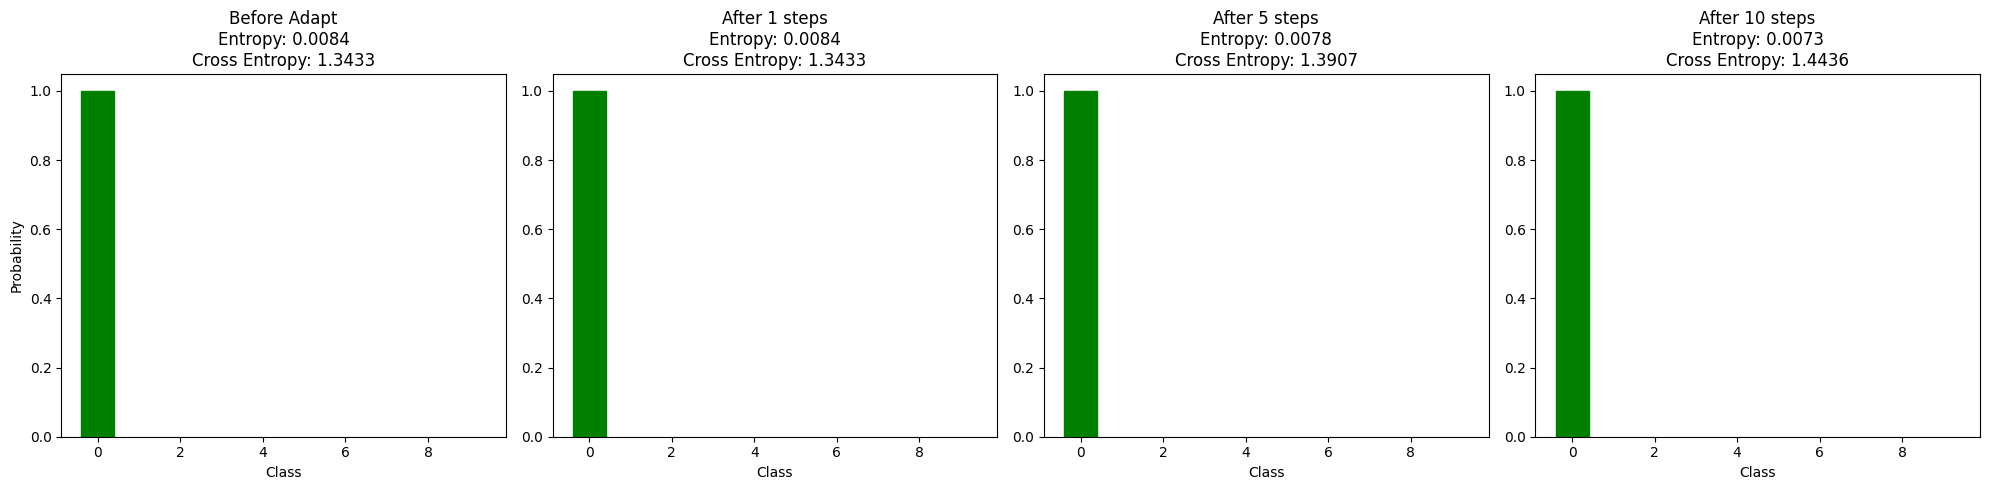

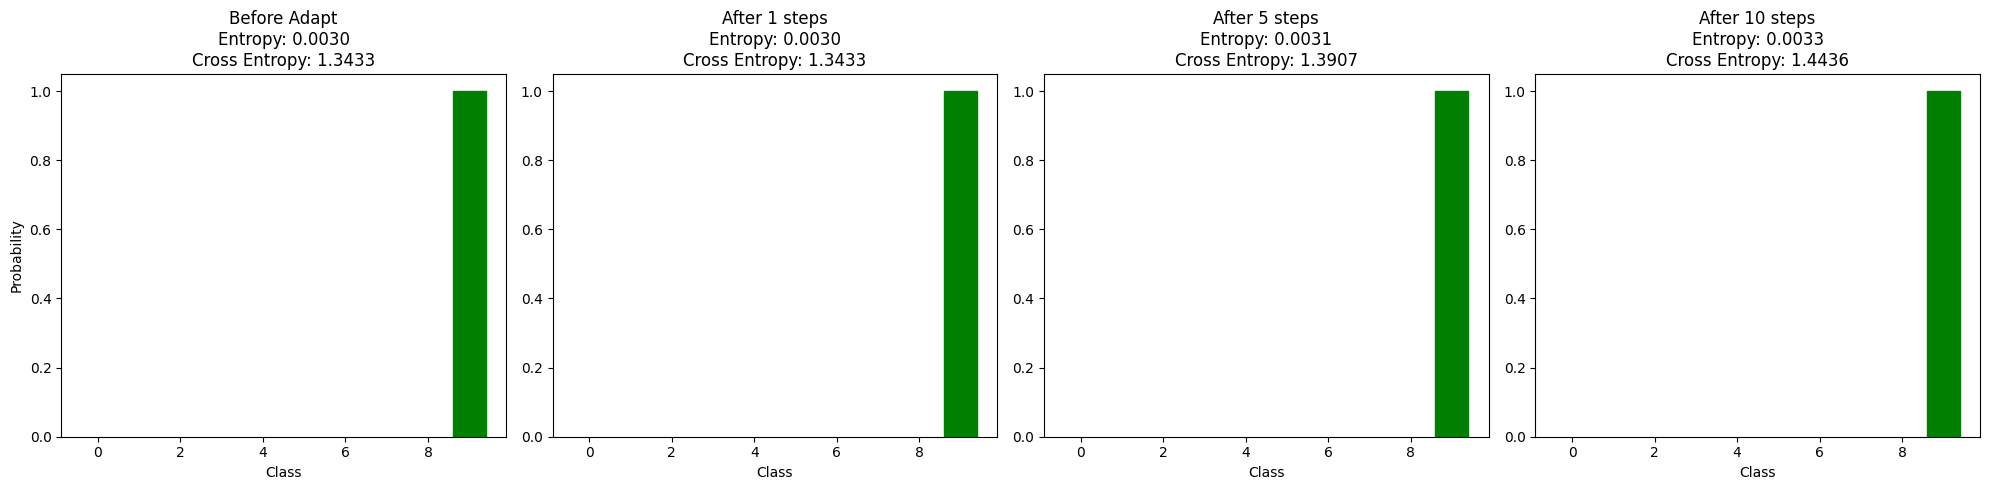

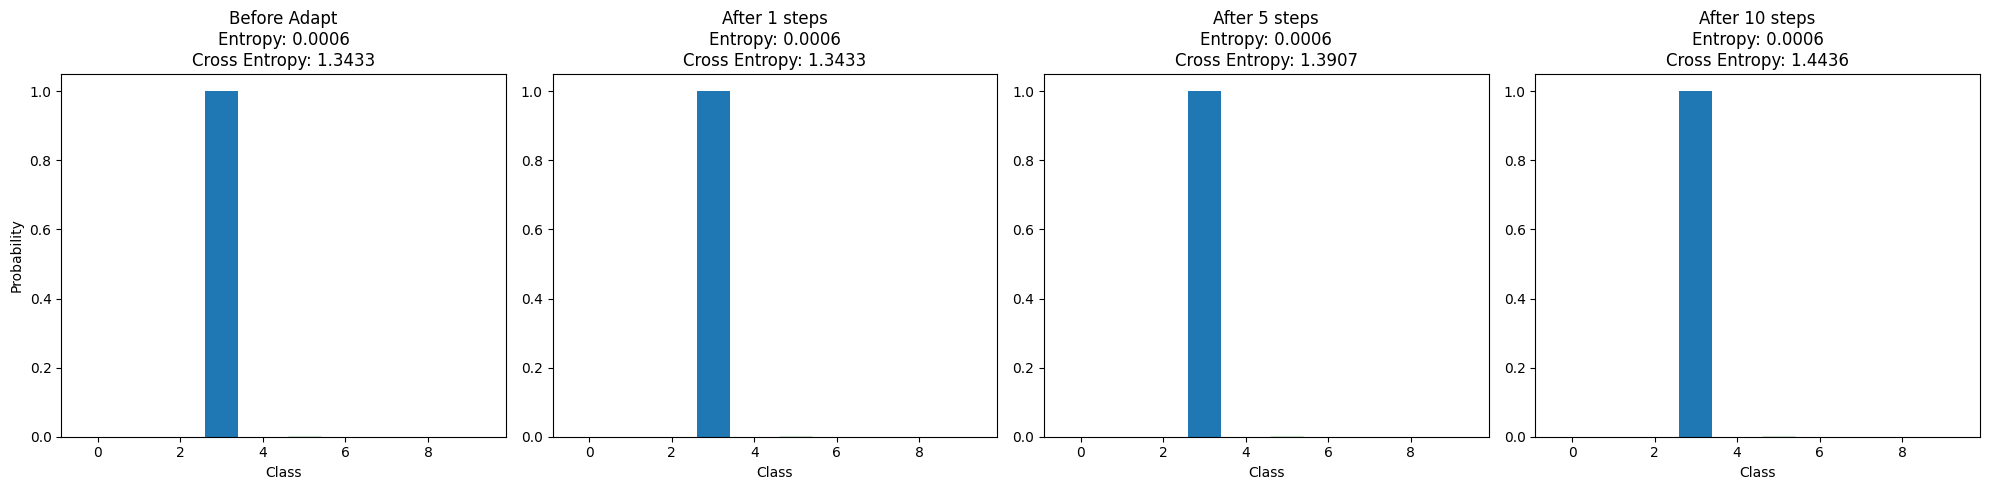

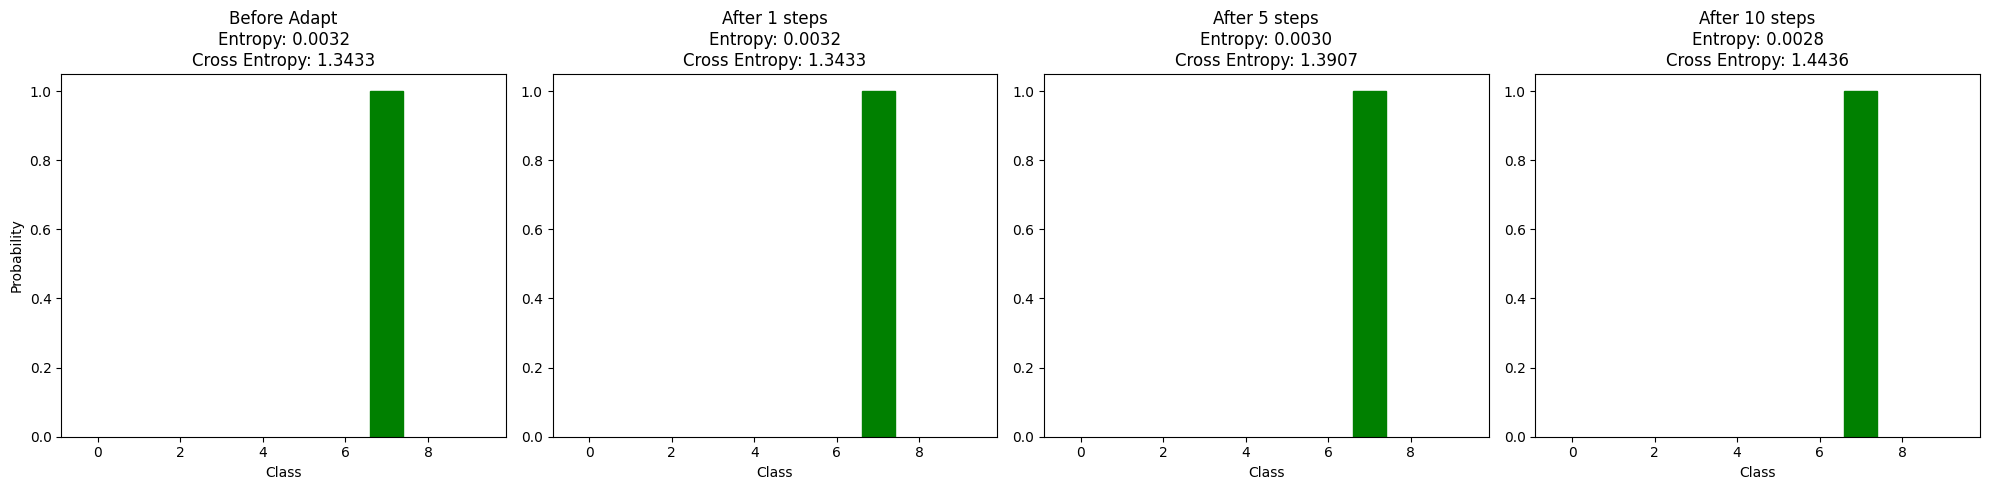

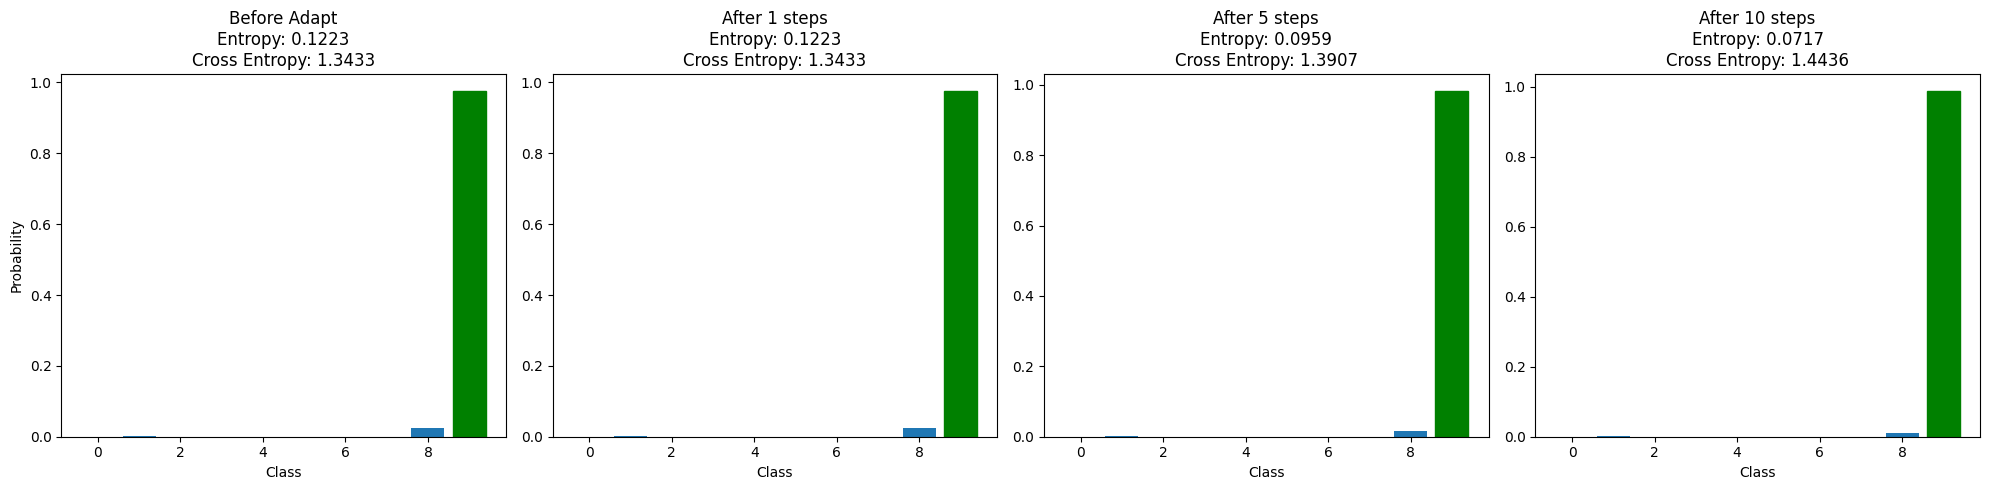

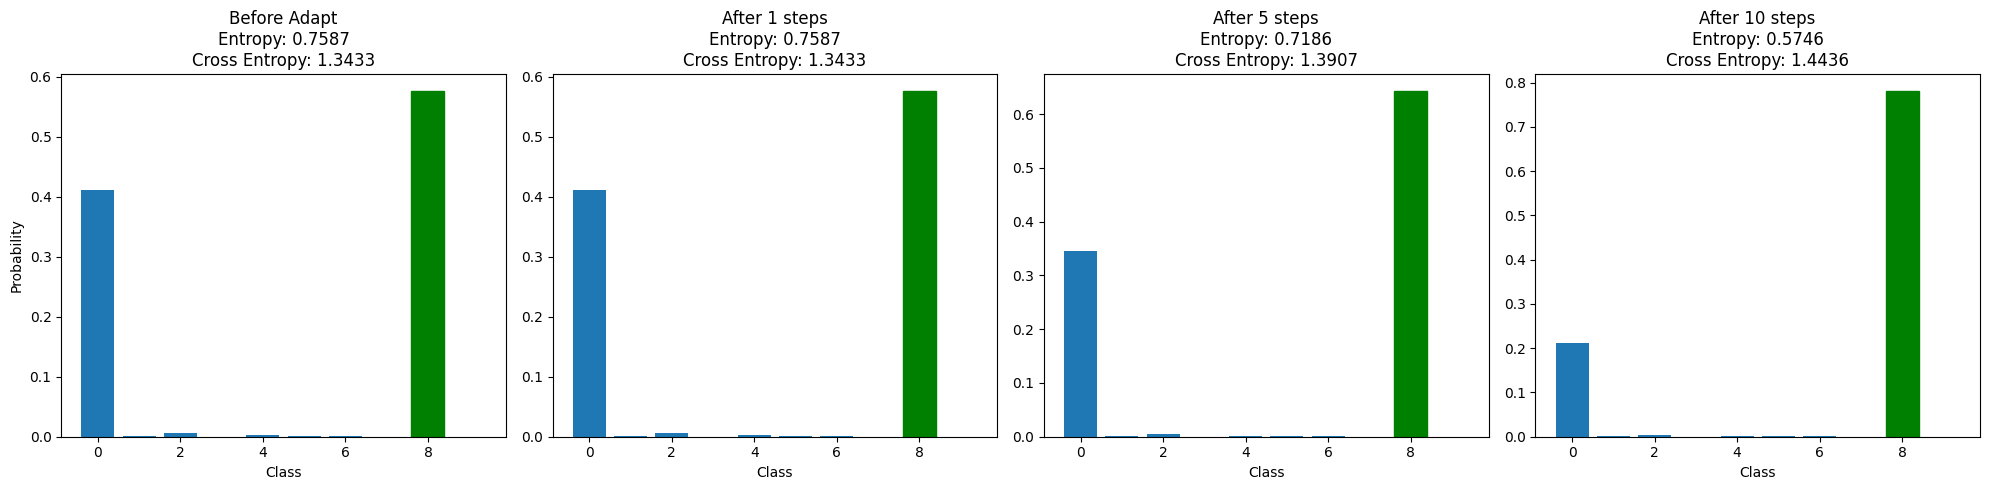

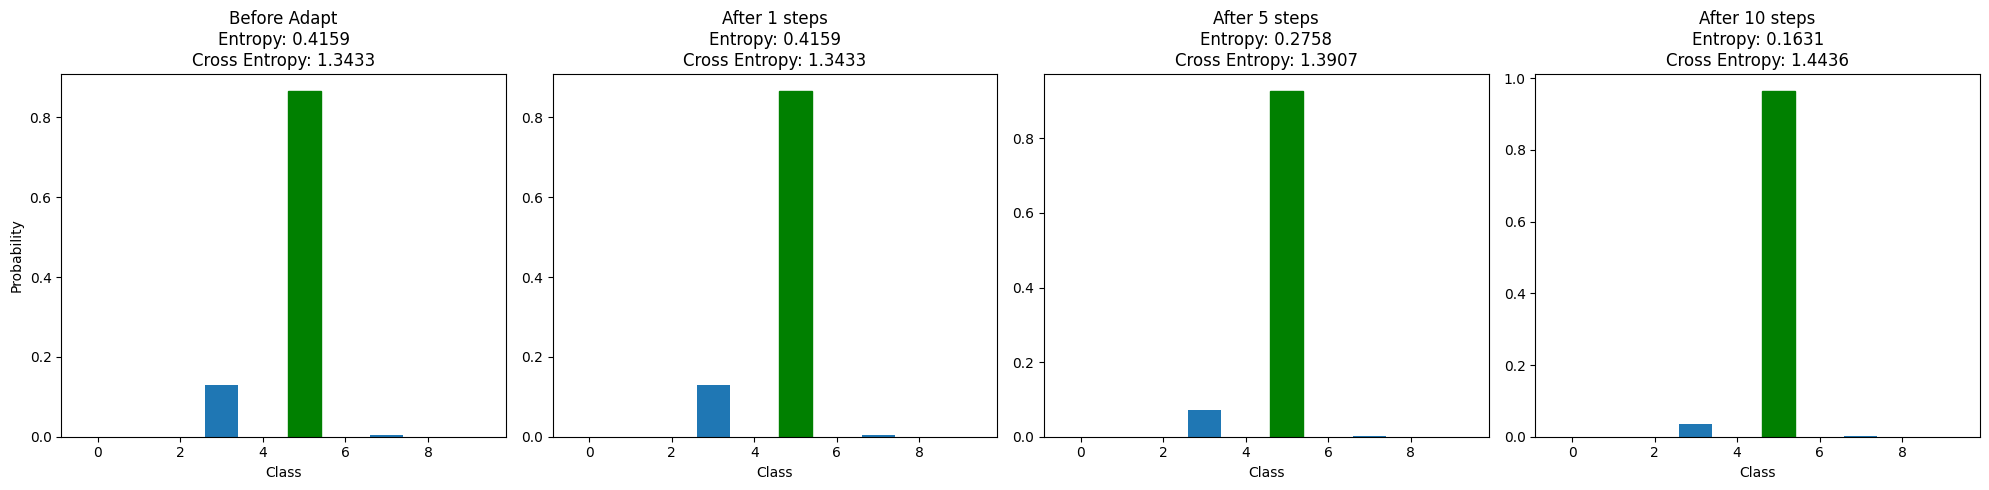

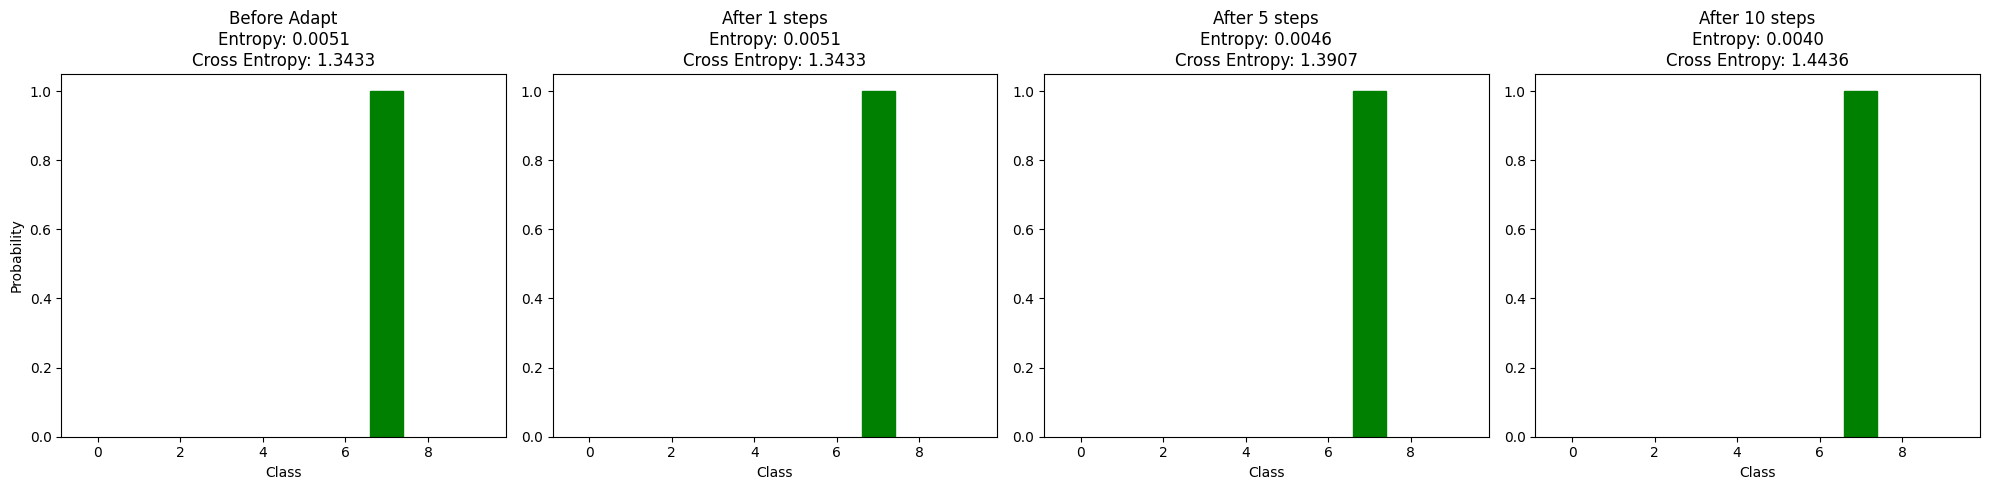

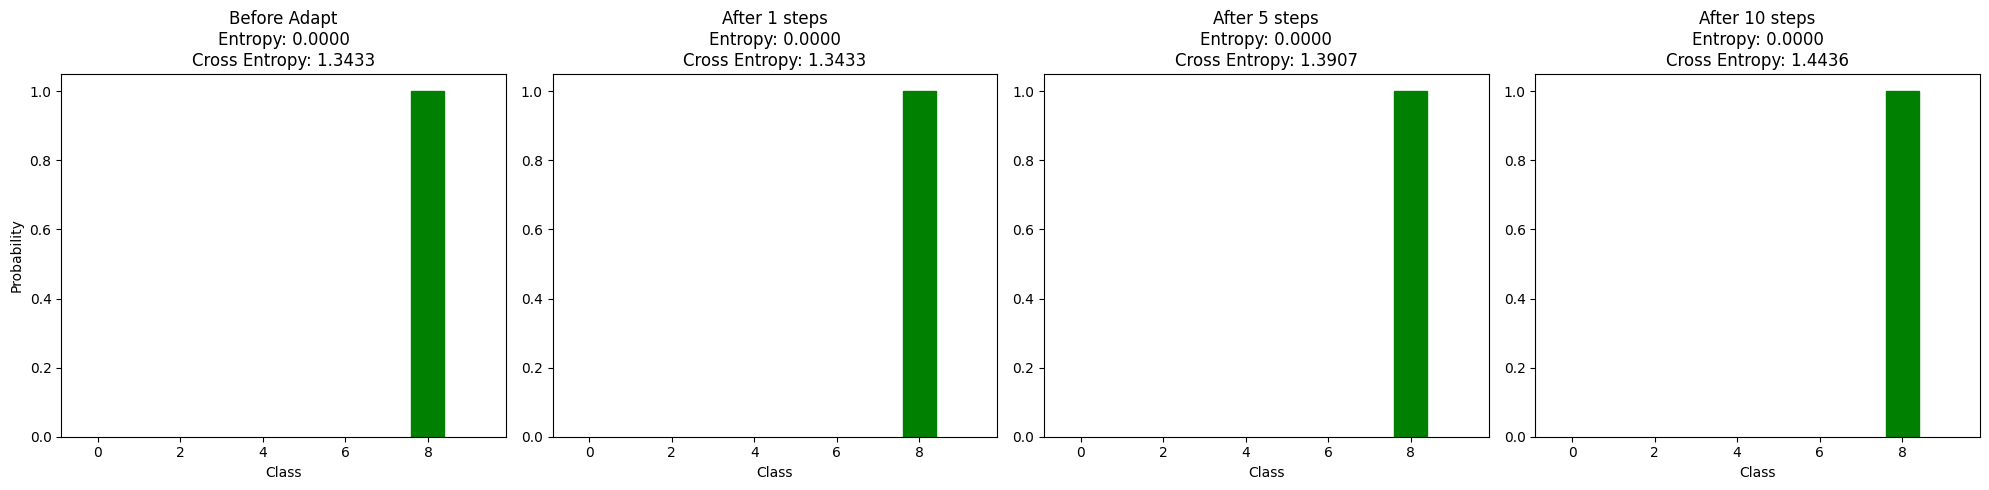

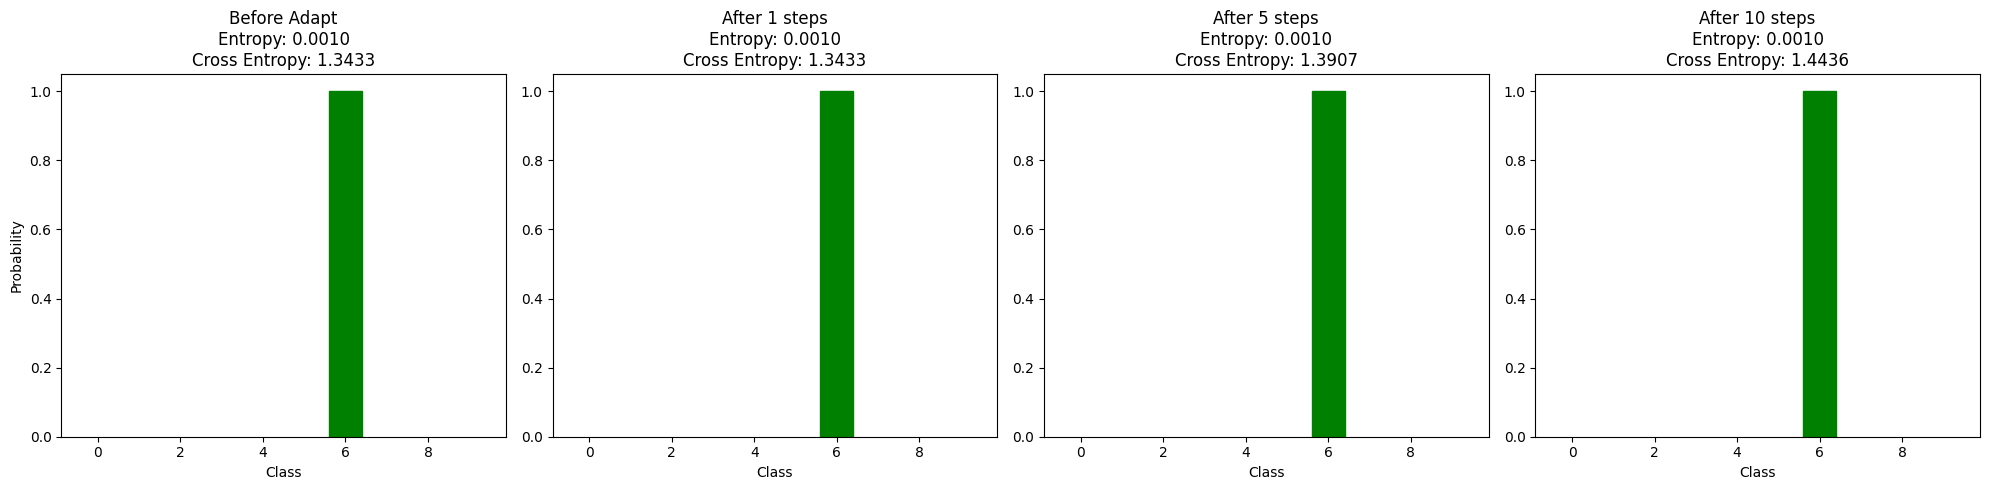

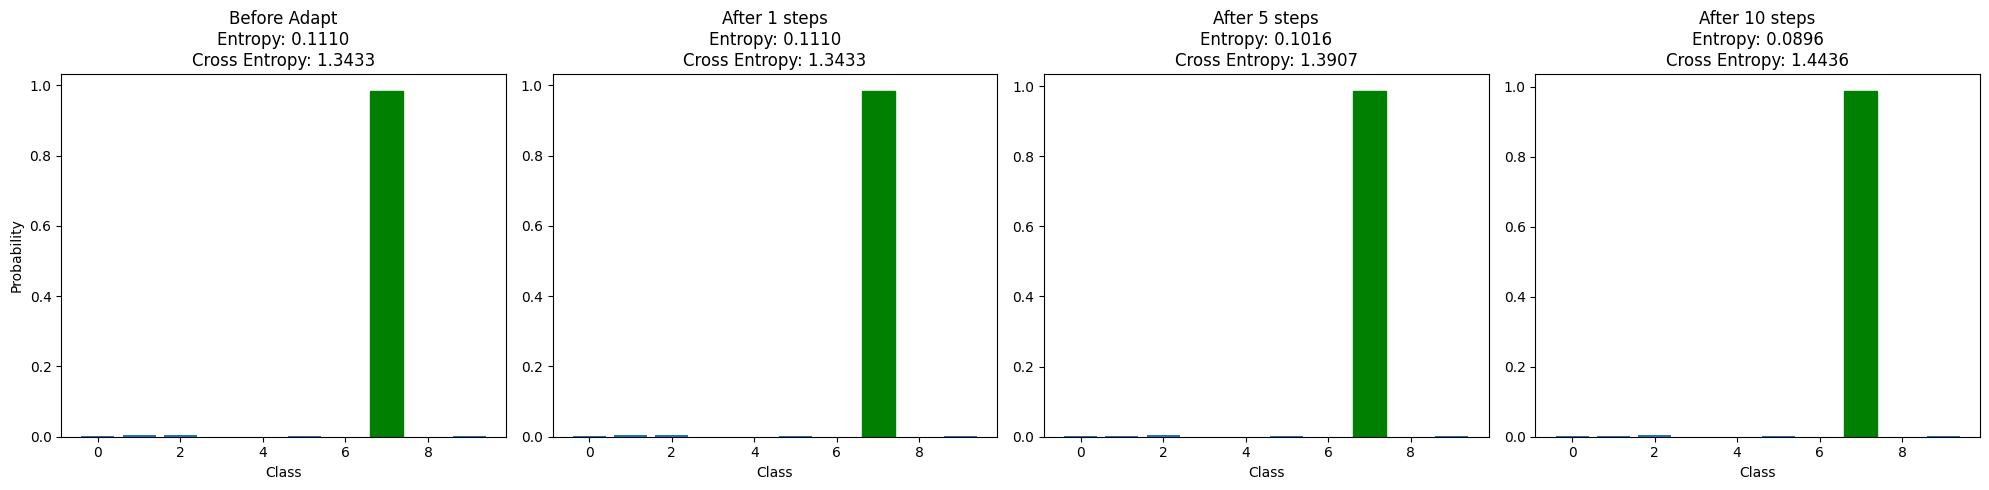

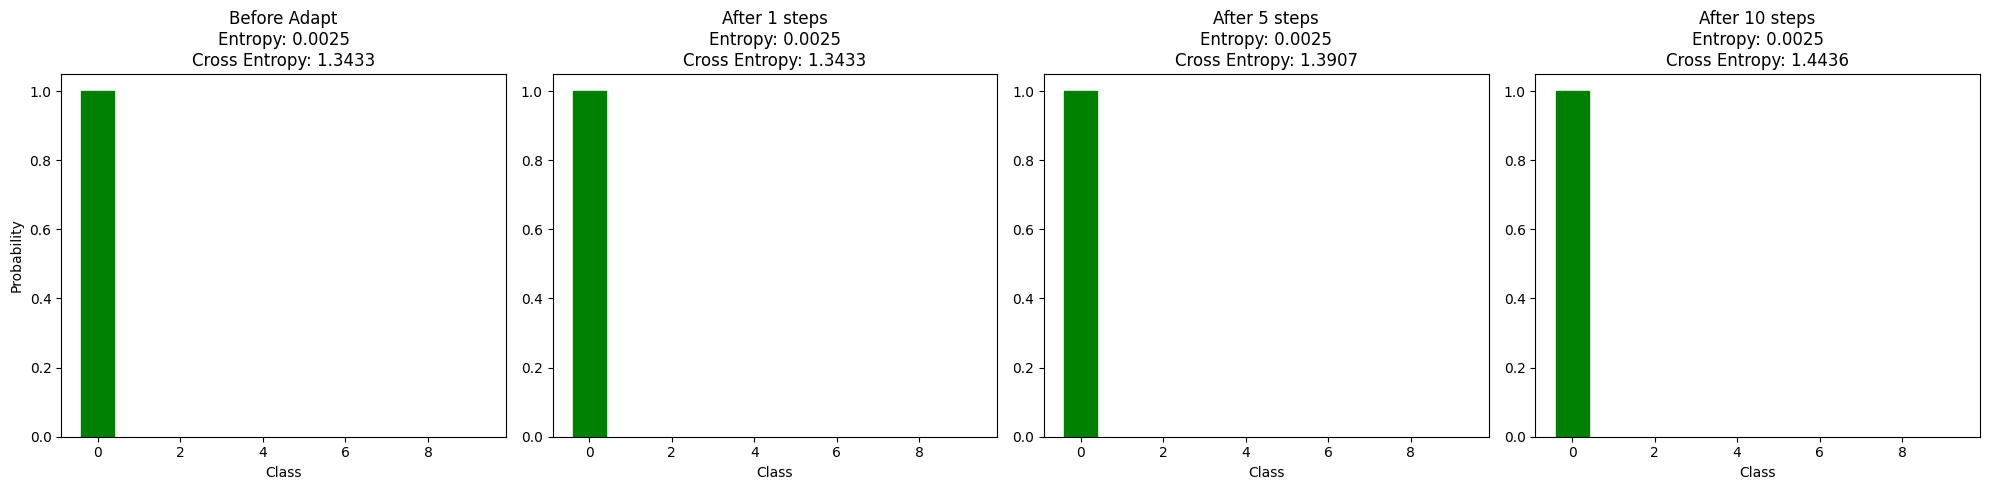

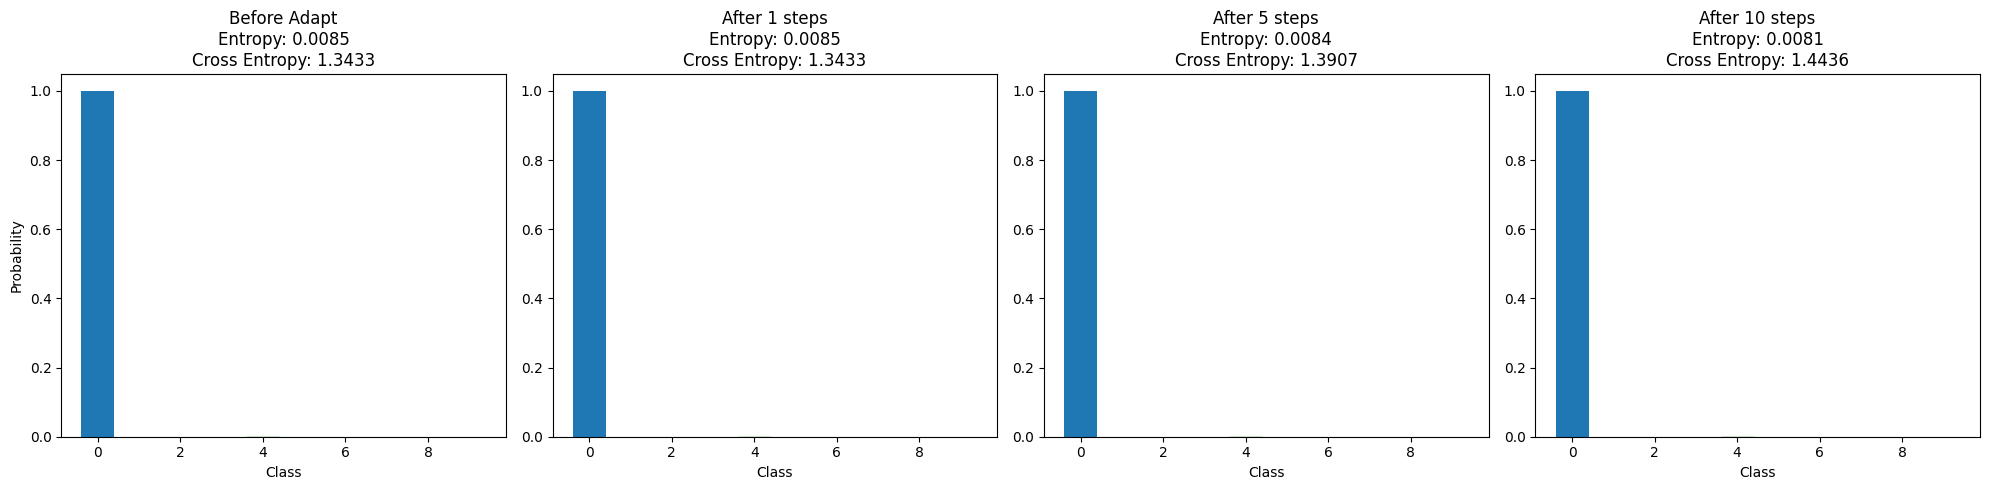

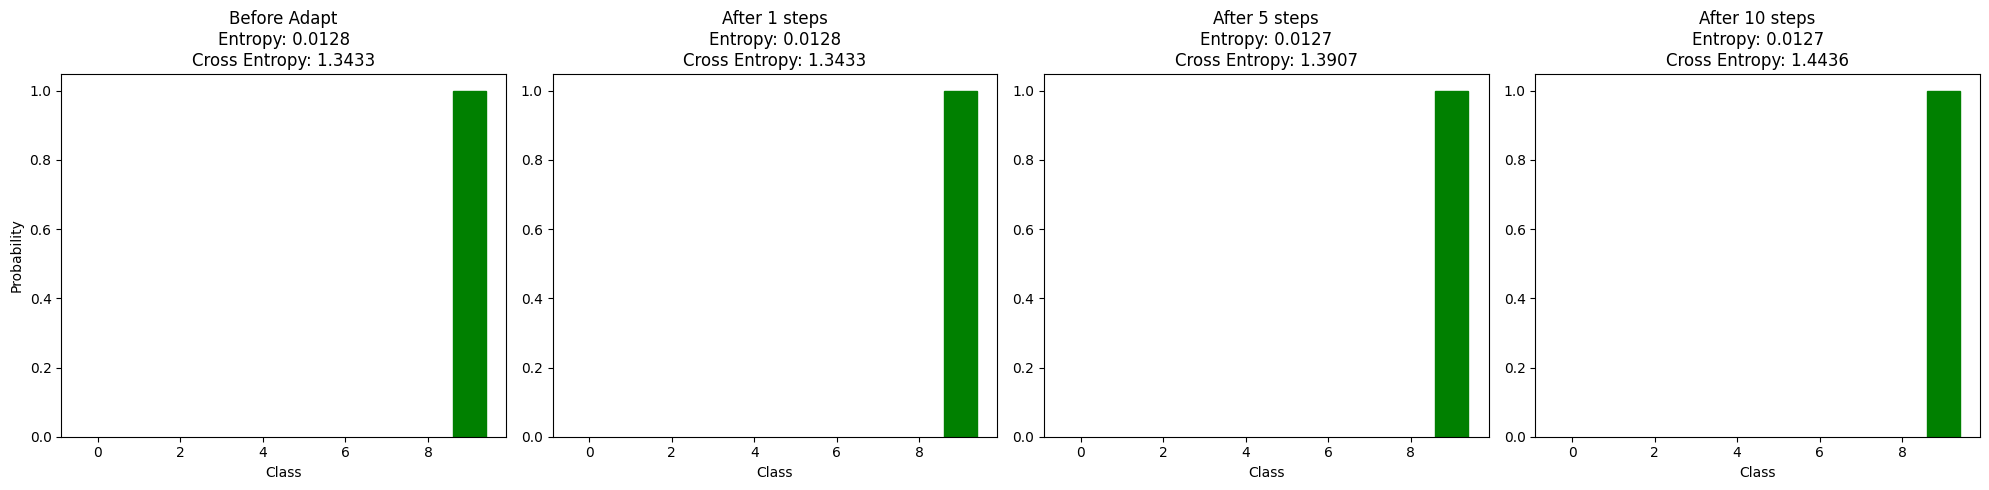

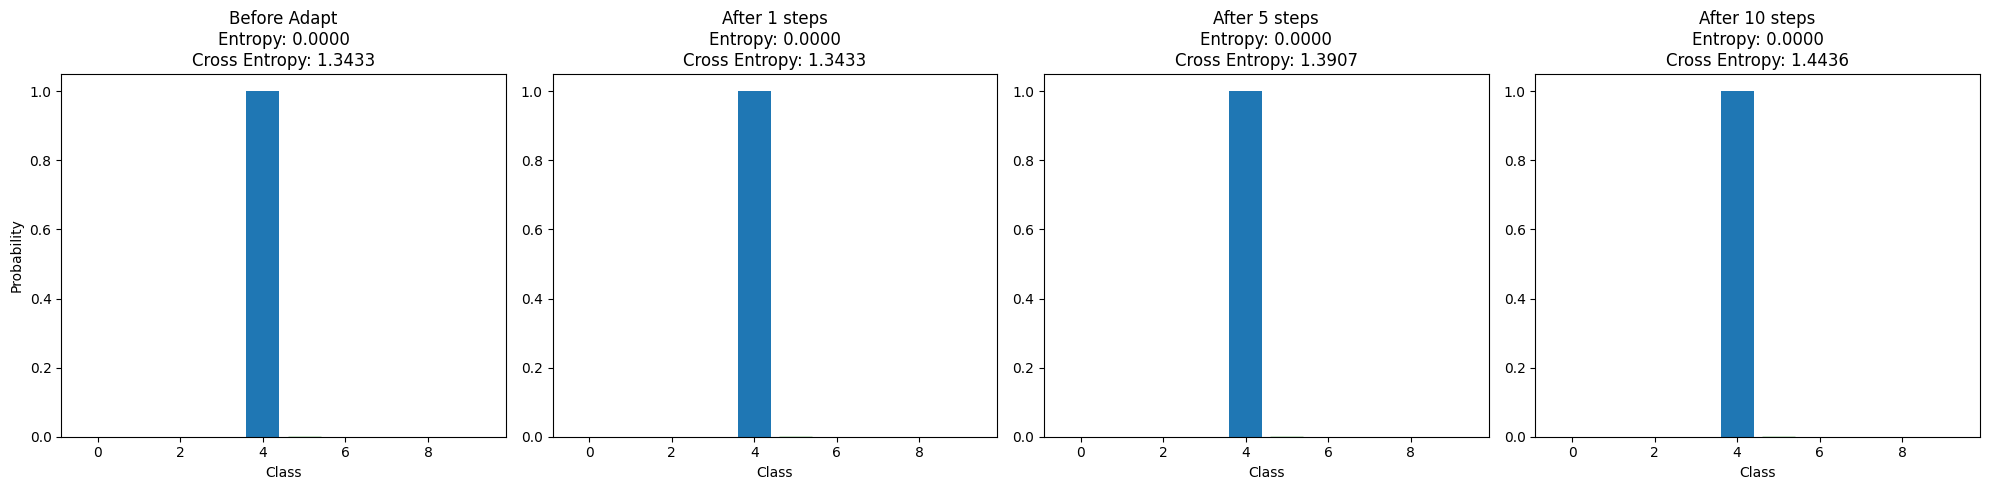

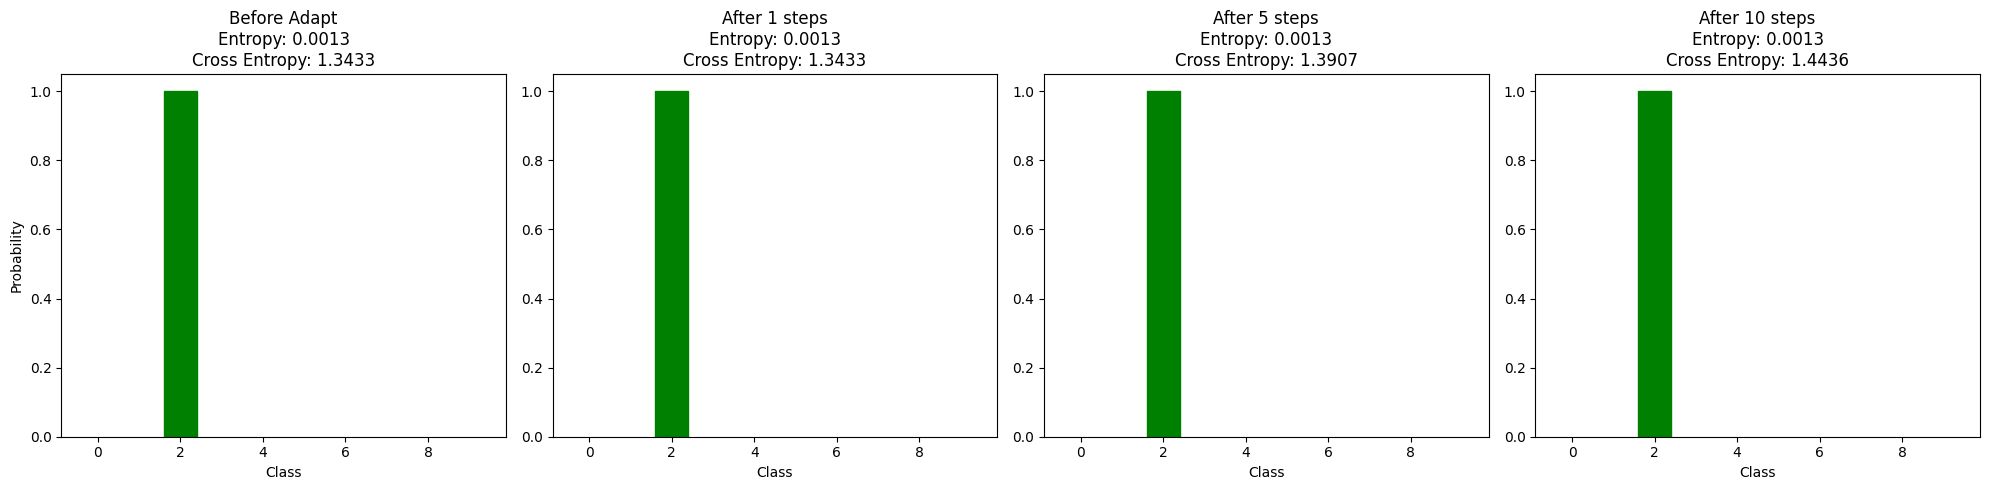

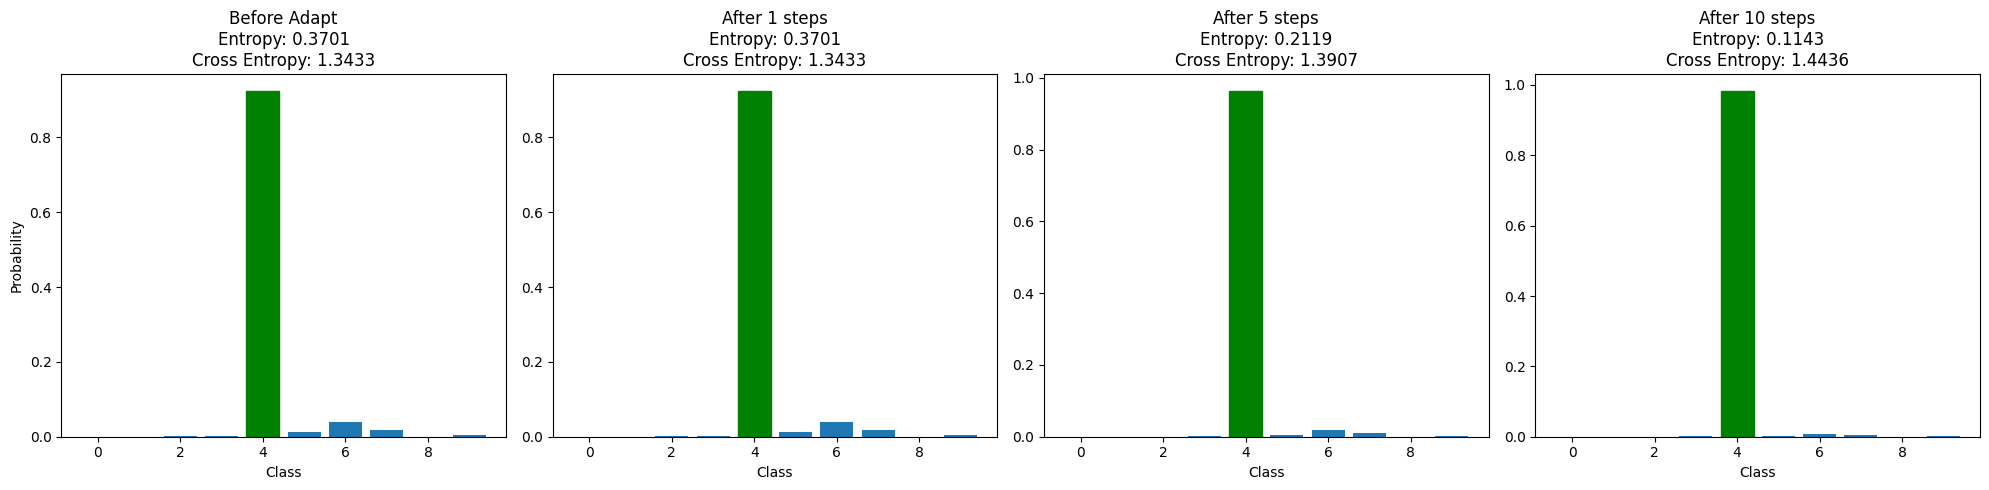

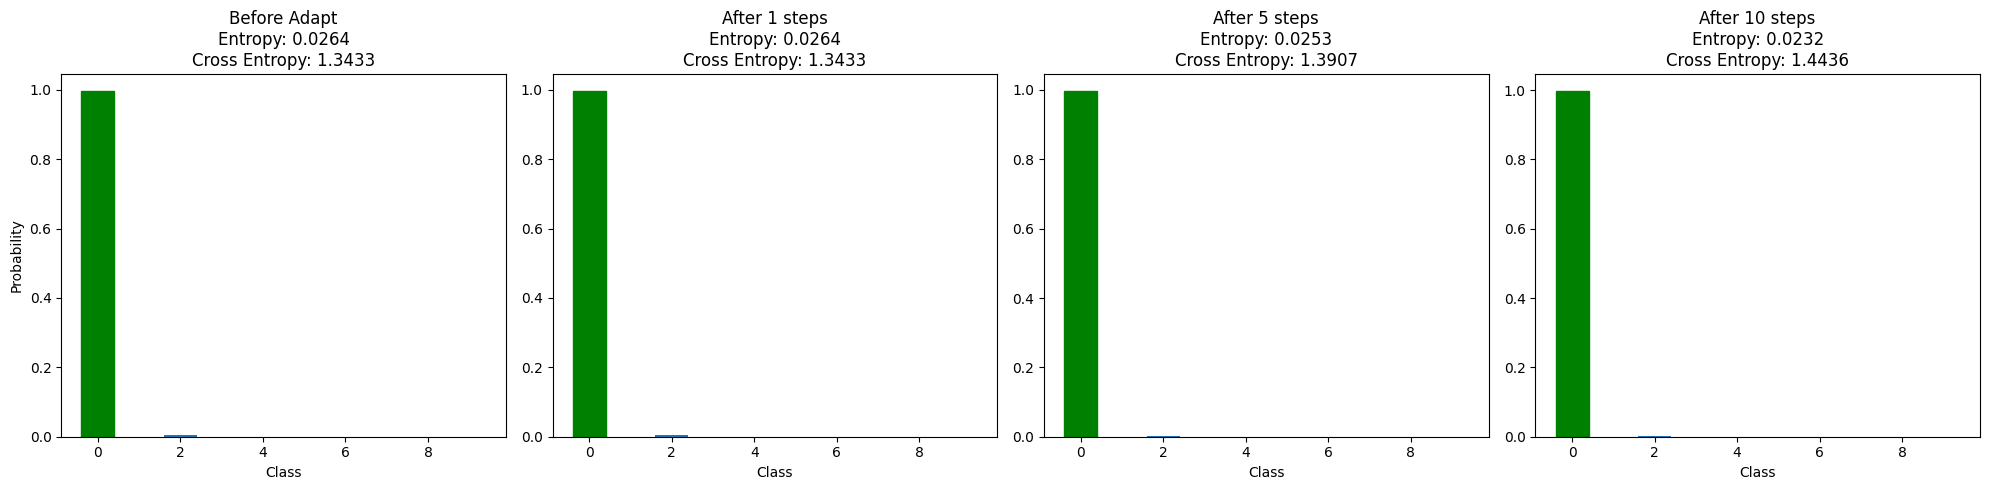

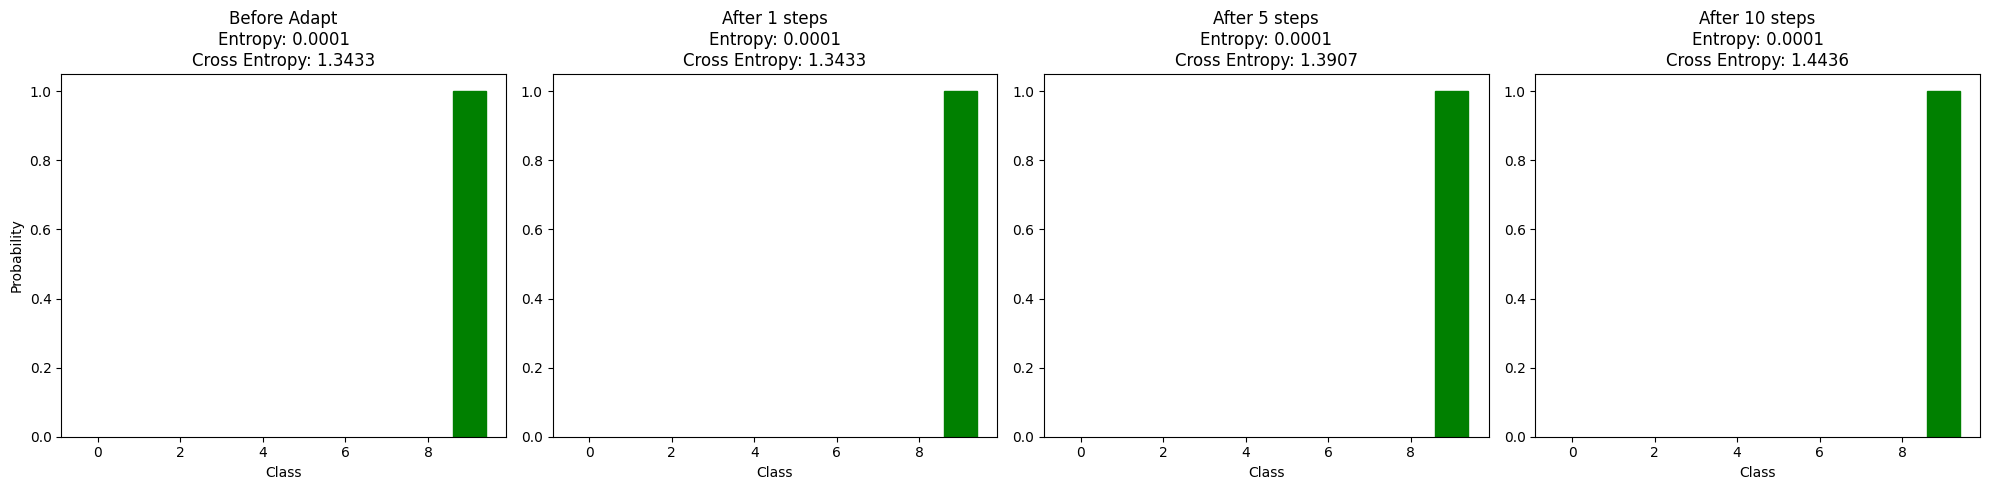

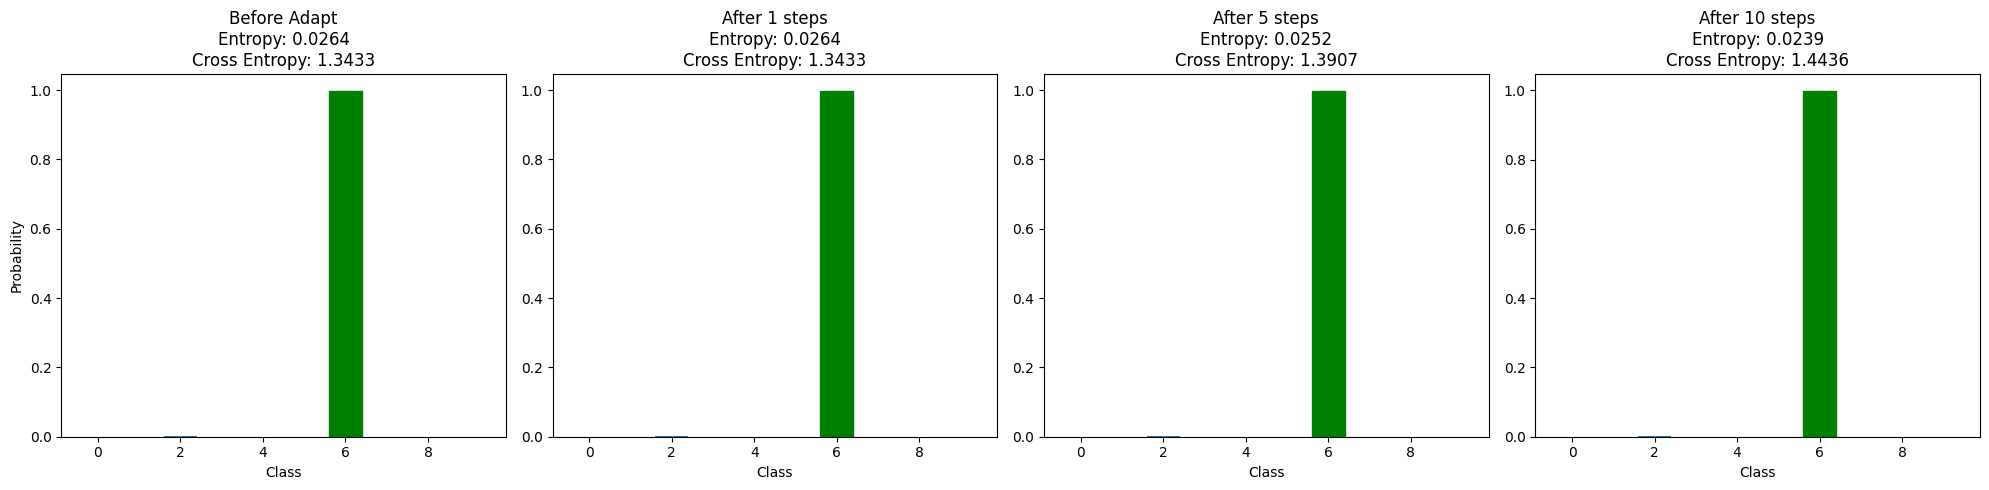

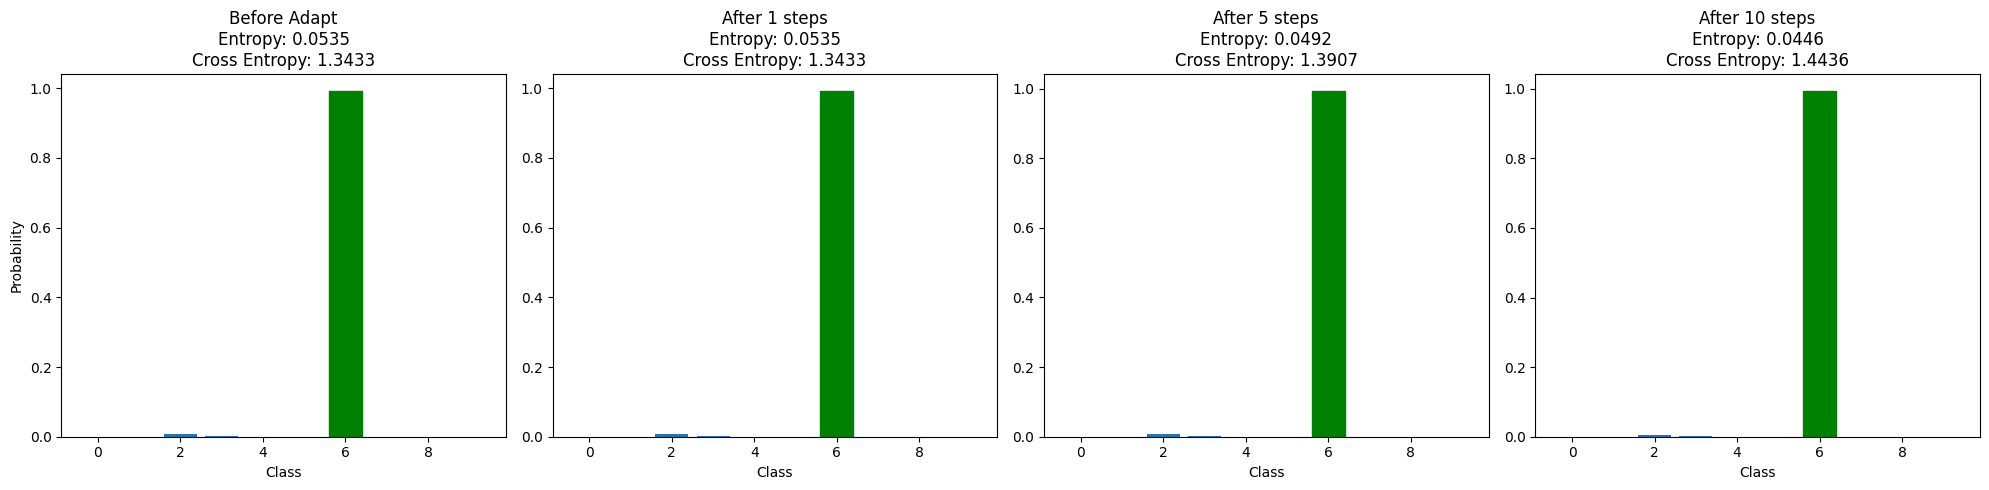

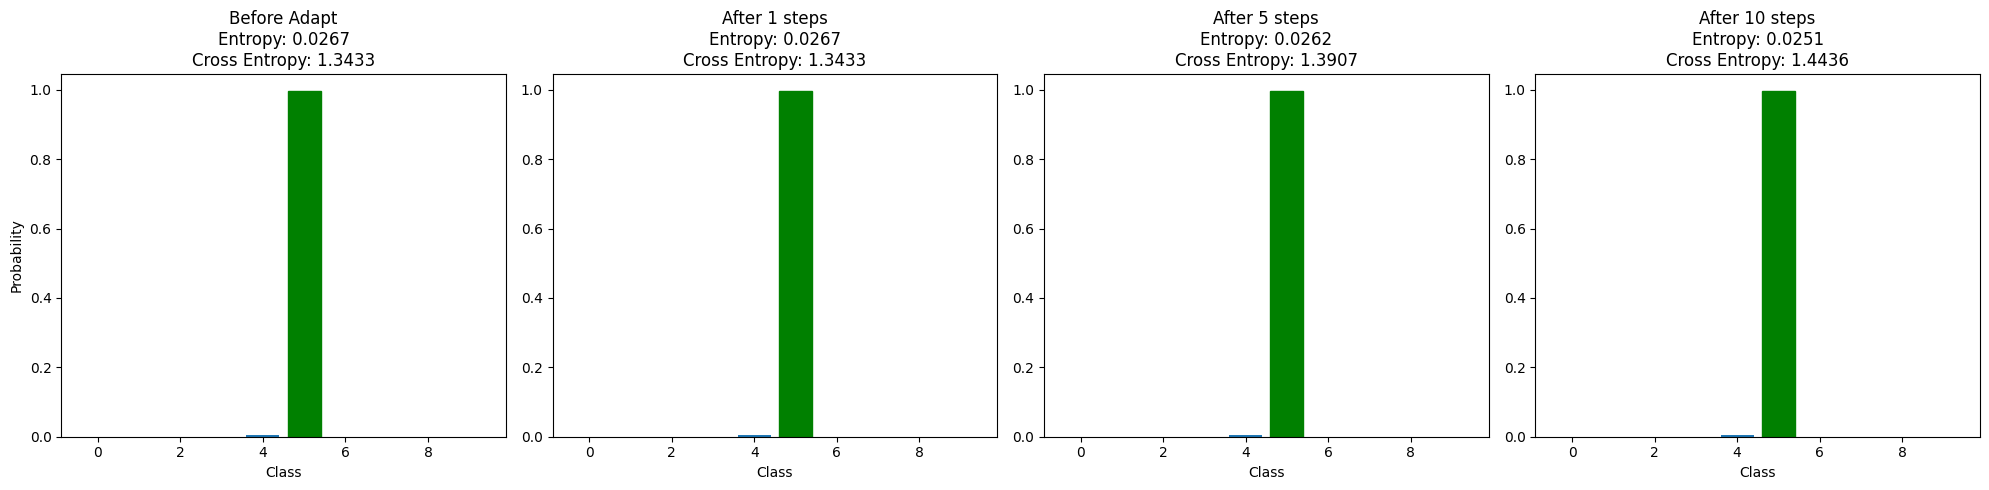

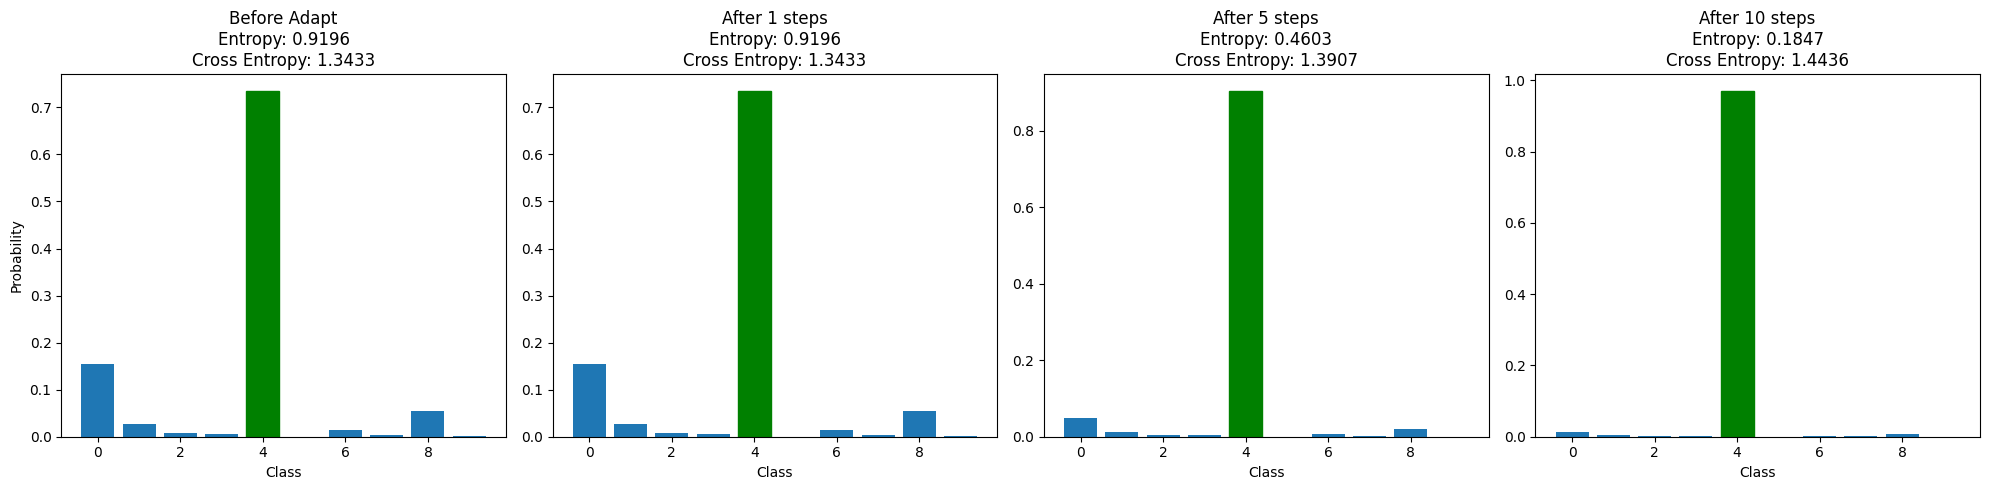

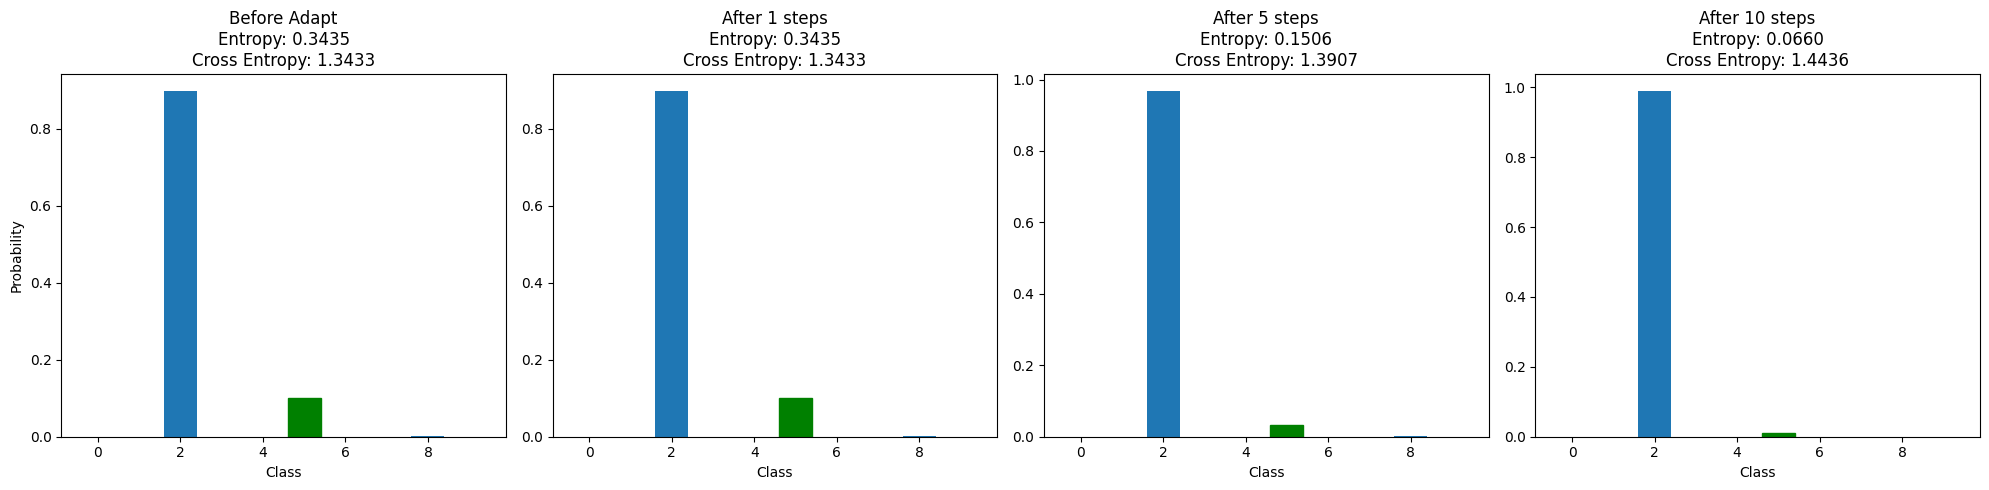

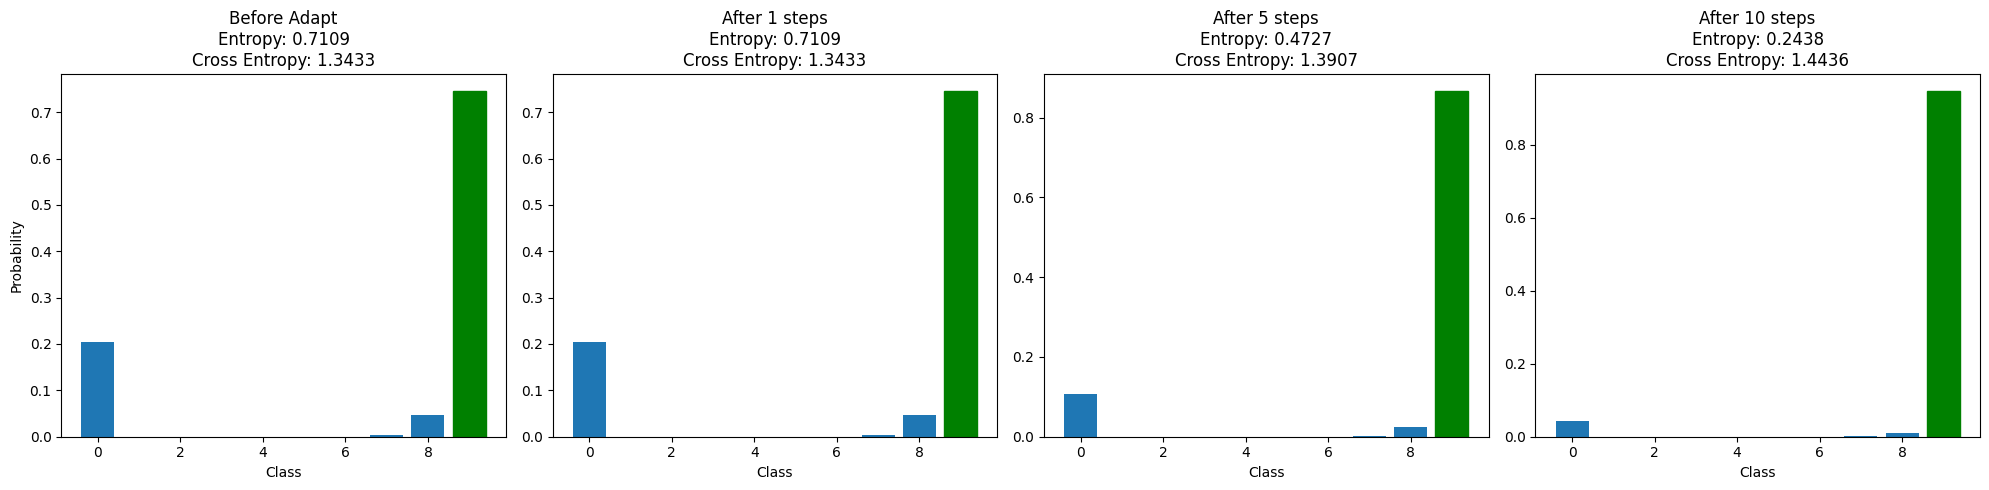

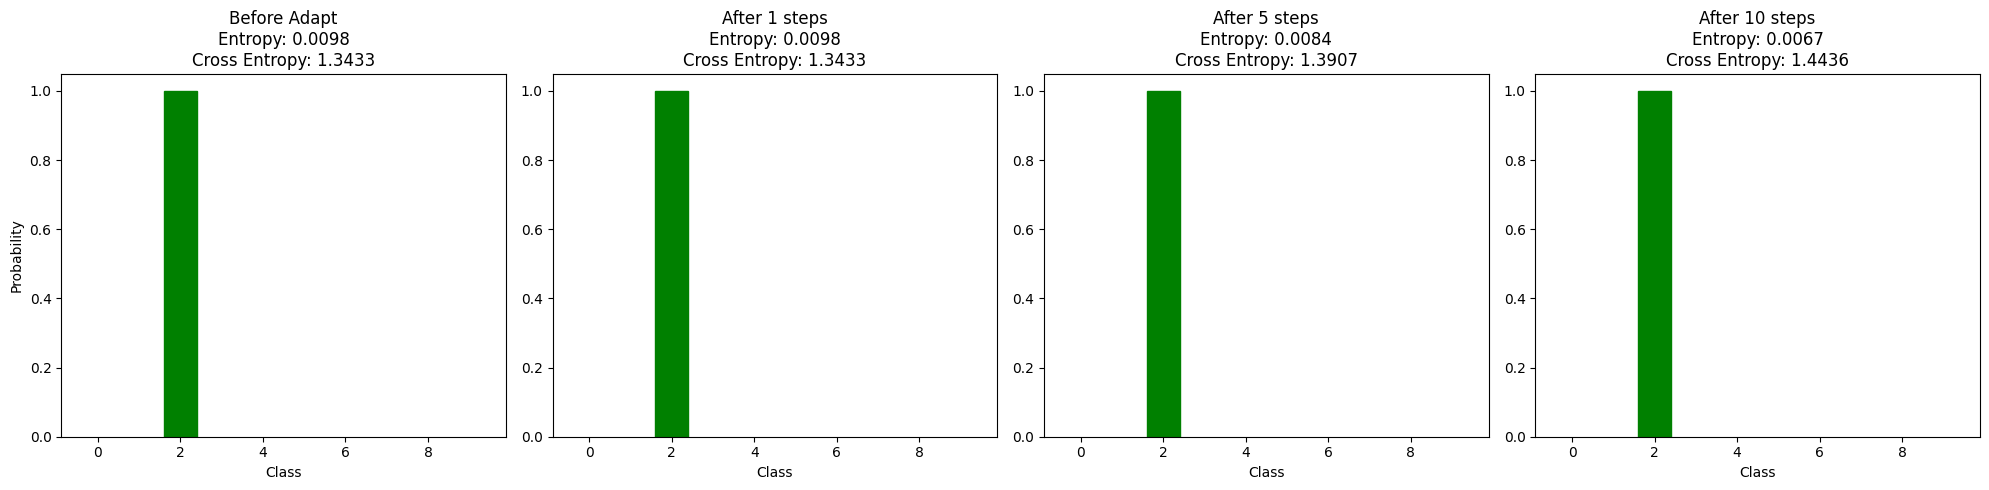

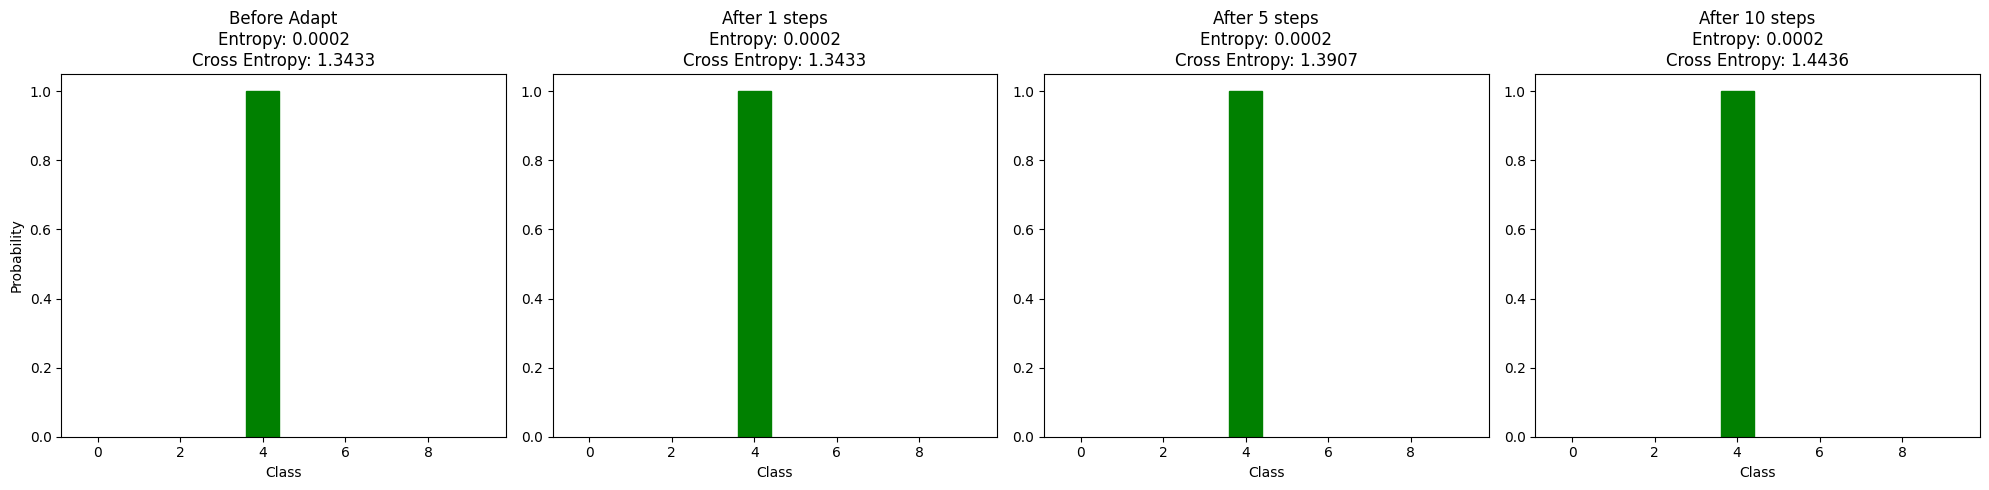

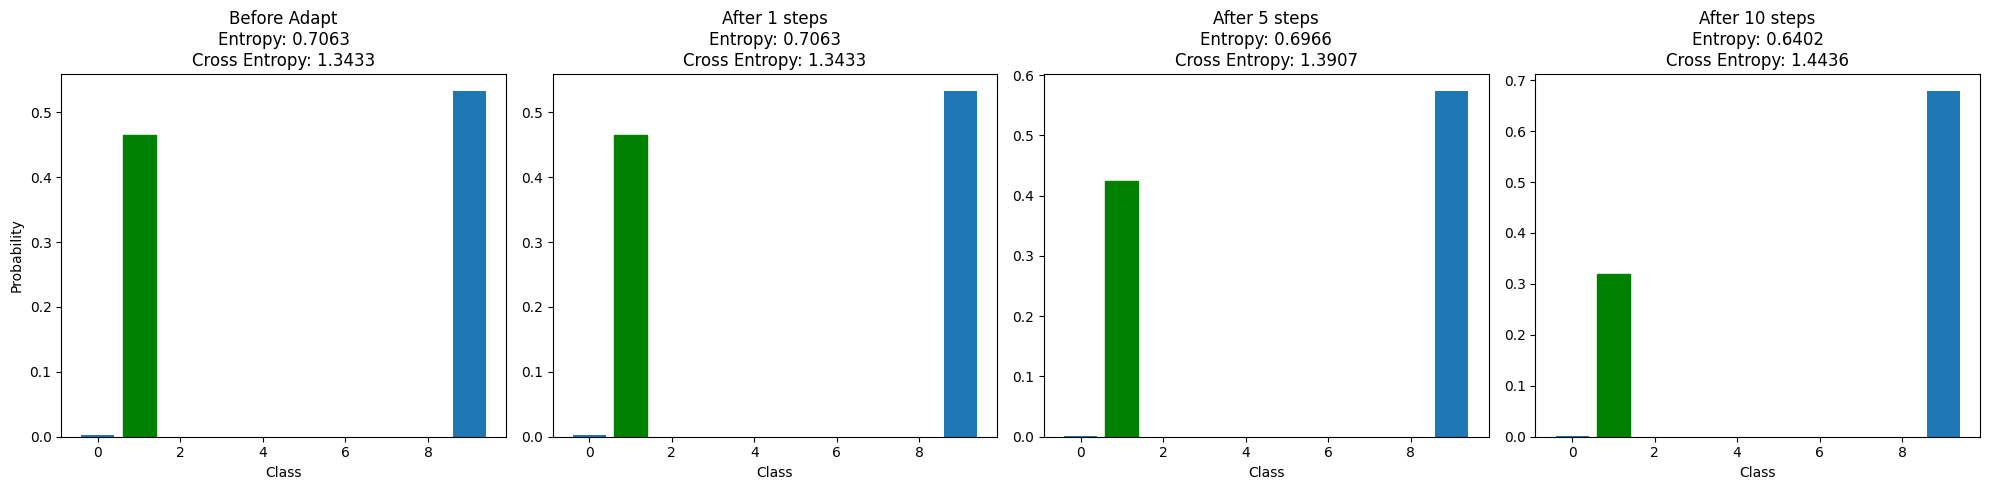

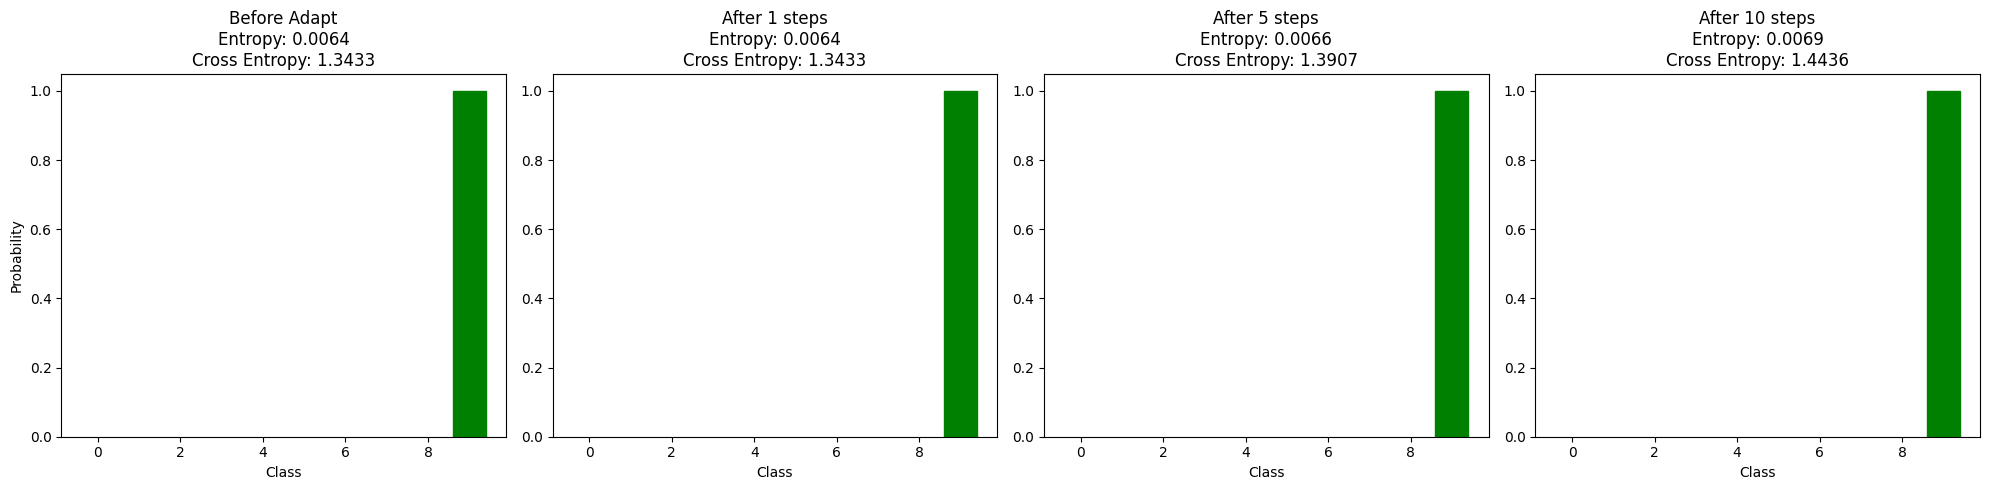

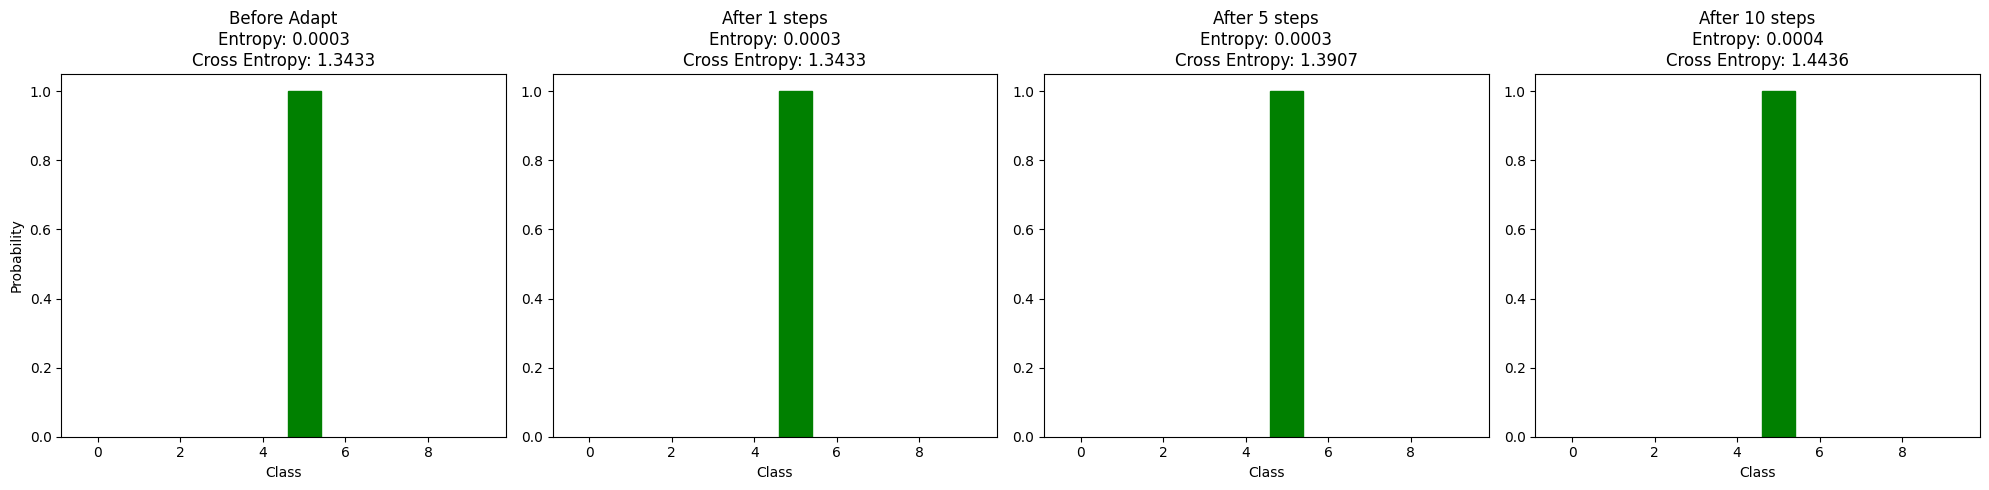

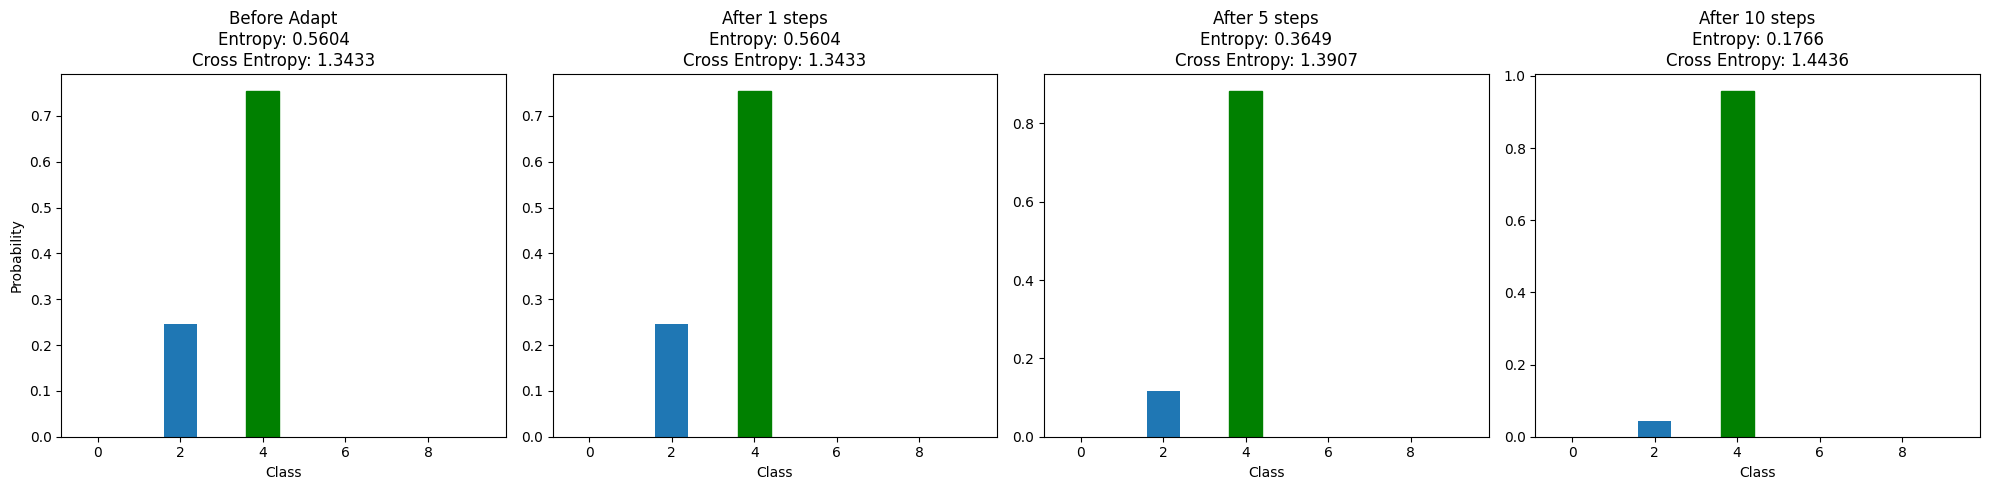

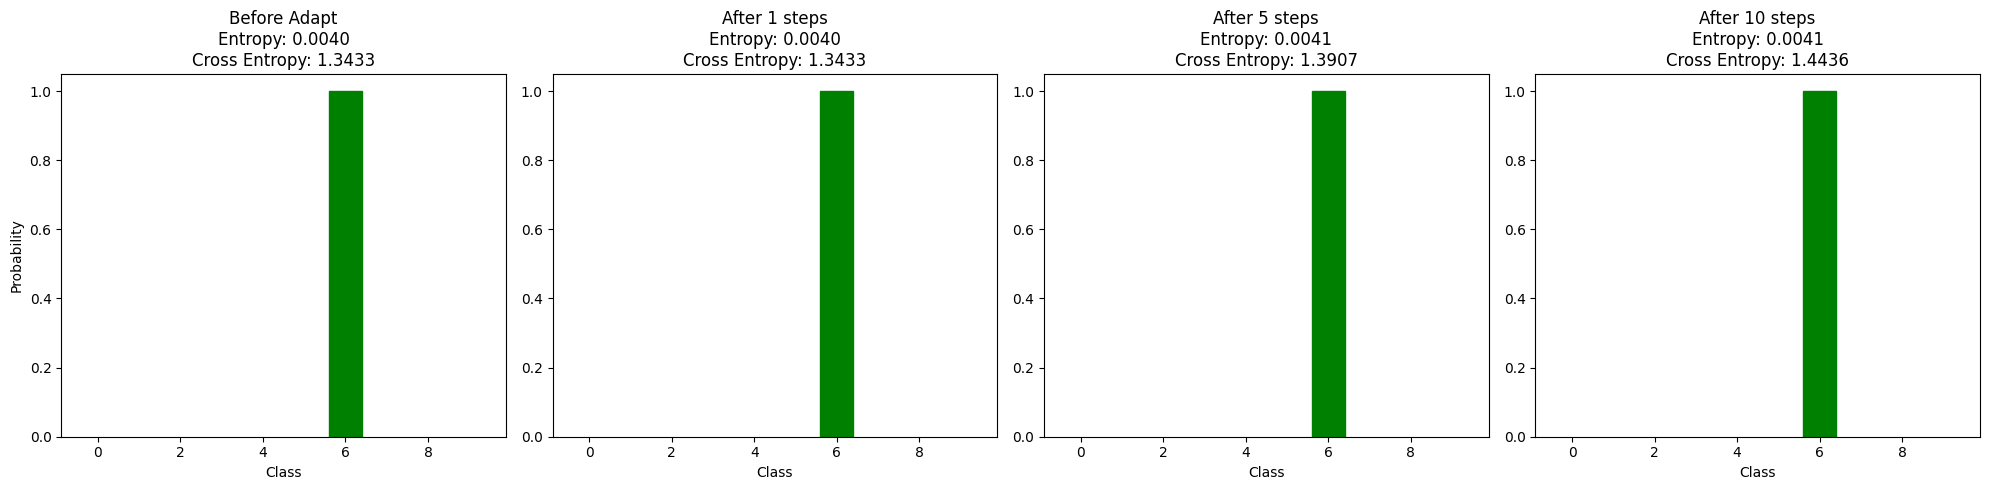

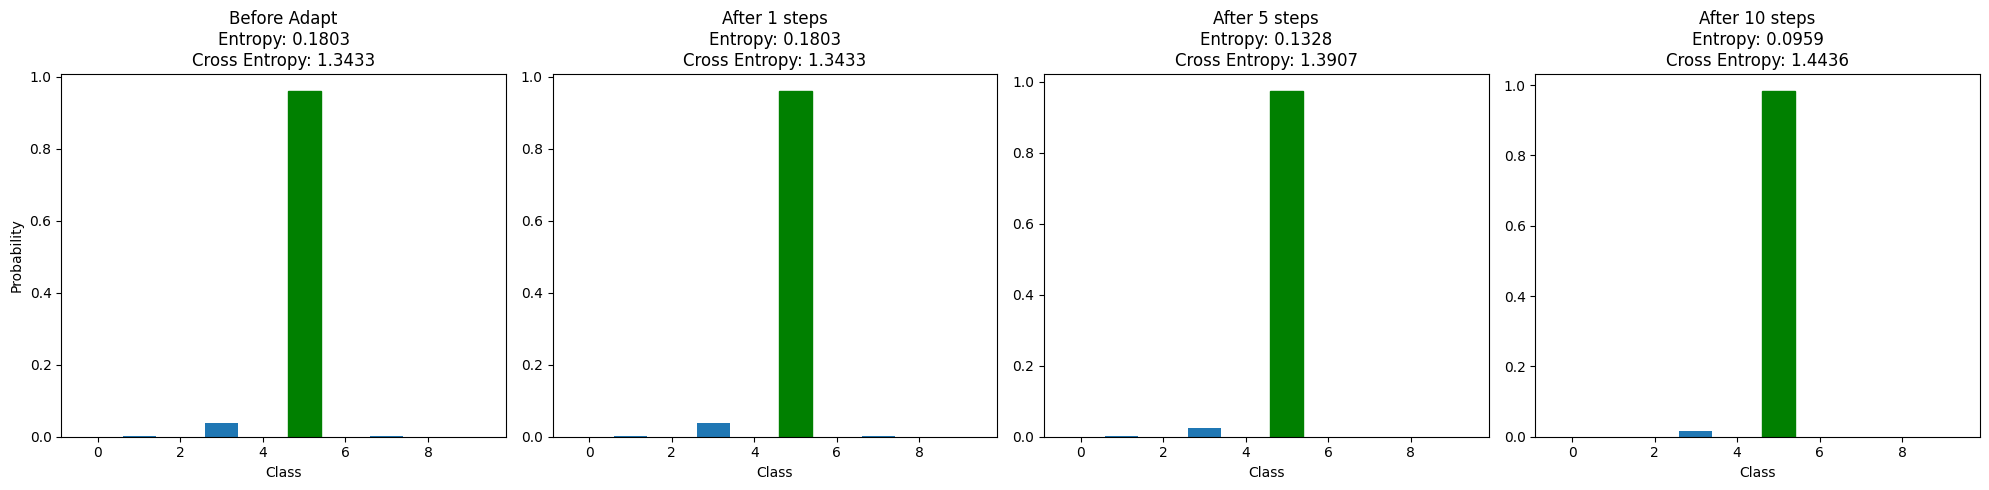

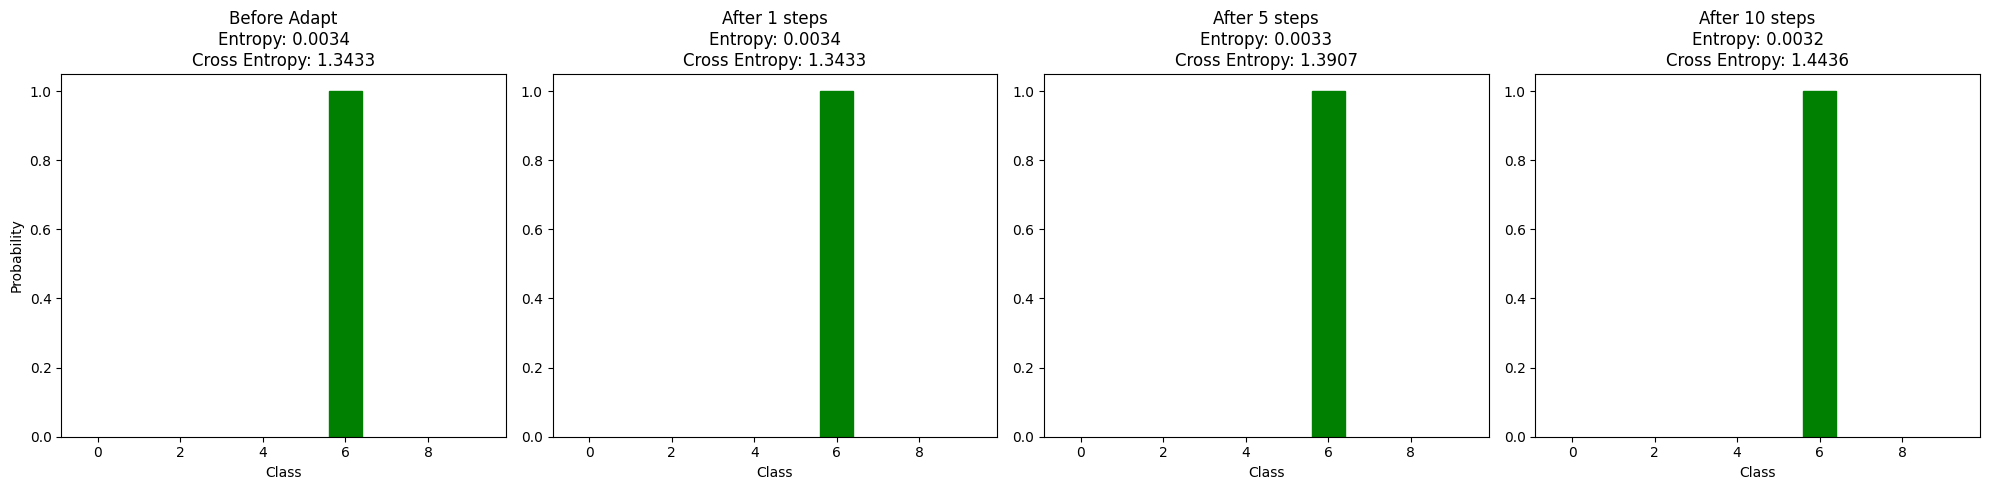

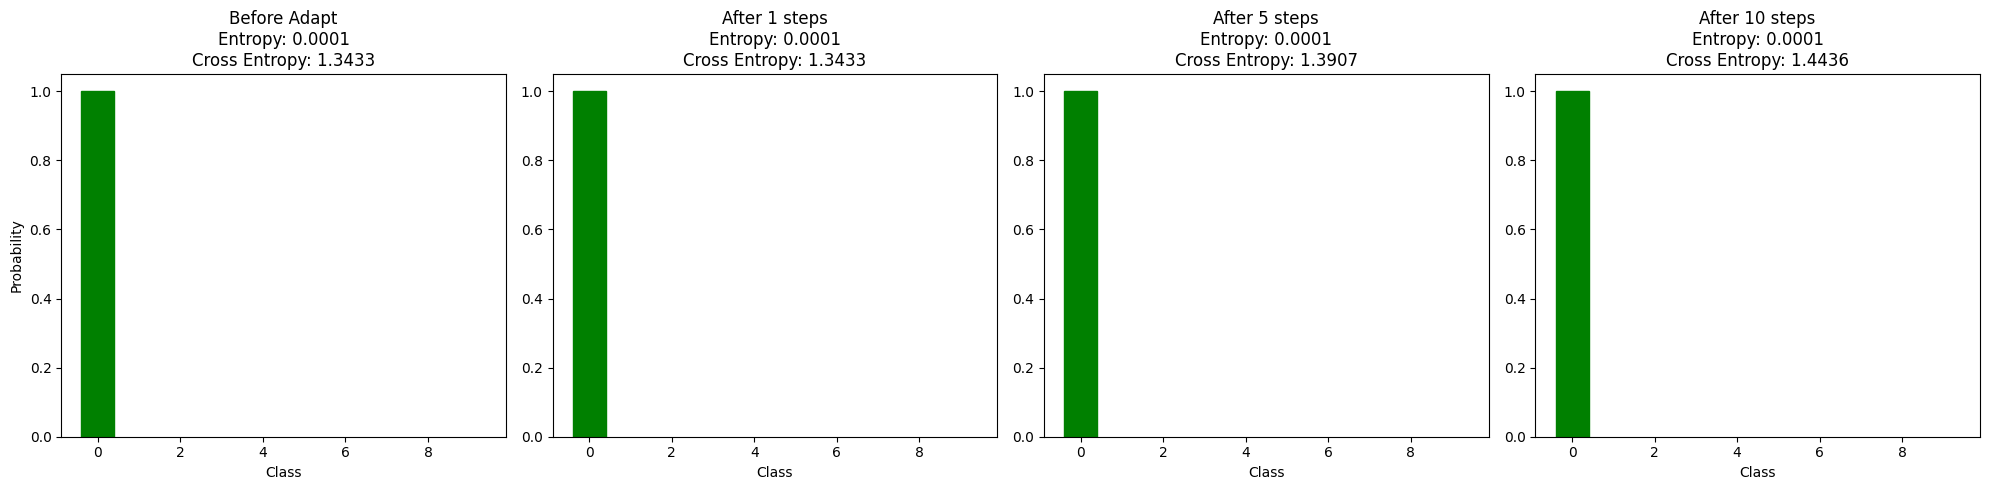

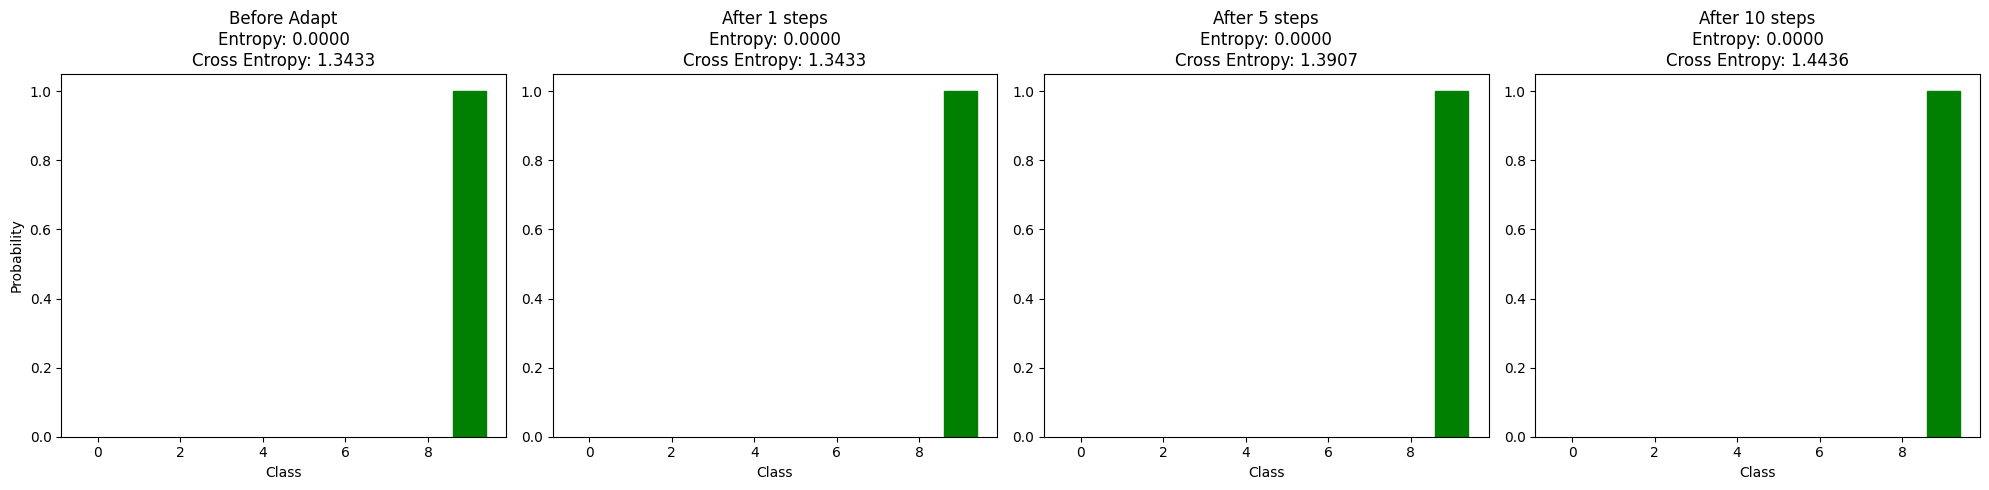

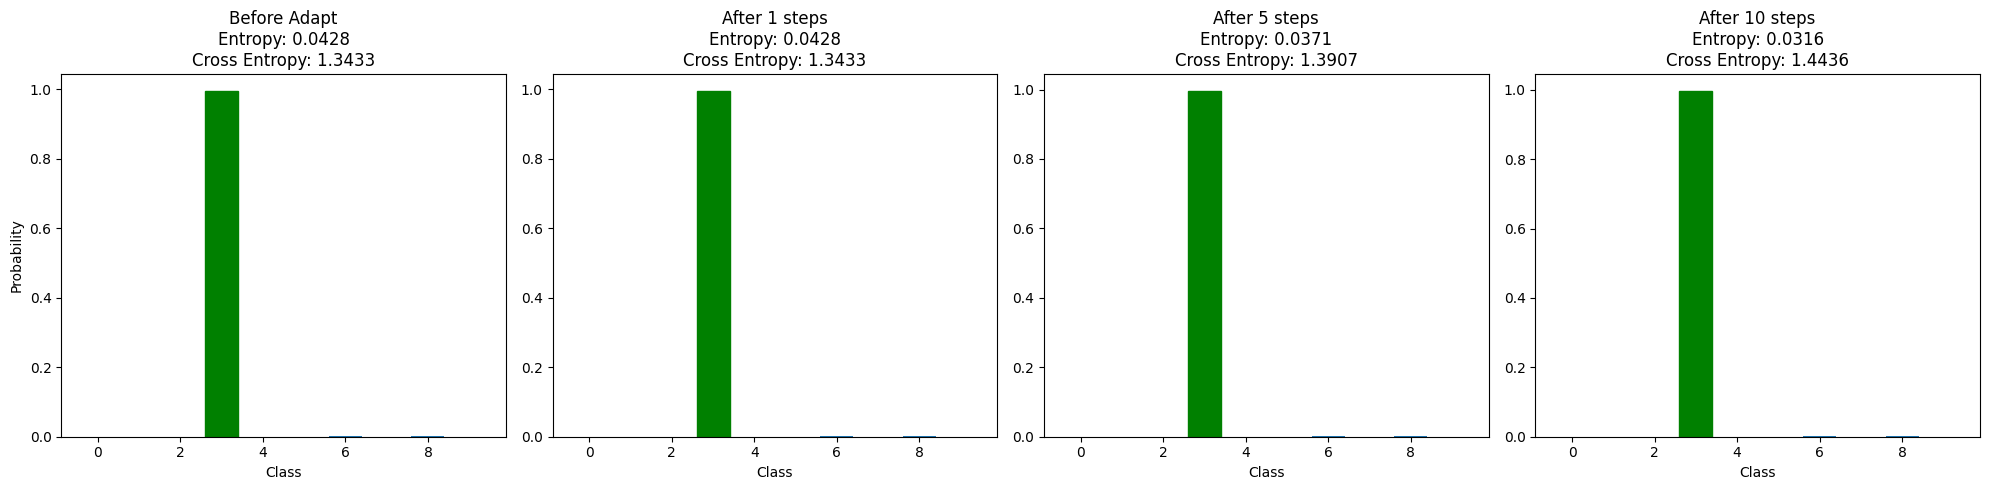

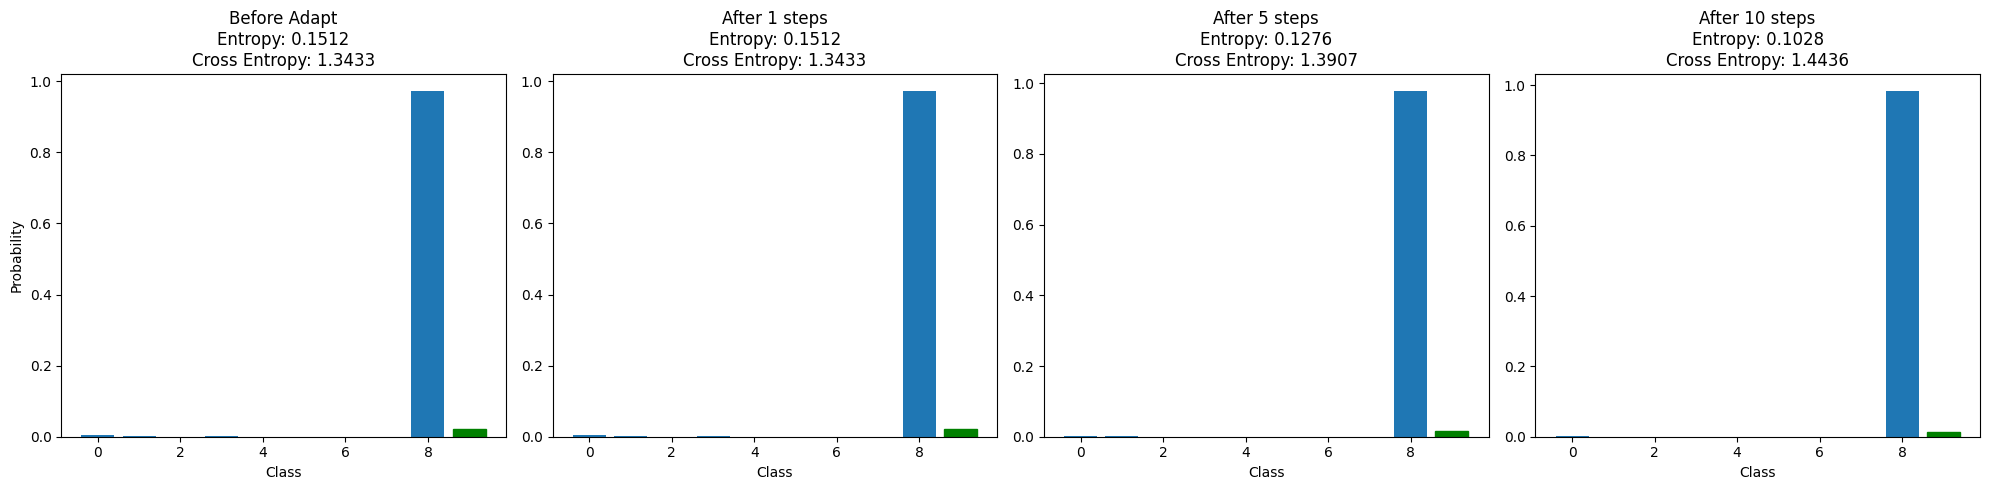

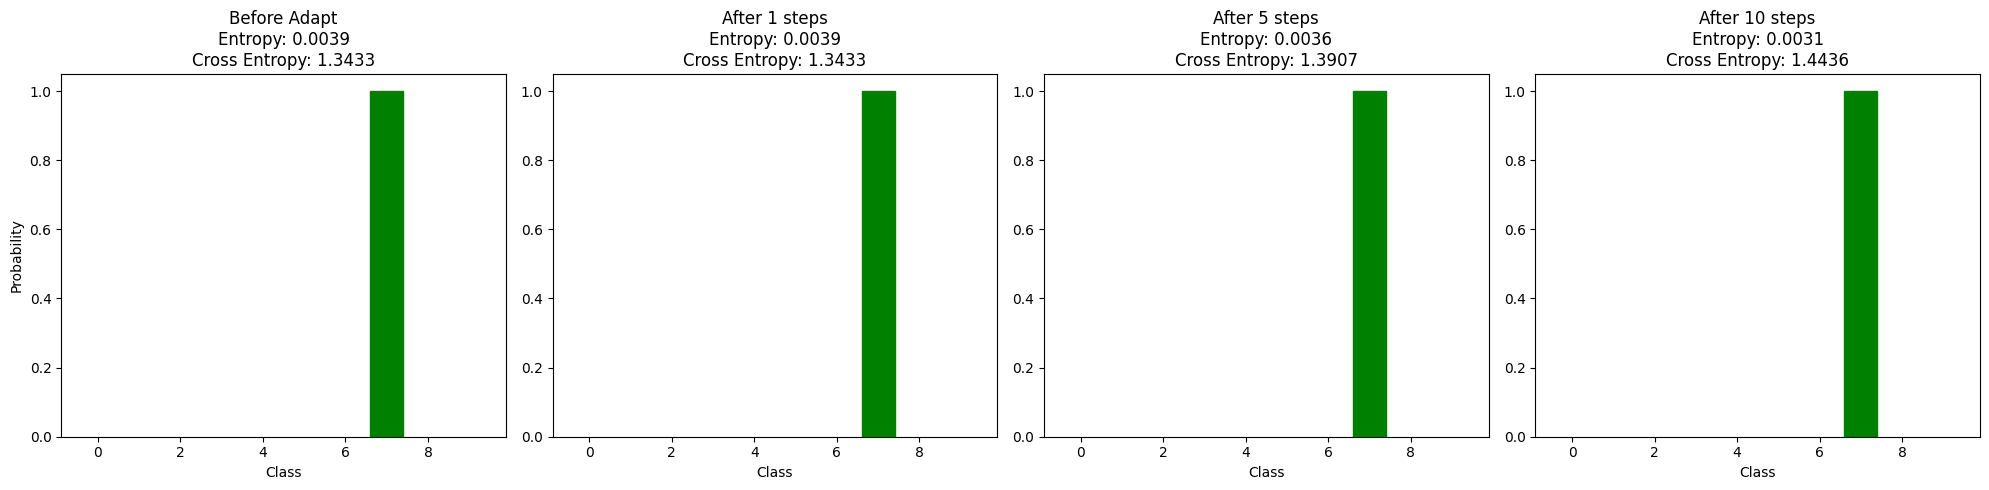

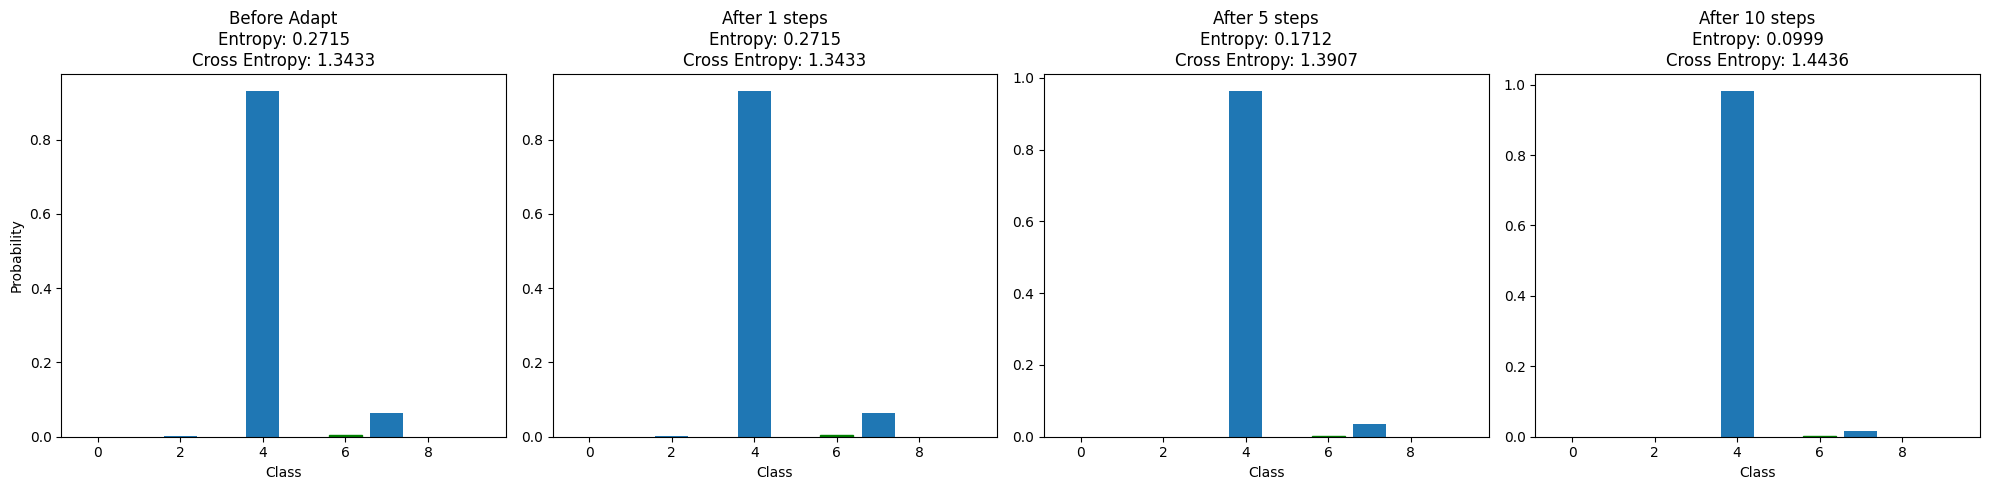

In [9]:
# Tent 모델의 forward and adapt 전후 비교를 위한 데이터 수집 (optim_steps 별)
optim_steps_list = [1, 5, 10]
results = {
    steps: {
        'entropy_before': [], 'entropy_after': [],
        'cross_entropy_before': [], 'cross_entropy_after': [],
        'output_dist_before': [], 'output_dist_after': [],
        'labels': []
    } for steps in optim_steps_list
}

data_loader = data_loaders[50]

for optim_steps in optim_steps_list:
    print(f"\n=== Tent (optim_steps={optim_steps}) ===")
    # 각 optim_steps에 대해 새로운 Tent 인스턴스 생성
    method = Tent(optim_steps=optim_steps)
    method.model = method.model.to(device)
    
    for batch in data_loader:
        input_samples, labels, _ = batch
        input_samples = input_samples.to(device)
        labels = labels.to(device)
        
        # Forward and adapt 이전
        with torch.no_grad():
            outputs_before = method.model(input_samples)
            probs_before = F.softmax(outputs_before, dim=1)
            entropy_before = compute_entropy(probs_before)
            cross_entropy_before = F.cross_entropy(outputs_before, labels)
        
        # Forward and adapt 수행
        outputs_after = method.forward_and_adapt(input_samples)
        probs_after = F.softmax(outputs_after, dim=1)
        entropy_after = compute_entropy(probs_after)
        cross_entropy_after = F.cross_entropy(outputs_after, labels)
        method.reset()
        
        # 예측 결과 비교
        preds_before = torch.argmax(outputs_before, dim=1)
        preds_after = torch.argmax(outputs_after, dim=1)
        
        # 배치의 각 샘플에 대해 결과 저장
        for i in range(len(labels)):
            print(f'Sample {len(results[optim_steps]["entropy_before"])}:')
            print(f'Adapt 이전 - 예측: {preds_before[i].item()}, 엔트로피: {entropy_before[i].item():.4f}, 크로스 엔트로피: {cross_entropy_before.item():.4f}')
            print(f'Adapt 이후 - 예측: {preds_after[i].item()}, 엔트로피: {entropy_after[i].item():.4f}, 크로스 엔트로피: {cross_entropy_after.item():.4f}')
            print(f'실제 레이블: {labels[i].item()}\n')
            
            results[optim_steps]['entropy_before'].append(entropy_before[i].item())
            results[optim_steps]['entropy_after'].append(entropy_after[i].item())
            results[optim_steps]['cross_entropy_before'].append(cross_entropy_before.item())
            results[optim_steps]['cross_entropy_after'].append(cross_entropy_after.item())
            results[optim_steps]['output_dist_before'].append(probs_before[i].cpu().numpy())
            results[optim_steps]['output_dist_after'].append(probs_after[i].cpu().detach().numpy())
            results[optim_steps]['labels'].append(labels[i].item())

# 모든 데이터 수집 후 결과 시각화
for i in range(len(results[optim_steps_list[0]]['labels'])):
    plt.figure(figsize=(20, 5))
    
    # Adapt 이전 분포
    plt.subplot(141)
    dist_before = results[optim_steps_list[0]]['output_dist_before'][i]
    label = results[optim_steps_list[0]]['labels'][i]
    entropy_before = results[optim_steps_list[0]]['entropy_before'][i]
    cross_entropy_before = results[optim_steps_list[0]]['cross_entropy_before'][i]
    bars = plt.bar(range(10), dist_before)
    bars[label].set_color('green')
    plt.title(f'Before Adapt\nEntropy: {entropy_before:.4f}\nCross Entropy: {cross_entropy_before:.4f}')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    
    # 각 optim_steps별 Adapt 이후 분포
    for idx, steps in enumerate(optim_steps_list):
        plt.subplot(142 + idx)
        dist_after = results[steps]['output_dist_after'][i]
        entropy_after = results[steps]['entropy_after'][i]
        cross_entropy_after = results[steps]['cross_entropy_after'][i]
        bars = plt.bar(range(10), dist_after)
        bars[label].set_color('green')
        plt.title(f'After {steps} steps\nEntropy: {entropy_after:.4f}\nCross Entropy: {cross_entropy_after:.4f}')
        plt.xlabel('Class')
    
    plt.tight_layout()
    plt.show()